In [2]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
cpvs= pd.read_csv('/content/drive/MyDrive/TFM/data/export_cpv.csv', sep=',', encoding='UTF8')
cpvs.head()

id_cpv  id_division  id_grupo  id_clase  id_categoria  \
0   3000000      3000000       NaN       NaN           NaN   
1   9000000      9000000       NaN       NaN           NaN   
2  14000000     14000000       NaN       NaN           NaN   
3  15000000     15000000       NaN       NaN           NaN   
4  16000000     16000000       NaN       NaN           NaN   

                                         descripcion  
0  Productos de la agricultura, ganadería, pesca,...  
1  Derivados del petróleo, combustibles, electric...  
2  Productos de la minería, de metales de base y ...  
3      Alimentos, bebidas, tabaco y productos afines  
4                                Maquinaria agrícola

In [ ]:
#Vemos si tenemos missing values, no importa porque son aquellos registros que pertenecen a una categoría más general
cpvs.isna().sum()

id_cpv             0
id_division        0
id_grupo          45
id_clase         317
id_categoria    1321
descripcion        0
dtype: int64

In [ ]:
#DIVISION
#¿Cuántas divisiones hay en la clasificación CPV?
cpvs.groupby(['id_division'])['id_division'].unique().count()

45

In [ ]:
cpvs.groupby(['id_division'])['descripcion'].count().mean()

210.26666666666668

In [ ]:
#¿Cuántos cpvs hay por cada división?
cpvs.groupby(['id_division'])['descripcion'].count()

id_division
3000000     230
9000000      94
14000000    148
15000000    477
16000000     44
18000000    194
19000000     97
22000000    109
24000000    292
30000000    401
31000000    363
32000000    226
33000000    641
34000000    469
35000000    213
37000000    345
38000000    317
39000000    469
41000000      4
42000000    553
43000000    127
44000000    539
45000000    822
48000000    198
50000000    224
51000000    110
55000000     39
60000000     56
63000000     85
64000000     55
65000000     17
66000000     89
70000000     36
71000000    184
72000000    252
73000000     26
75000000     57
76000000     67
77000000     54
79000000    199
80000000     55
85000000     98
90000000    197
92000000    105
98000000     85
Name: descripcion, dtype: int64

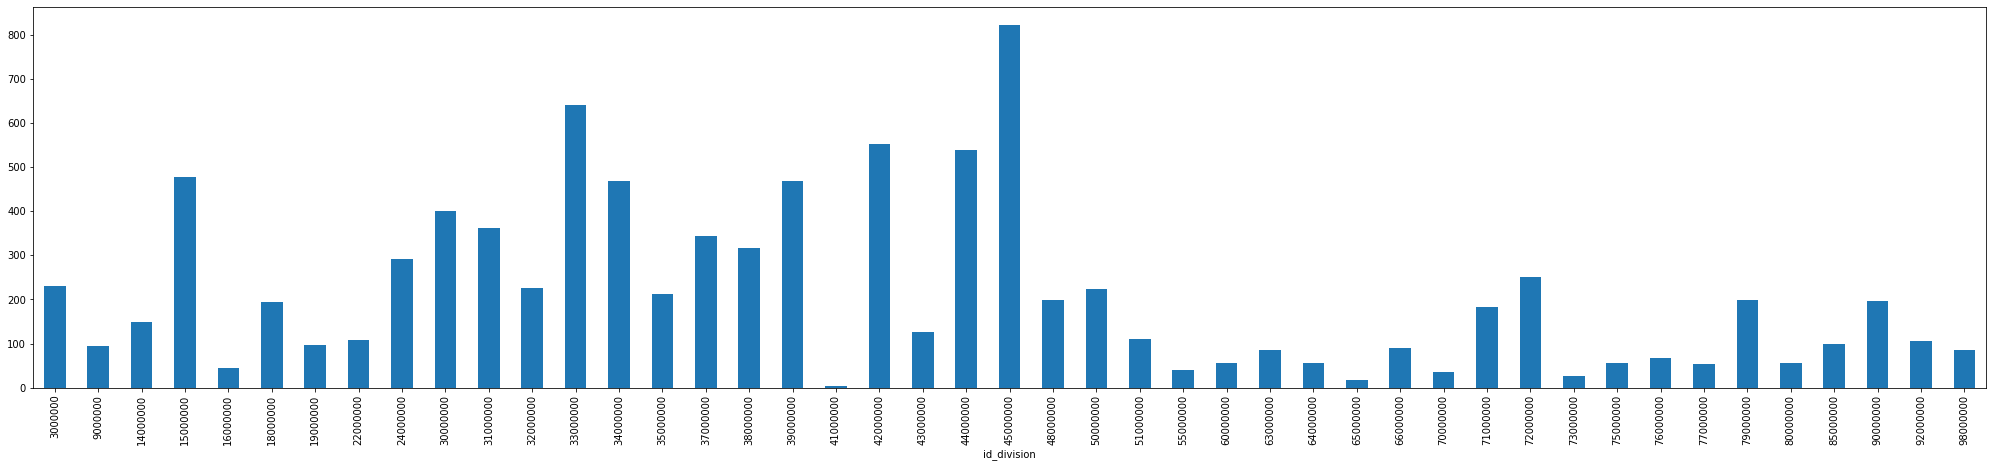

In [ ]:
#¿Cuántos cpvs hay por cada división?
cpvs.groupby(['id_division']).count()['descripcion'].plot(kind='bar', figsize=(35,7))

In [ ]:
#GRUPOS
#¿Cuántos grupos distintos hay en la clasificación CPV?
cpvs.groupby(['id_grupo'])['id_grupo'].unique().count()

272

In [ ]:
cpvs.groupby(['id_division', 'id_grupo']).size().reset_index(name='count').groupby(['id_division']).count().mean()

id_grupo    6.044444
count       6.044444
dtype: float64

In [ ]:
#¿Cuántos grupos hay por cada división?
cpvs.groupby(['id_division', 'id_grupo']).size().reset_index(name='count').groupby(['id_division']).count()['count']

id_division
3000000     4
9000000     3
14000000    8
15000000    9
16000000    7
18000000    8
19000000    6
22000000    8
24000000    7
30000000    2
31000000    7
32000000    4
33000000    4
34000000    8
35000000    8
37000000    4
38000000    9
39000000    6
41000000    1
42000000    9
43000000    8
44000000    8
45000000    5
48000000    9
50000000    8
51000000    9
55000000    6
60000000    6
63000000    3
64000000    2
65000000    5
66000000    4
70000000    3
71000000    8
72000000    9
73000000    4
75000000    3
76000000    6
77000000    9
79000000    9
80000000    6
85000000    3
90000000    5
92000000    7
98000000    5
Name: count, dtype: int64

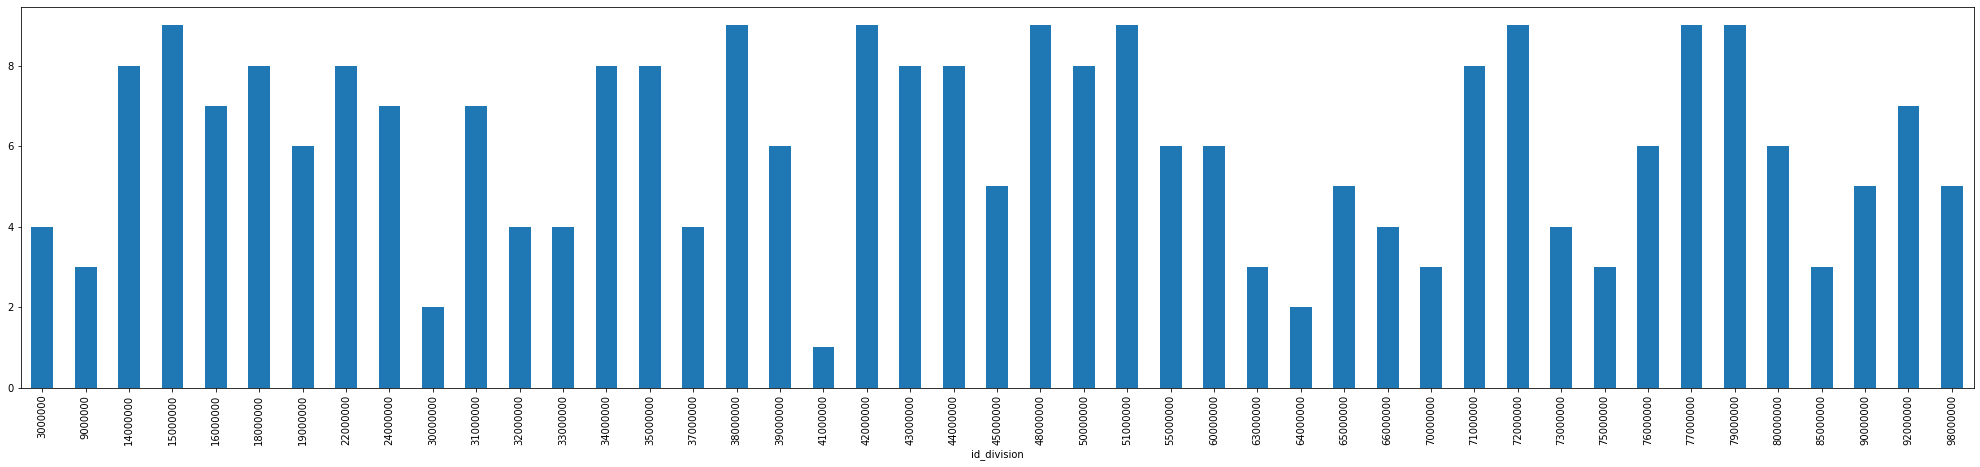

In [ ]:
#¿Cuántos grupos hay por cada división?
cpvs.groupby(['id_division', 'id_grupo']).size().reset_index(name='count').groupby(['id_division']).count()['count'].plot(kind='bar', figsize=(35,7))

In [ ]:
#¿Cuántos CPVs hay por cada grupo en la clasificación? 
cpvs.groupby(['id_division','id_grupo'])['descripcion'].count().reset_index().sort_values('descripcion', ascending=False).head(18)

id_division    id_grupo  descripcion
139     45000000  45200000.0          614
73      33000000  33100000.0          350
60      30000000  30100000.0          266
94      37000000  37400000.0          200
207     72000000  72200000.0          185
84      34000000  34900000.0          165
113     42000000  42100000.0          164
130     44000000  44100000.0          160
121     42000000  42900000.0          158
55      24000000  24300000.0          148
61      30000000  30200000.0          134
74      33000000  33600000.0          132
22      15000000  15800000.0          131
107     39000000  39200000.0          129
199     71000000  71300000.0          125
109     39000000  39500000.0          111
106     39000000  39100000.0          101
258     90000000  90700000.0           97

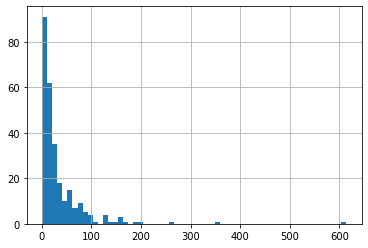

In [ ]:
#¿Cuántos CPVs hay por cada grupo en la clasificación? 
cpvs.groupby(['id_division','id_grupo'])['descripcion'].count().reset_index().sort_values('descripcion', ascending=True).descripcion.hist(bins=60)

In [ ]:
#¿Cuántos CPVs hay por cada grupo en la clasificación? 
cpvs.groupby(['id_division','id_grupo'])['descripcion'].count()

id_division  id_grupo  
3000000      3100000.0     57
             3200000.0     91
             3300000.0     48
             3400000.0     33
9000000      9100000.0     42
                           ..
98000000     98100000.0    13
             98200000.0     1
             98300000.0    58
             98500000.0    10
             98900000.0     2
Name: descripcion, Length: 272, dtype: int64

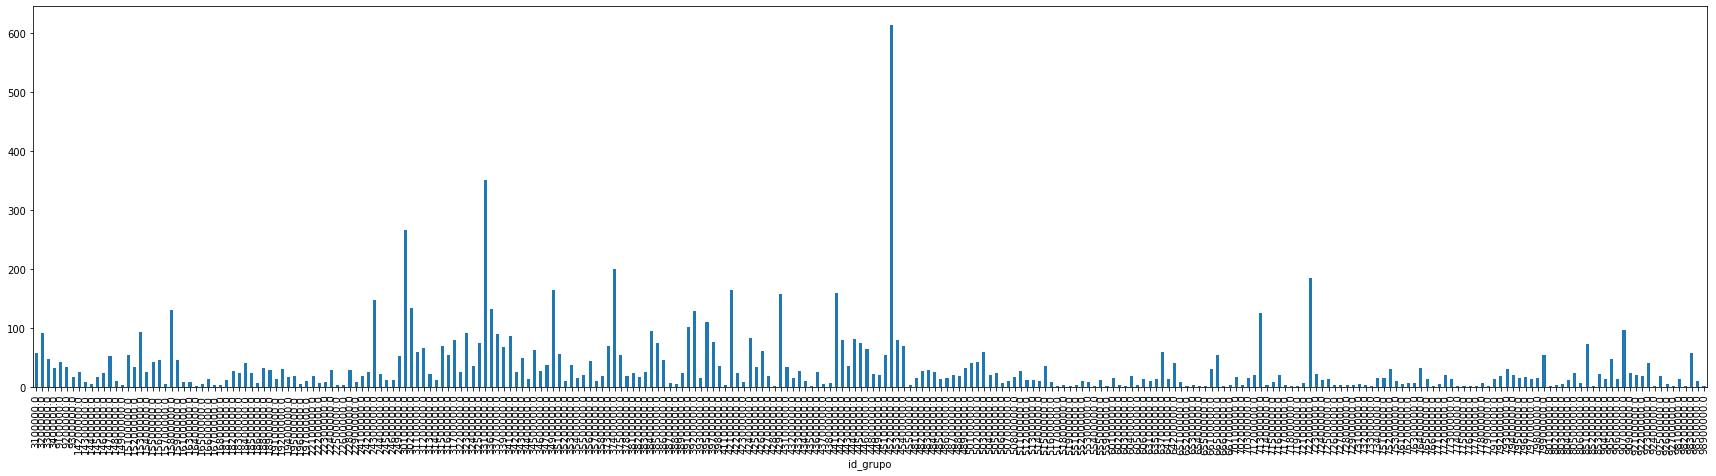

In [ ]:
#¿Cuántos CPVs hay por cada grupo en la clasificación? 
cpvs.groupby(['id_grupo']).count()['descripcion'].plot(kind='bar', figsize=(30,7))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


id_division
3000000     AxesSubplot(0.125,0.125;0.775x0.755)
9000000     AxesSubplot(0.125,0.125;0.775x0.755)
14000000    AxesSubplot(0.125,0.125;0.775x0.755)
15000000    AxesSubplot(0.125,0.125;0.775x0.755)
16000000    AxesSubplot(0.125,0.125;0.775x0.755)
18000000    AxesSubplot(0.125,0.125;0.775x0.755)
19000000    AxesSubplot(0.125,0.125;0.775x0.755)
22000000    AxesSubplot(0.125,0.125;0.775x0.755)
24000000    AxesSubplot(0.125,0.125;0.775x0.755)
30000000    AxesSubplot(0.125,0.125;0.775x0.755)
31000000    AxesSubplot(0.125,0.125;0.775x0.755)
32000000    AxesSubplot(0.125,0.125;0.775x0.755)
33000000    AxesSubplot(0.125,0.125;0.775x0.755)
34000000    AxesSubplot(0.125,0.125;0.775x0.755)
35000000    AxesSubplot(0.125,0.125;0.775x0.755)
37000000    AxesSubplot(0.125,0.125;0.775x0.755)
38000000    AxesSubplot(0.125,0.125;0.775x0.755)
39000000    AxesSubplot(0.125,0.125;0.775x0.755)
41000000    AxesSubplot(0.125,0.125;0.775x0.755)
42000000    AxesSubplot(0.125,0.125;0.775x0.755)
43000000

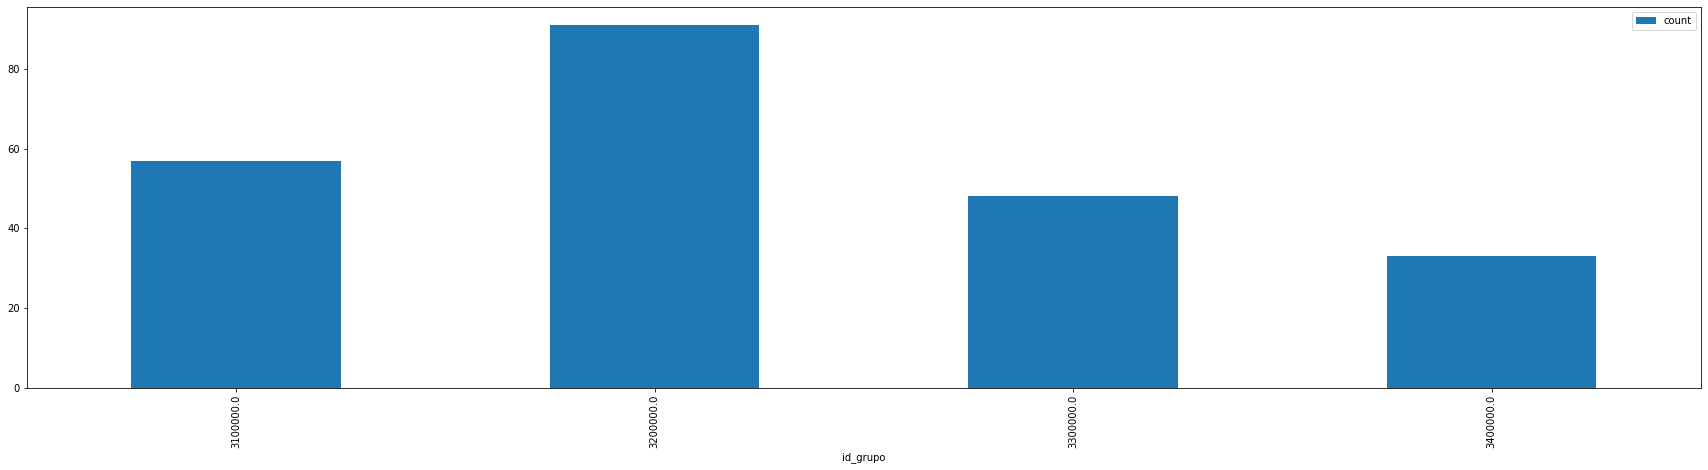

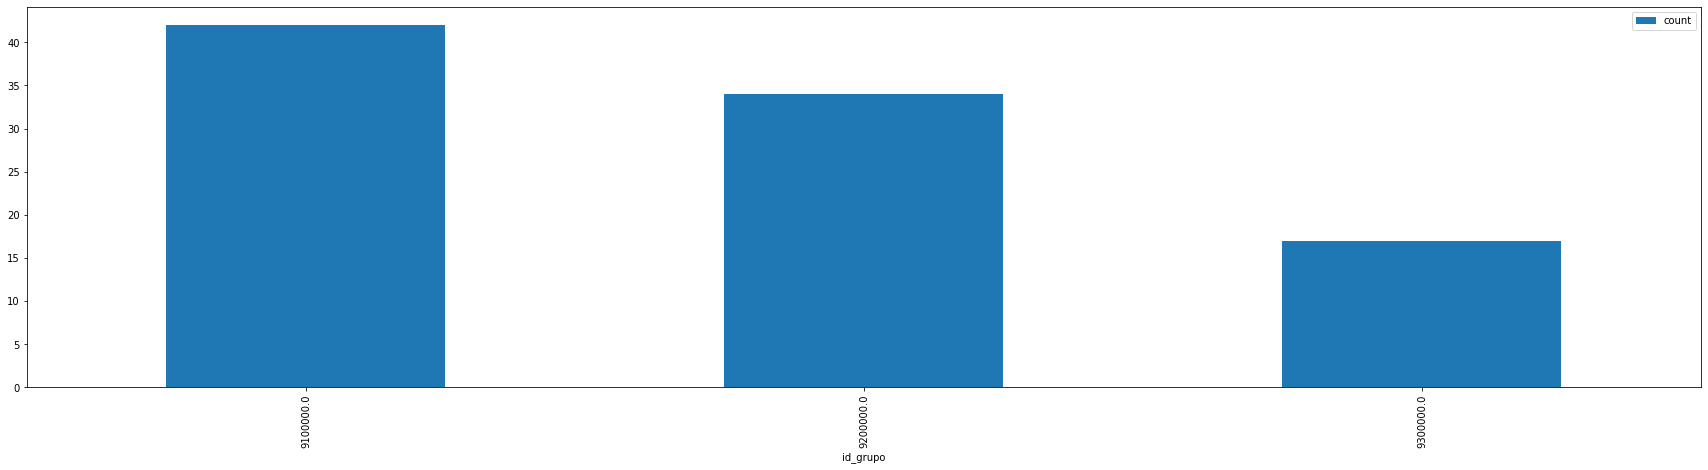

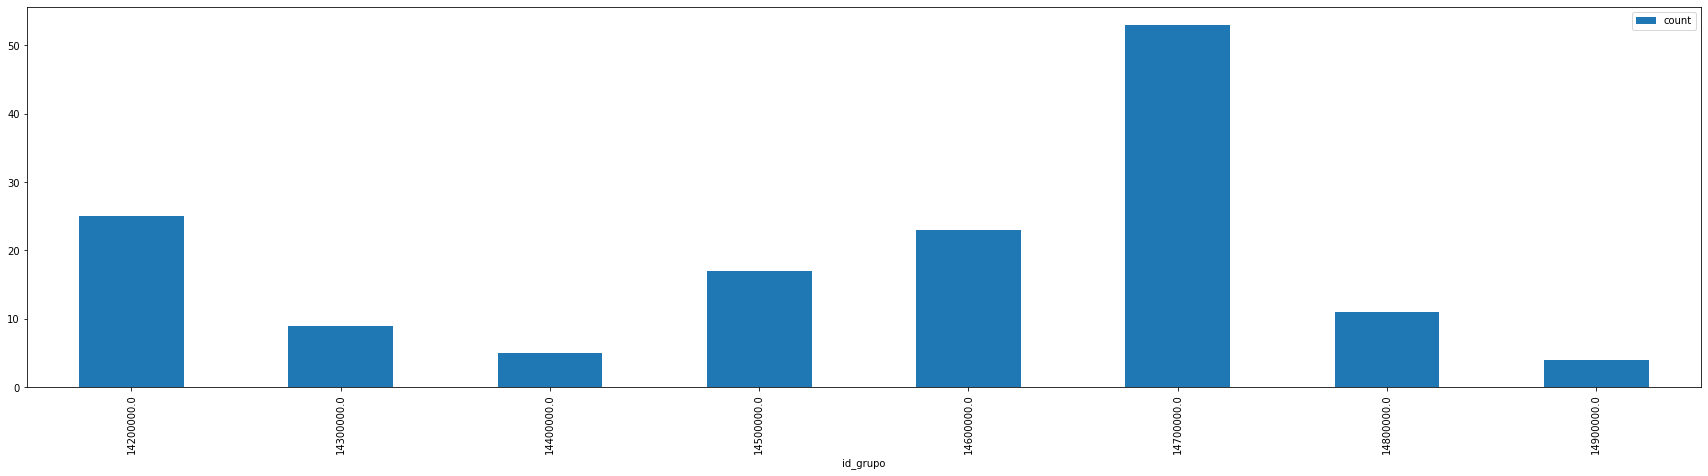

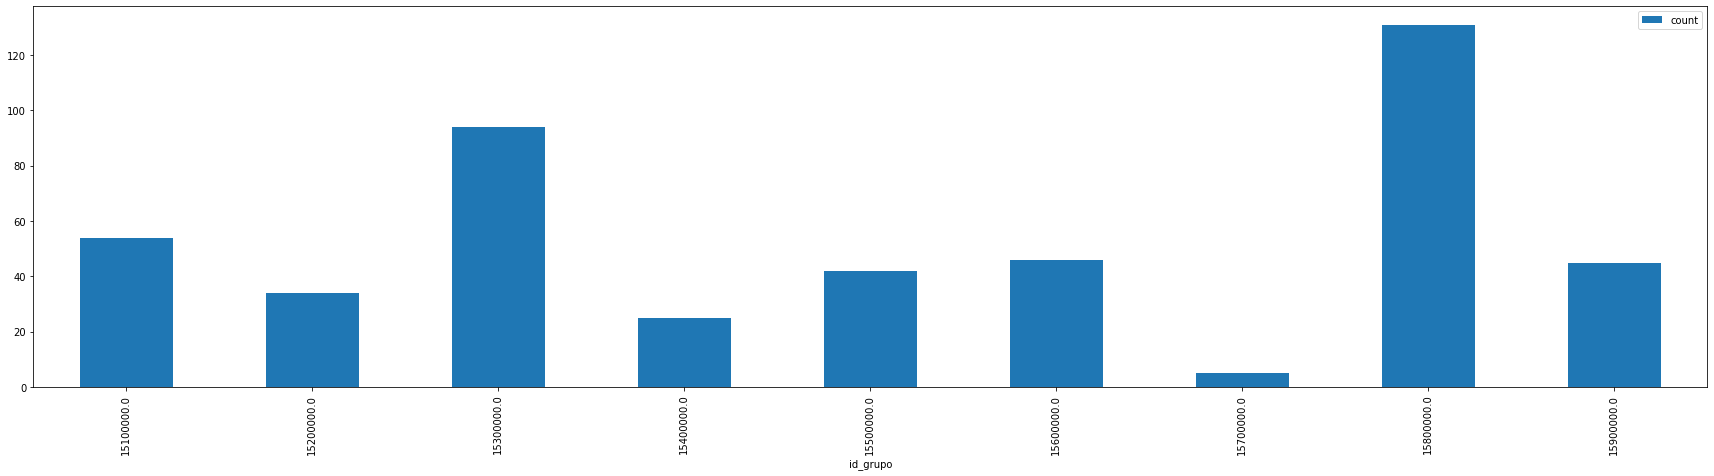

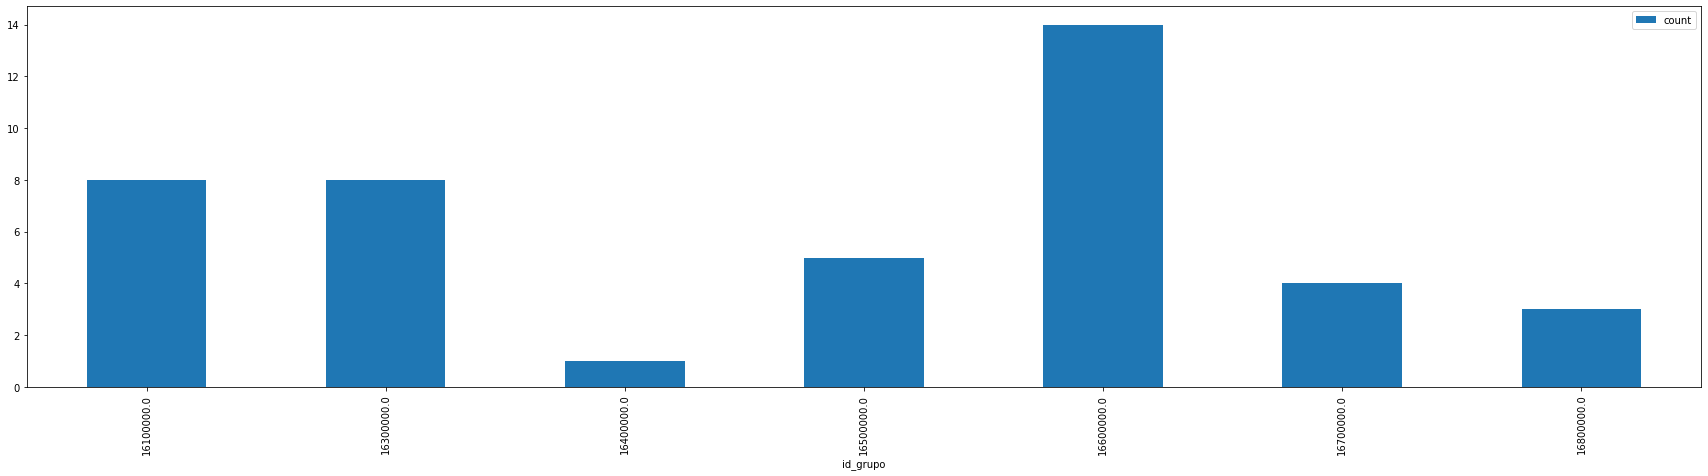

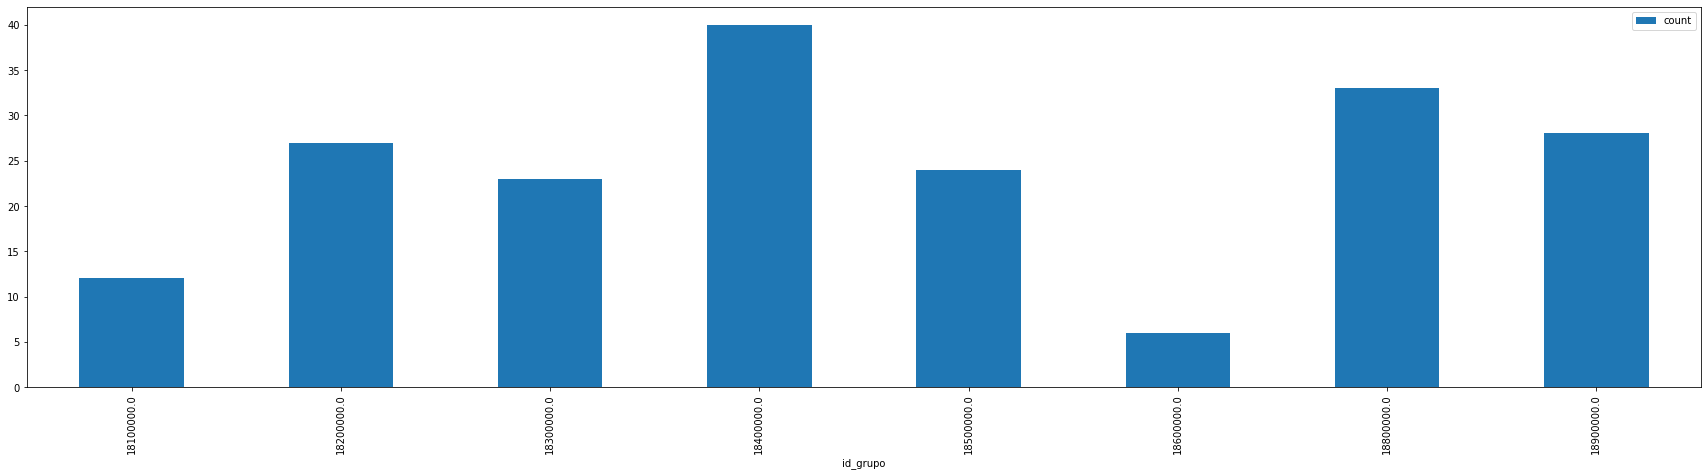

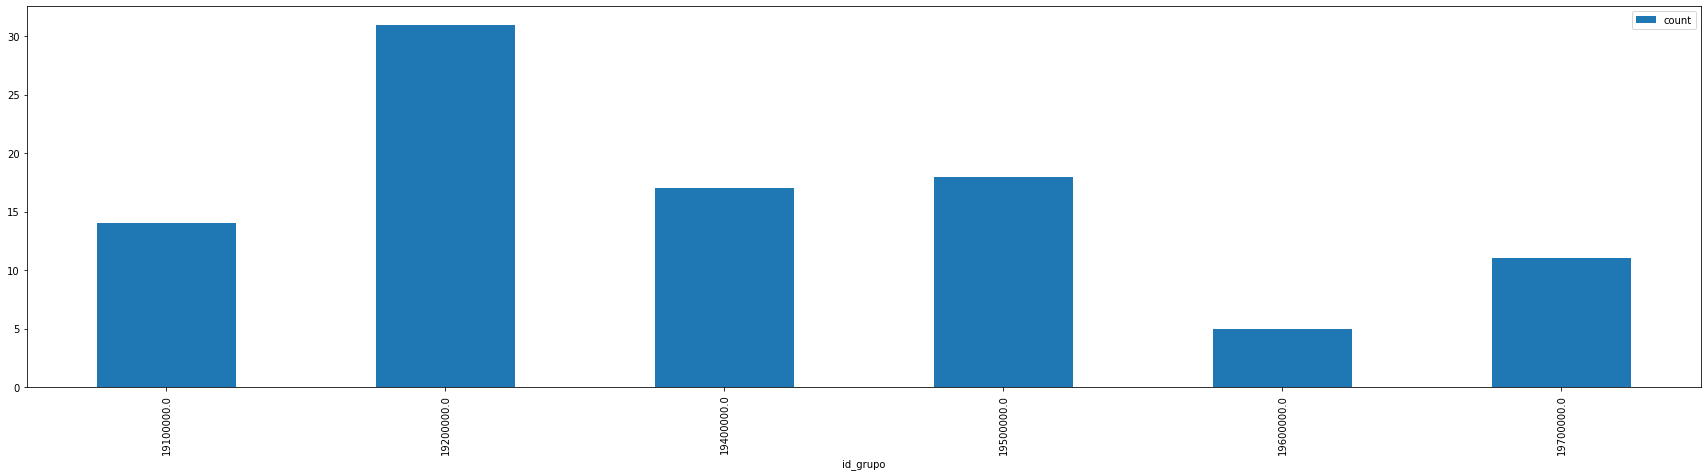

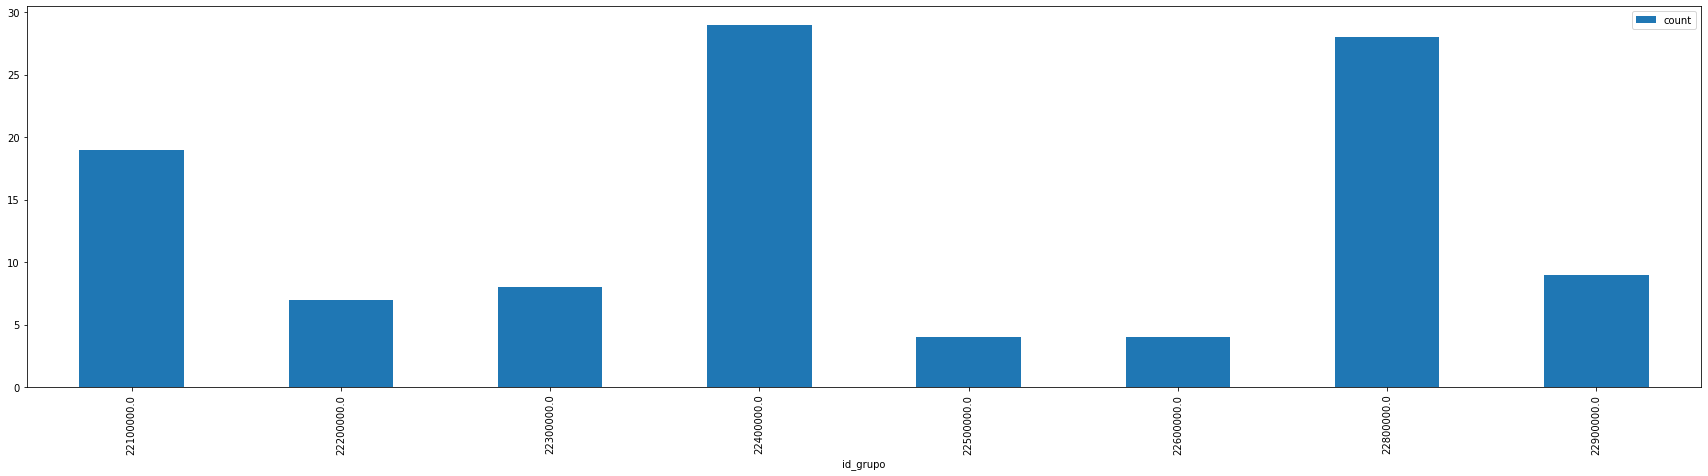

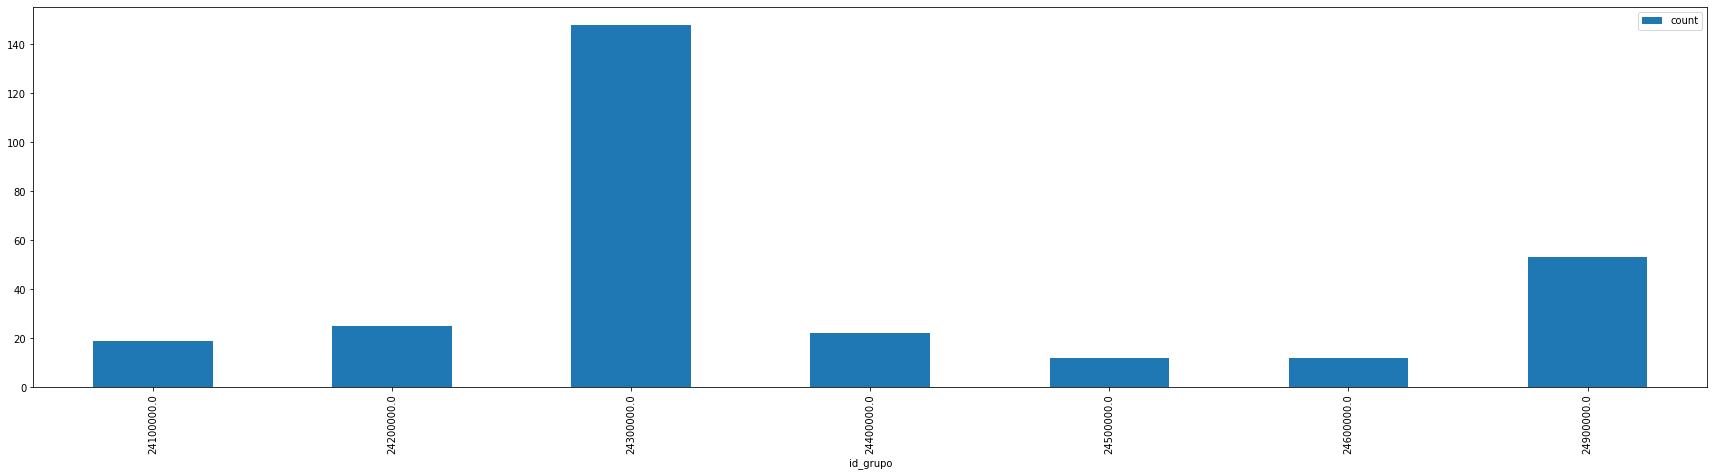

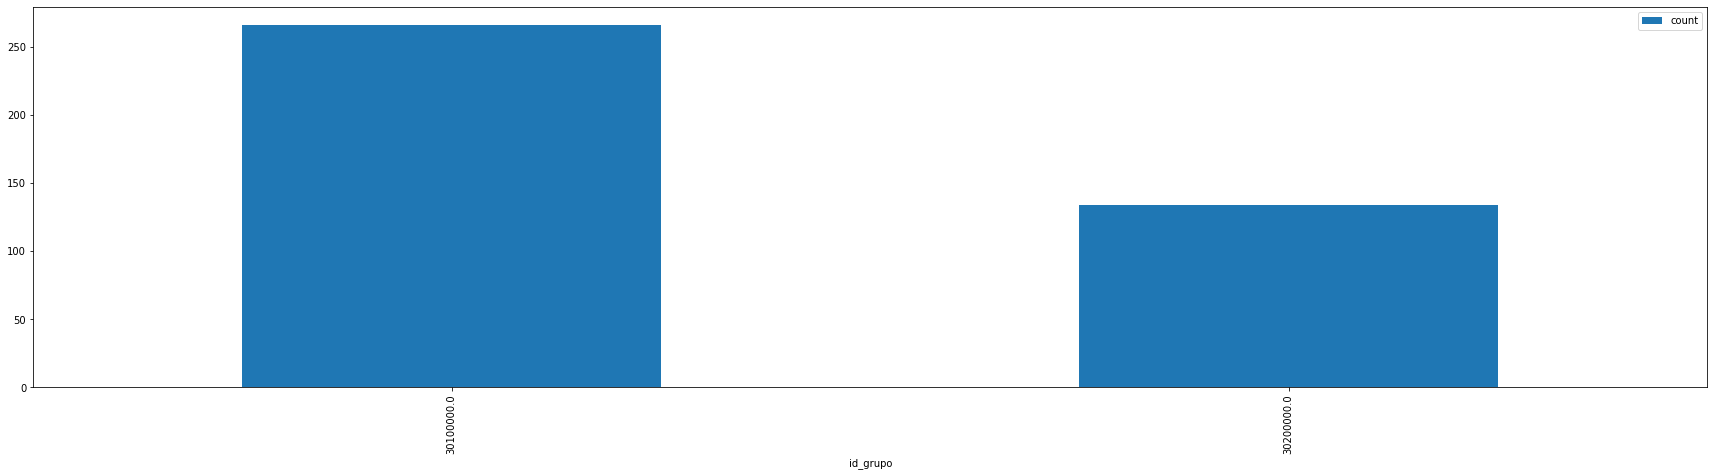

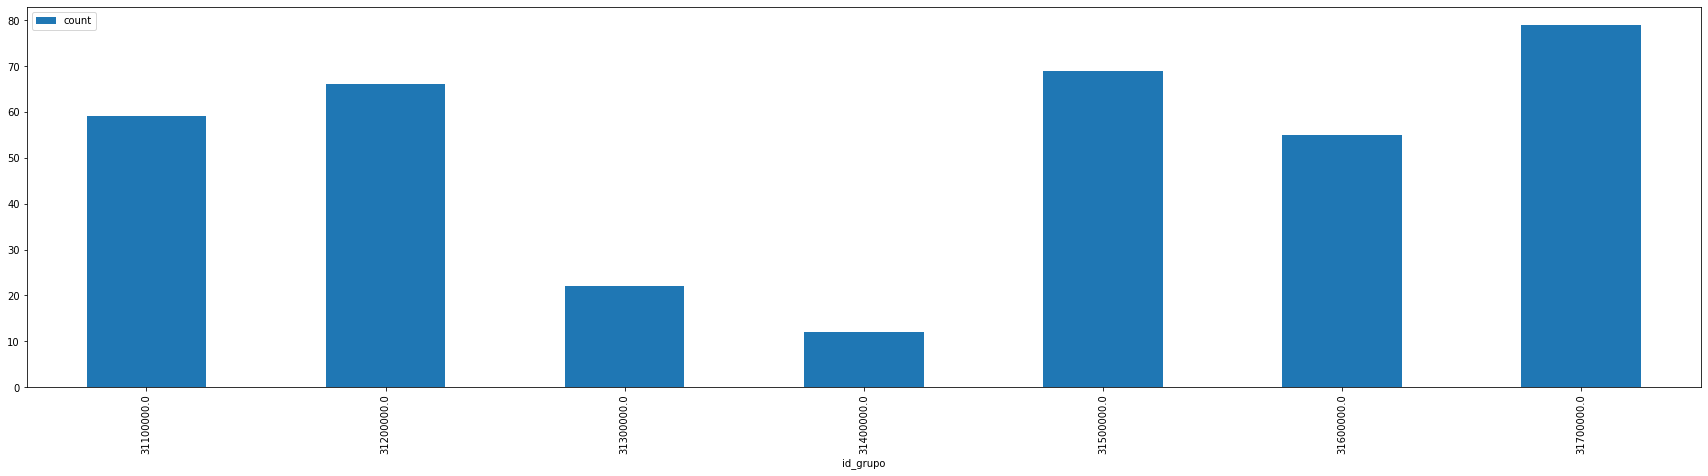

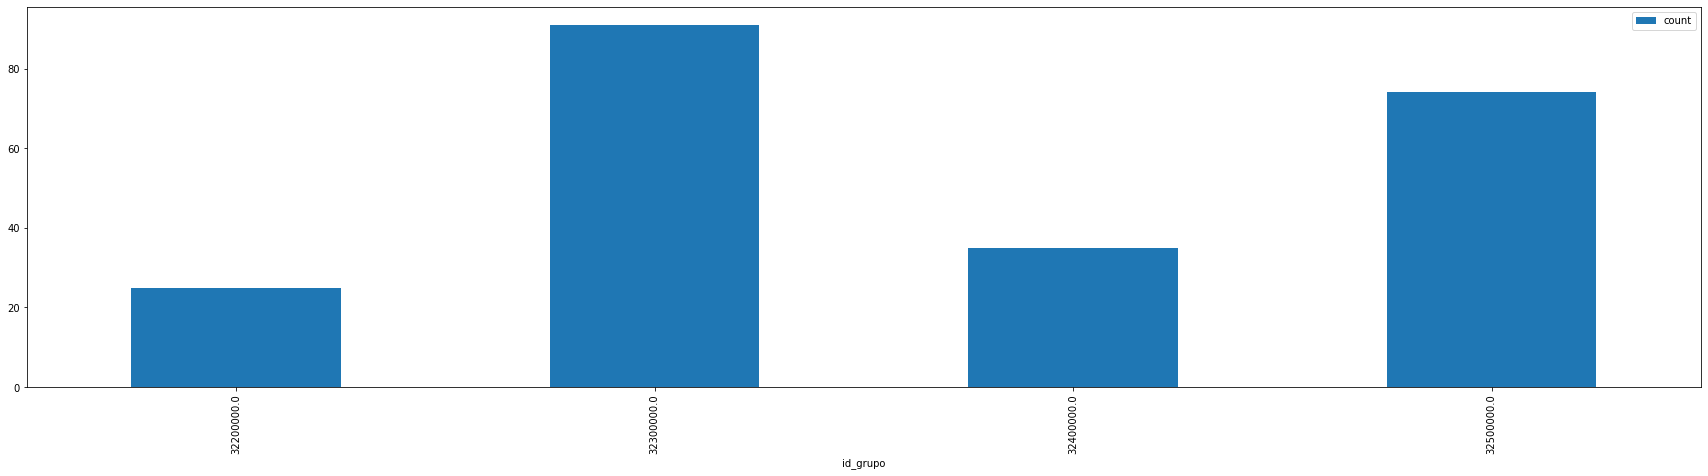

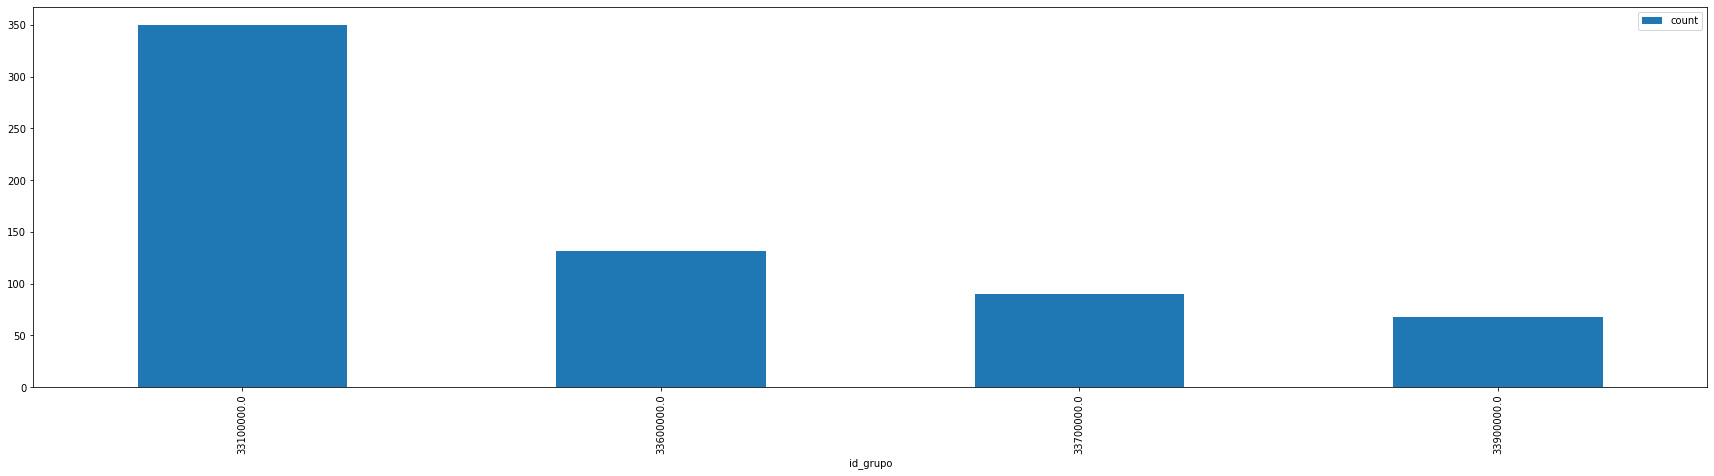

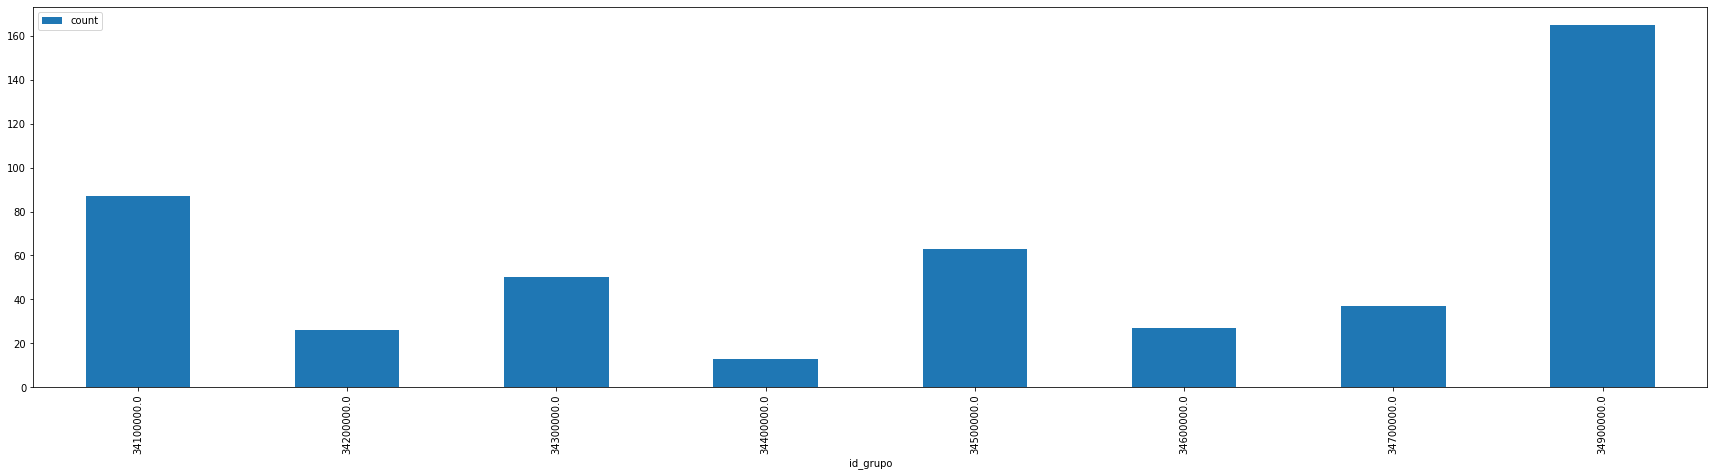

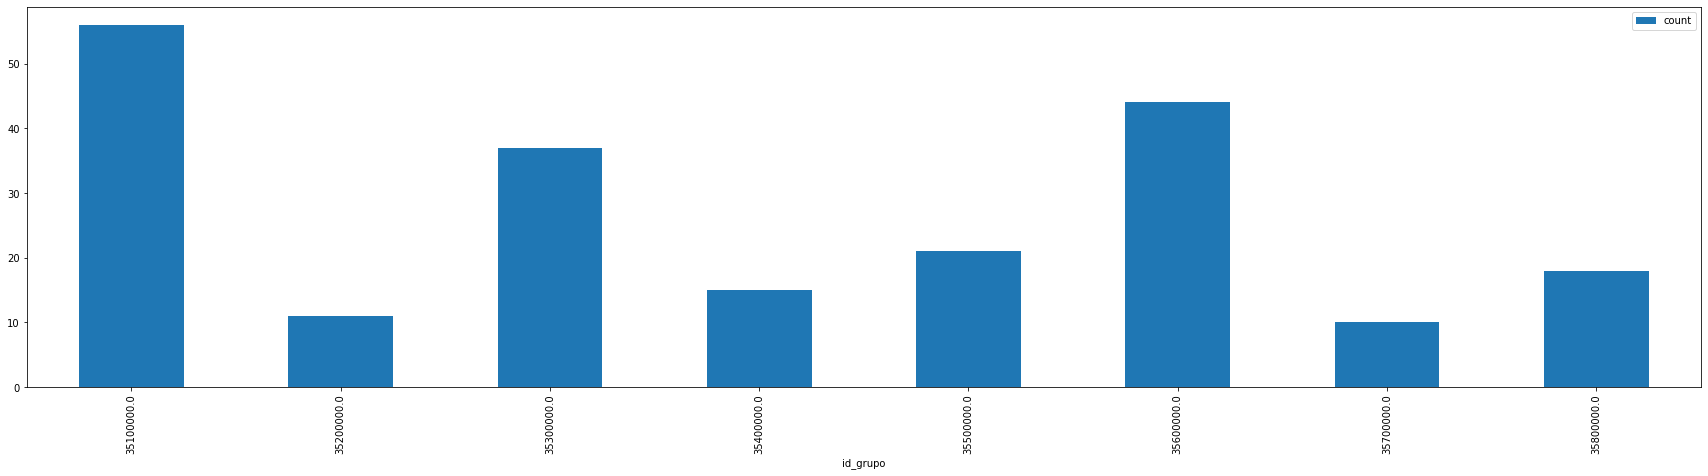

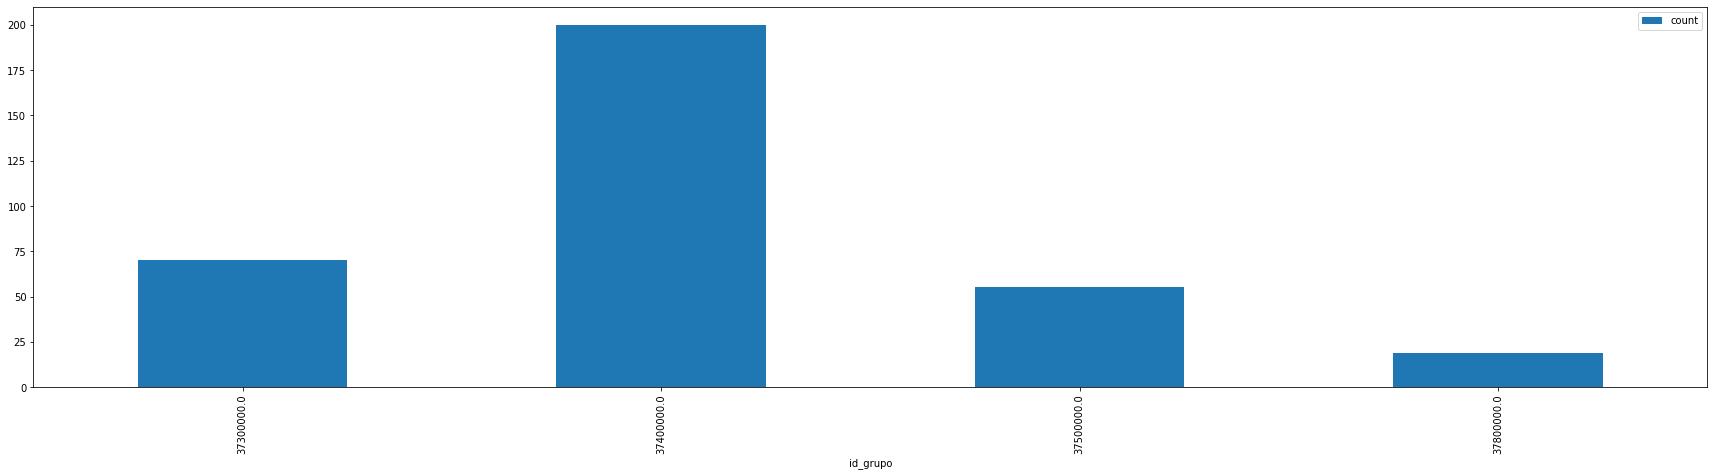

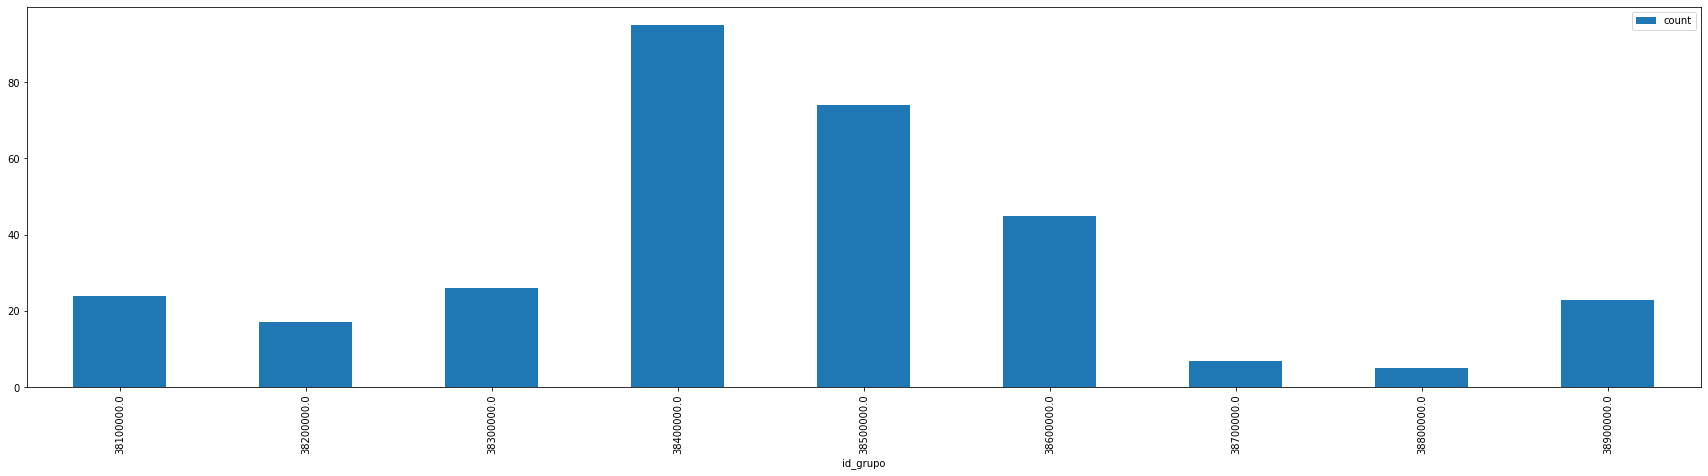

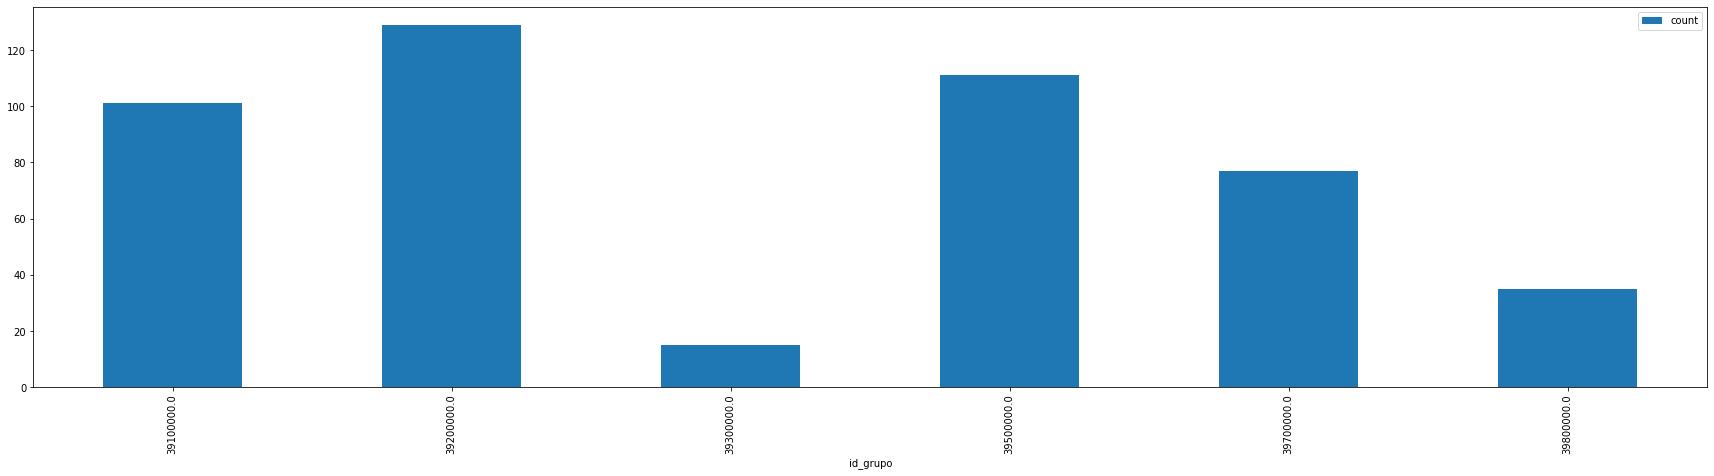

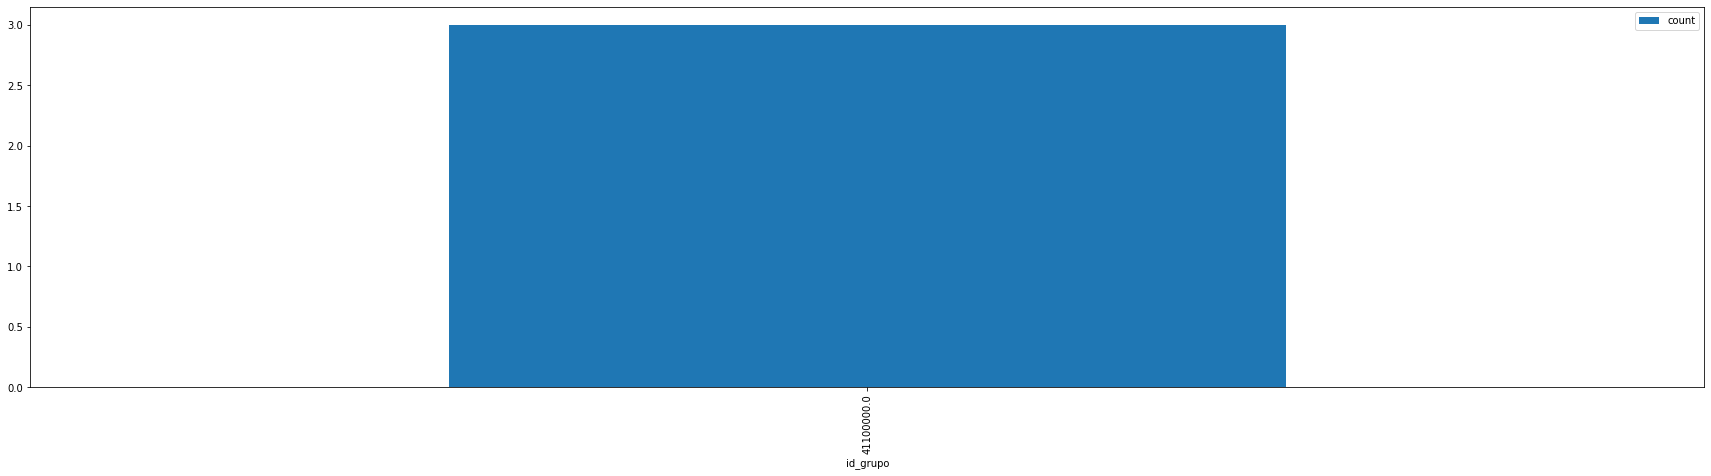

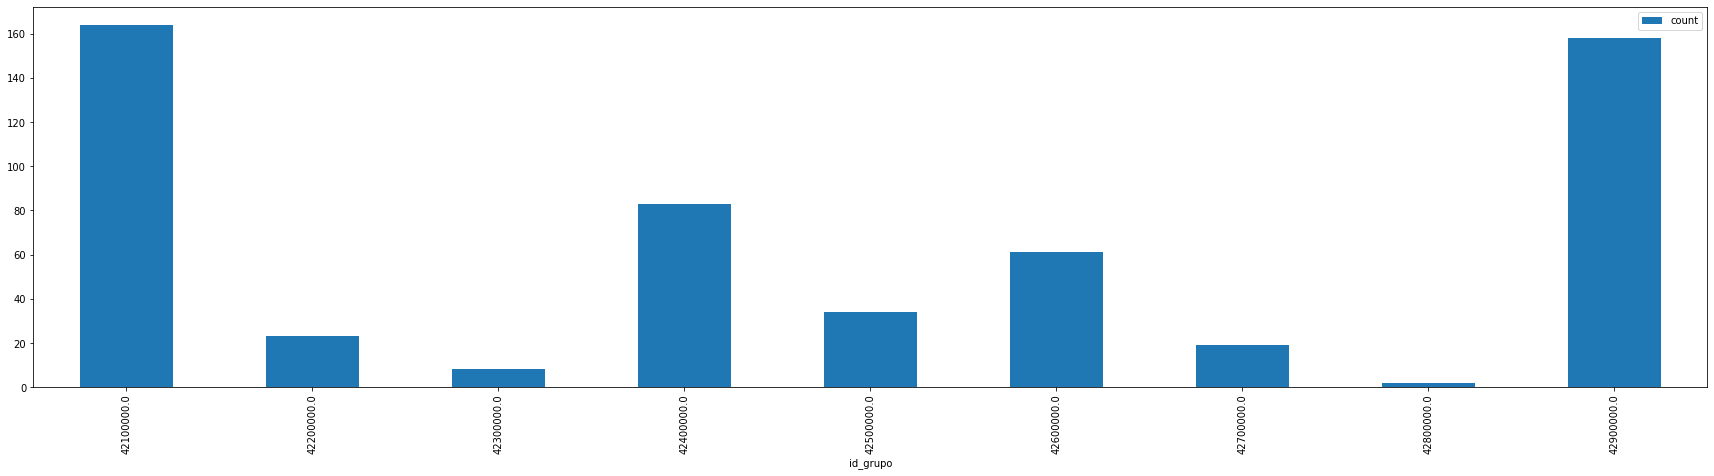

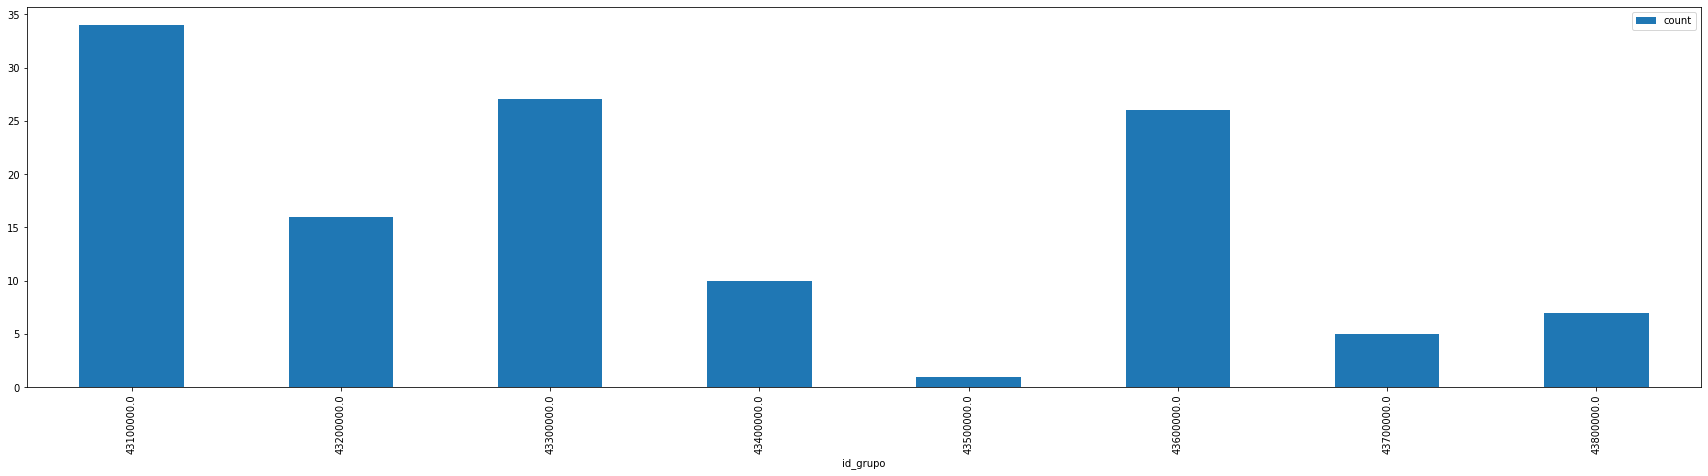

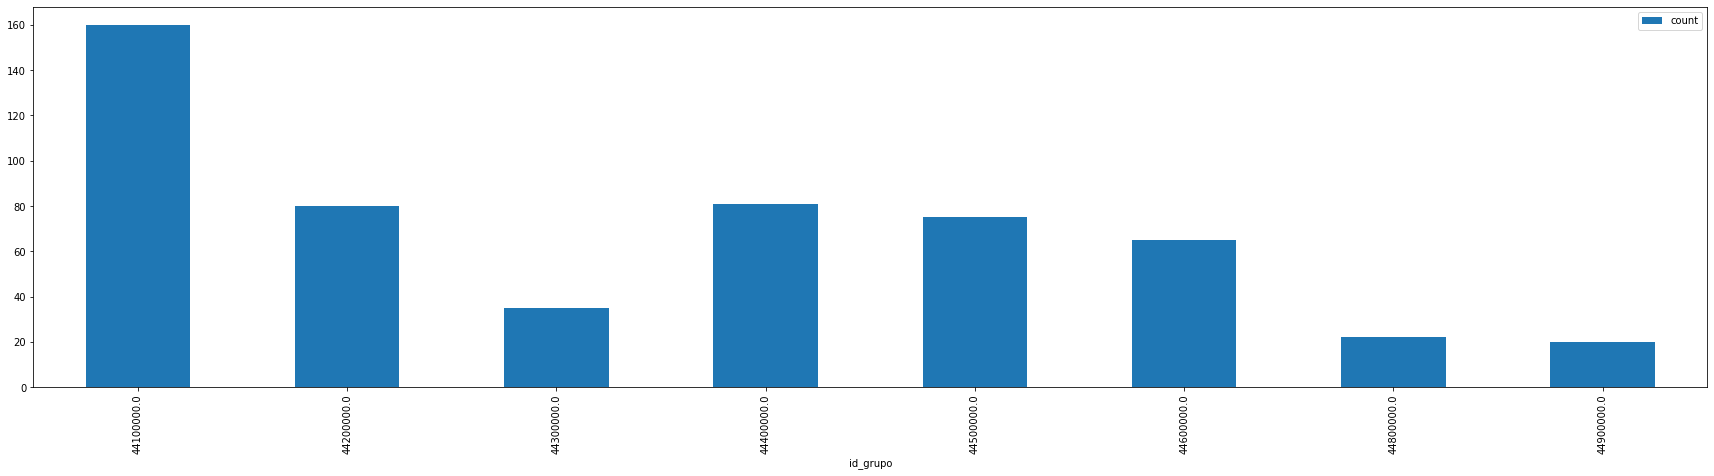

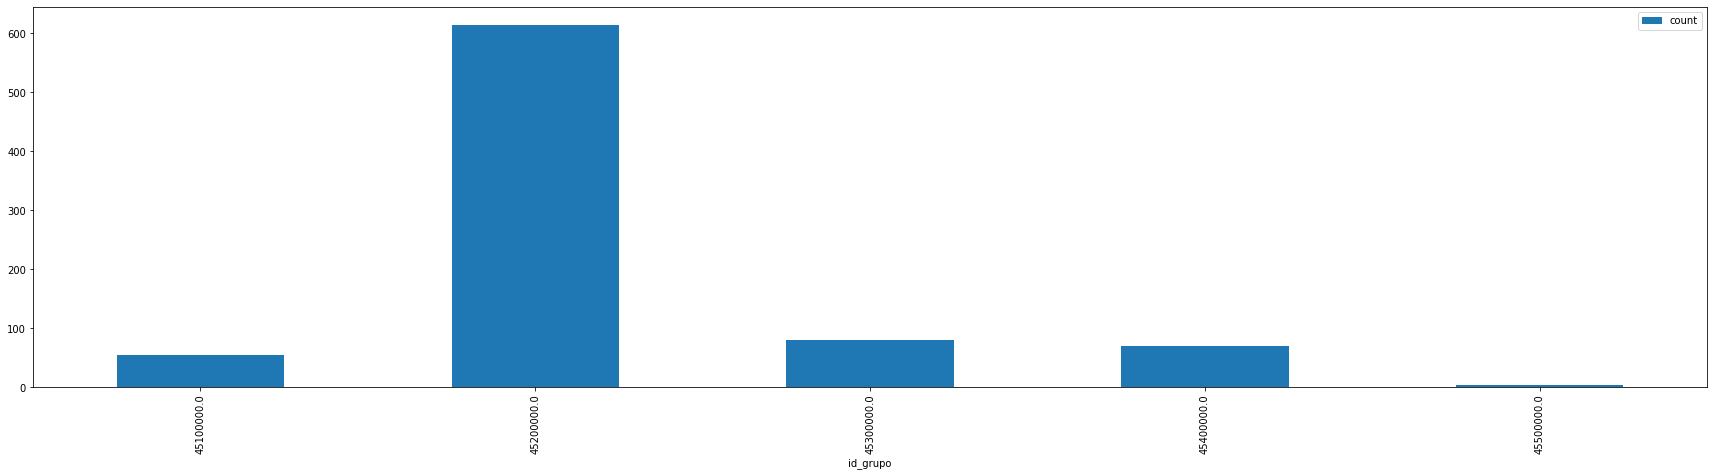

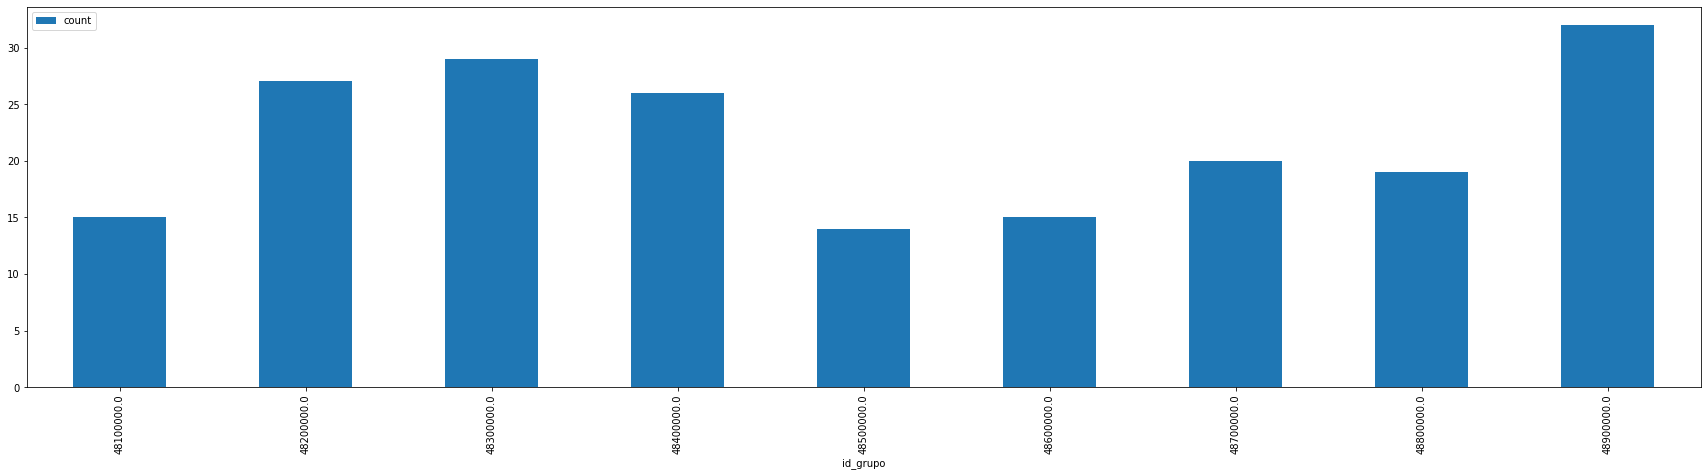

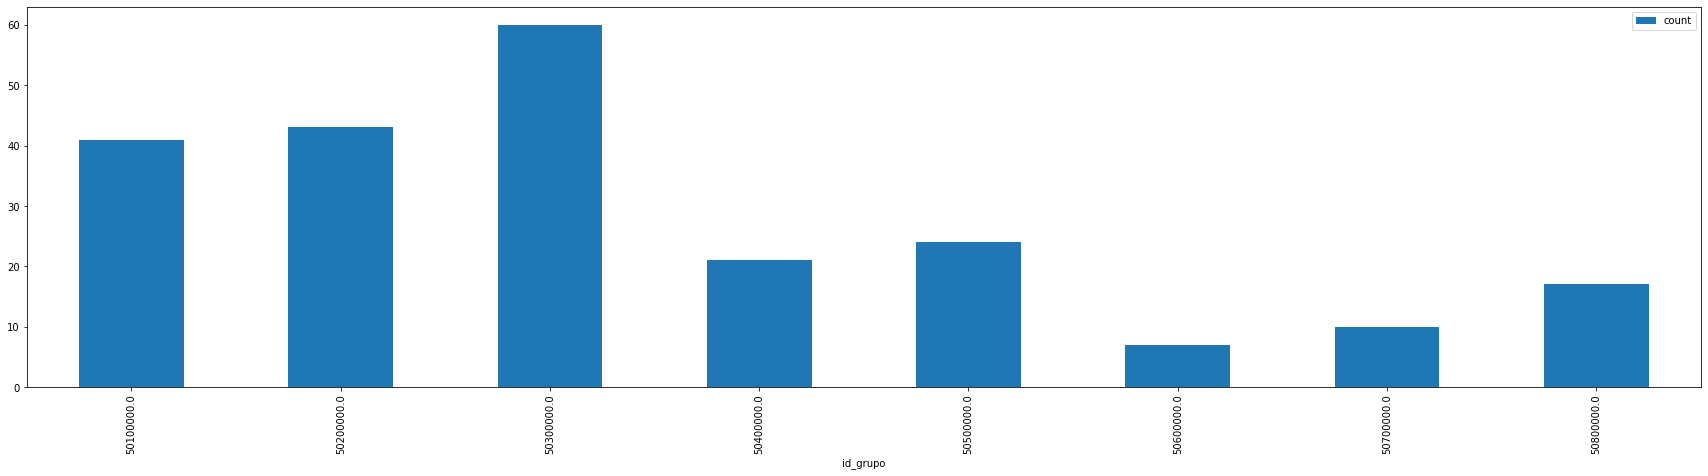

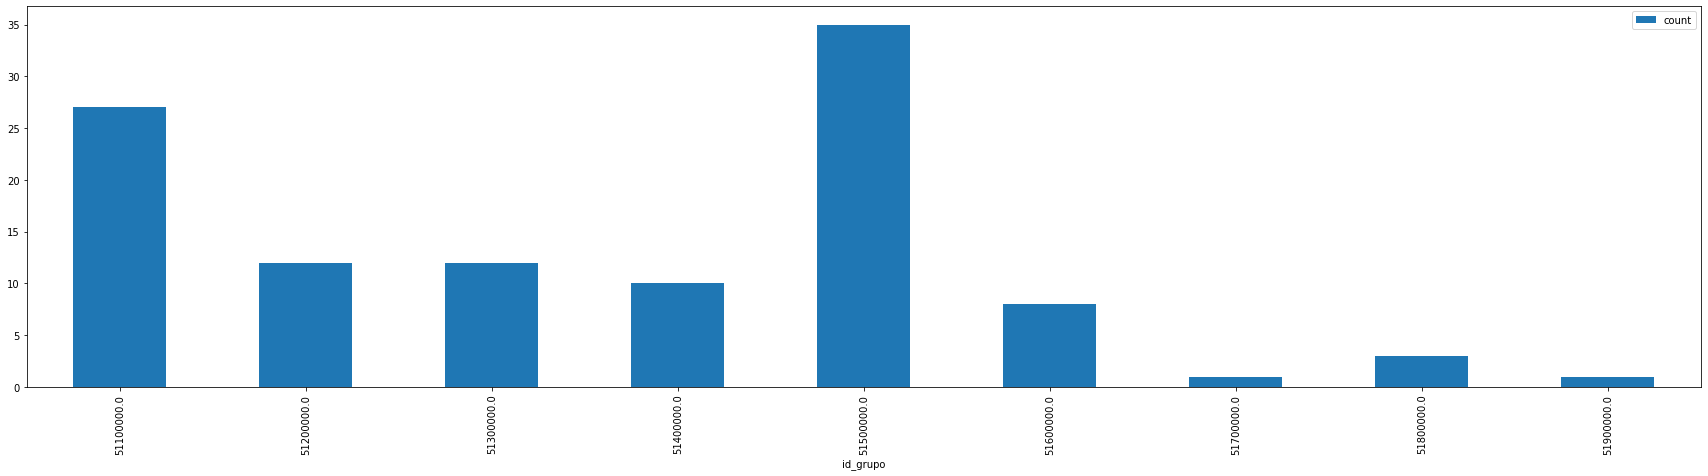

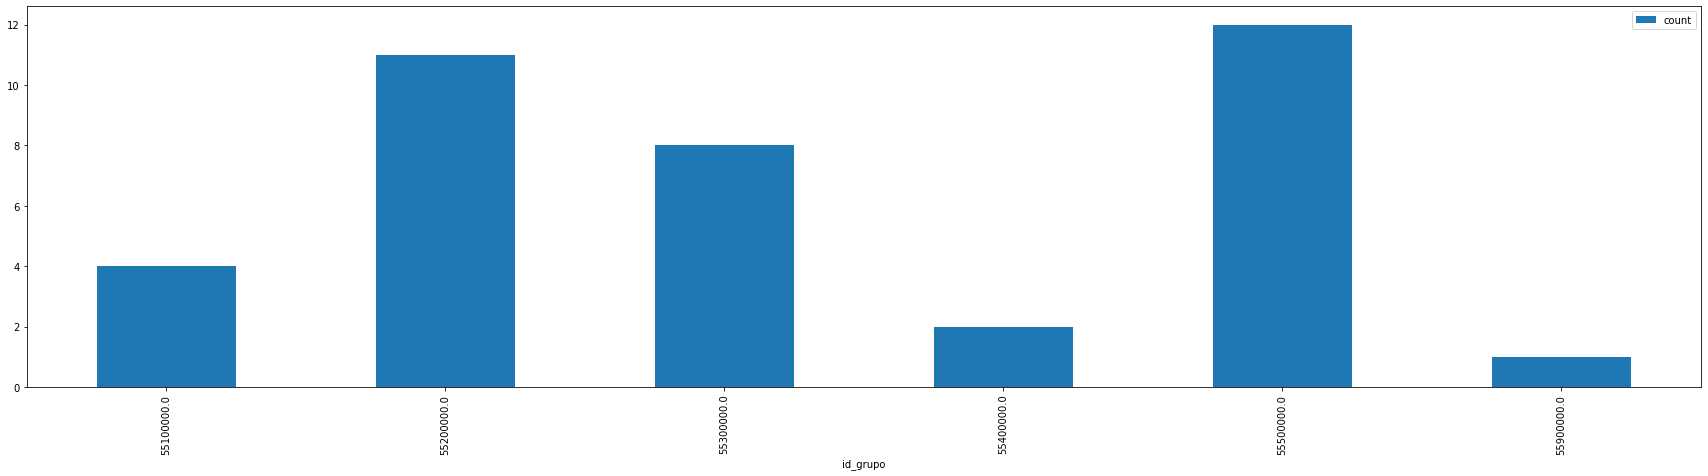

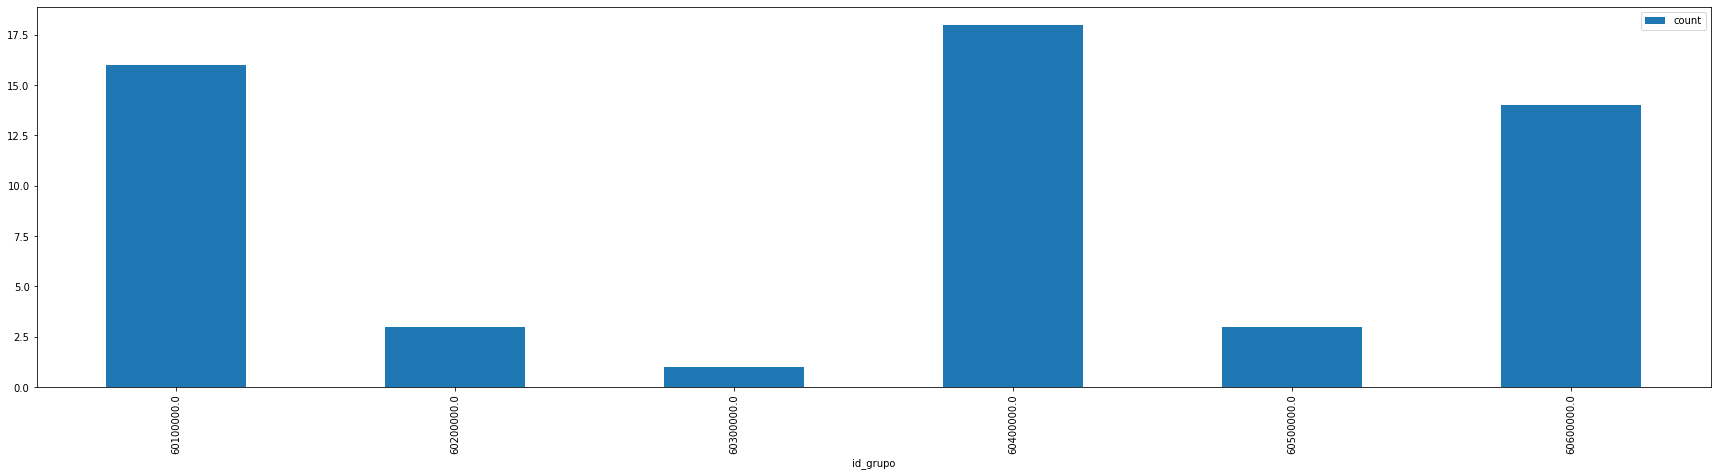

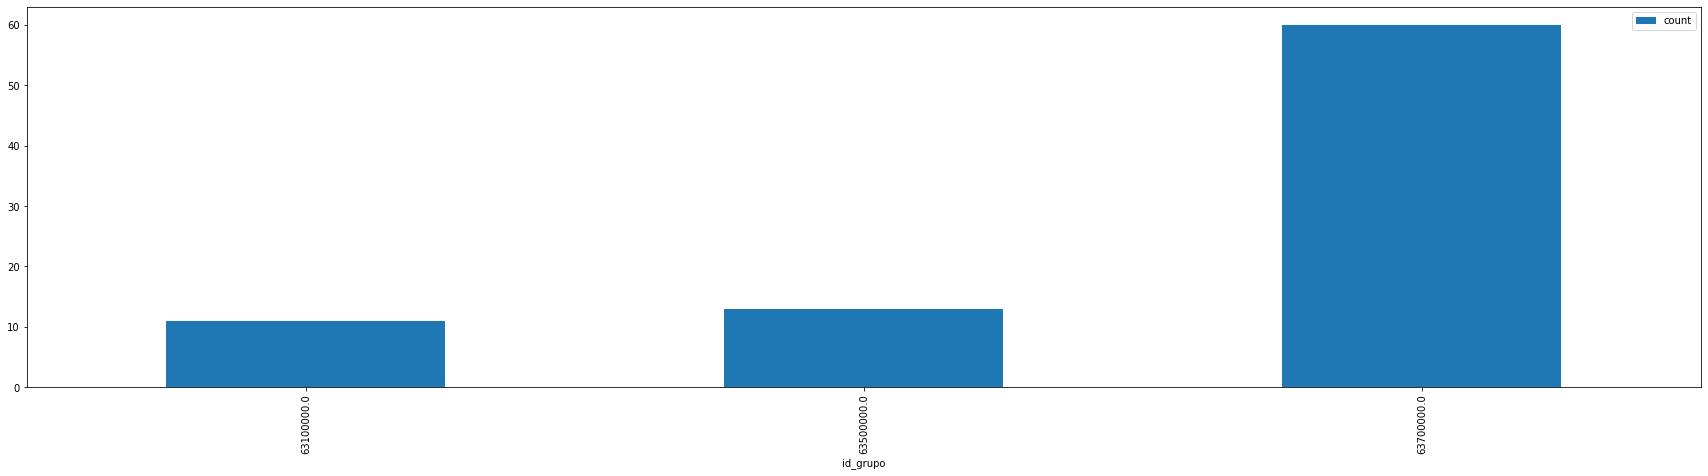

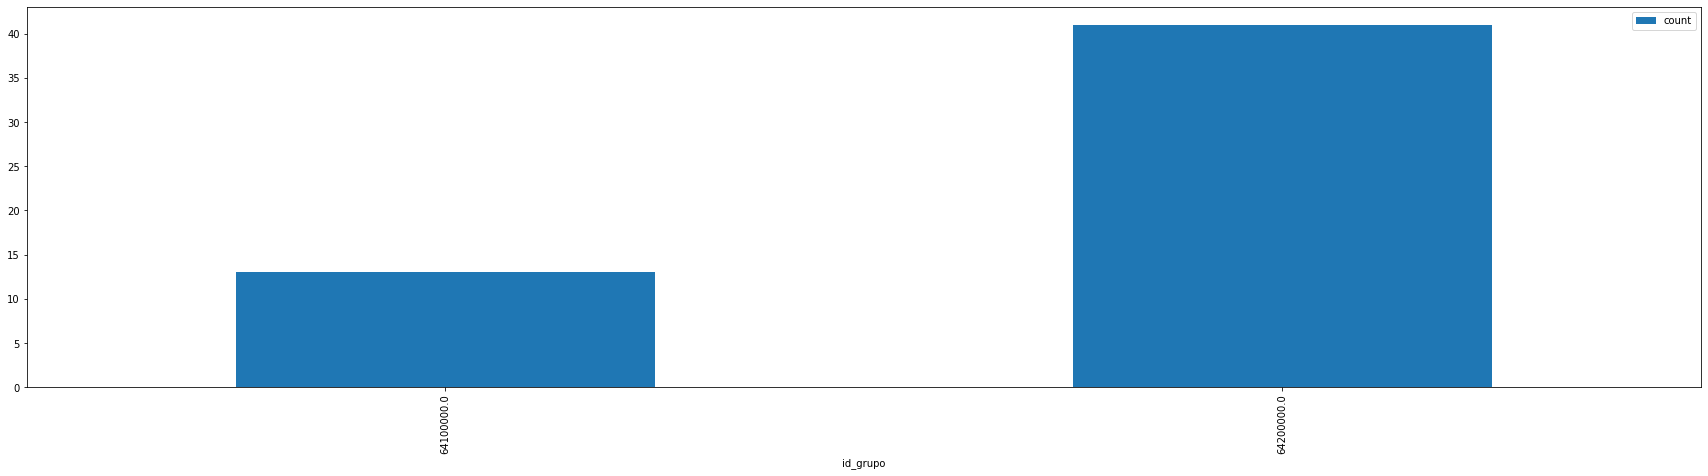

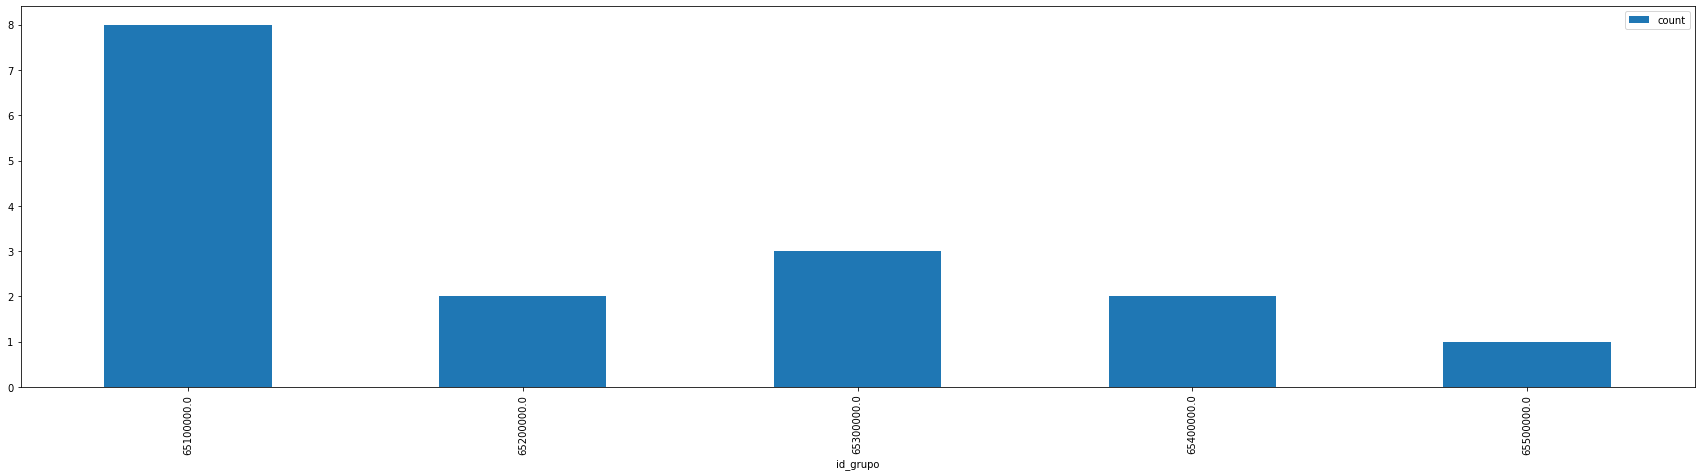

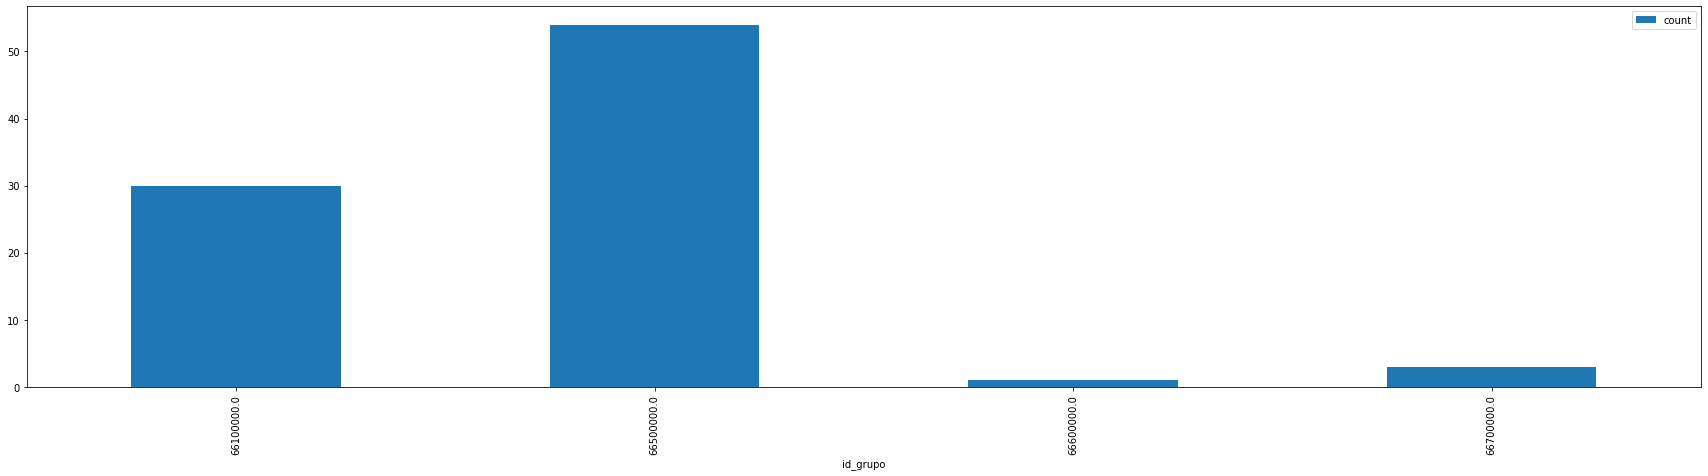

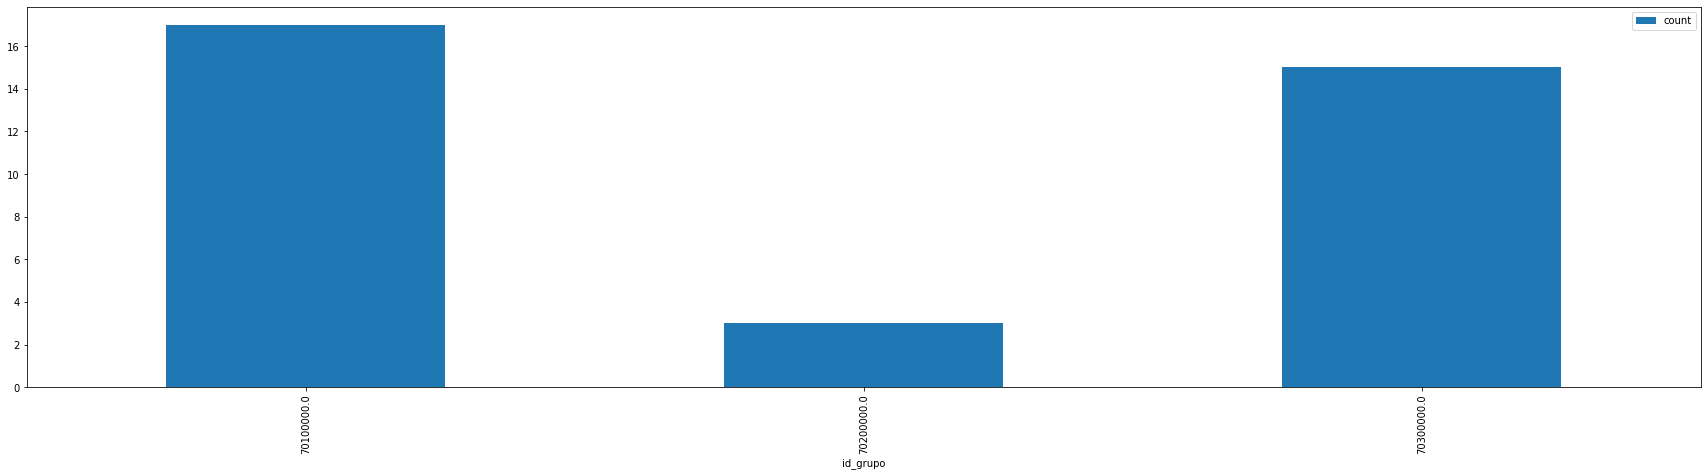

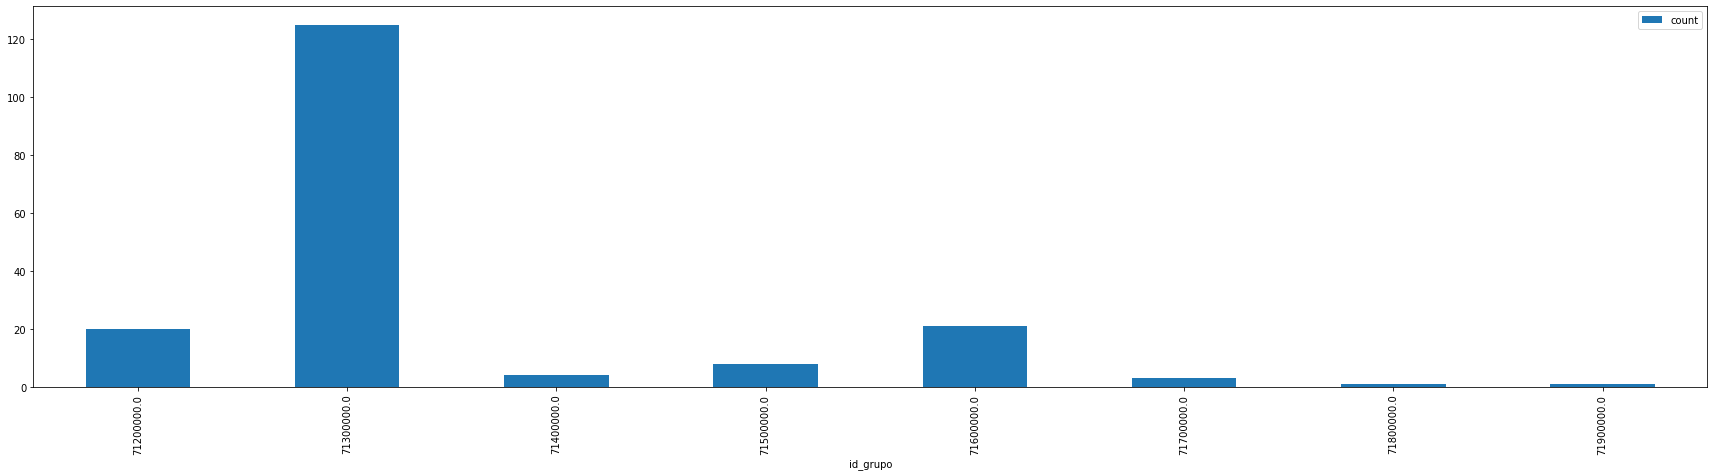

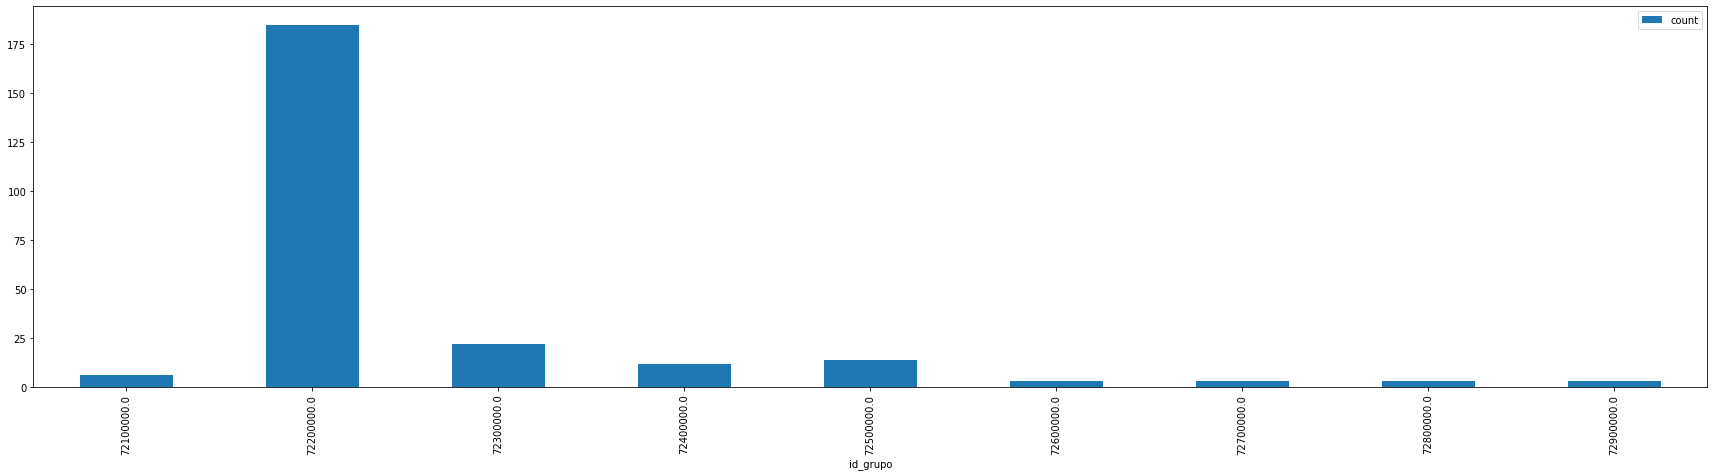

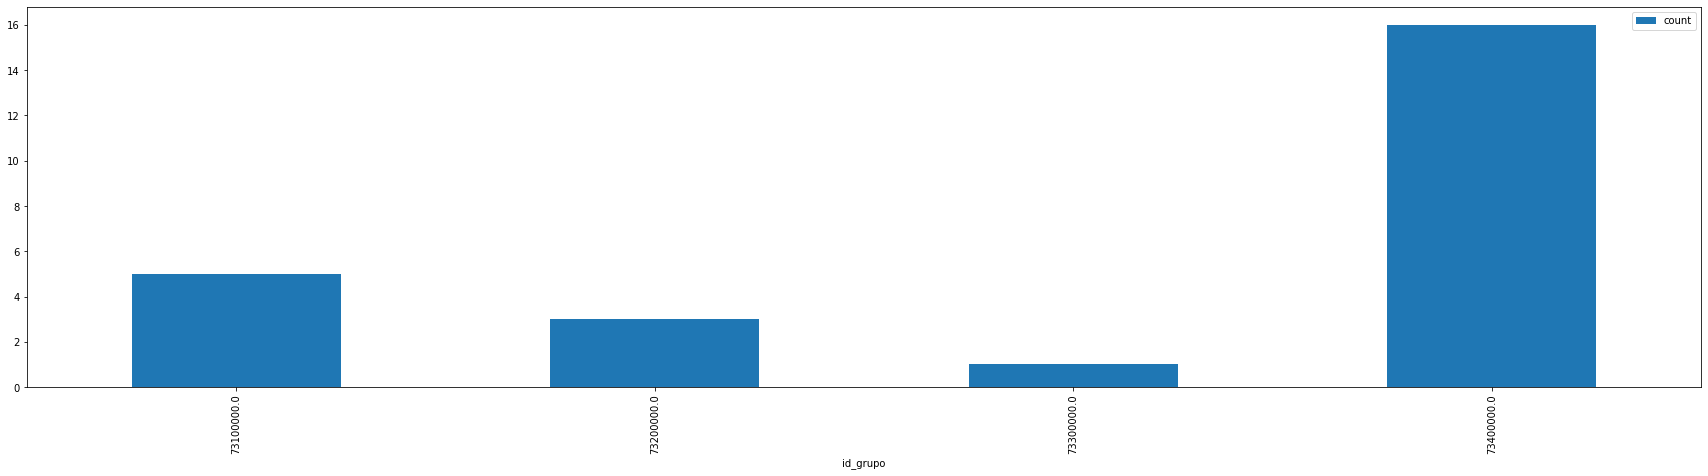

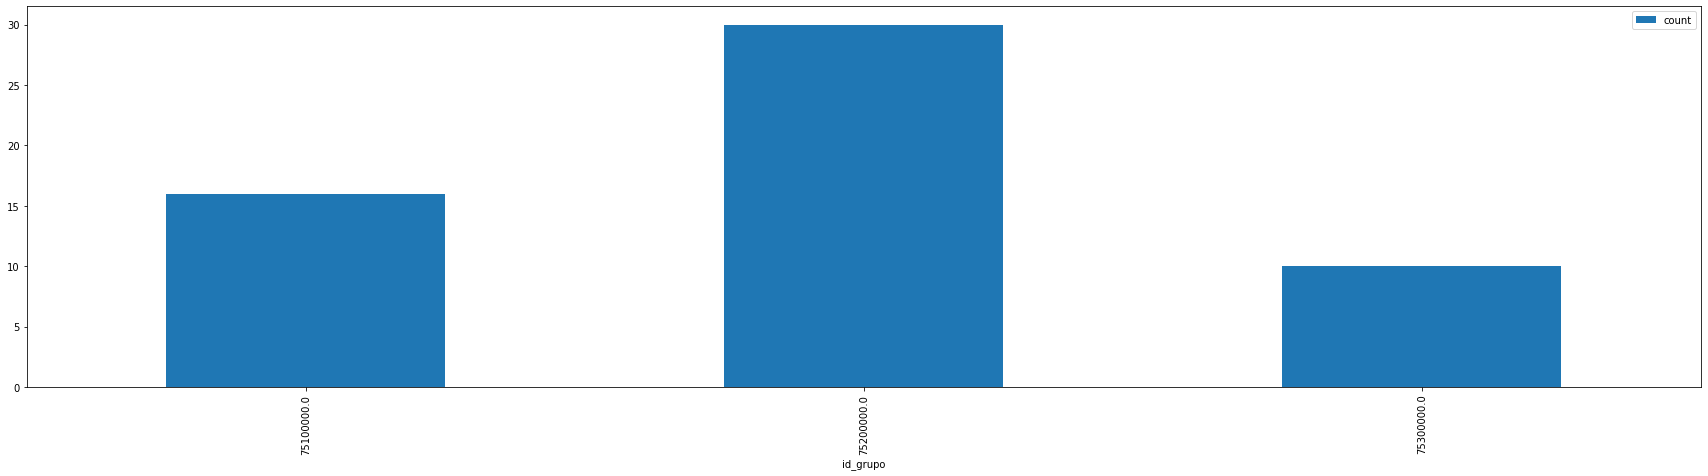

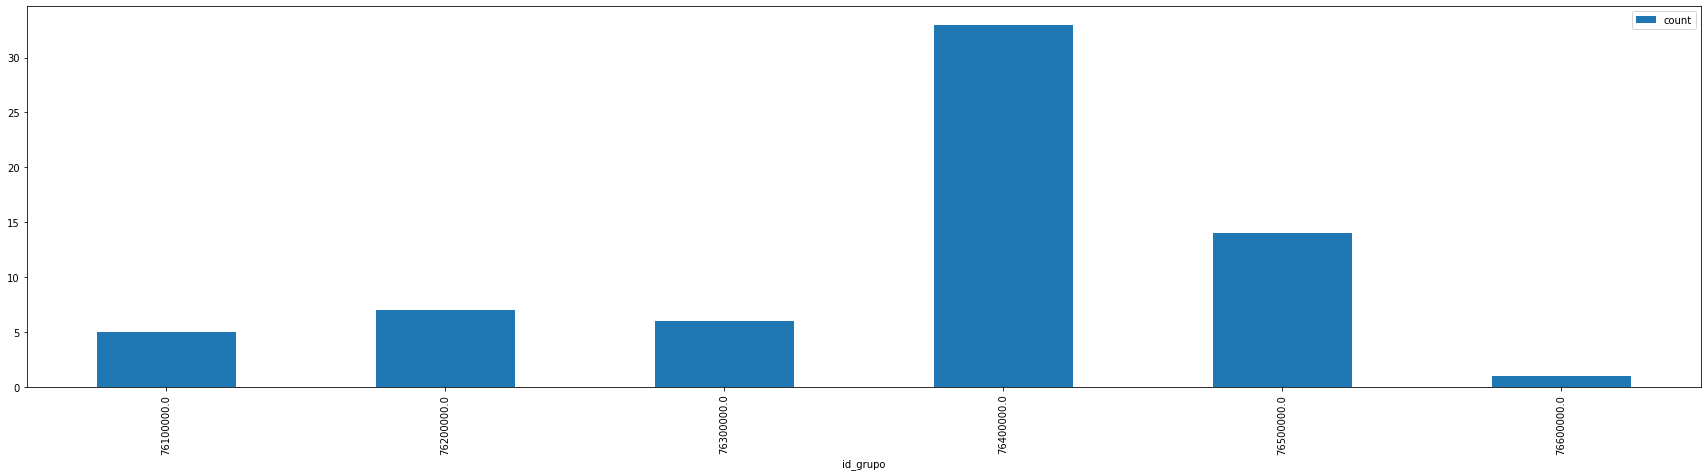

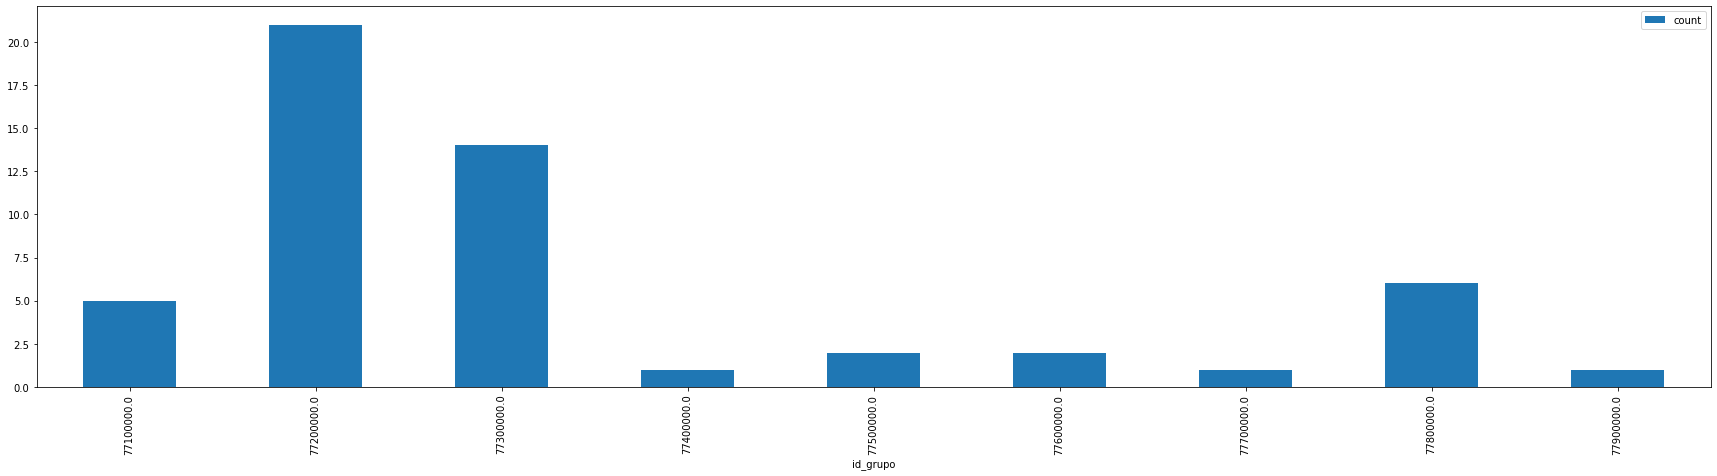

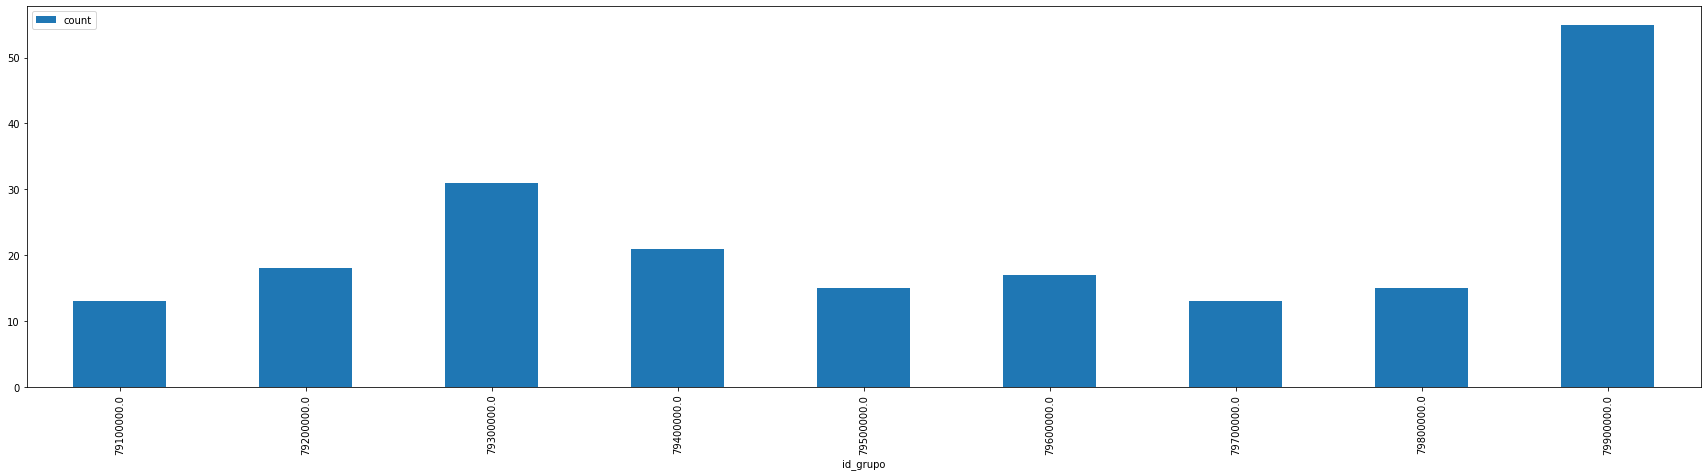

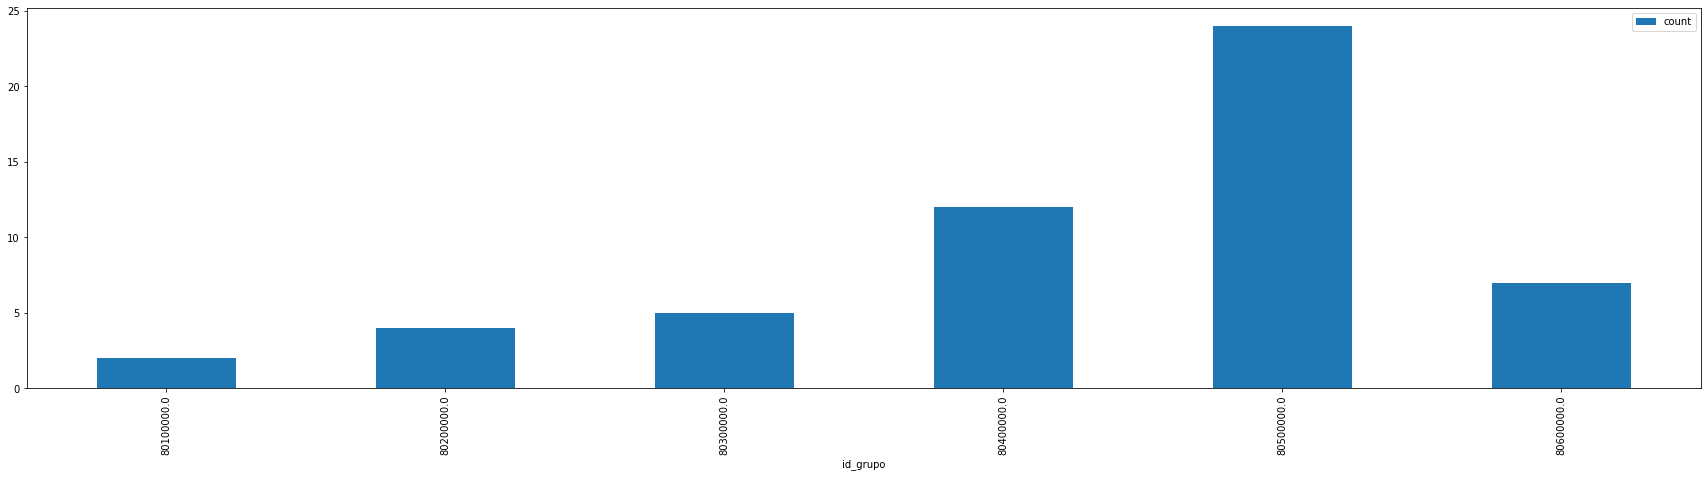

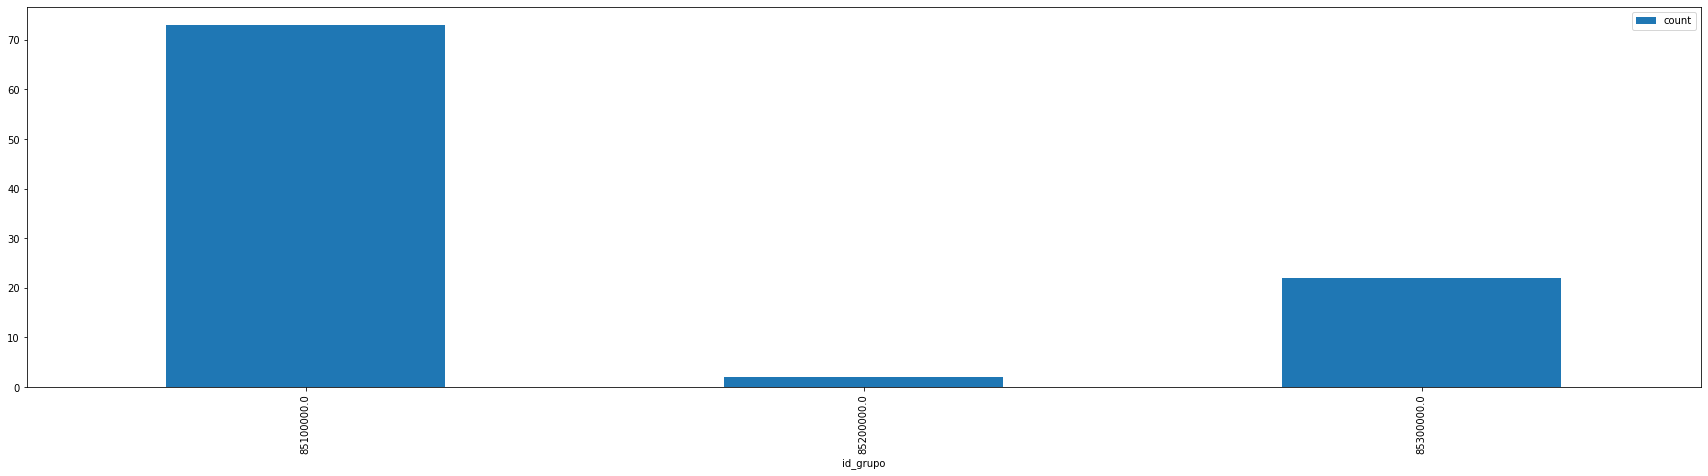

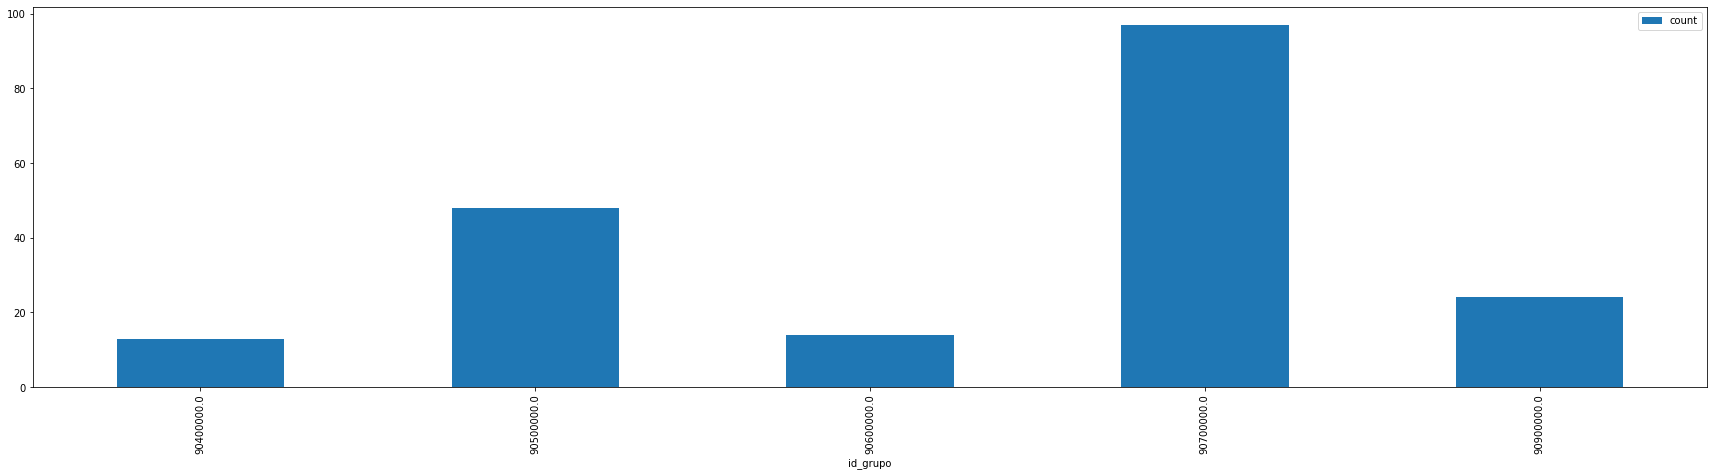

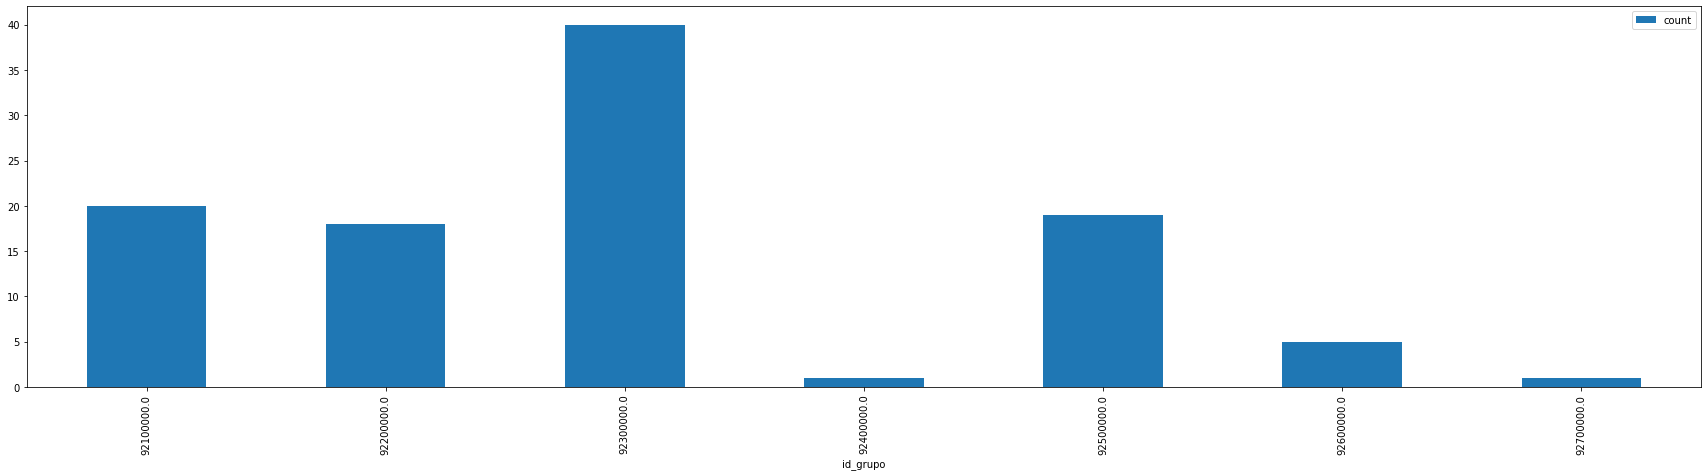

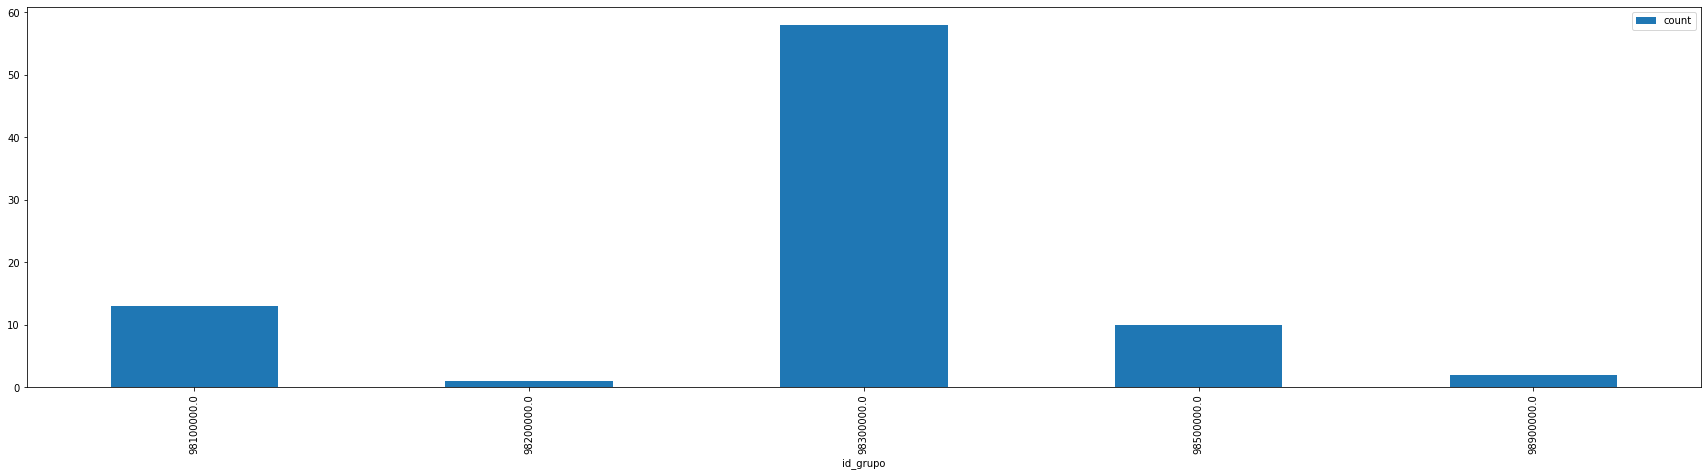

In [ ]:
#¿Cuántos CPVs hay por cada grupo en la clasificación? 
cpvs.groupby(['id_division', 'id_grupo']).size().reset_index(name='count').groupby(['id_division']).plot(x='id_grupo', y='count', kind='bar', figsize=(30,7))

In [ ]:
#CLASE
#¿Cuántas clases hay?
cpvs.groupby(['id_clase'])['id_clase'].unique().count()

1004

In [ ]:
#¿Cuántas clases hay por división?
cpvs.groupby(['id_division', 'id_grupo', 'id_clase']).size().reset_index(name='count').groupby(['id_division']).count().mean()

id_grupo    22.311111
id_clase    22.311111
count       22.311111
dtype: float64

In [ ]:
#¿Cuántas clases hay por división?
cpvs.groupby(['id_division', 'id_grupo', 'id_clase']).size().reset_index(name='count').groupby(['id_division']).count()['count']

id_division
3000000     16
9000000     11
14000000    27
15000000    36
16000000    24
18000000    25
19000000    27
22000000    25
24000000    25
30000000    12
31000000    33
32000000    25
33000000    33
34000000    36
35000000    26
37000000    16
38000000    44
39000000    33
41000000     2
42000000    38
43000000    23
44000000    33
45000000    20
48000000    47
50000000    35
51000000    25
55000000    15
60000000    20
63000000     7
64000000     4
65000000     7
66000000    13
70000000     9
71000000    21
72000000    26
73000000     7
75000000    12
76000000    19
77000000    16
79000000    36
80000000    25
85000000    10
90000000    27
92000000    19
98000000    14
Name: count, dtype: int64

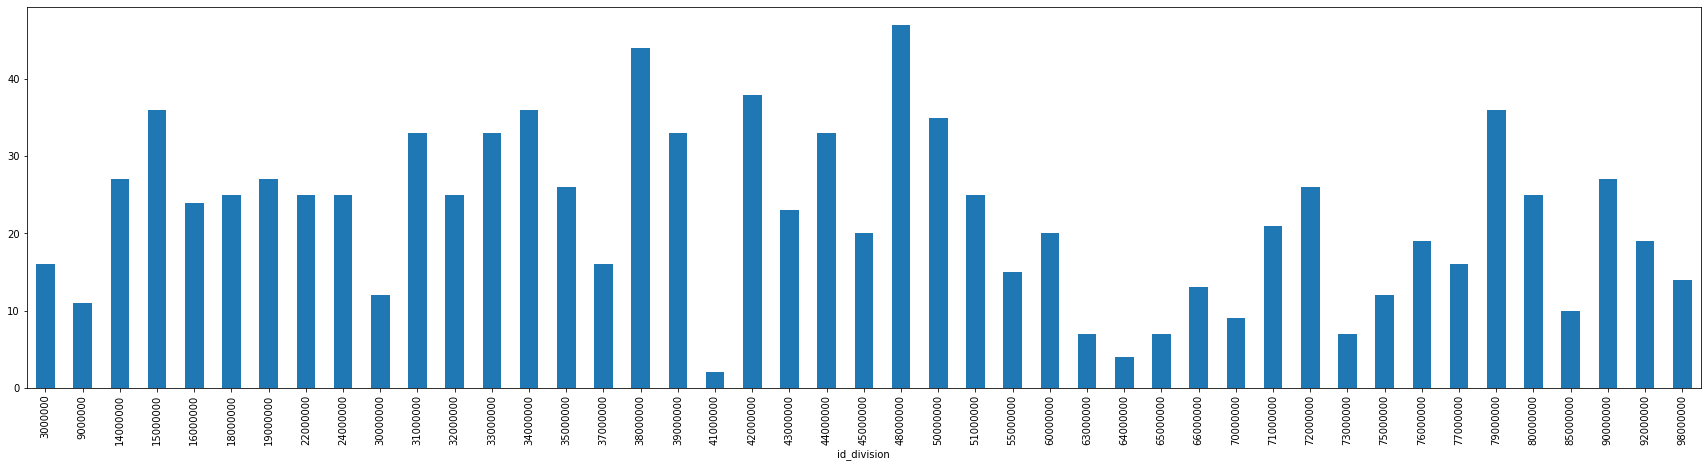

In [ ]:
#¿Cuántas clases hay por división?
cpvs.groupby(['id_division', 'id_grupo', 'id_clase']).size().reset_index(name='count').groupby(['id_division']).count()['count'].plot(kind='bar', figsize=(30,7))

In [ ]:
#¿Cuántas clases hay por grupo?
cpvs.groupby(['id_division', 'id_grupo', 'id_clase']).size().reset_index(name='count').groupby(['id_division','id_grupo']).count()['count']

id_division  id_grupo  
3000000      3100000.0     4
             3200000.0     2
             3300000.0     4
             3400000.0     6
9000000      9100000.0     3
                          ..
92000000     92600000.0    2
98000000     98100000.0    3
             98300000.0    9
             98500000.0    1
             98900000.0    1
Name: count, Length: 254, dtype: int64

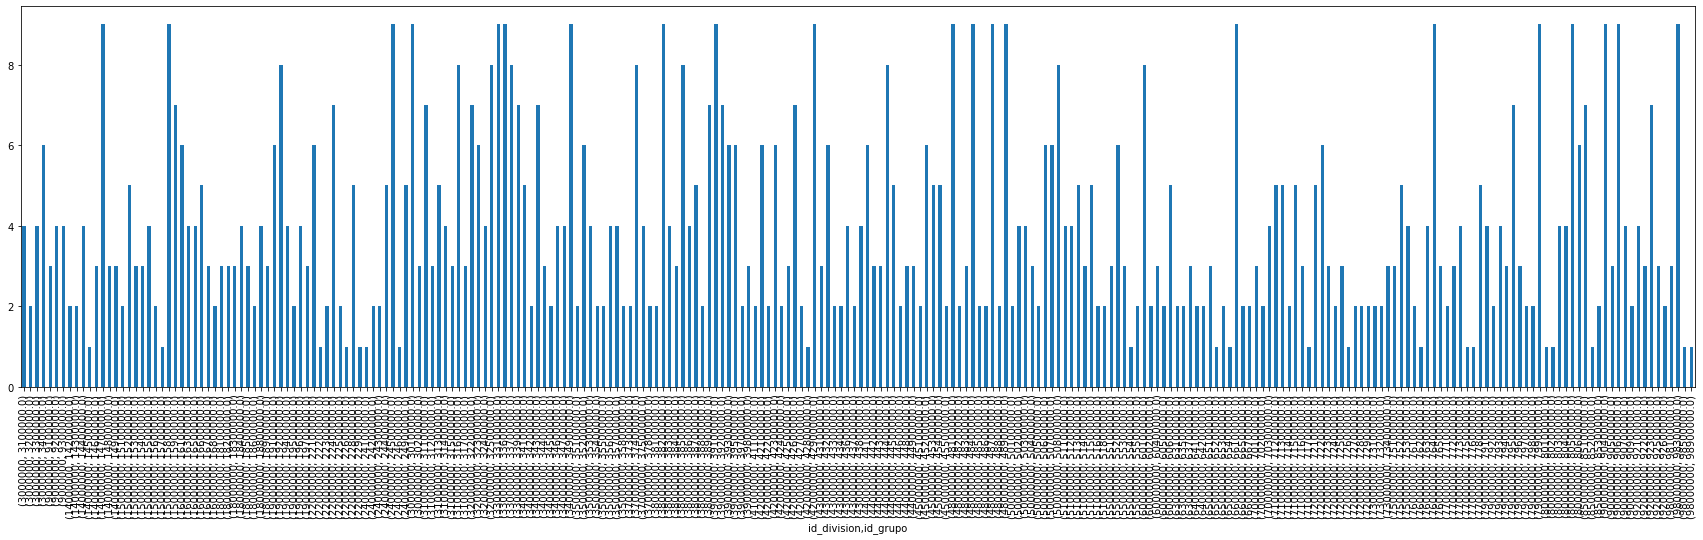

In [ ]:
#¿Cuántas clases hay por grupo?
cpvs.groupby(['id_division', 'id_grupo', 'id_clase']).size().reset_index(name='count').groupby(['id_division','id_grupo']).count()['count'].plot(kind='bar', figsize=(30,7))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


id_division
3000000     AxesSubplot(0.125,0.125;0.775x0.755)
9000000     AxesSubplot(0.125,0.125;0.775x0.755)
14000000    AxesSubplot(0.125,0.125;0.775x0.755)
15000000    AxesSubplot(0.125,0.125;0.775x0.755)
16000000    AxesSubplot(0.125,0.125;0.775x0.755)
18000000    AxesSubplot(0.125,0.125;0.775x0.755)
19000000    AxesSubplot(0.125,0.125;0.775x0.755)
22000000    AxesSubplot(0.125,0.125;0.775x0.755)
24000000    AxesSubplot(0.125,0.125;0.775x0.755)
30000000    AxesSubplot(0.125,0.125;0.775x0.755)
31000000    AxesSubplot(0.125,0.125;0.775x0.755)
32000000    AxesSubplot(0.125,0.125;0.775x0.755)
33000000    AxesSubplot(0.125,0.125;0.775x0.755)
34000000    AxesSubplot(0.125,0.125;0.775x0.755)
35000000    AxesSubplot(0.125,0.125;0.775x0.755)
37000000    AxesSubplot(0.125,0.125;0.775x0.755)
38000000    AxesSubplot(0.125,0.125;0.775x0.755)
39000000    AxesSubplot(0.125,0.125;0.775x0.755)
41000000    AxesSubplot(0.125,0.125;0.775x0.755)
42000000    AxesSubplot(0.125,0.125;0.775x0.755)
43000000

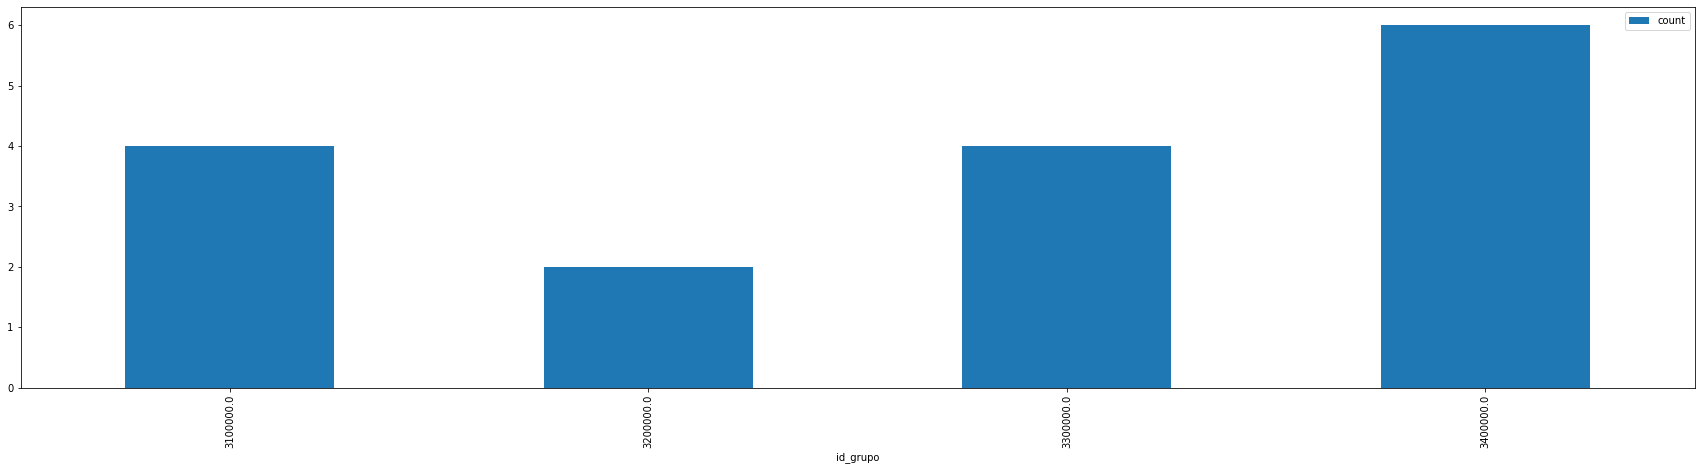

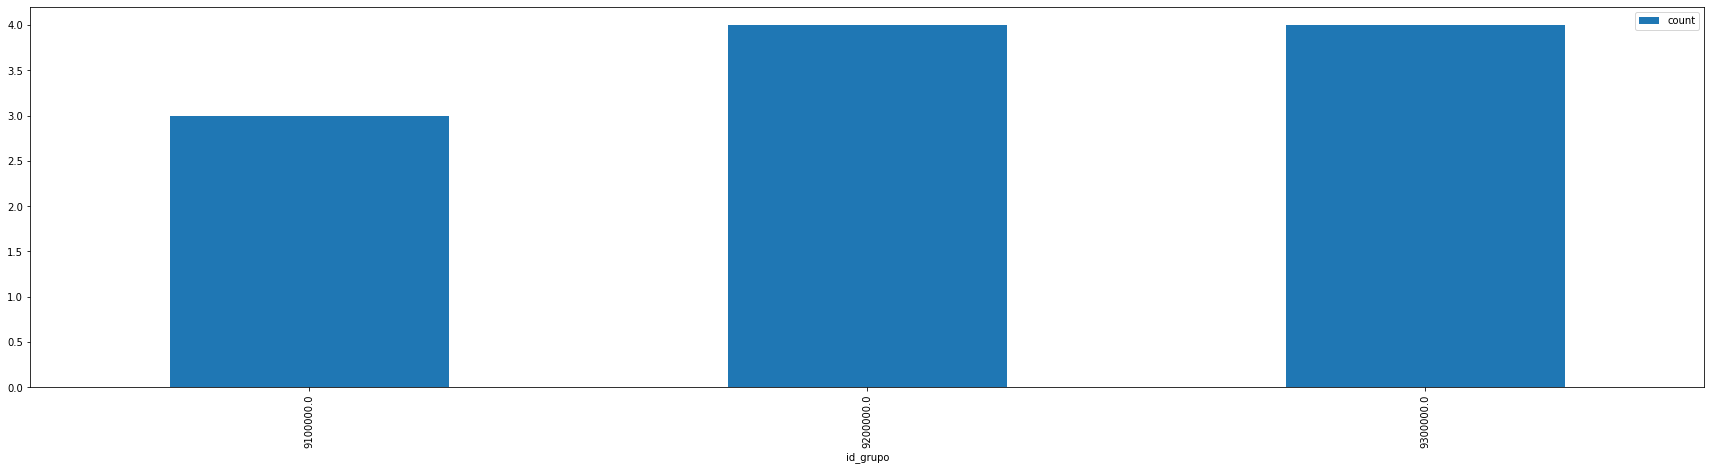

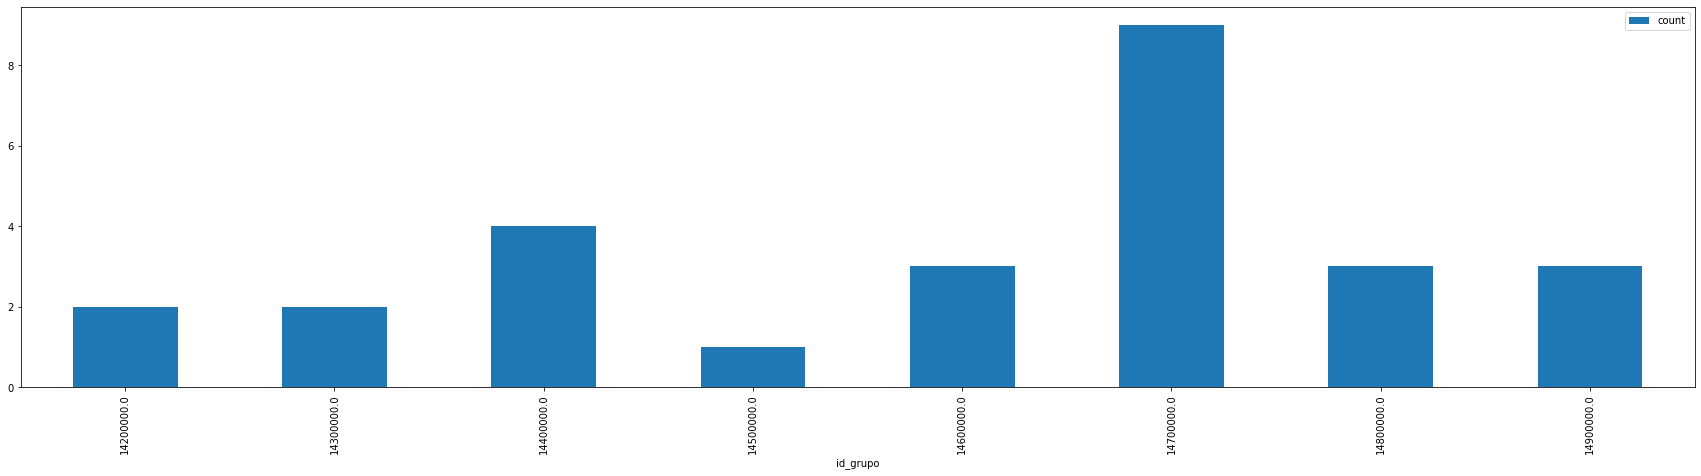

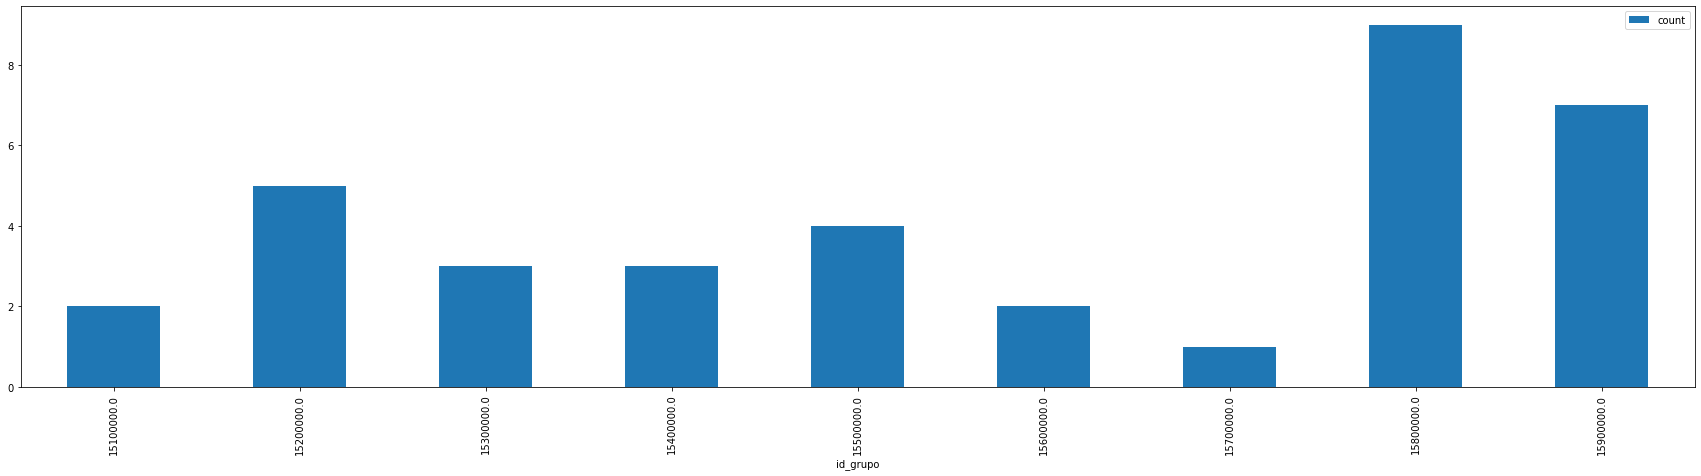

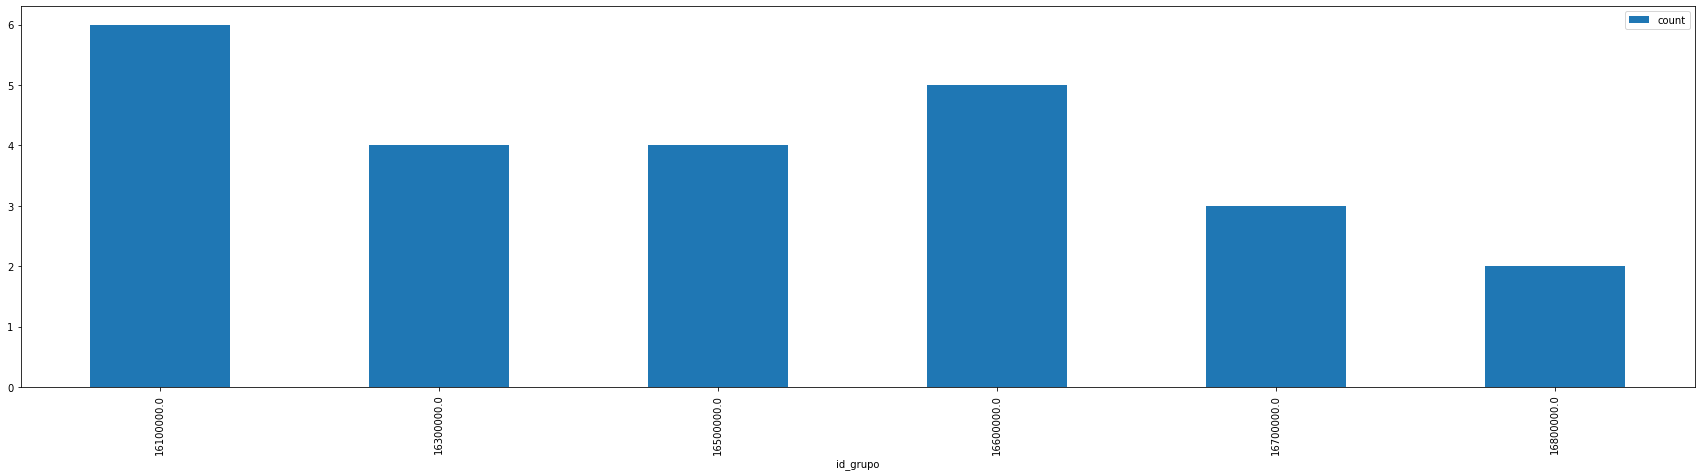

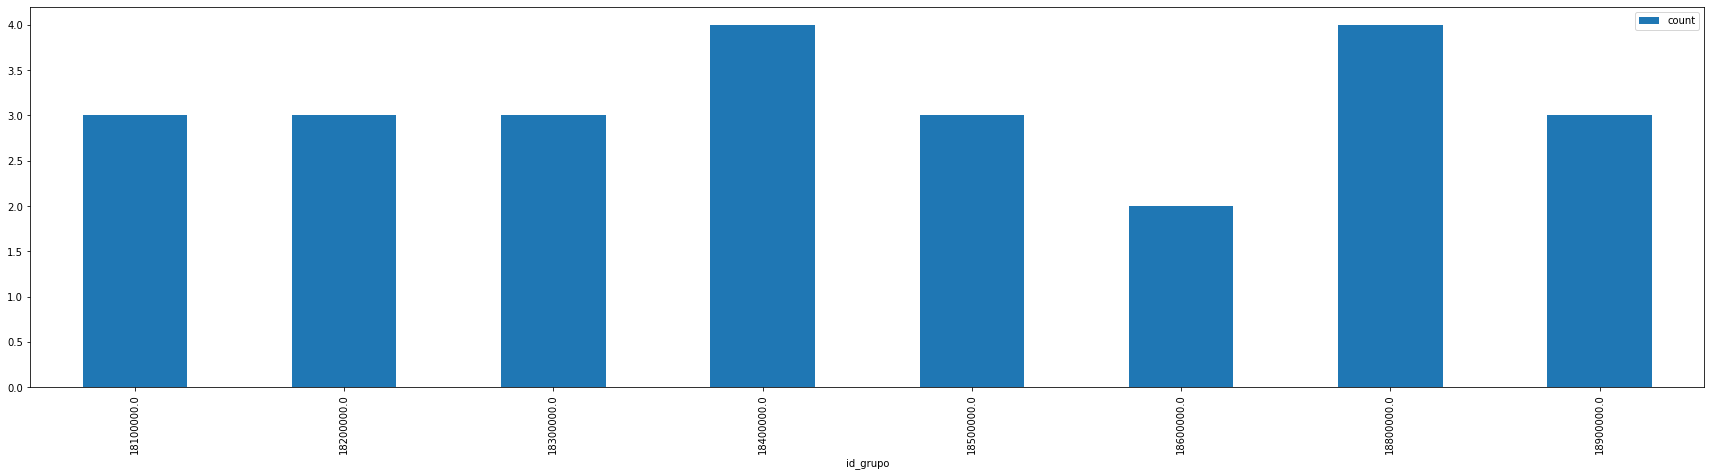

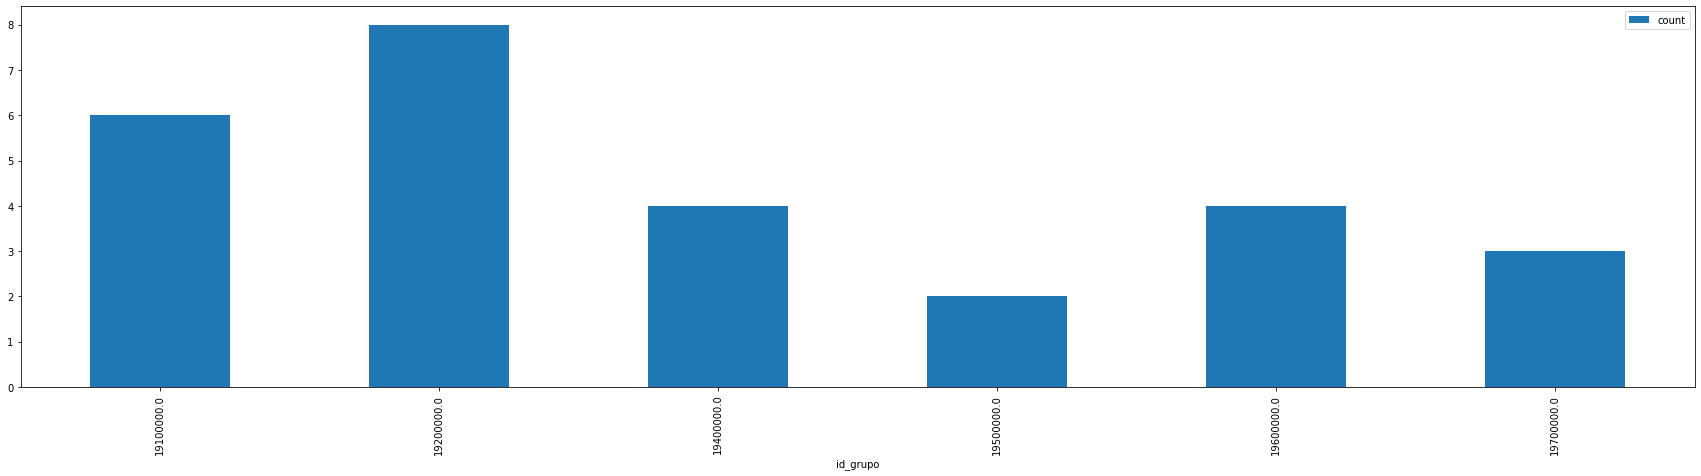

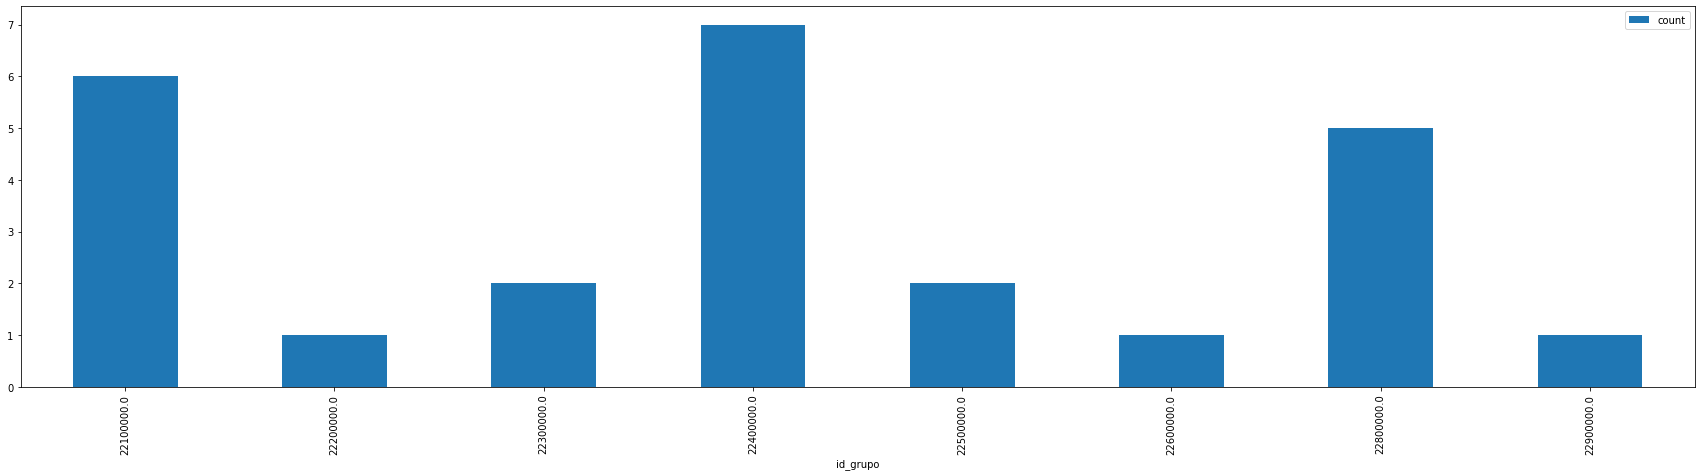

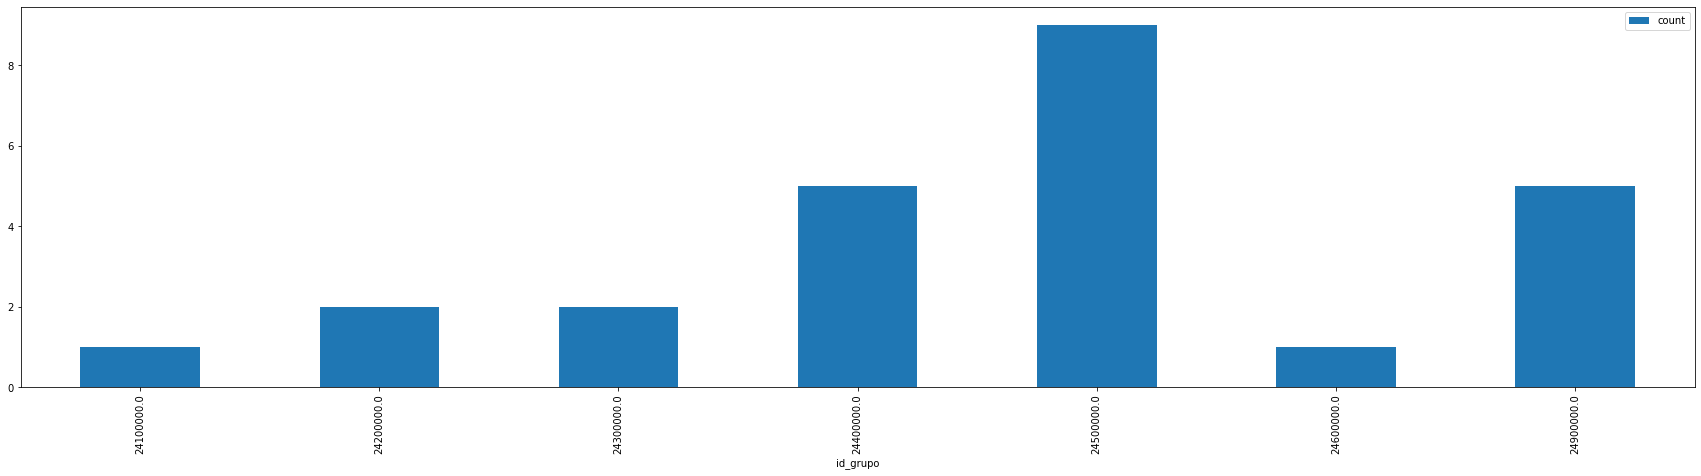

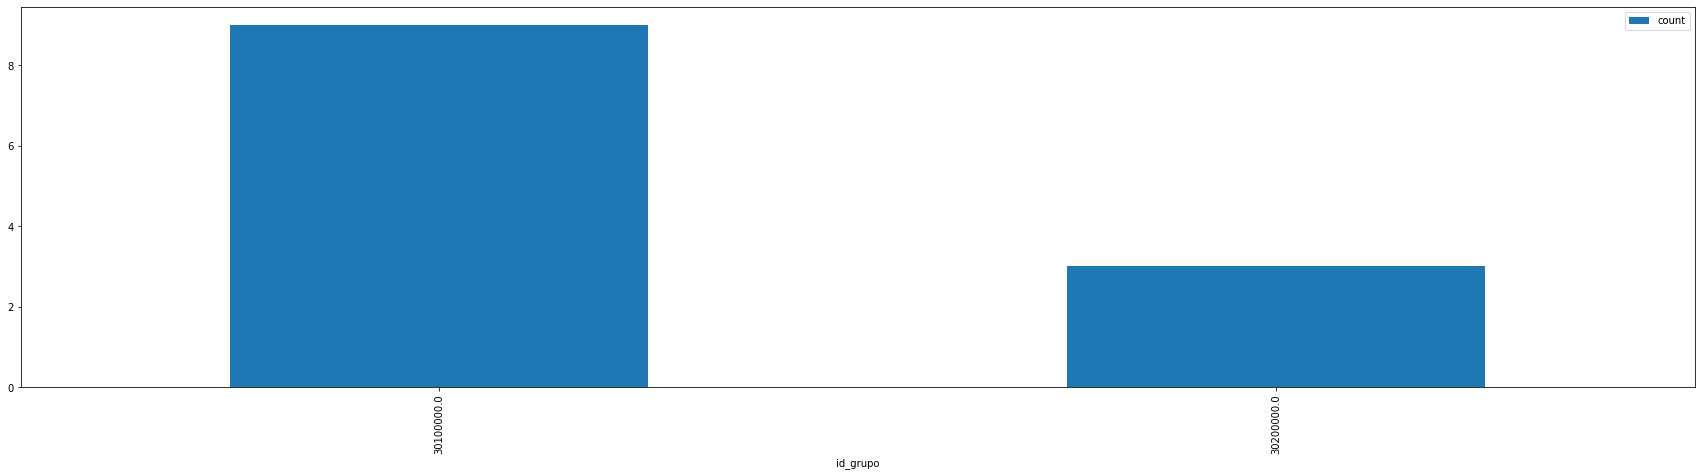

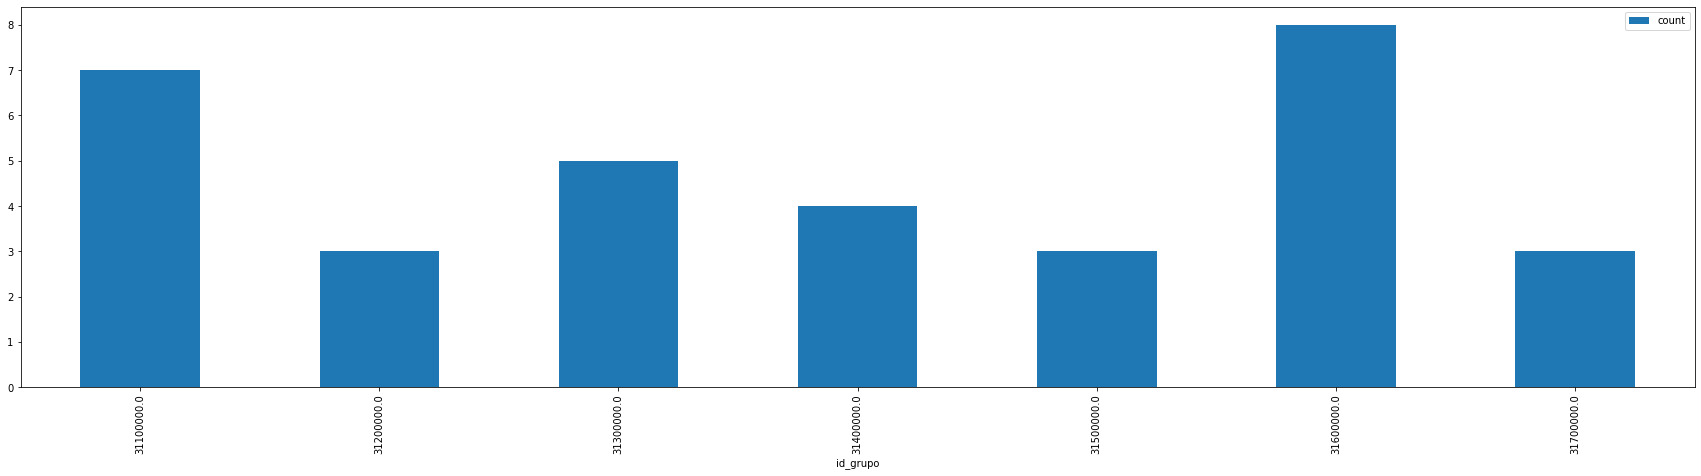

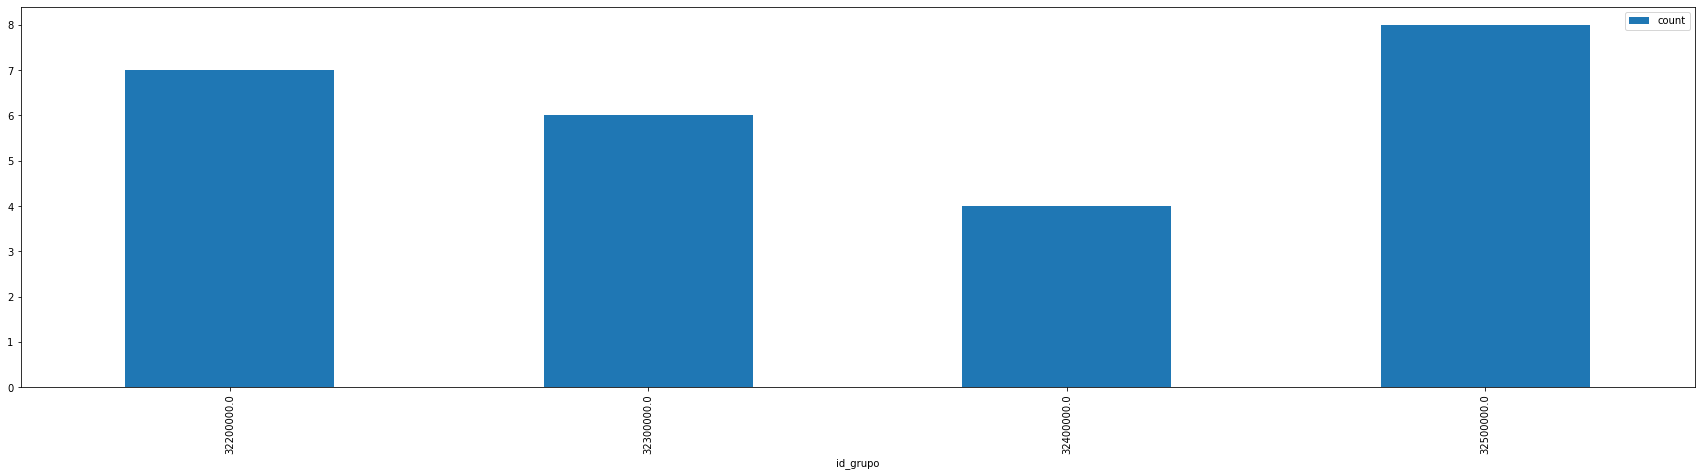

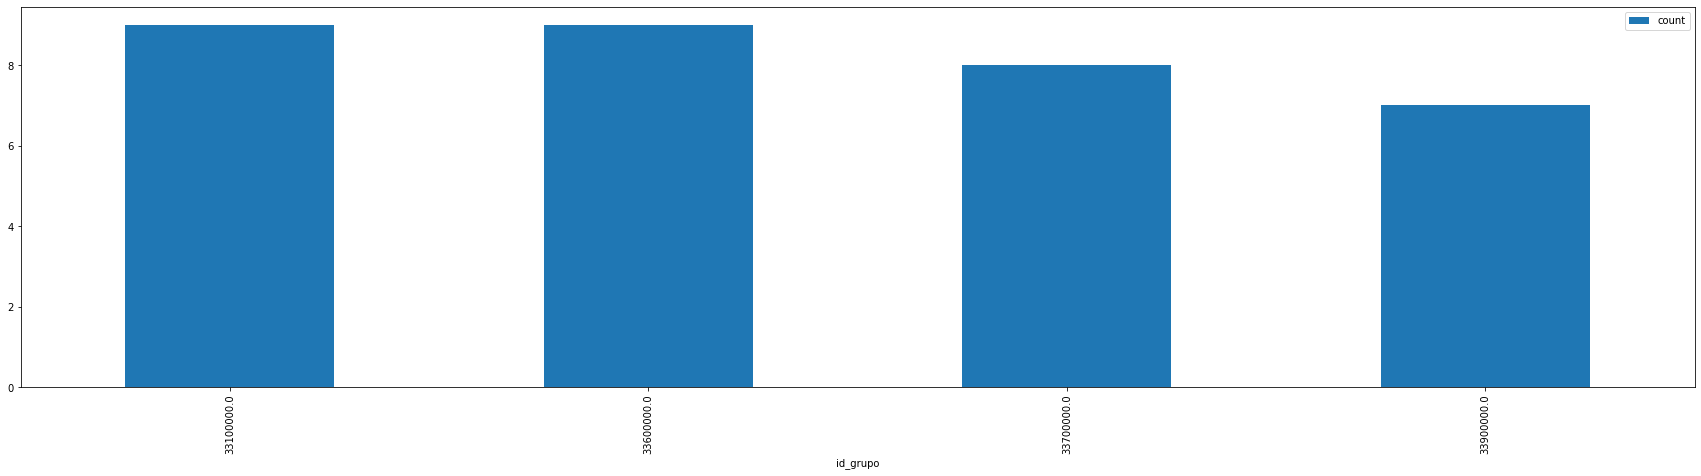

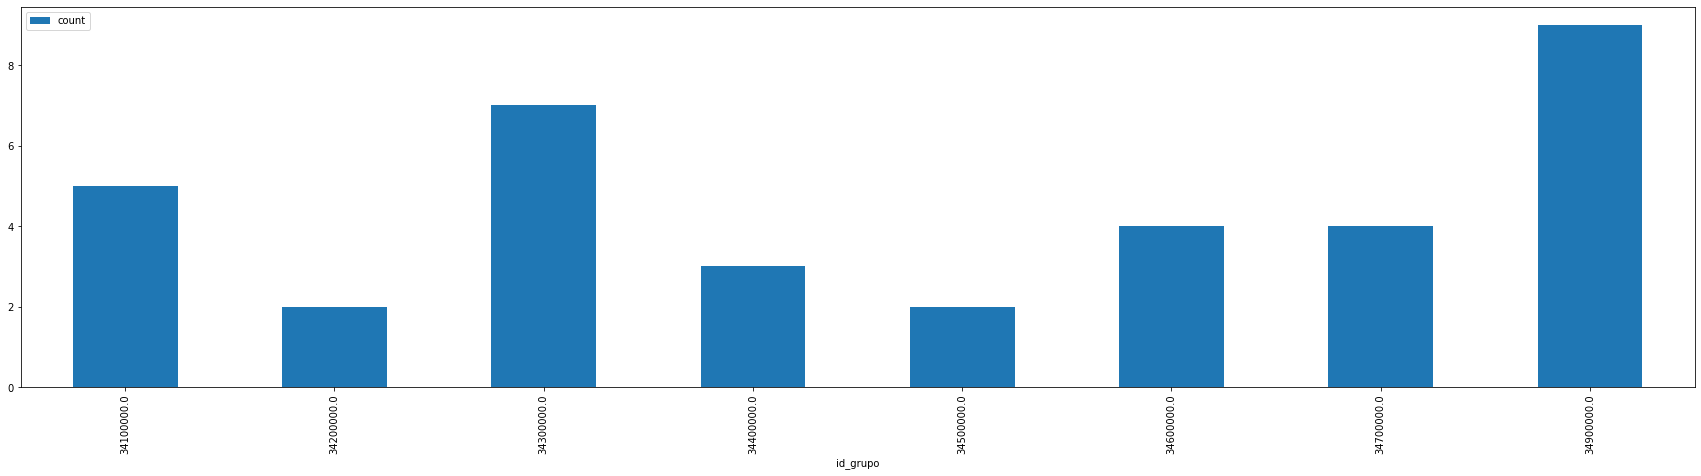

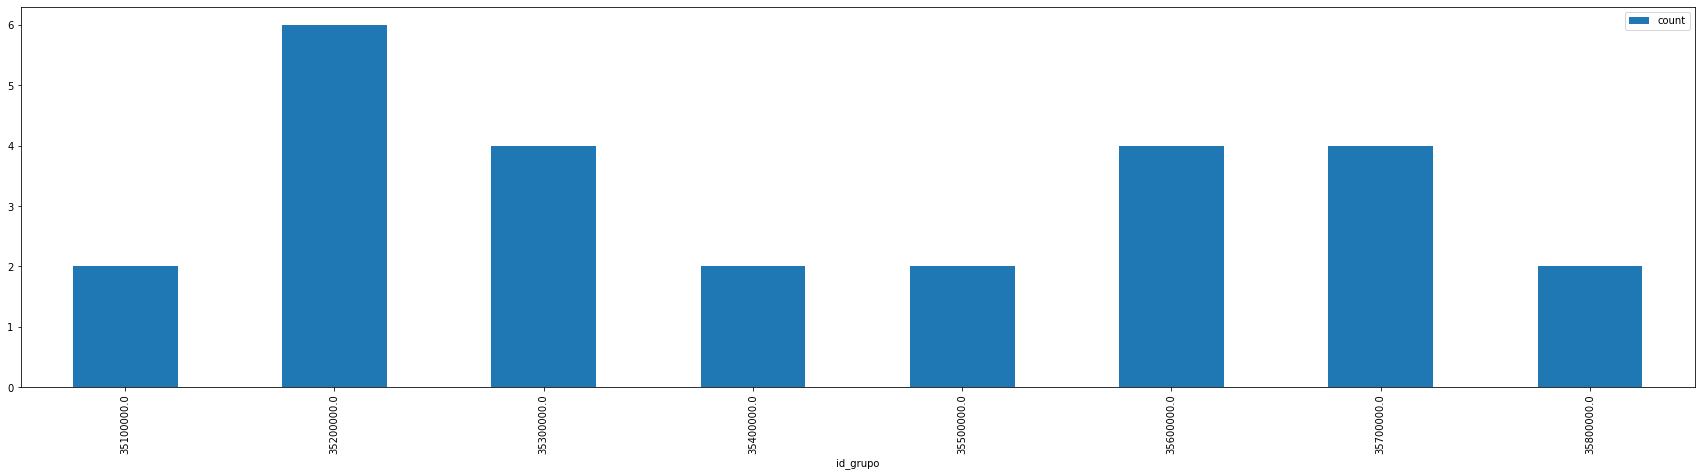

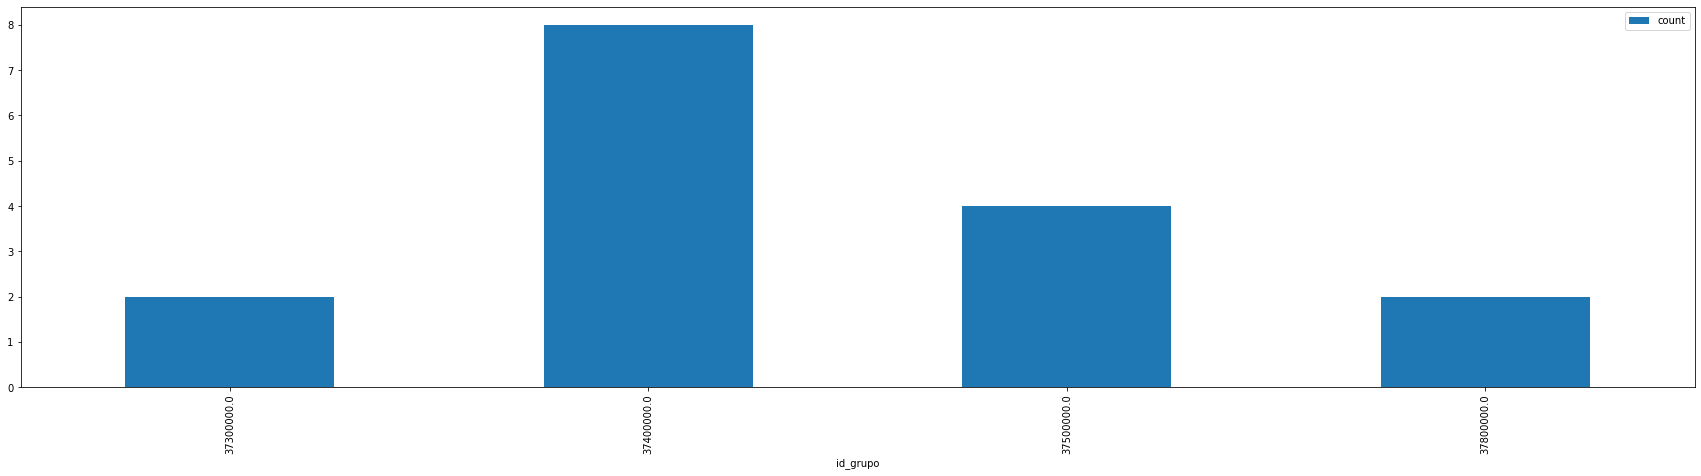

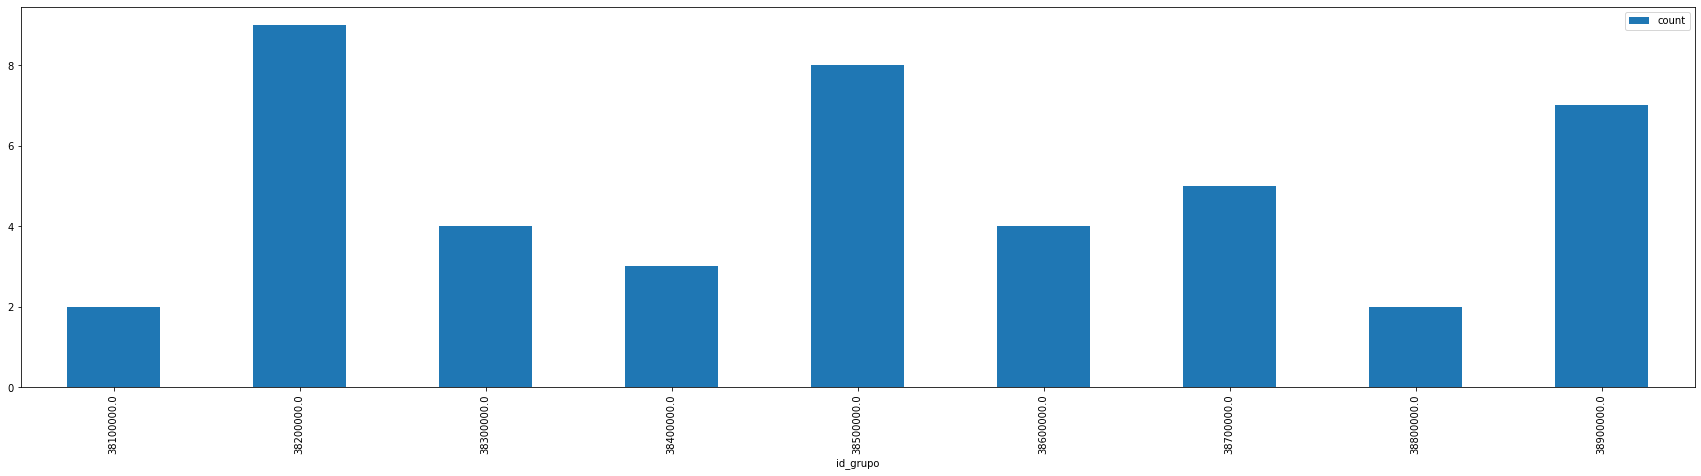

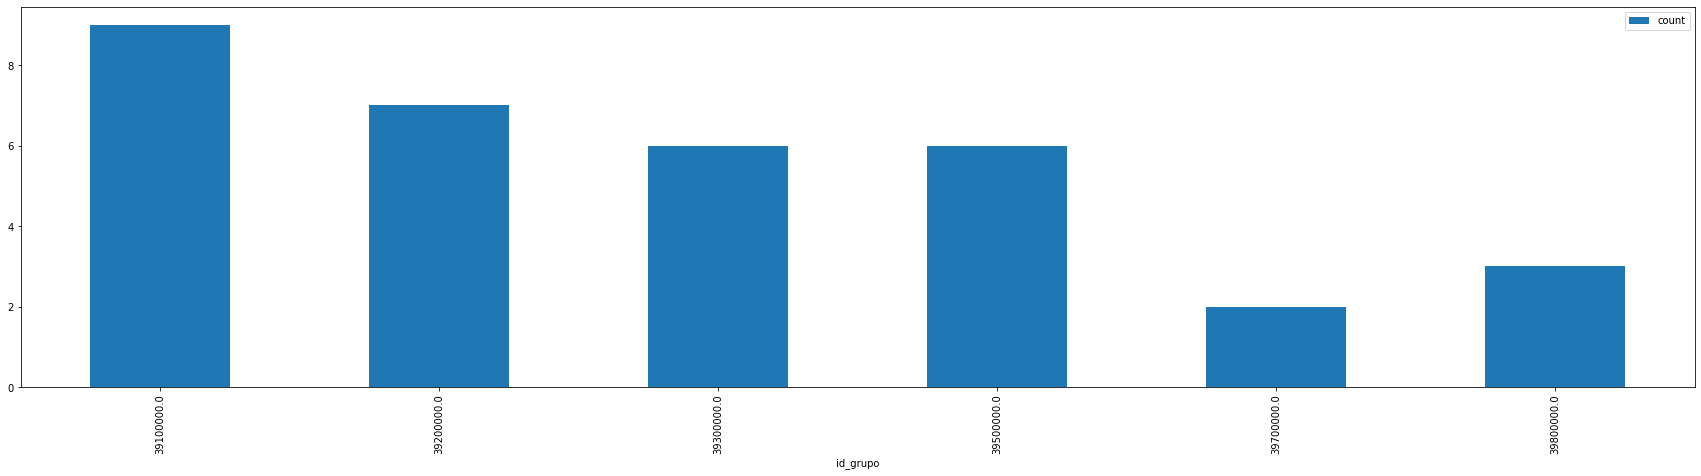

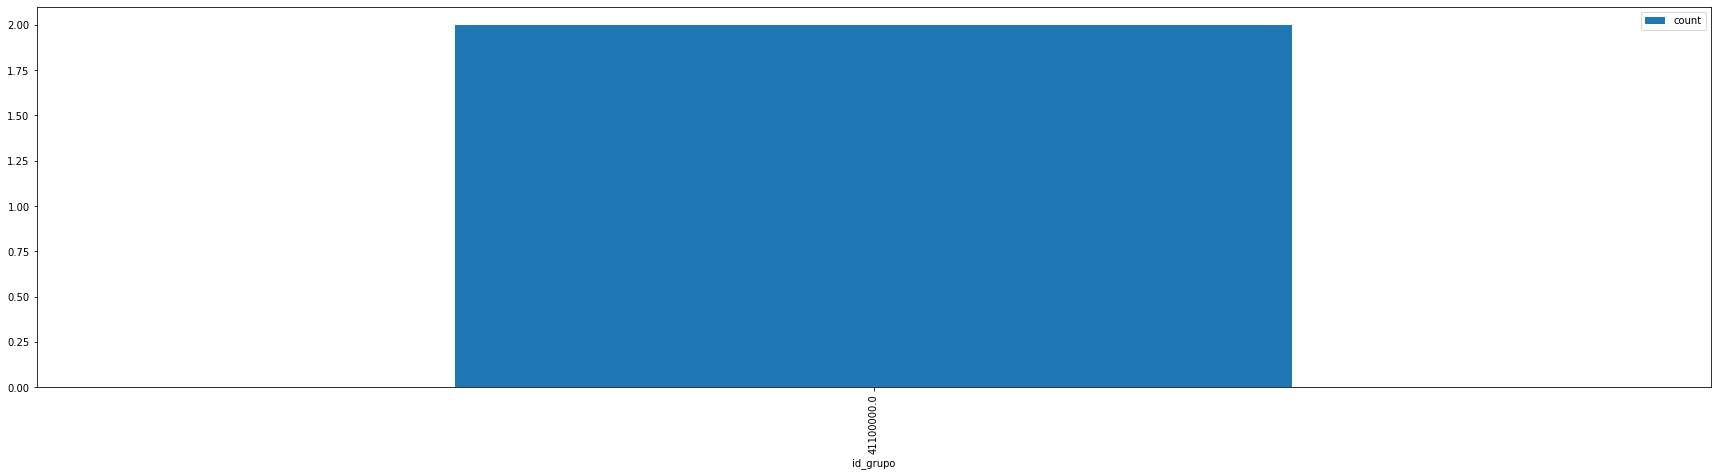

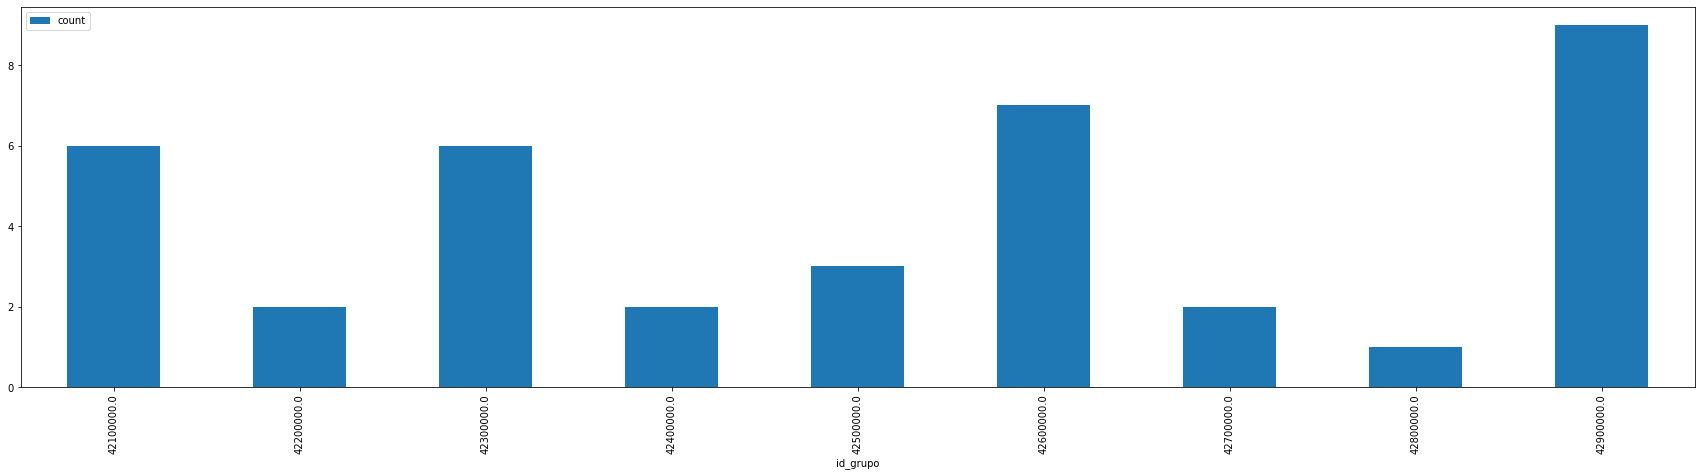

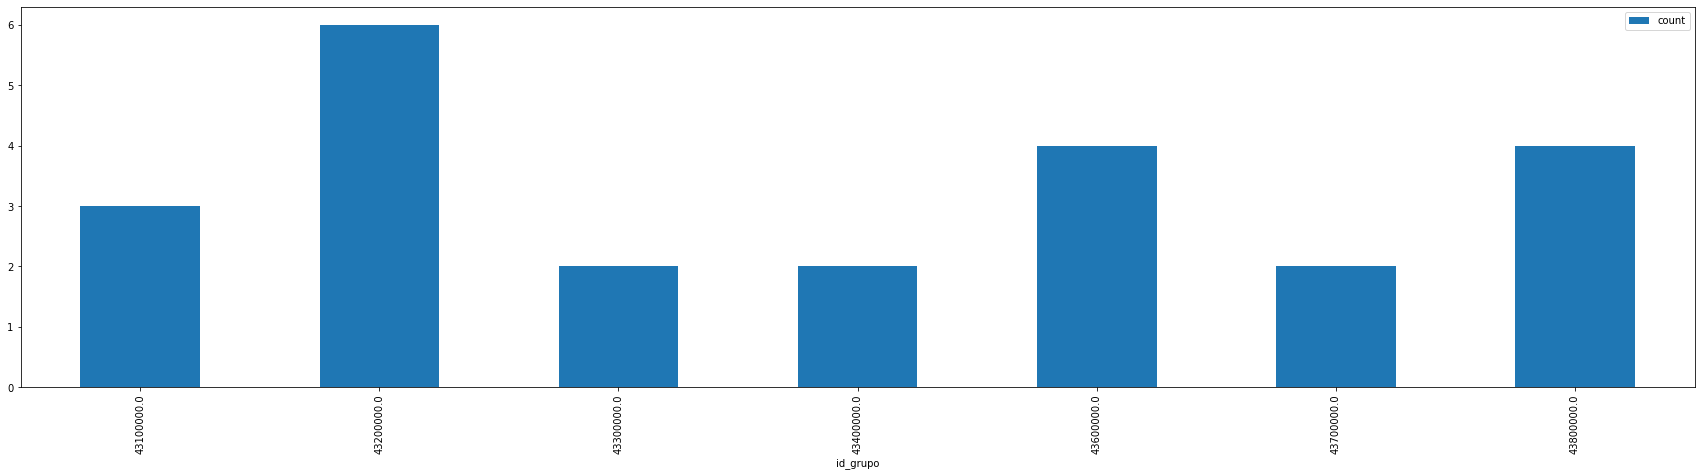

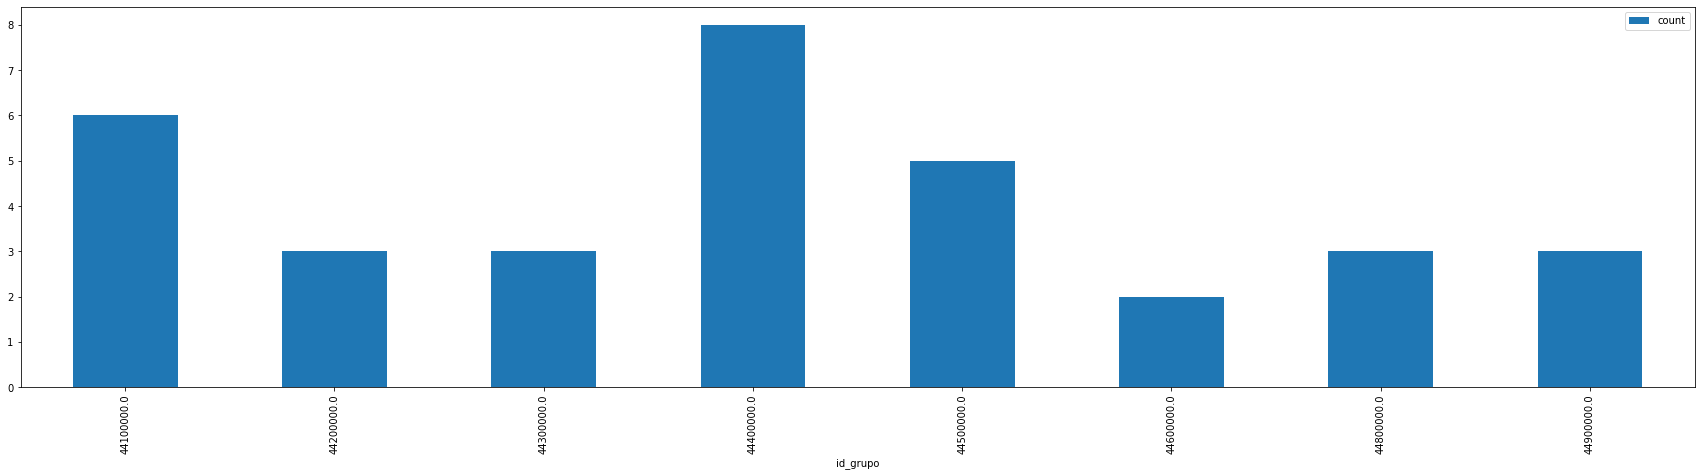

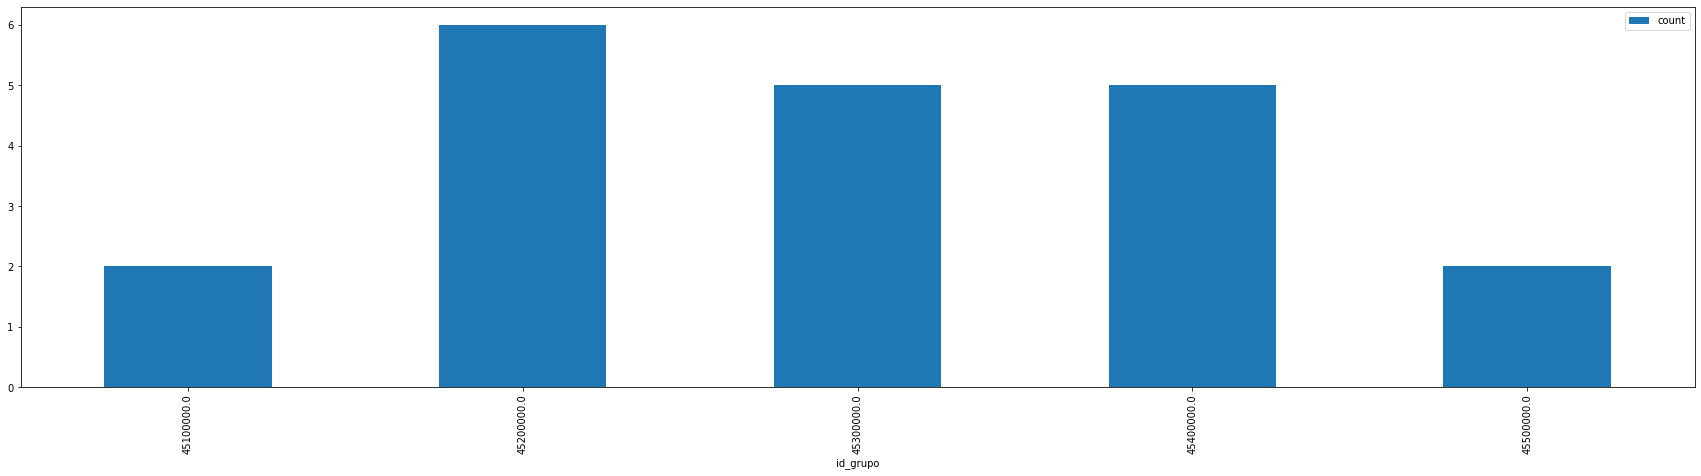

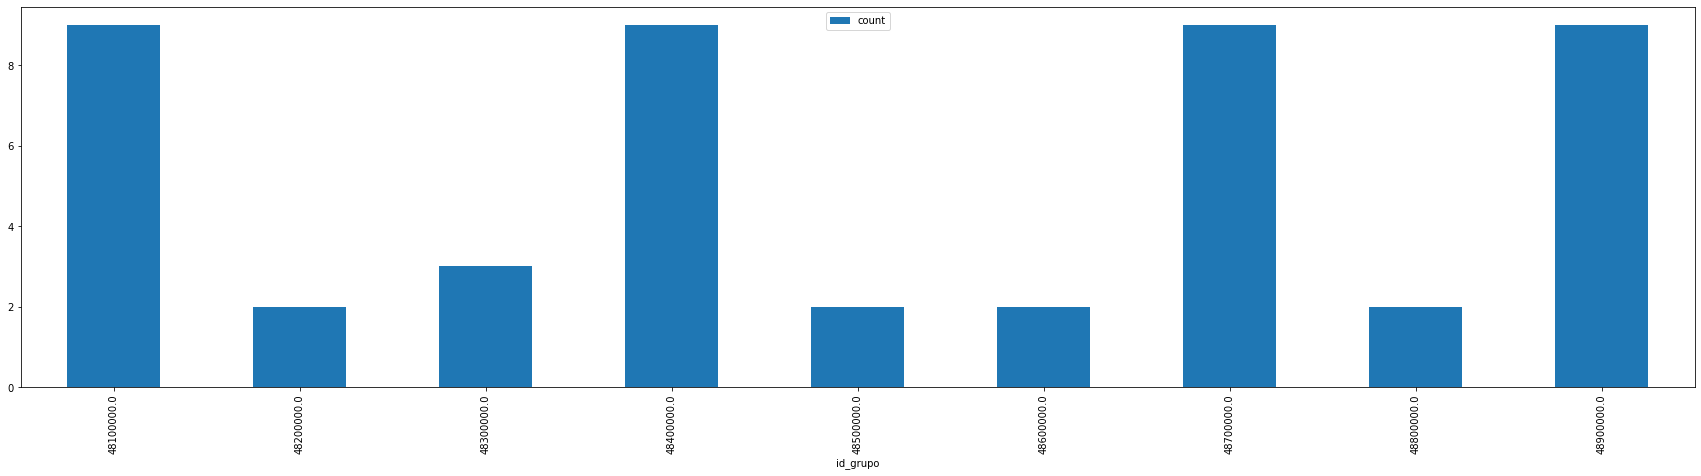

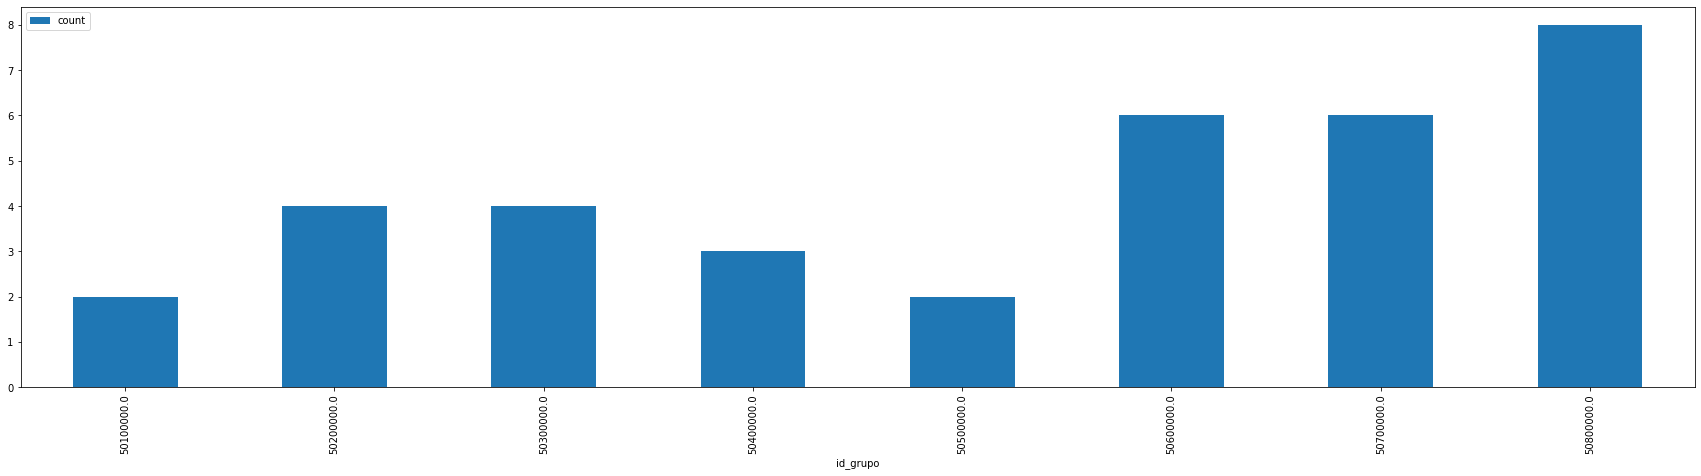

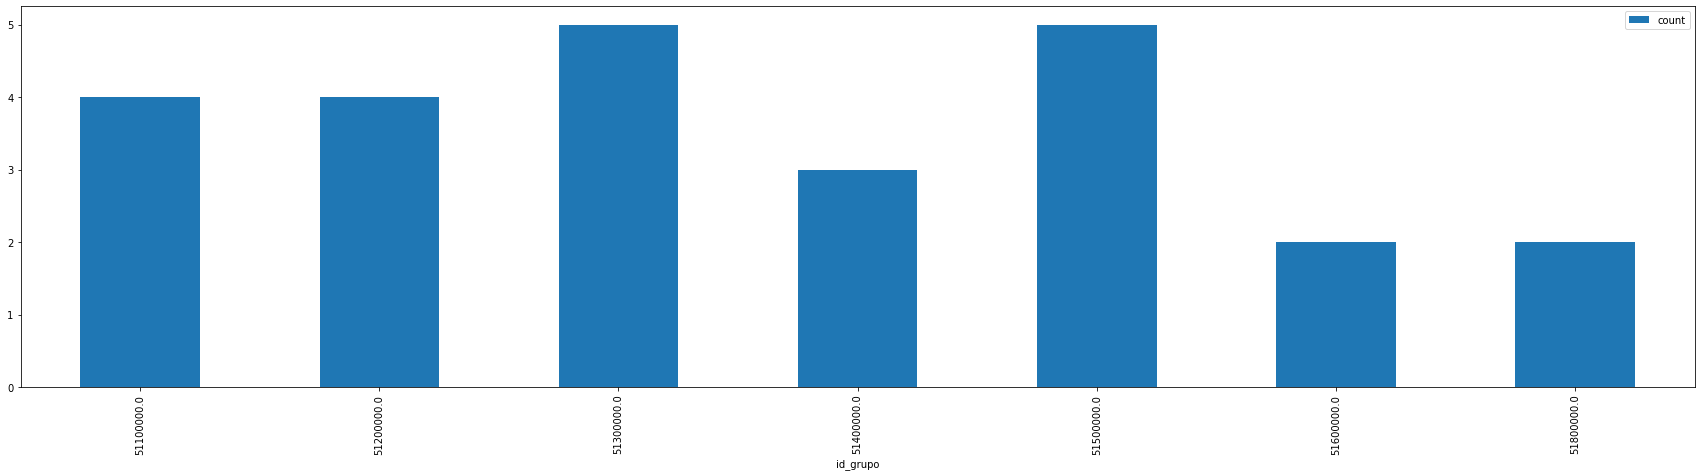

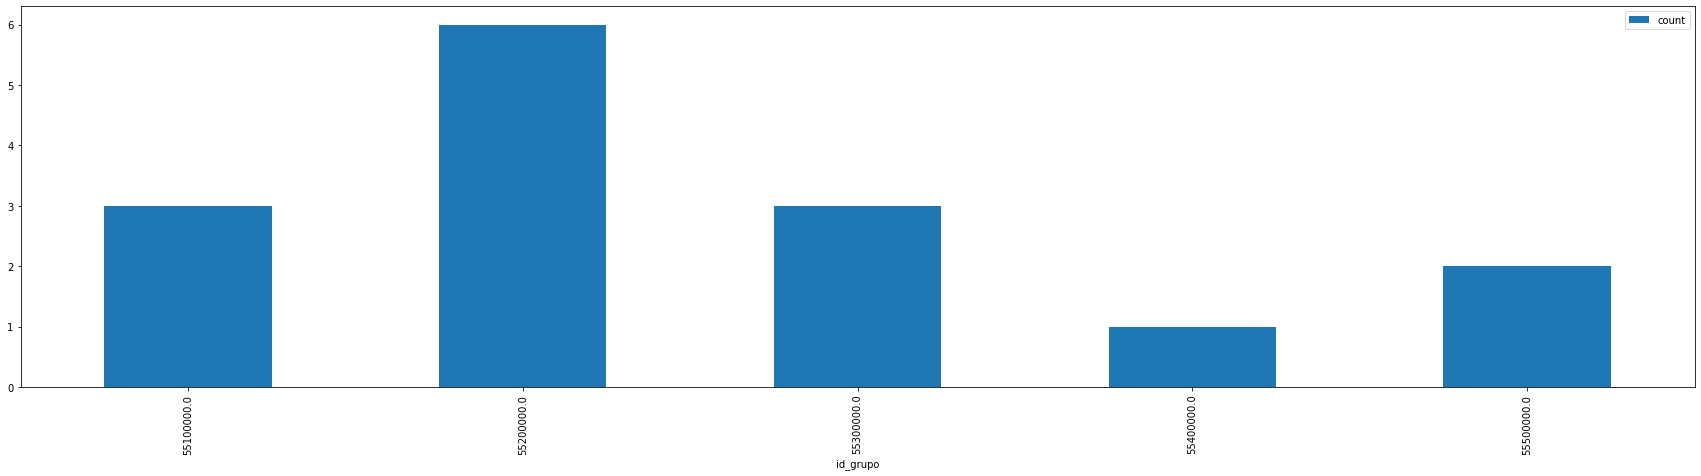

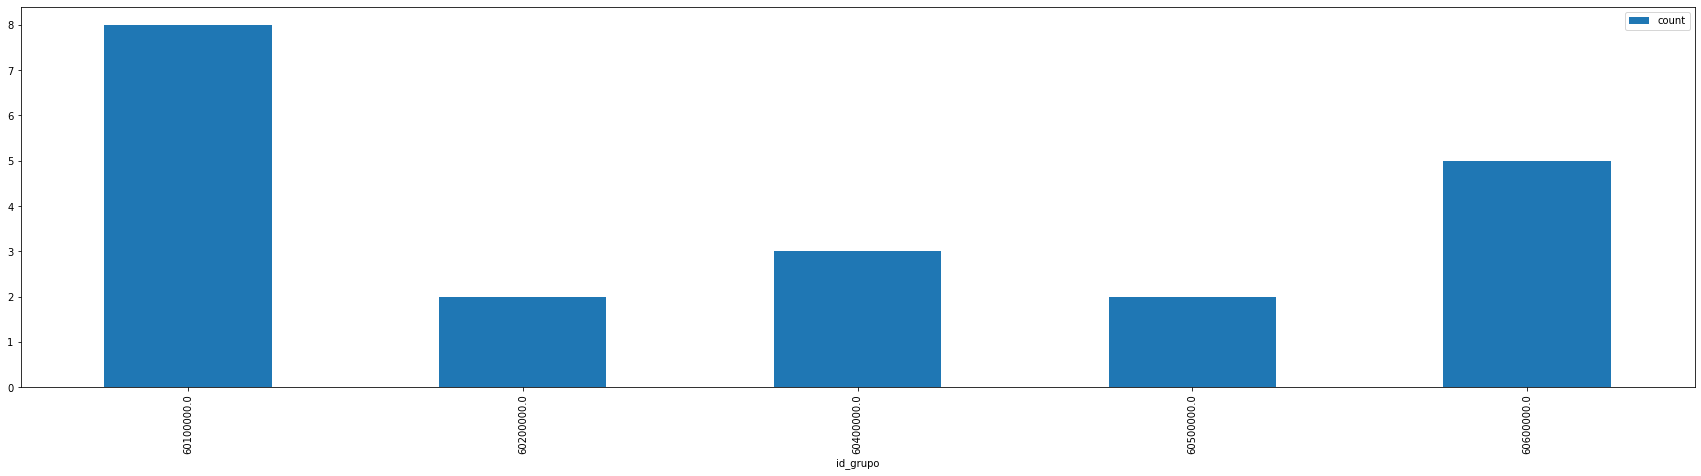

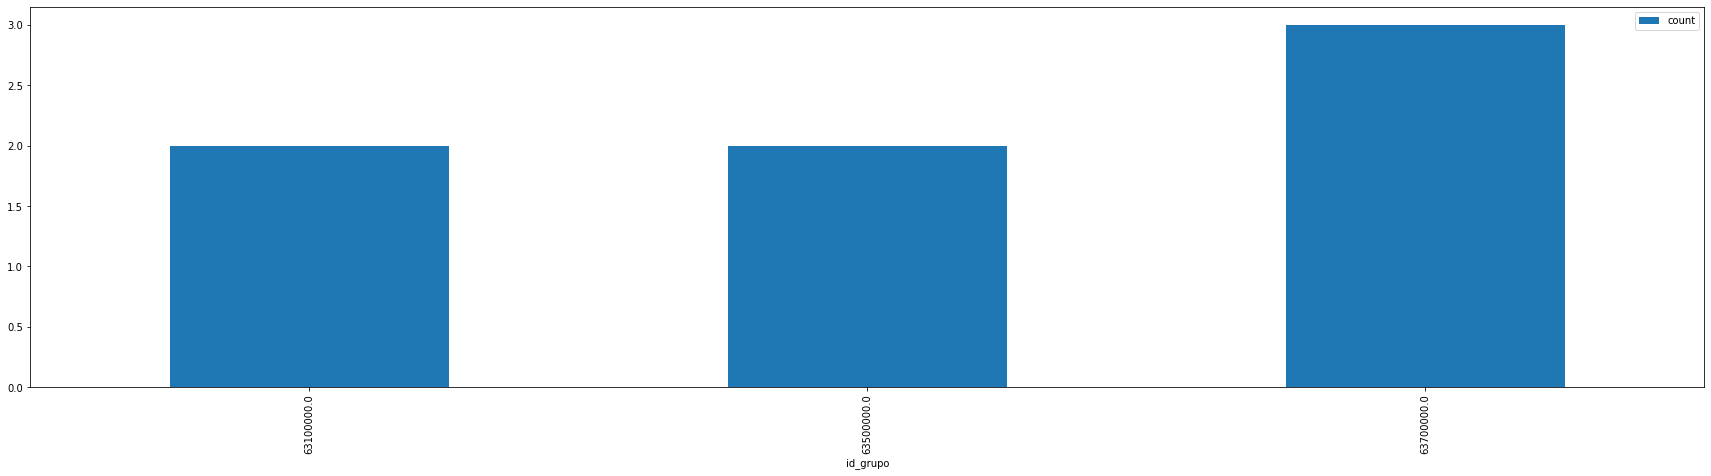

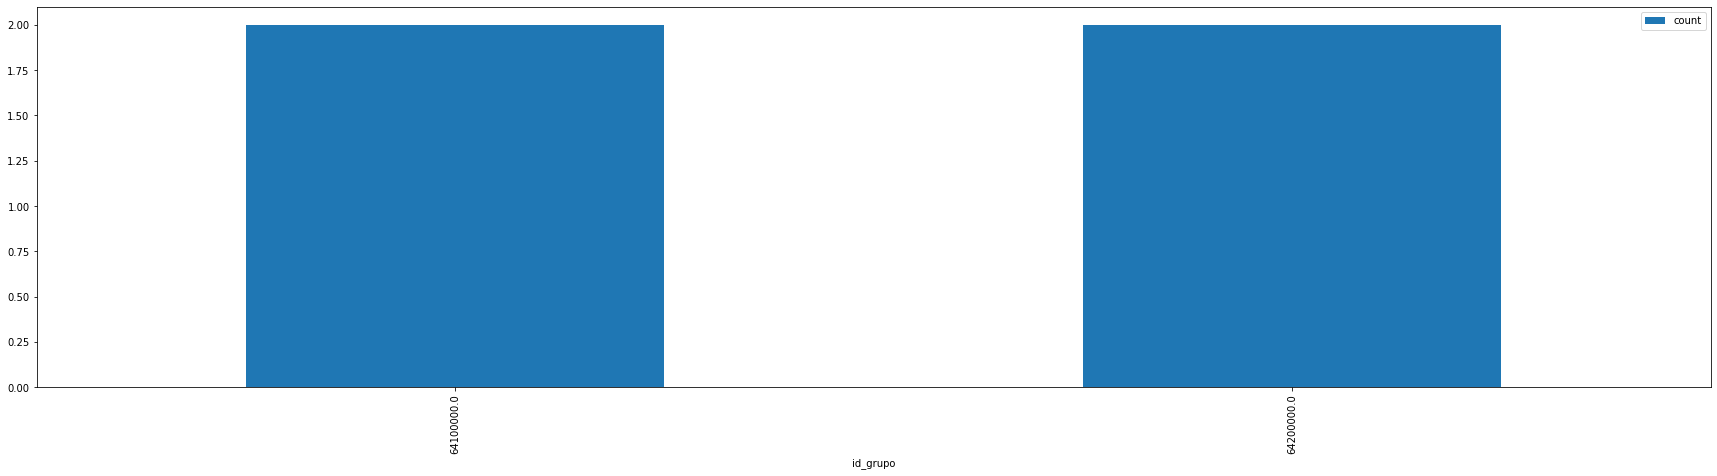

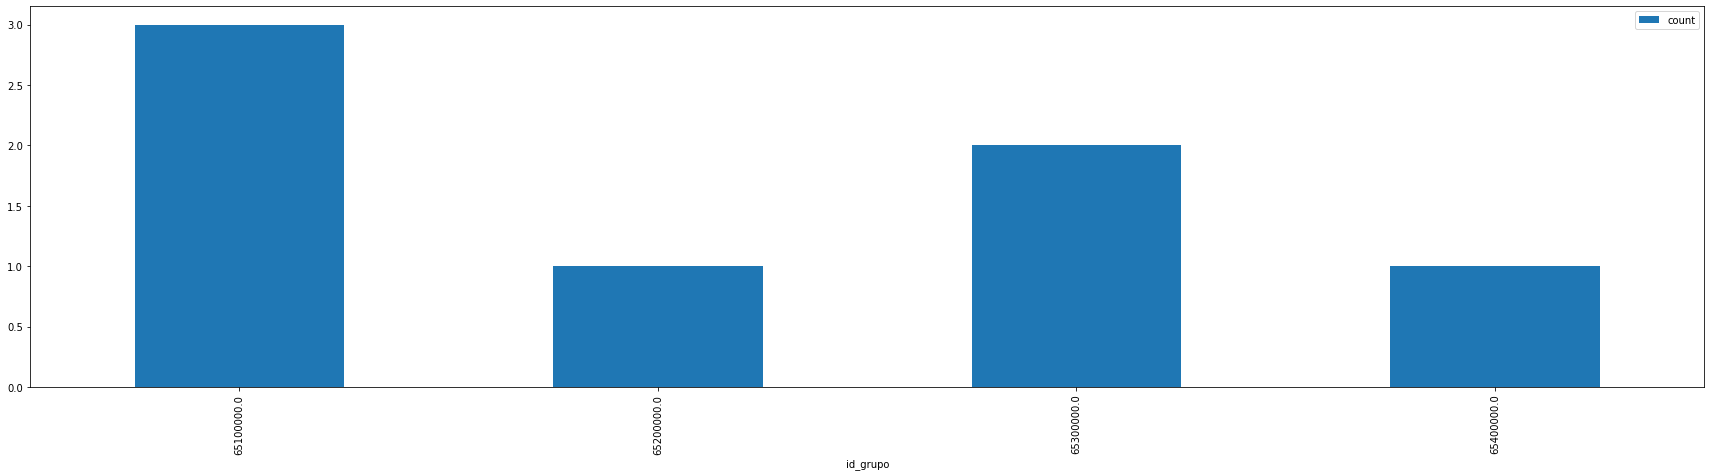

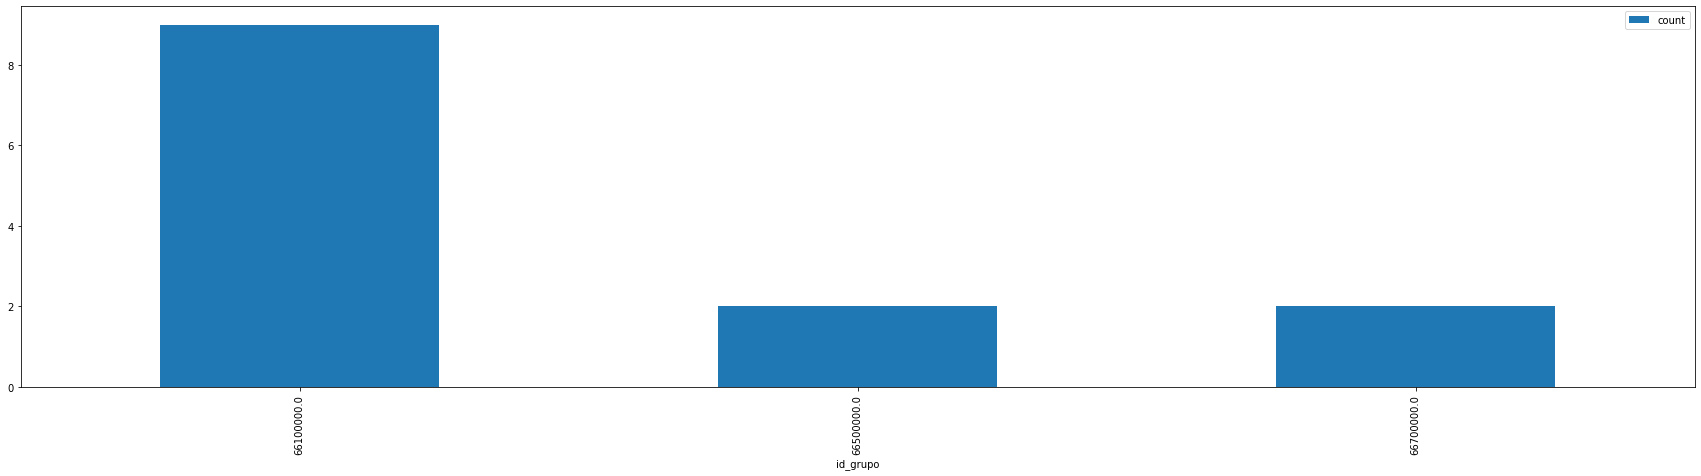

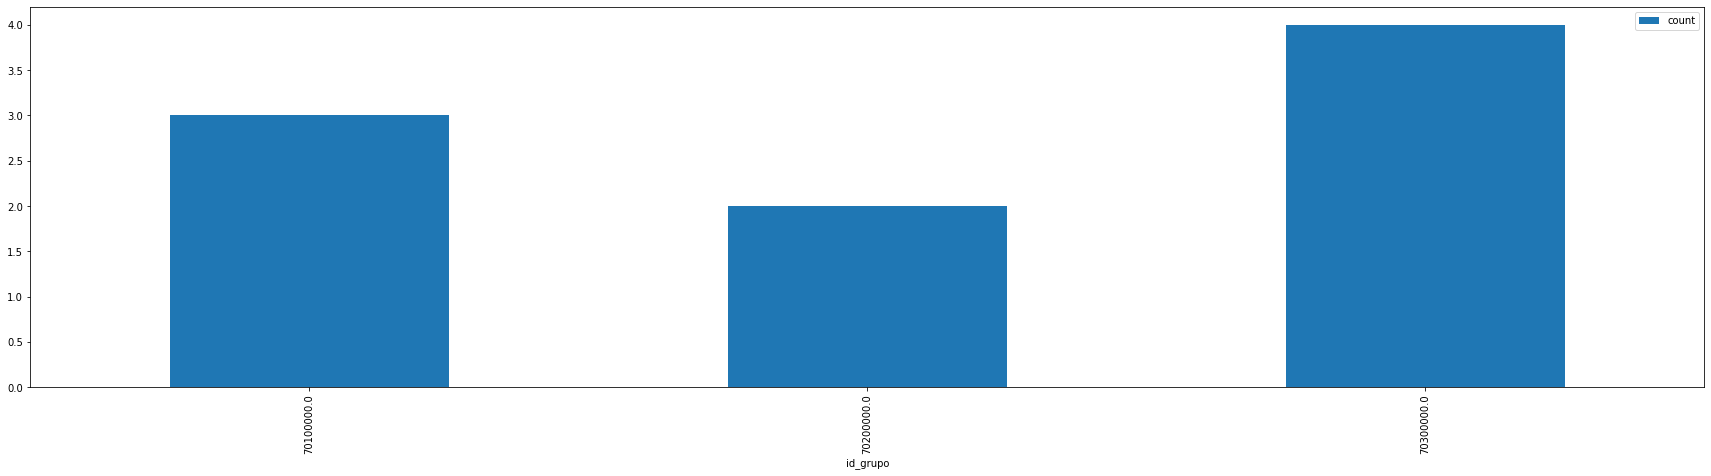

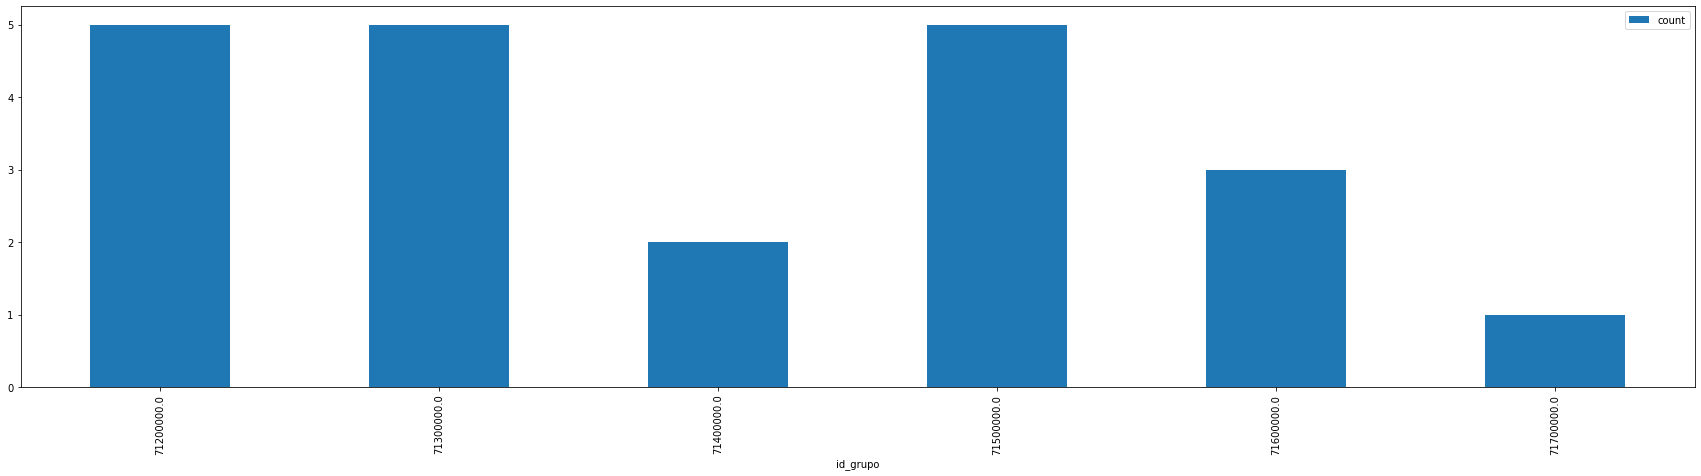

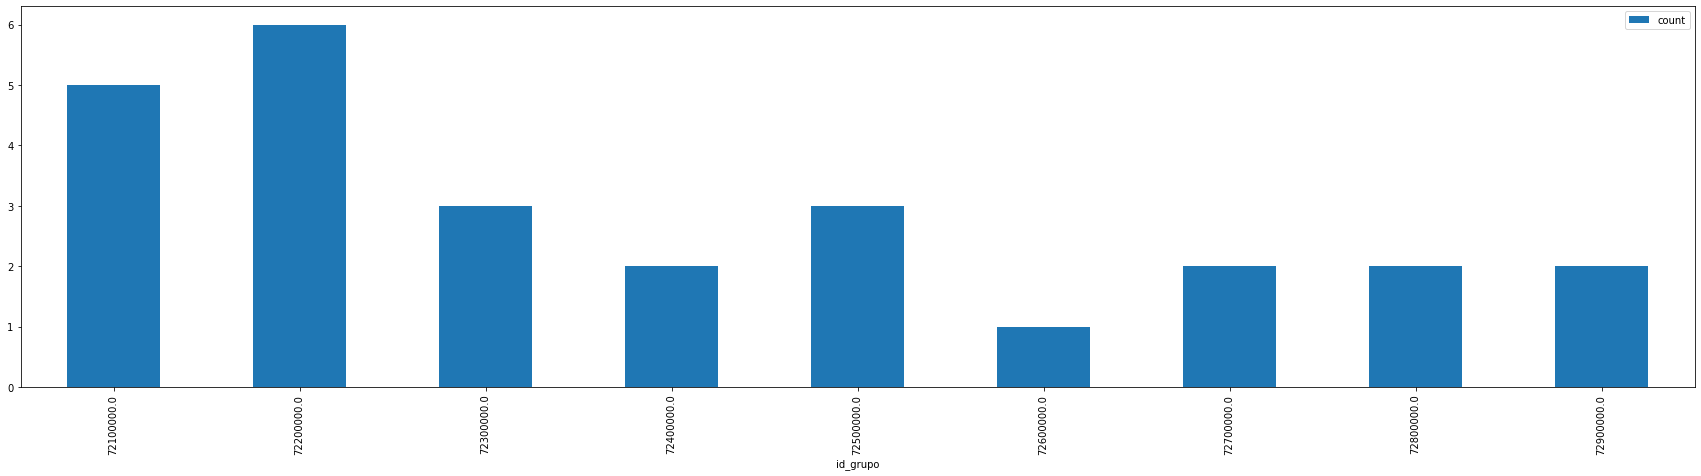

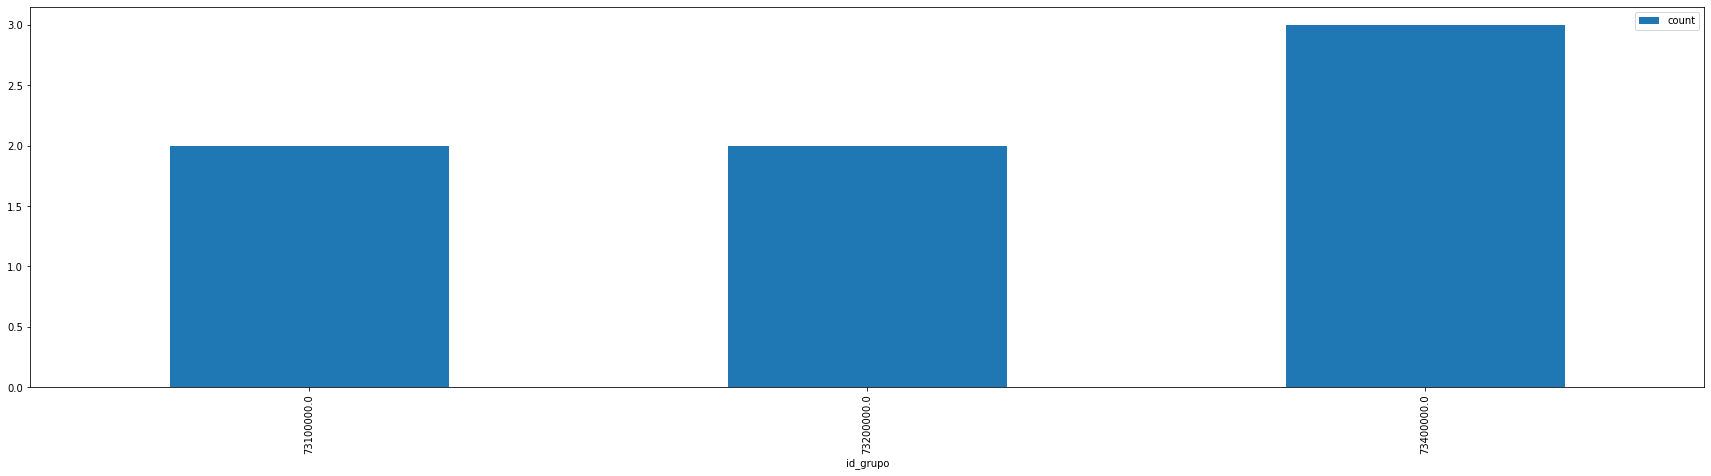

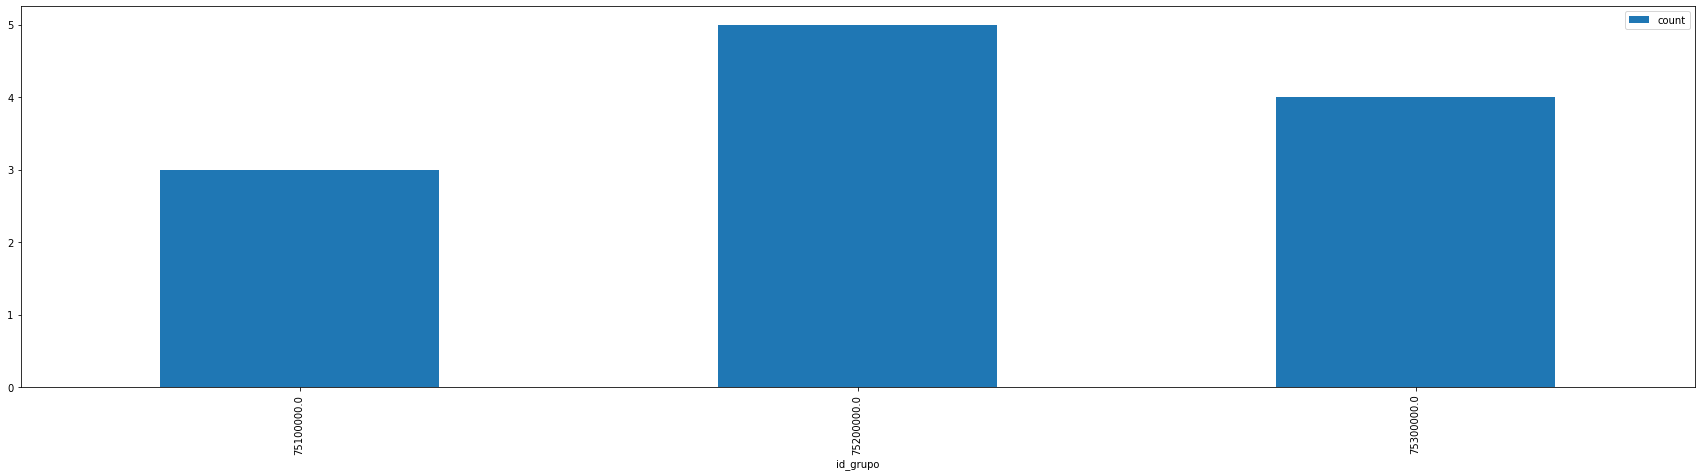

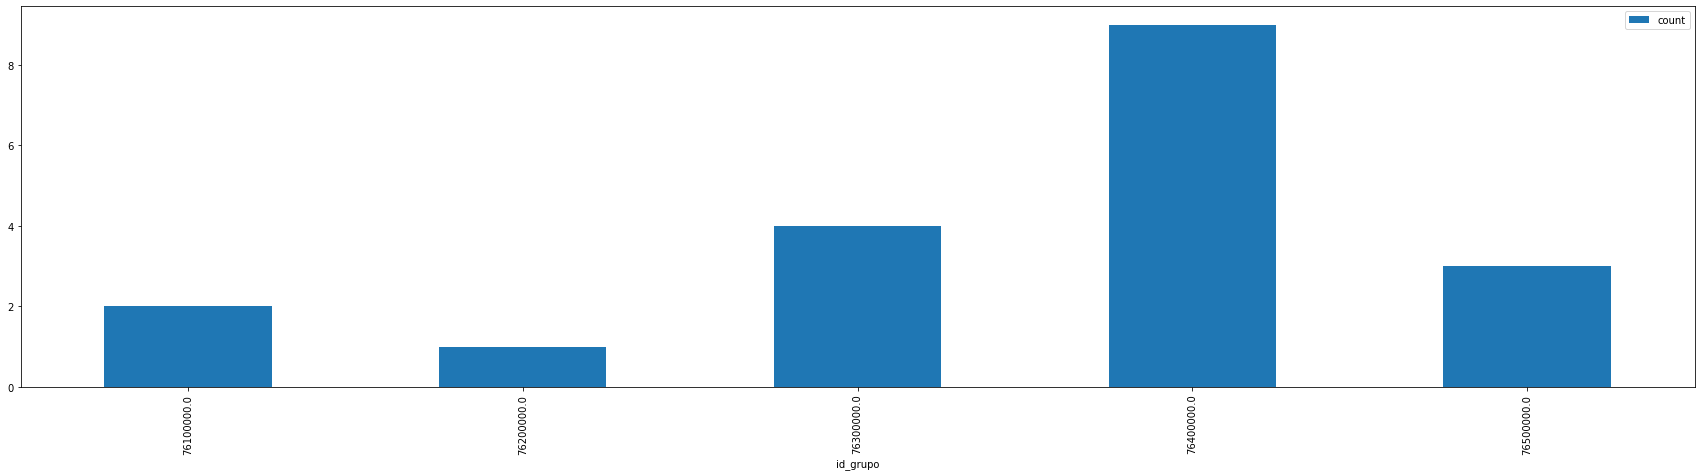

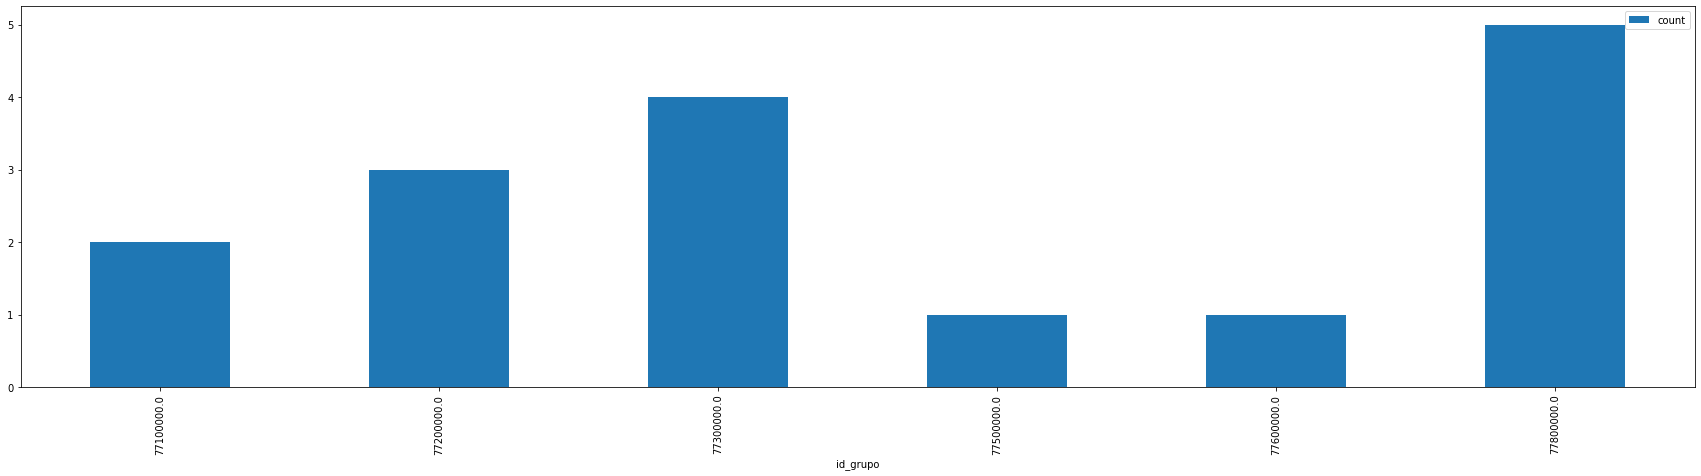

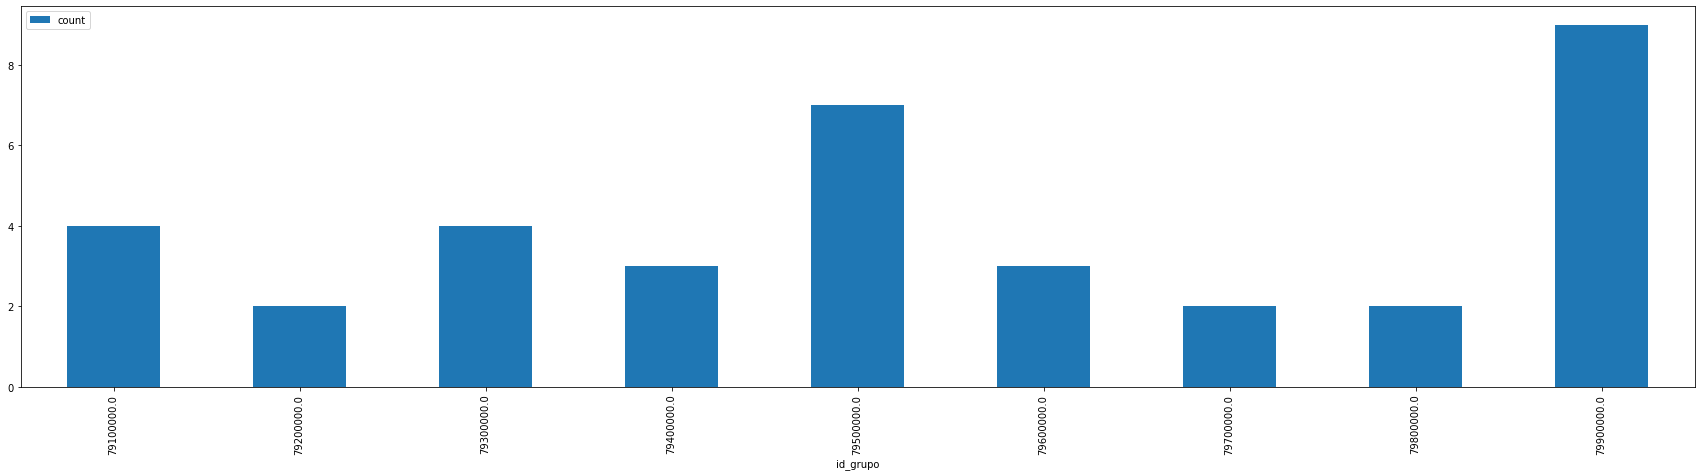

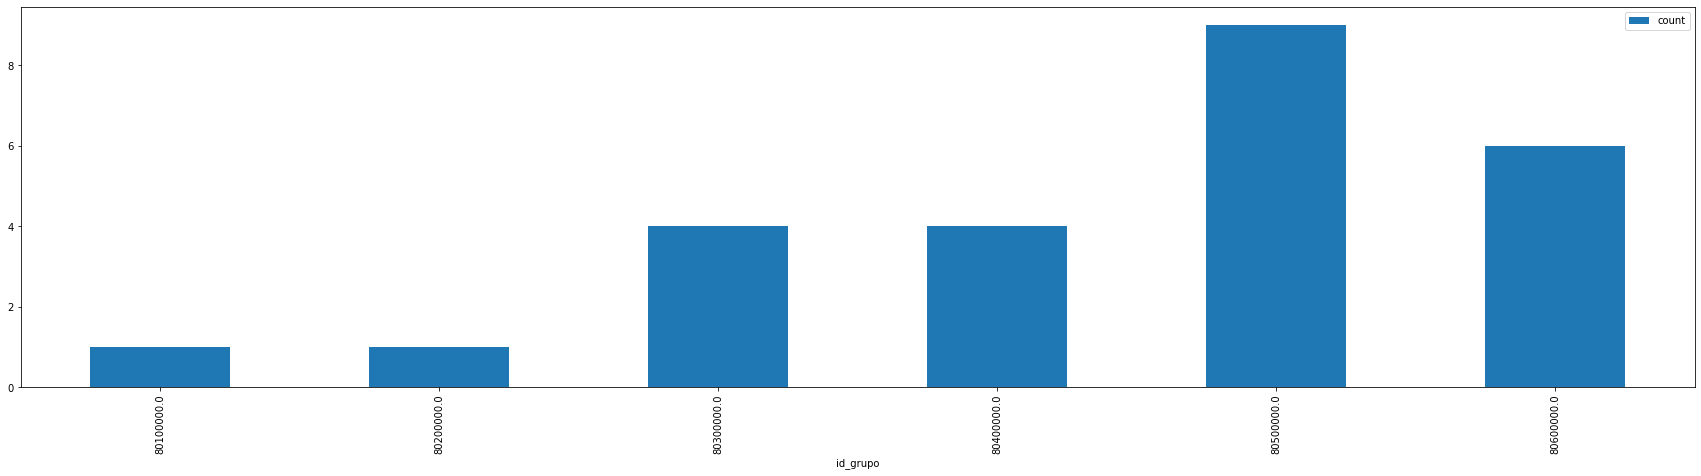

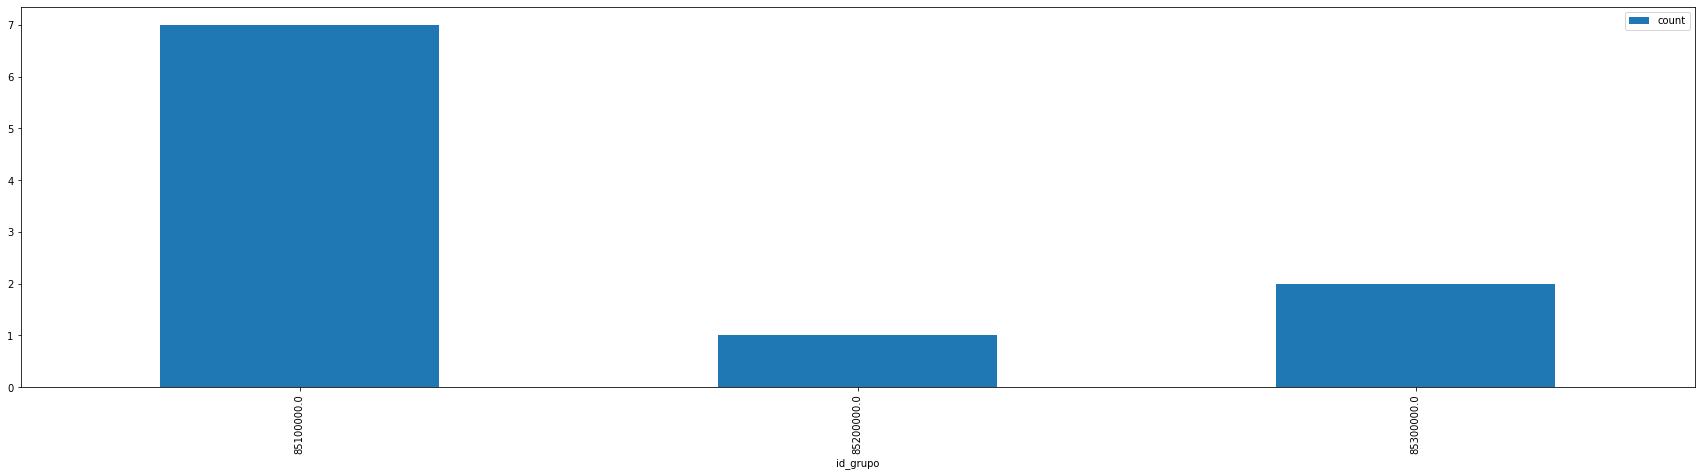

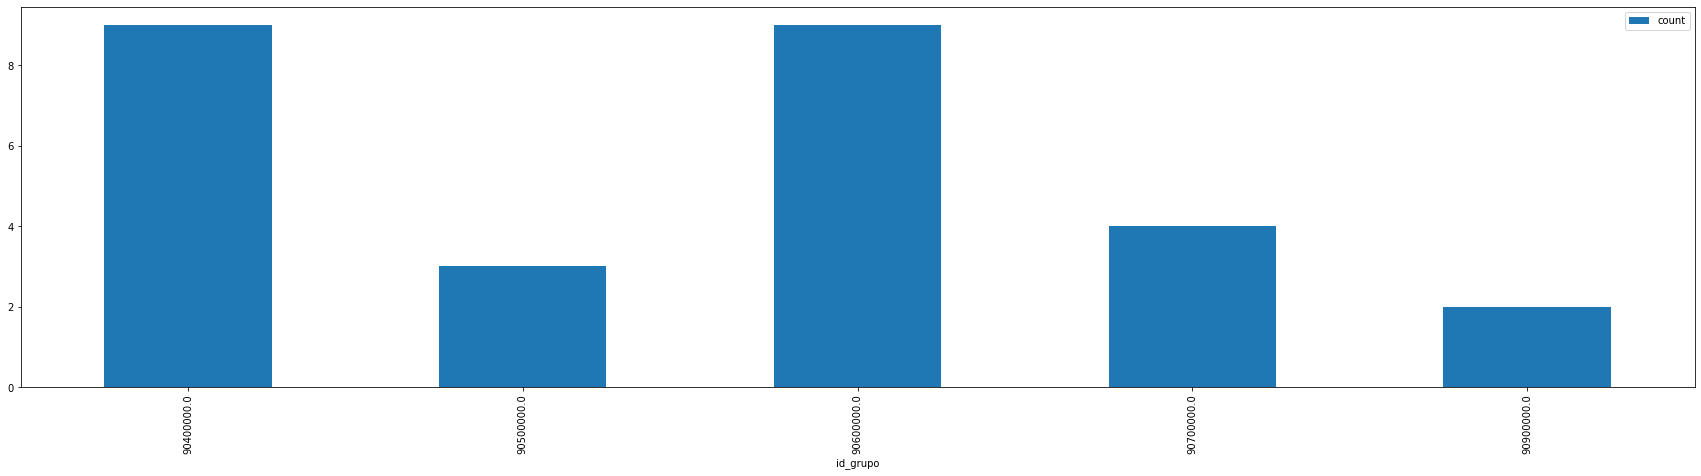

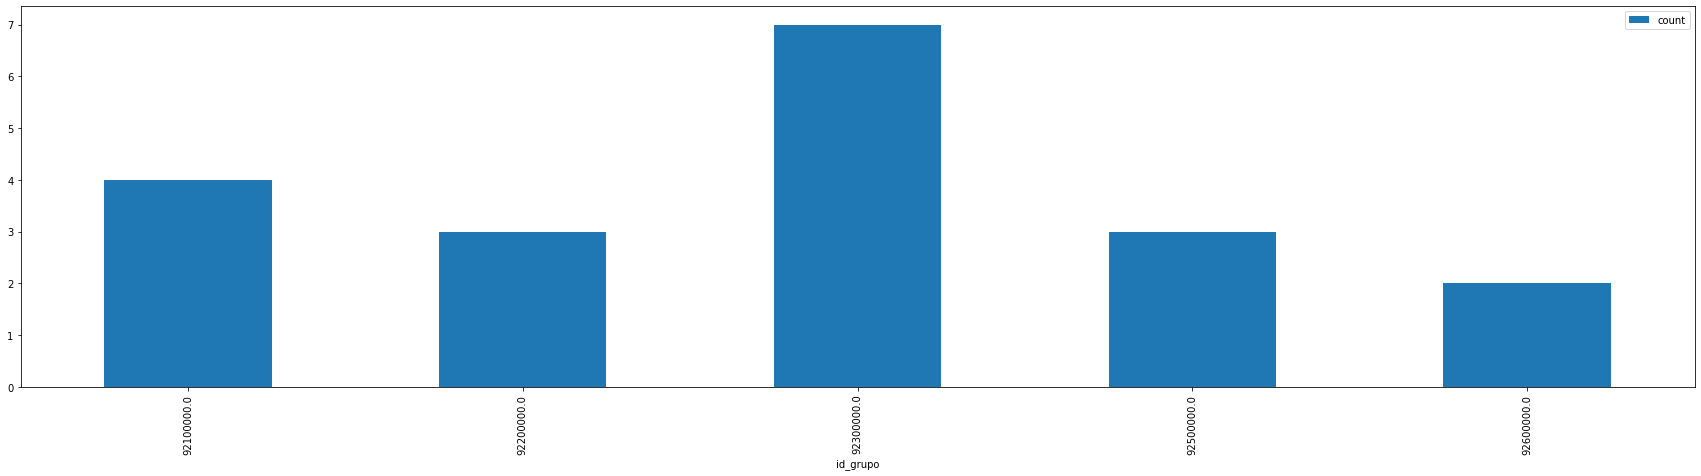

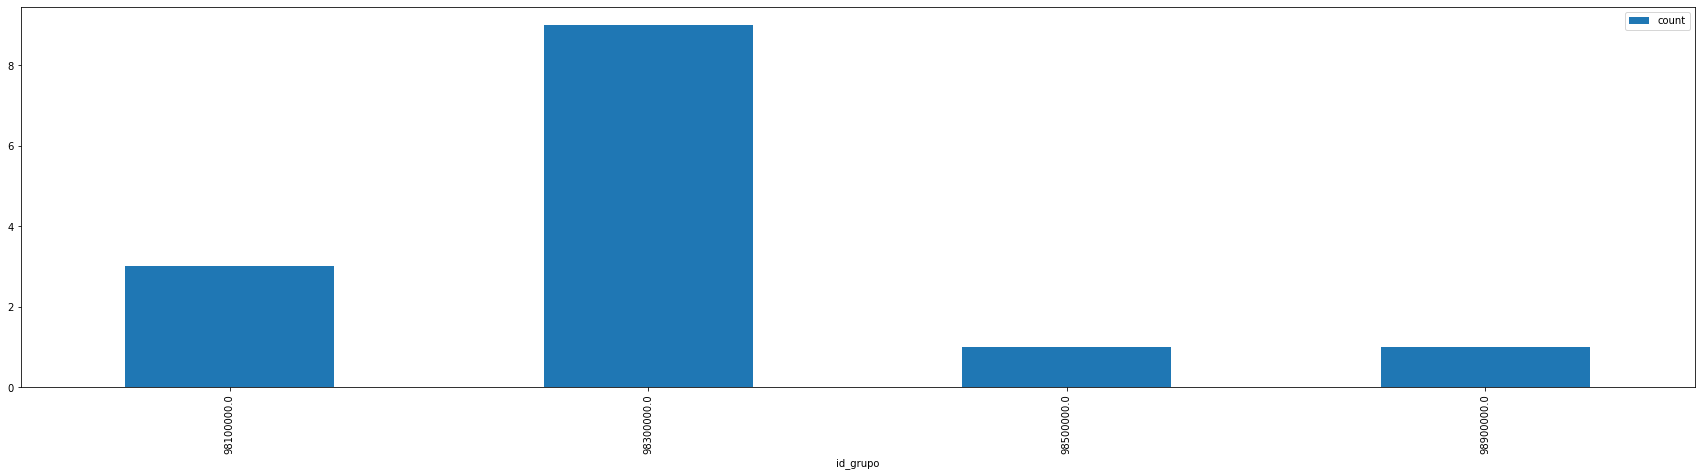

In [ ]:
#¿Cuántas clases hay por grupo?
cpvs.groupby(['id_division', 'id_grupo', 'id_clase' ]).size().reset_index(name='count').groupby(['id_division', 'id_grupo']).size().reset_index(name='count').groupby(['id_division']).plot(x='id_grupo', y='count', kind='bar', figsize=(30,7))

In [ ]:
#¿Cuántos cpvs hay por clase?
cpvs.groupby(['id_division', 'id_grupo', 'id_clase' ])['descripcion'].count()

id_division  id_grupo    id_clase  
3000000      3100000.0   3110000.0     34
                         3120000.0      5
                         3130000.0      7
                         3140000.0     10
             3200000.0   3210000.0     20
                                       ..
98000000     98300000.0  98370000.0     7
                         98380000.0     1
                         98390000.0     7
             98500000.0  98510000.0     9
             98900000.0  98910000.0     1
Name: descripcion, Length: 1004, dtype: int64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


id_division
3000000     AxesSubplot(0.125,0.125;0.775x0.755)
9000000     AxesSubplot(0.125,0.125;0.775x0.755)
14000000    AxesSubplot(0.125,0.125;0.775x0.755)
15000000    AxesSubplot(0.125,0.125;0.775x0.755)
16000000    AxesSubplot(0.125,0.125;0.775x0.755)
18000000    AxesSubplot(0.125,0.125;0.775x0.755)
19000000    AxesSubplot(0.125,0.125;0.775x0.755)
22000000    AxesSubplot(0.125,0.125;0.775x0.755)
24000000    AxesSubplot(0.125,0.125;0.775x0.755)
30000000    AxesSubplot(0.125,0.125;0.775x0.755)
31000000    AxesSubplot(0.125,0.125;0.775x0.755)
32000000    AxesSubplot(0.125,0.125;0.775x0.755)
33000000    AxesSubplot(0.125,0.125;0.775x0.755)
34000000    AxesSubplot(0.125,0.125;0.775x0.755)
35000000    AxesSubplot(0.125,0.125;0.775x0.755)
37000000    AxesSubplot(0.125,0.125;0.775x0.755)
38000000    AxesSubplot(0.125,0.125;0.775x0.755)
39000000    AxesSubplot(0.125,0.125;0.775x0.755)
41000000    AxesSubplot(0.125,0.125;0.775x0.755)
42000000    AxesSubplot(0.125,0.125;0.775x0.755)
43000000

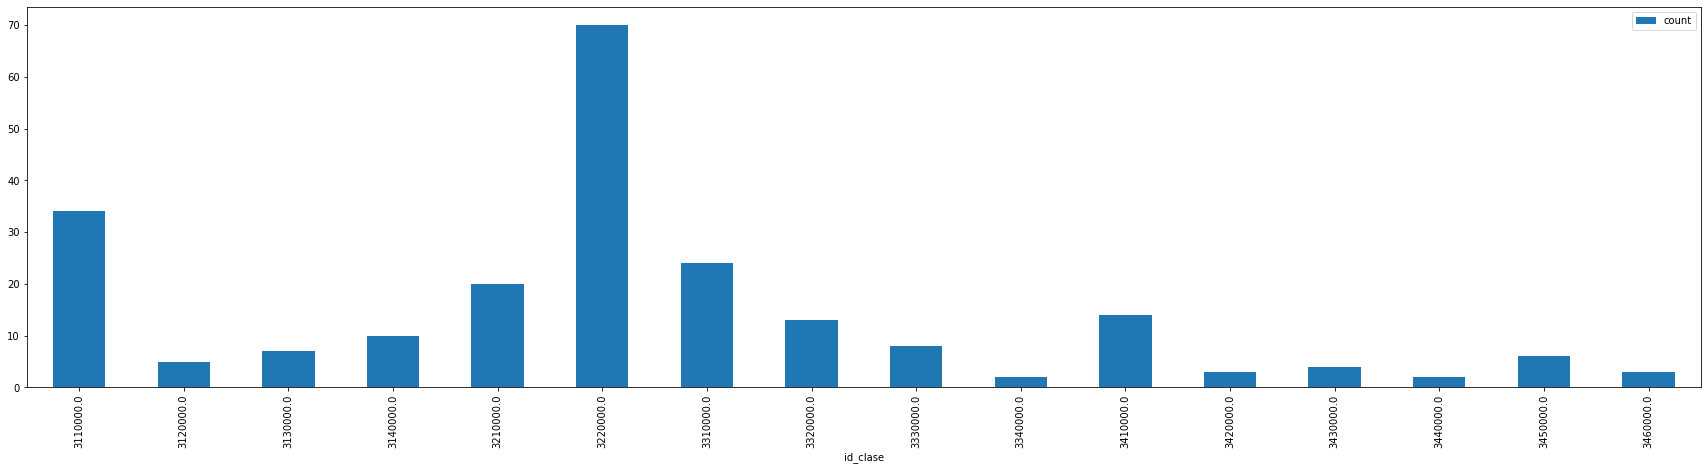

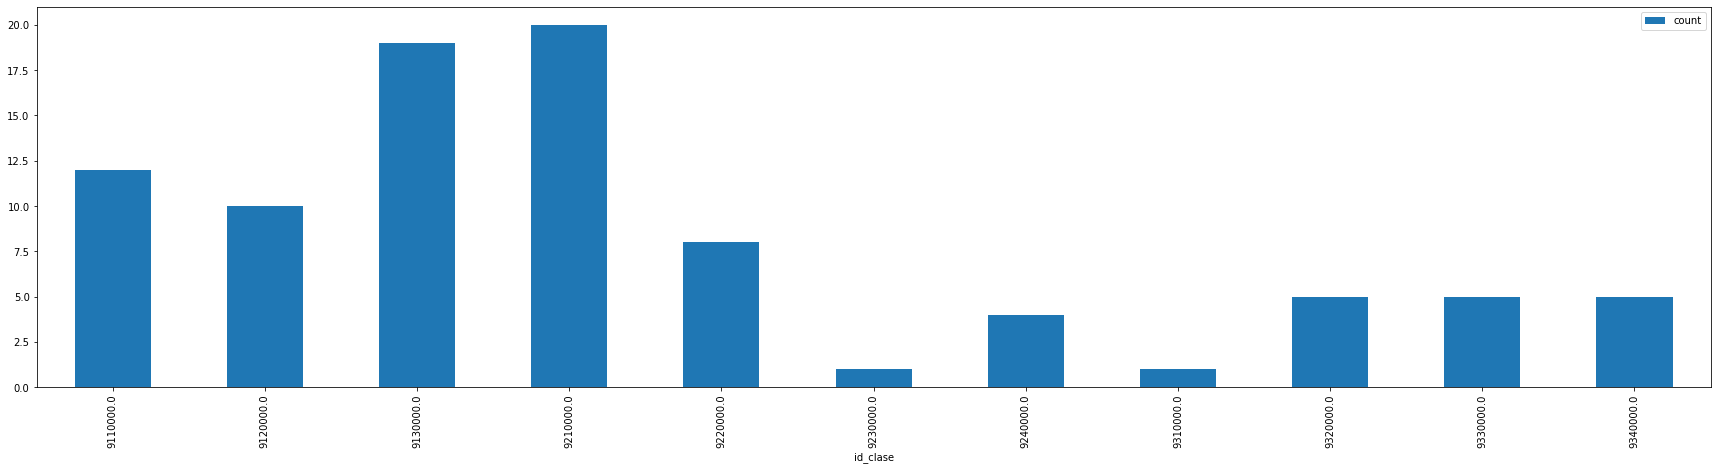

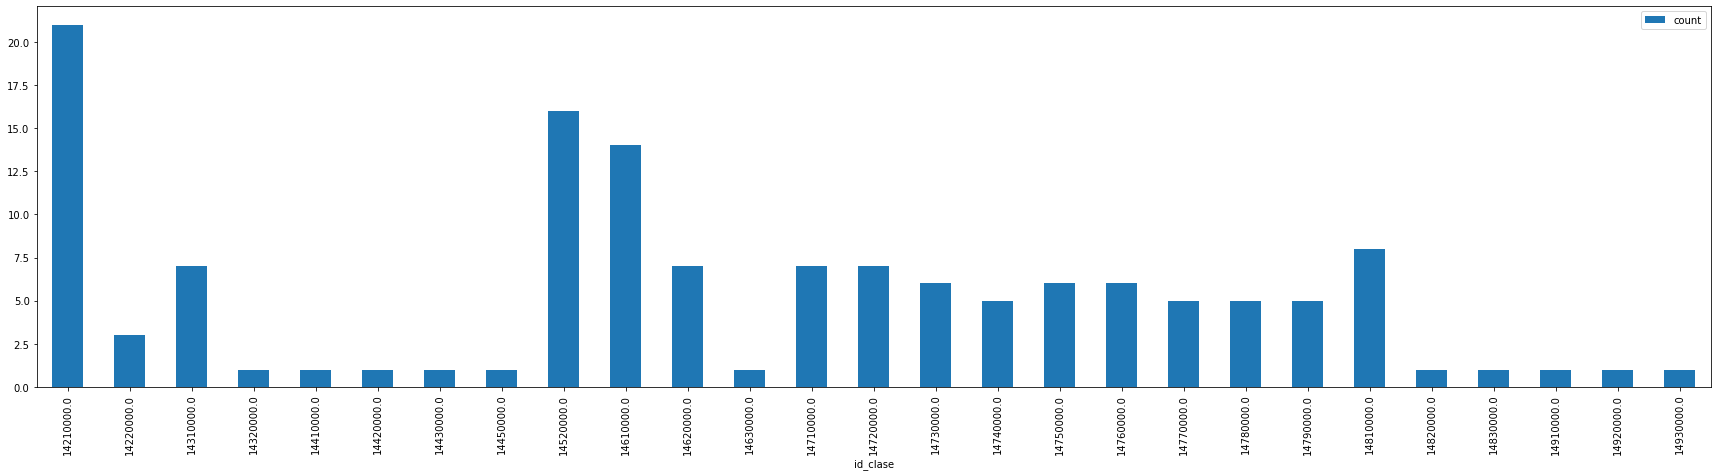

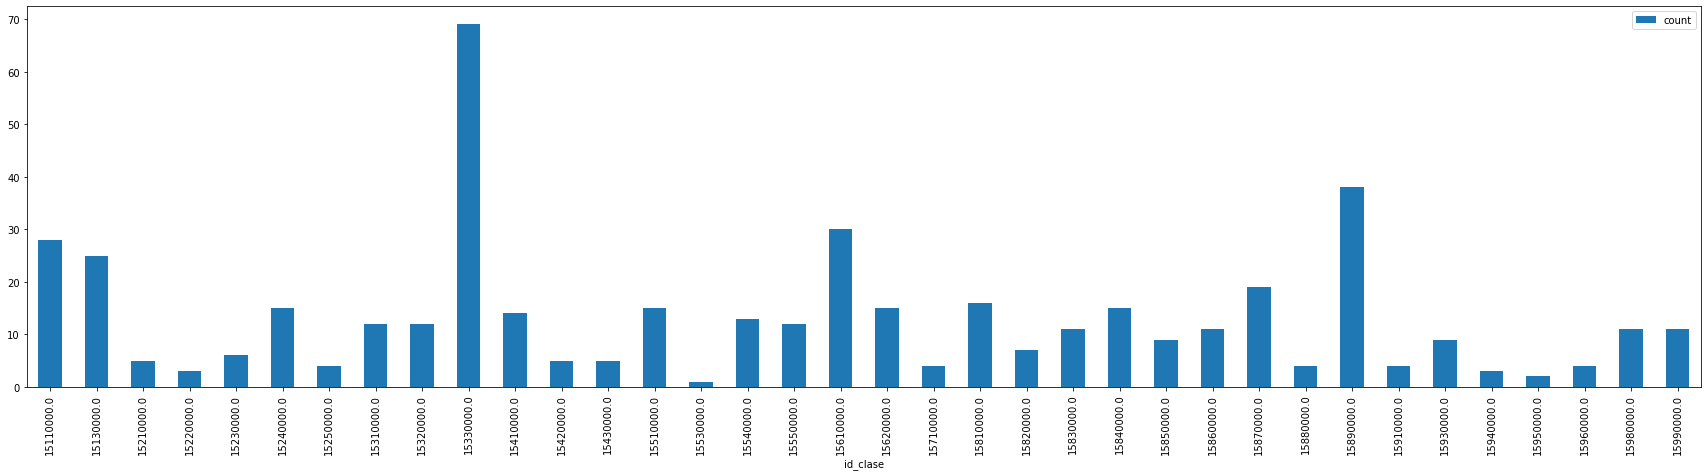

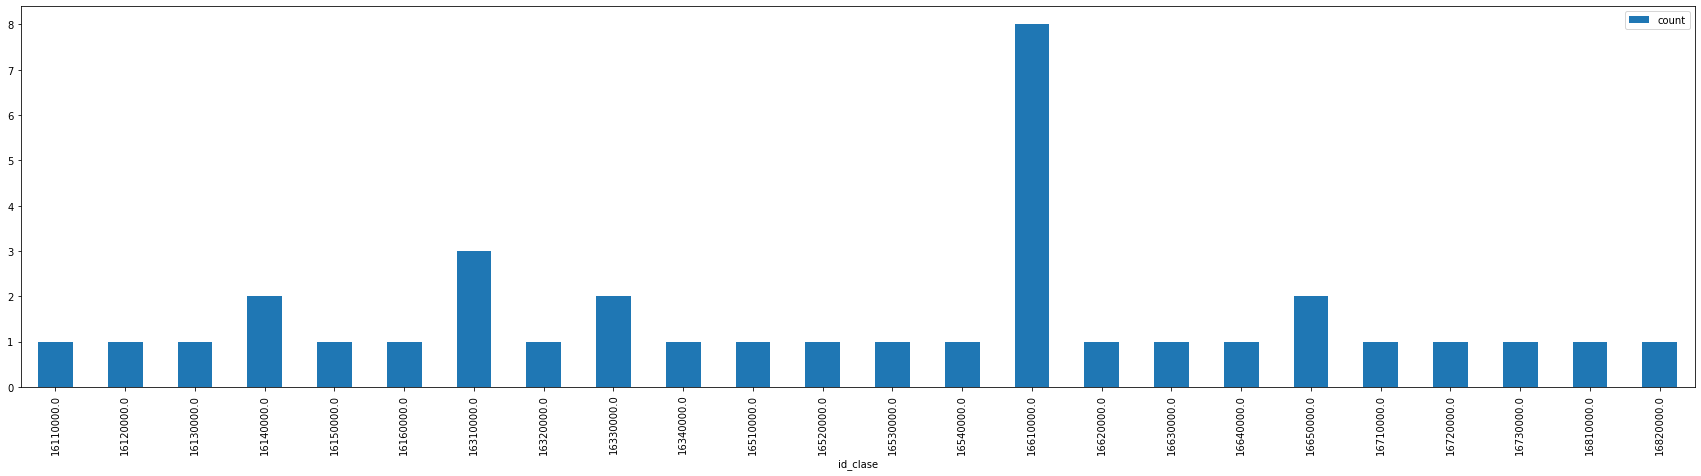

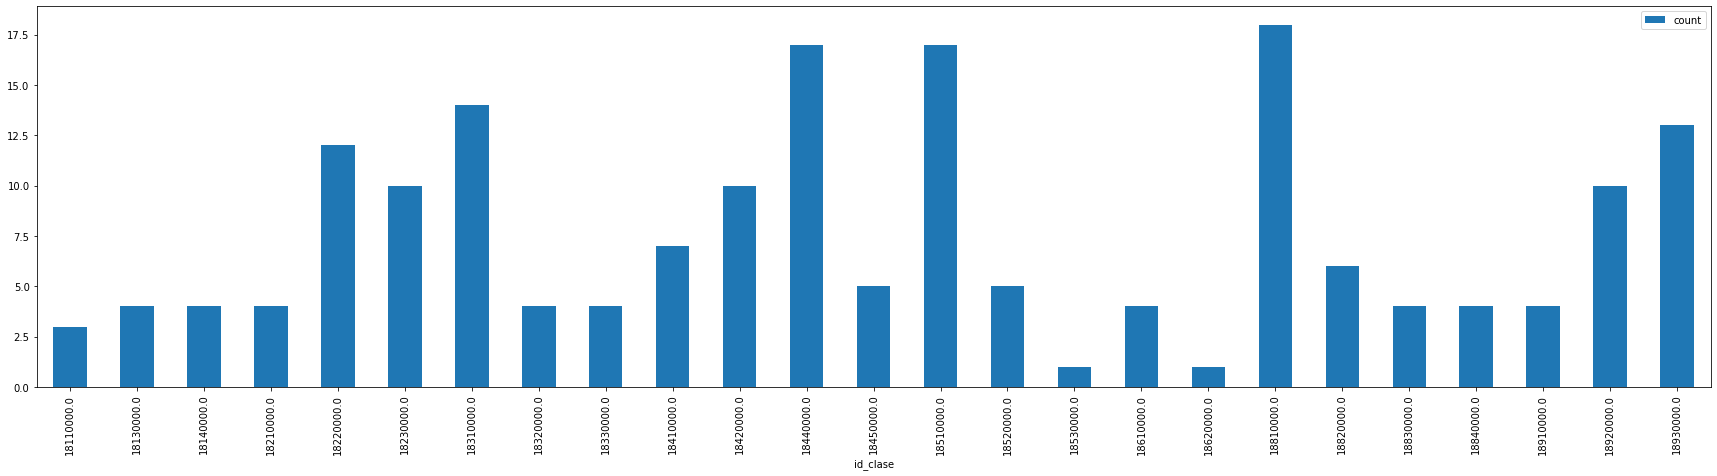

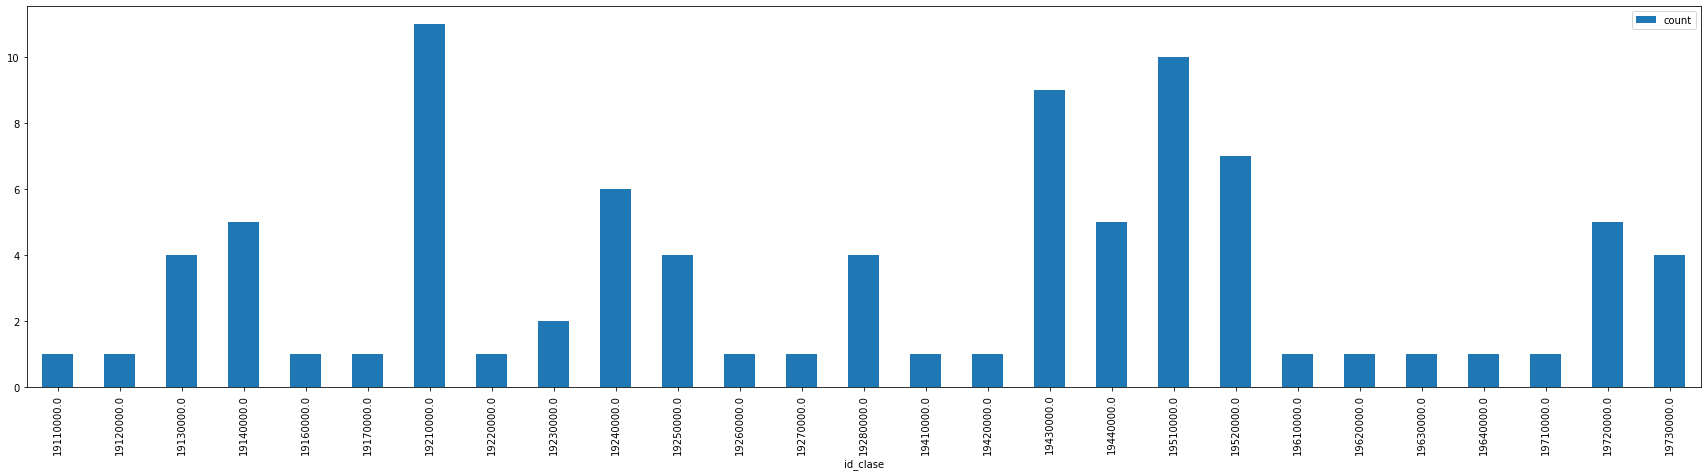

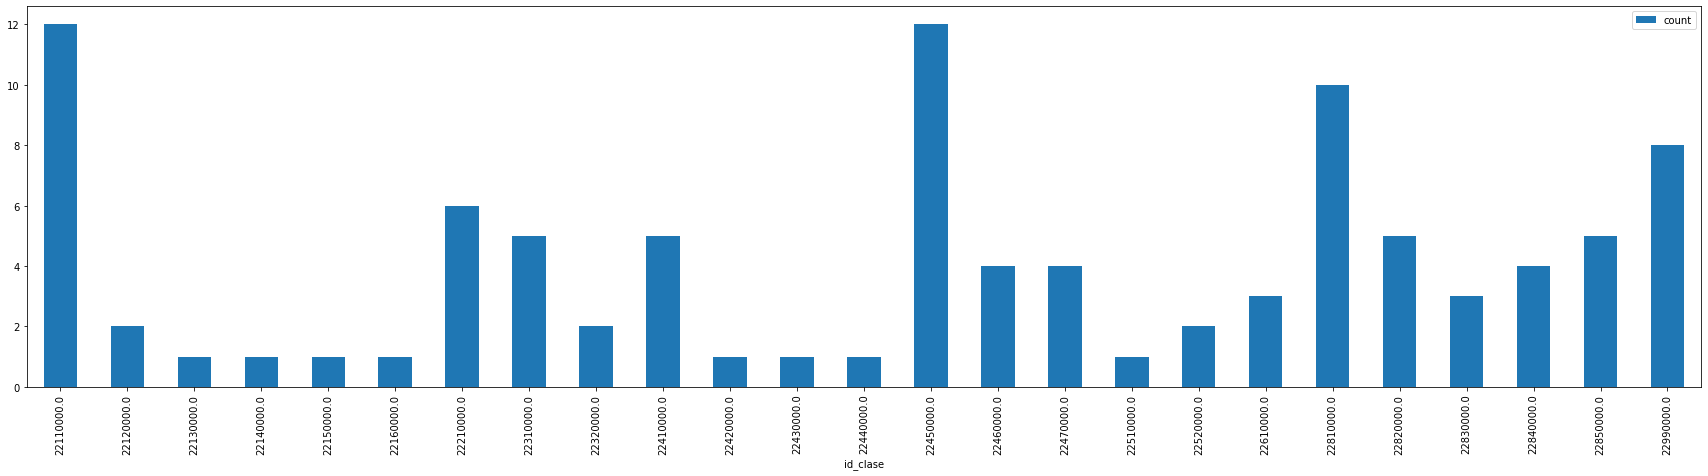

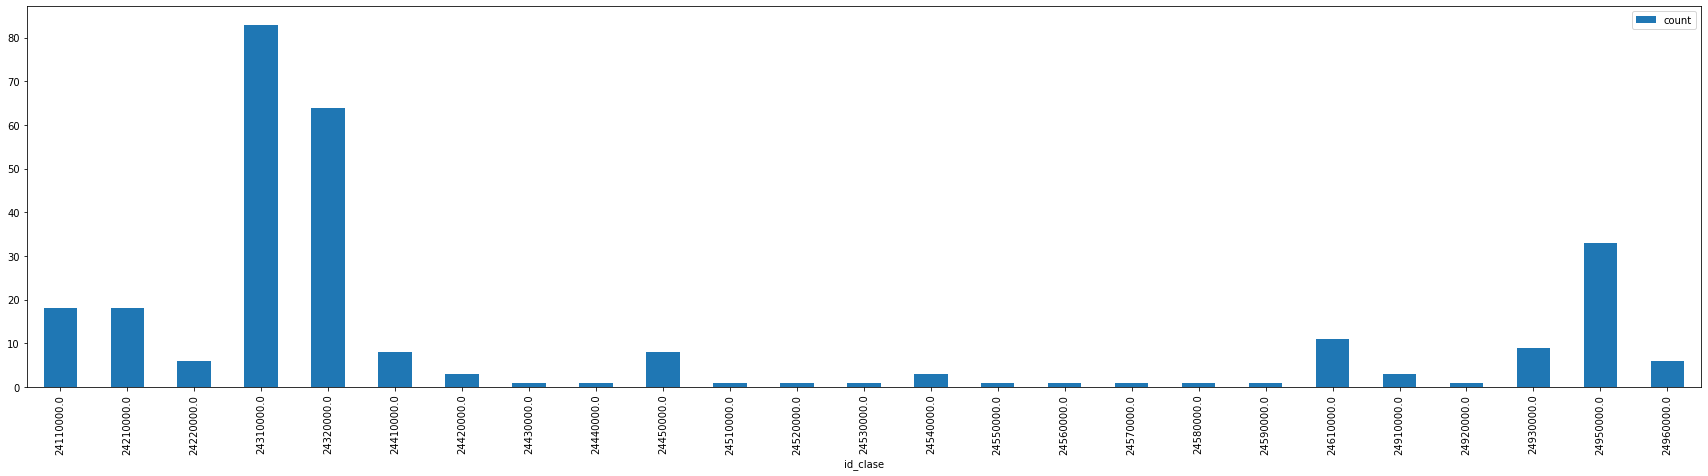

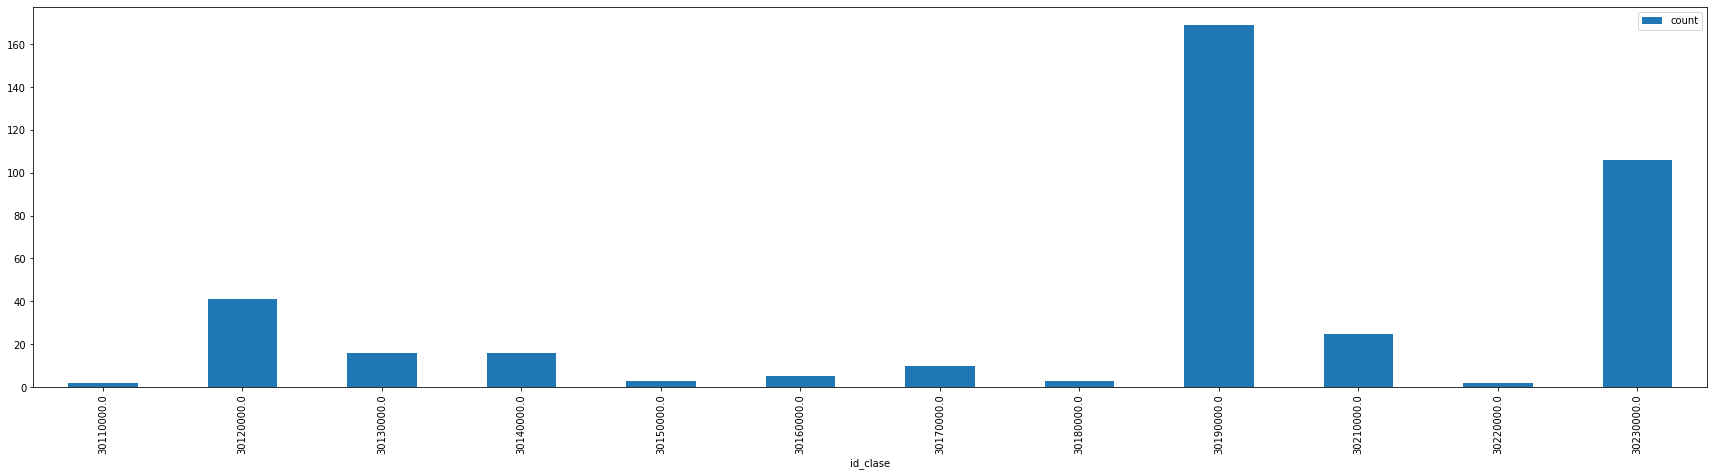

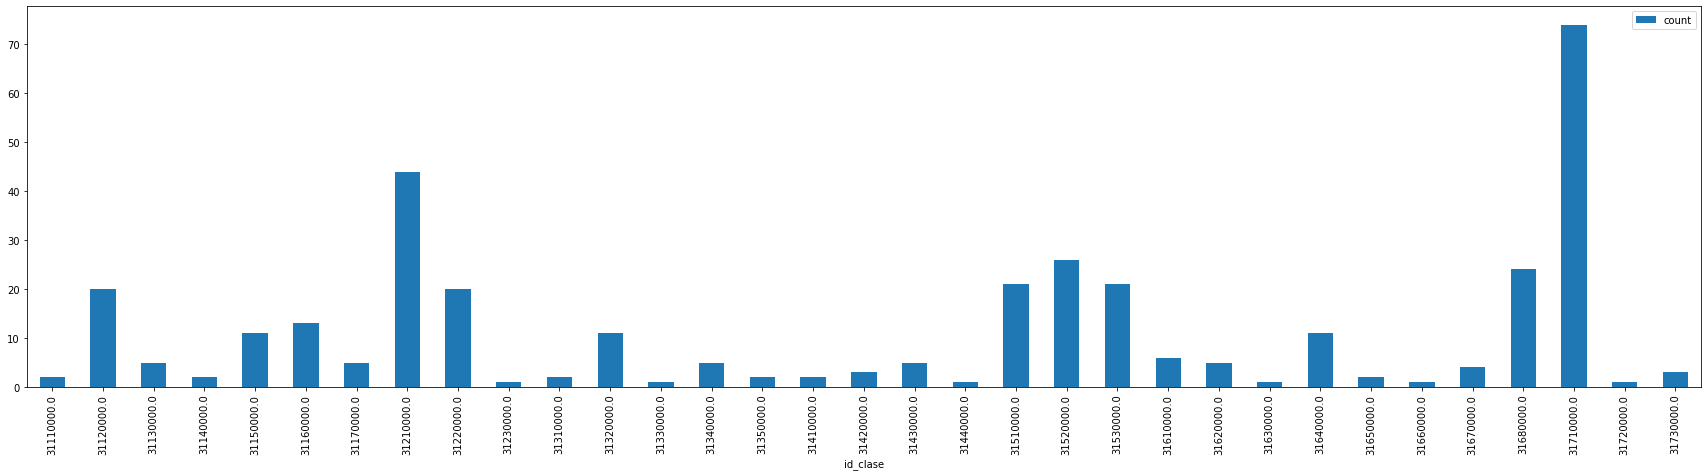

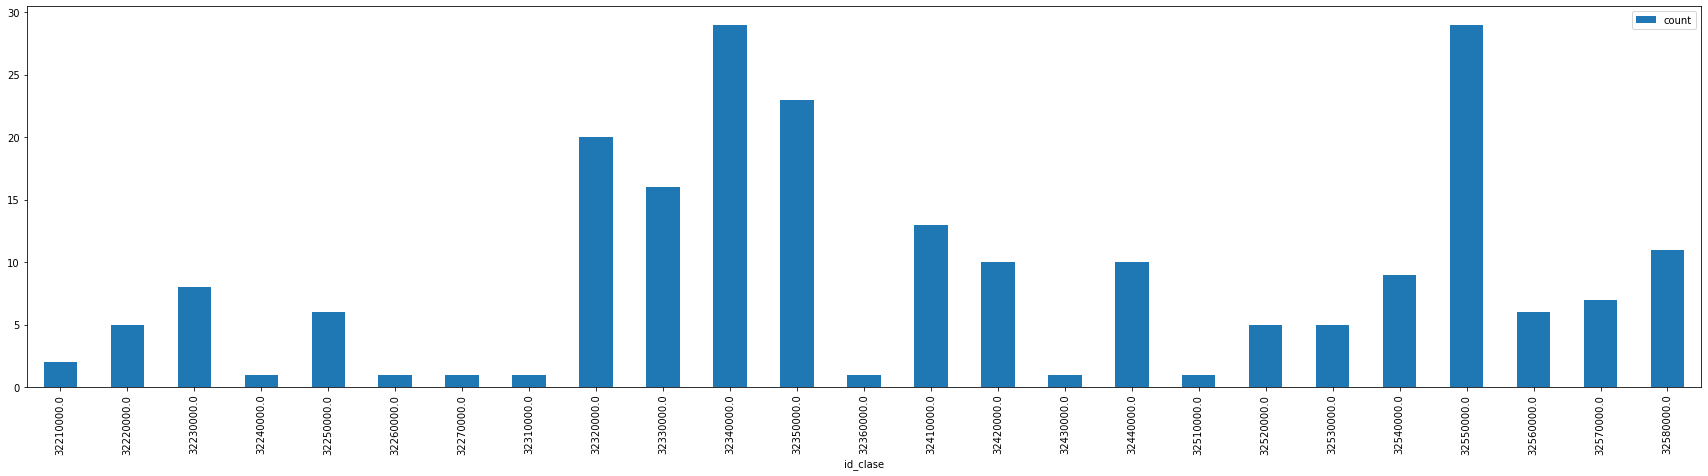

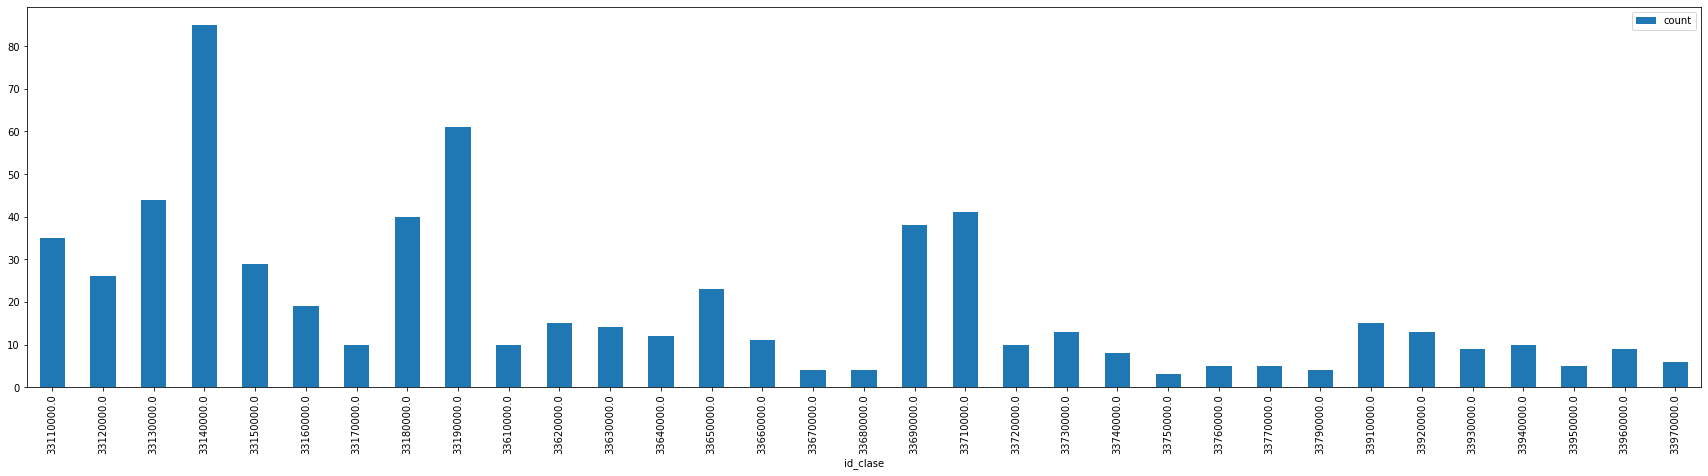

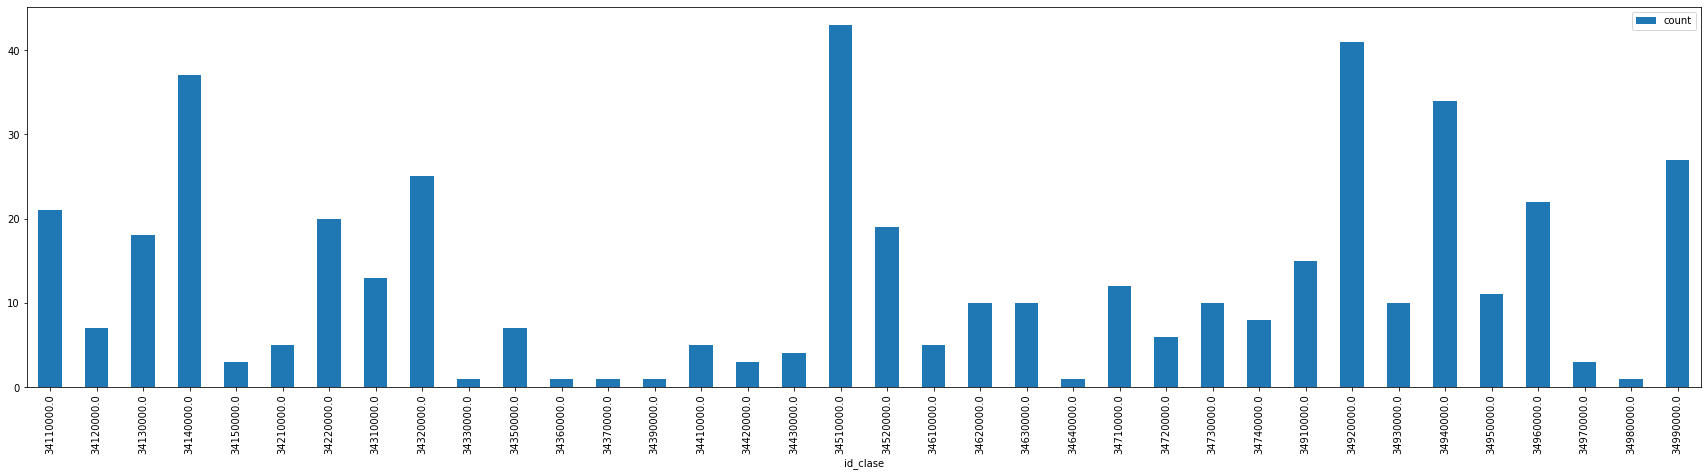

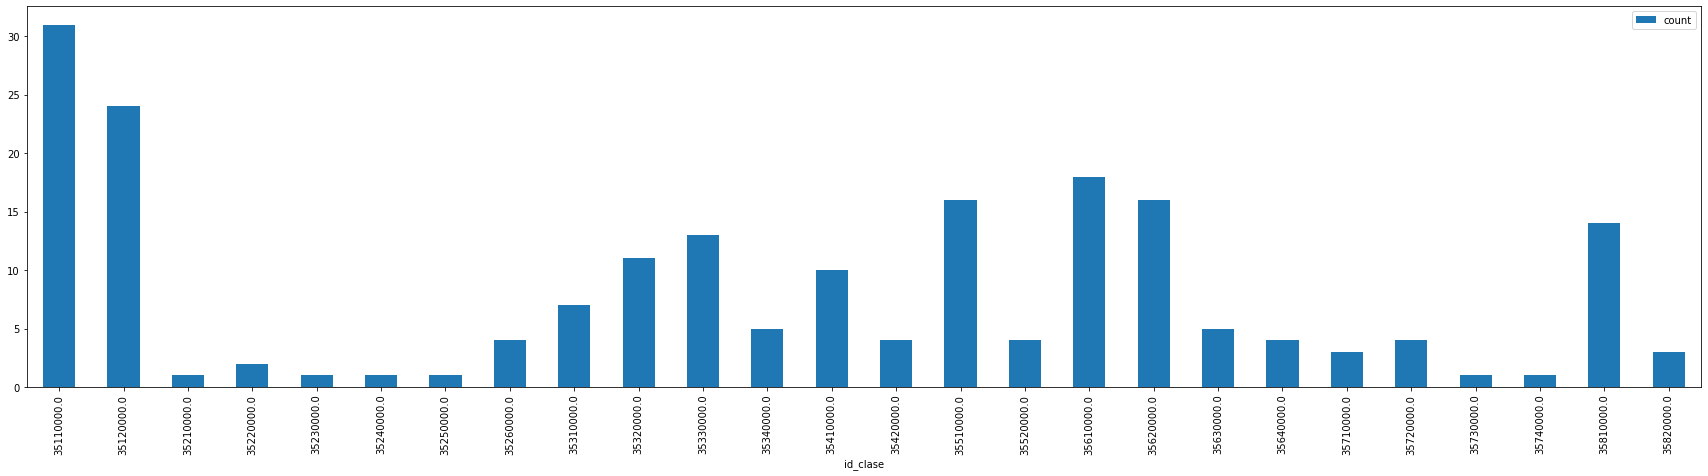

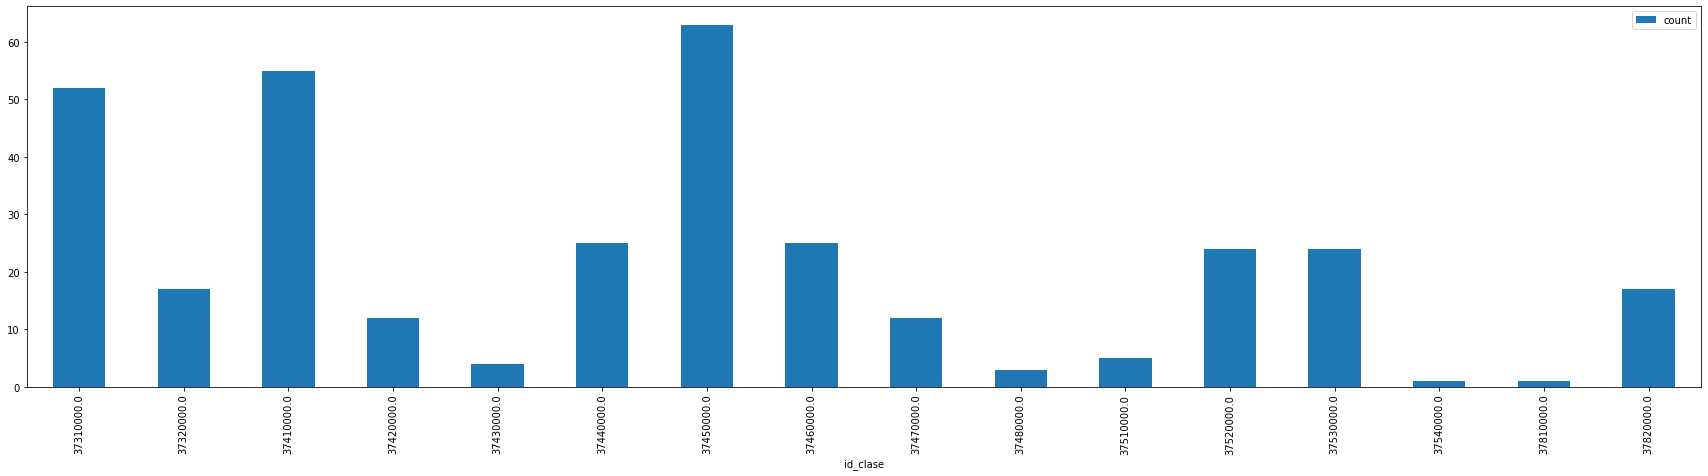

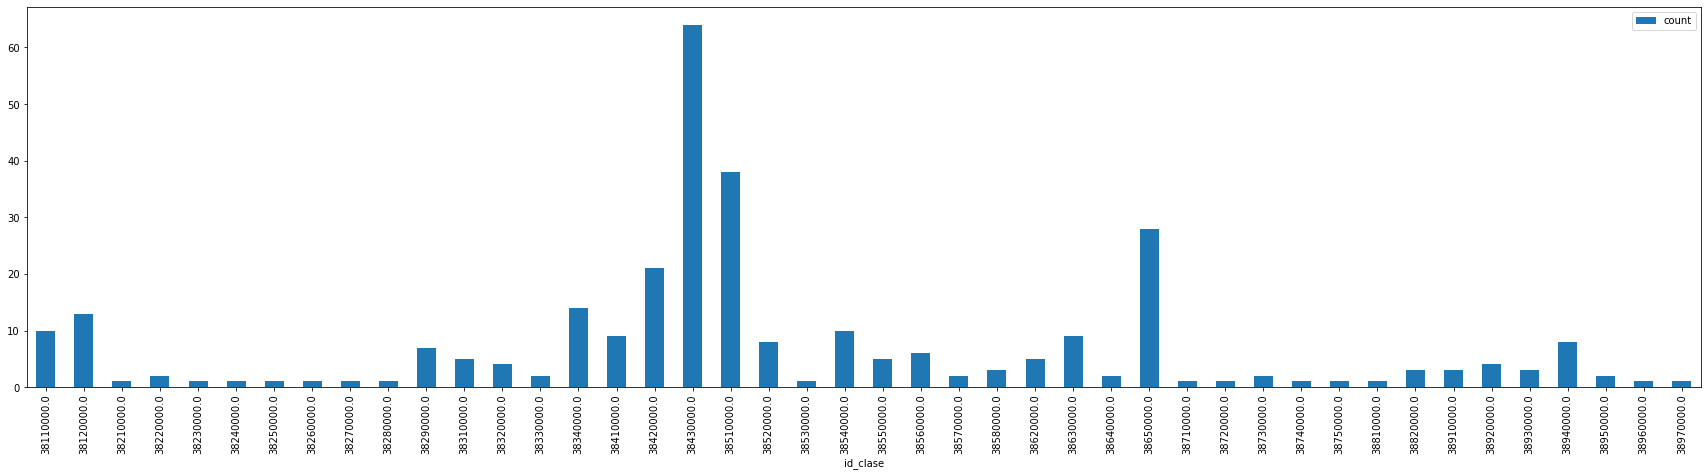

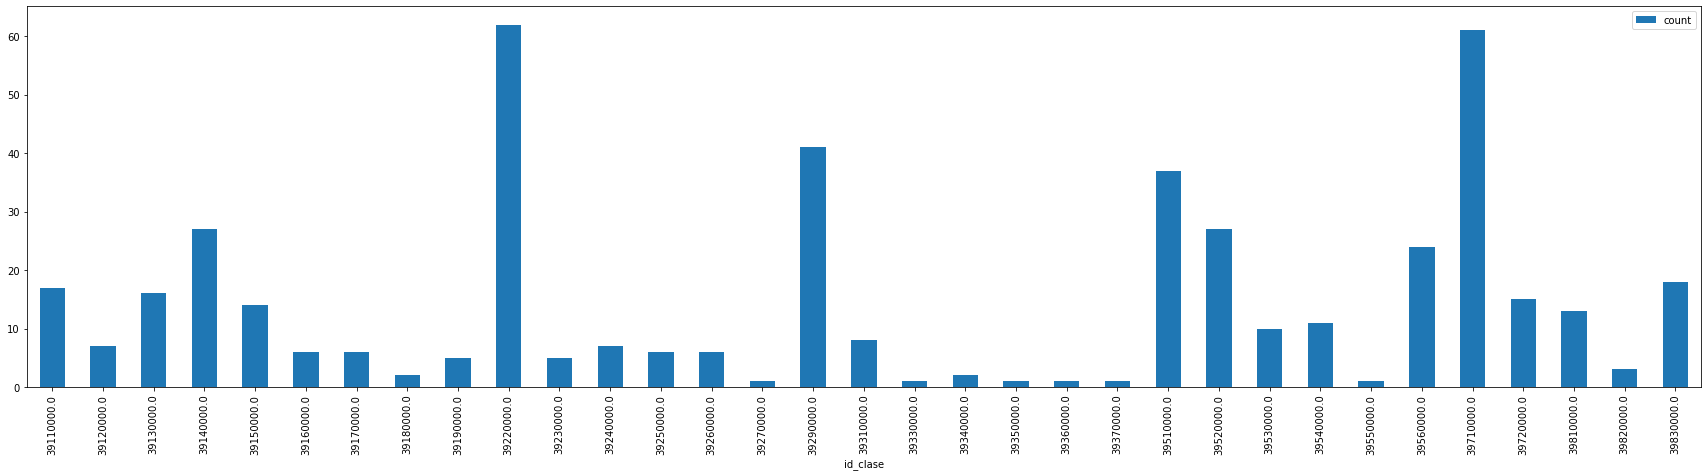

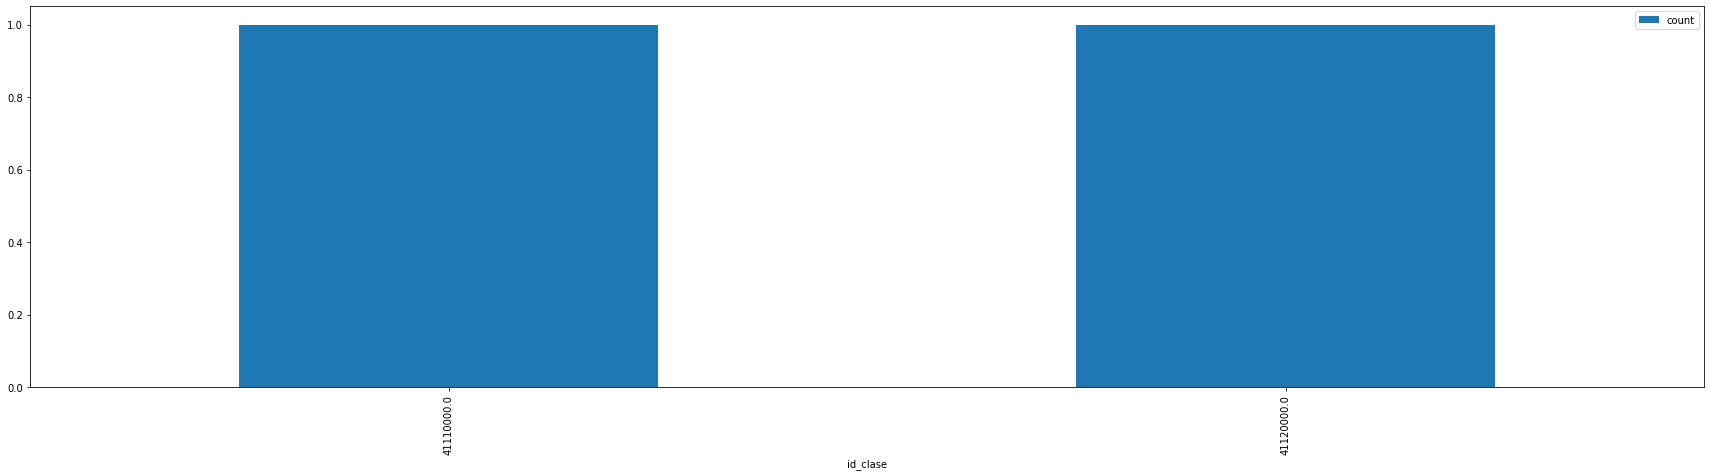

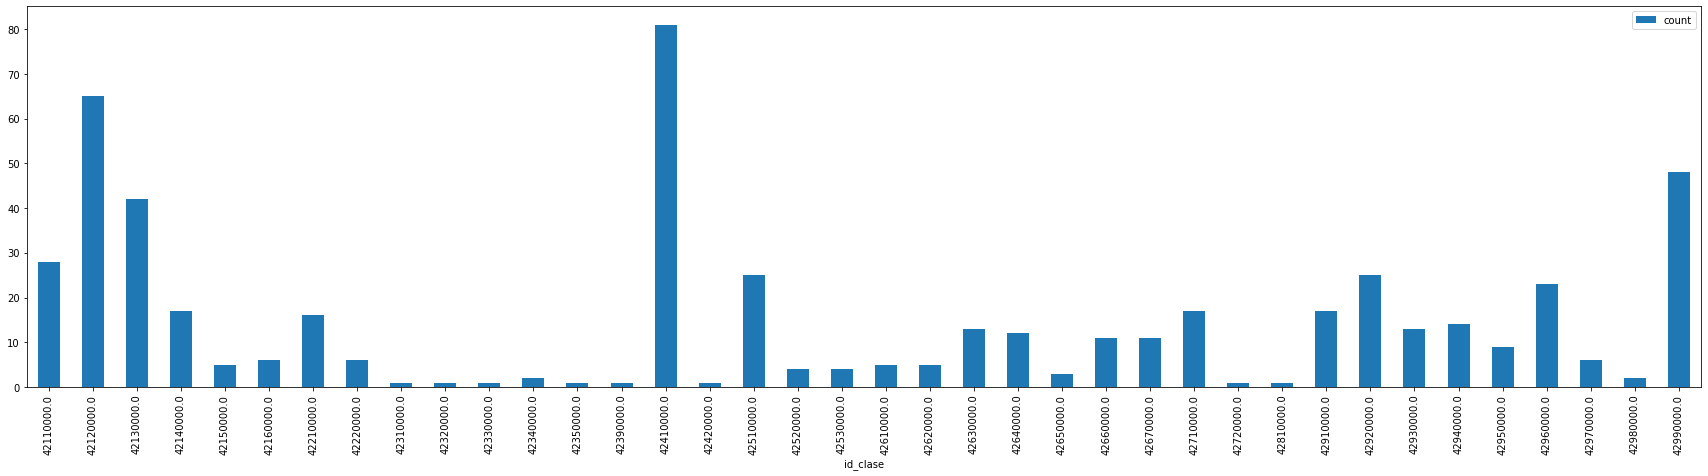

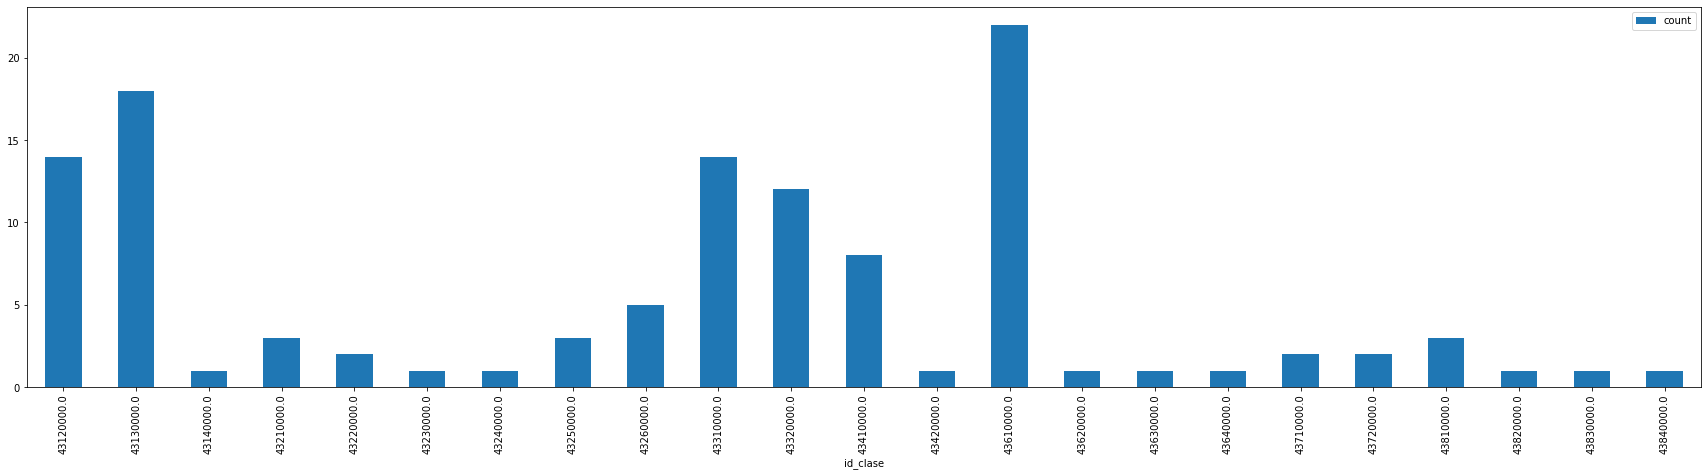

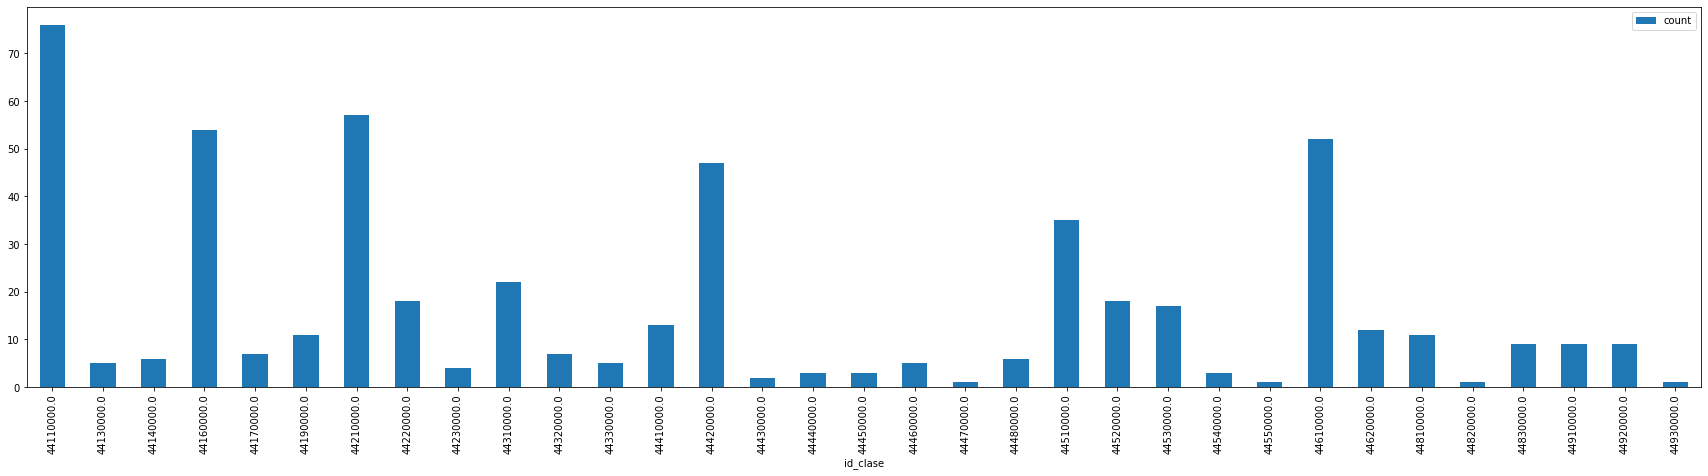

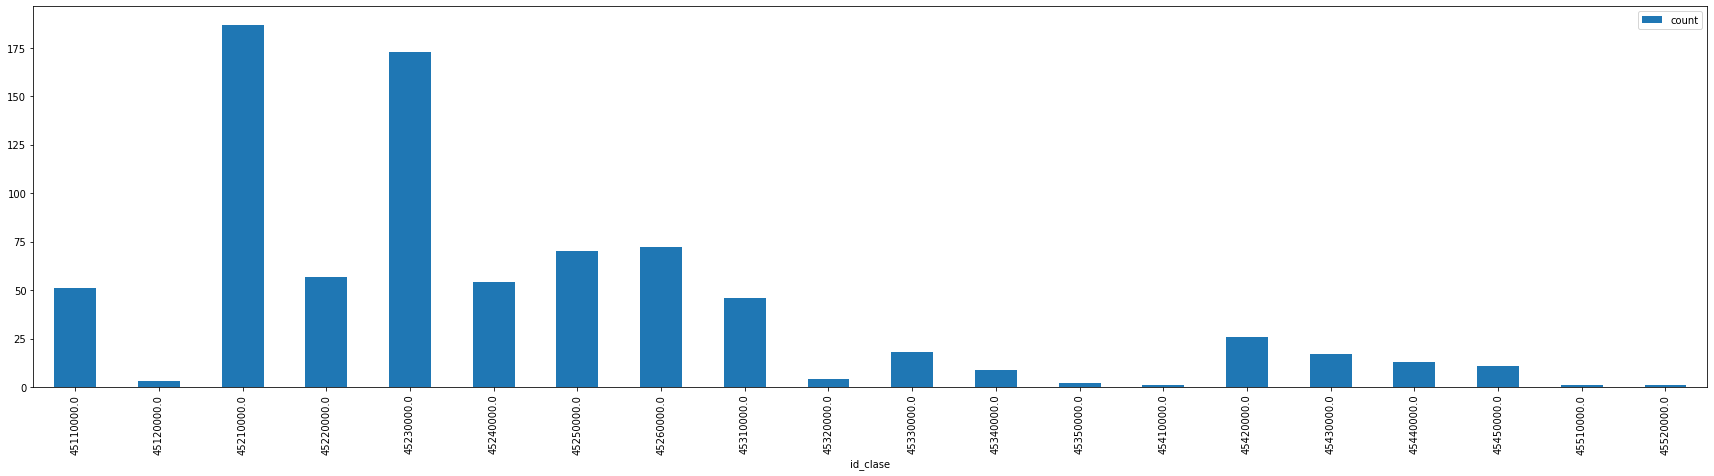

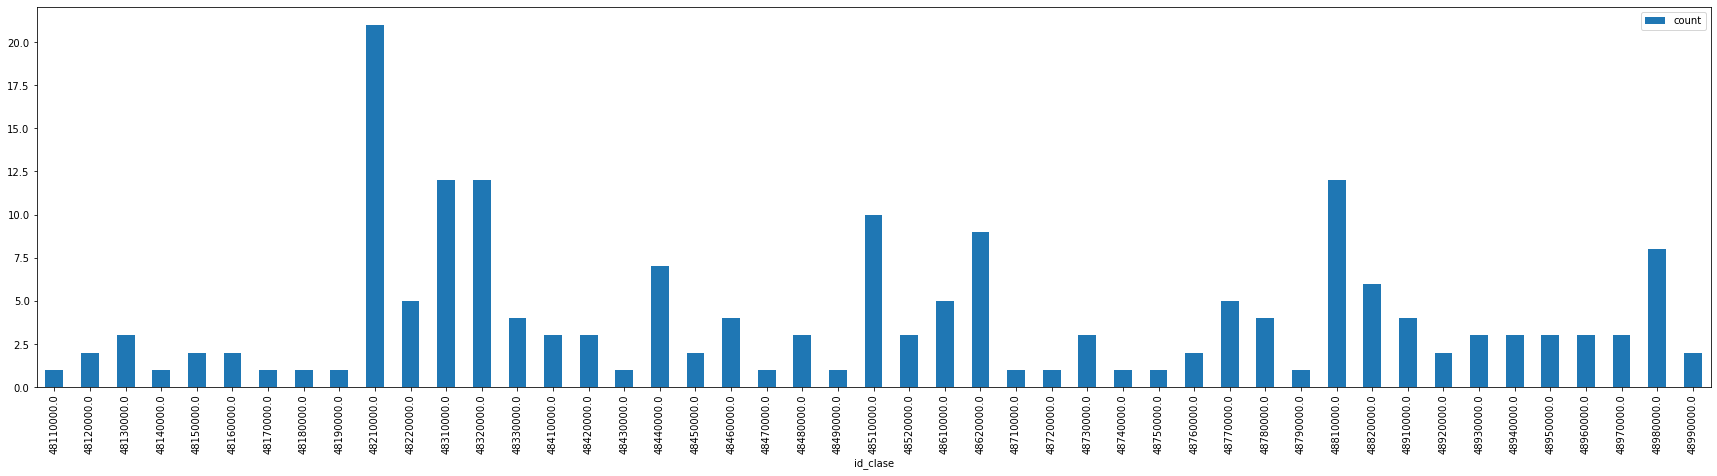

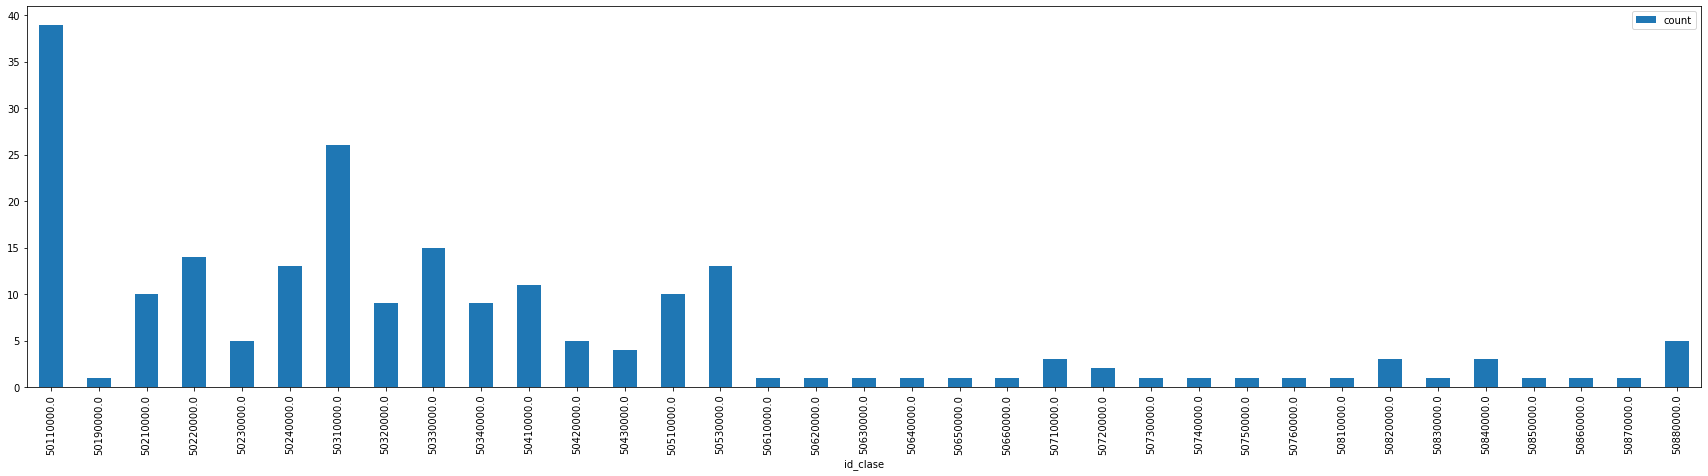

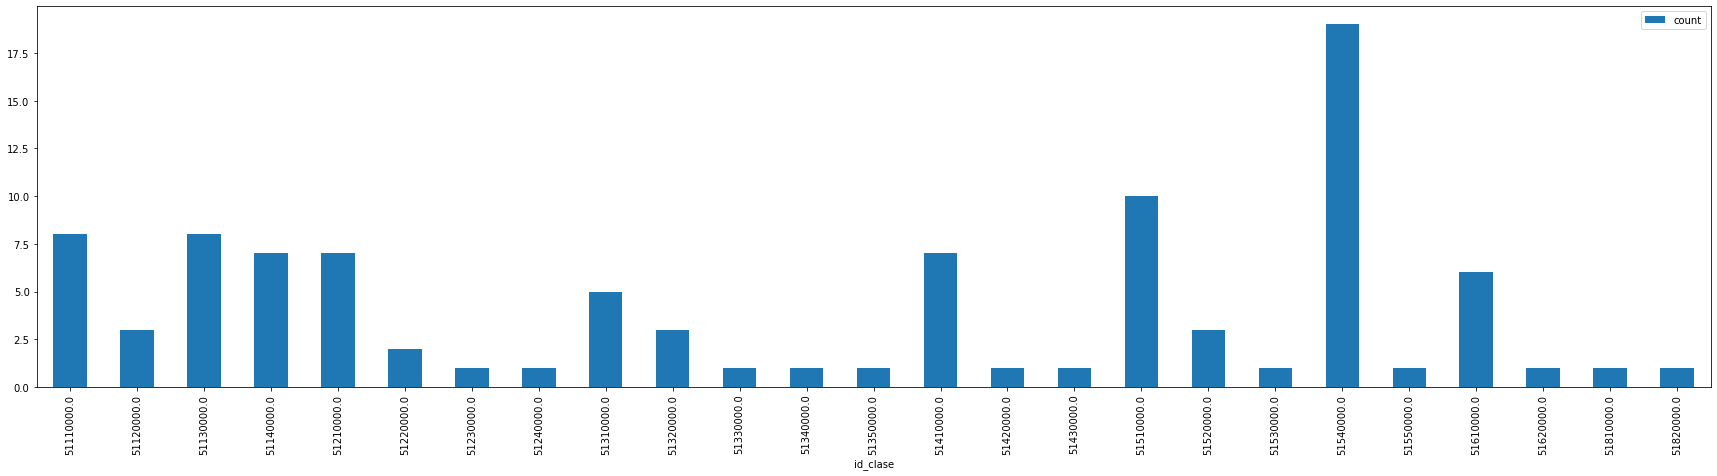

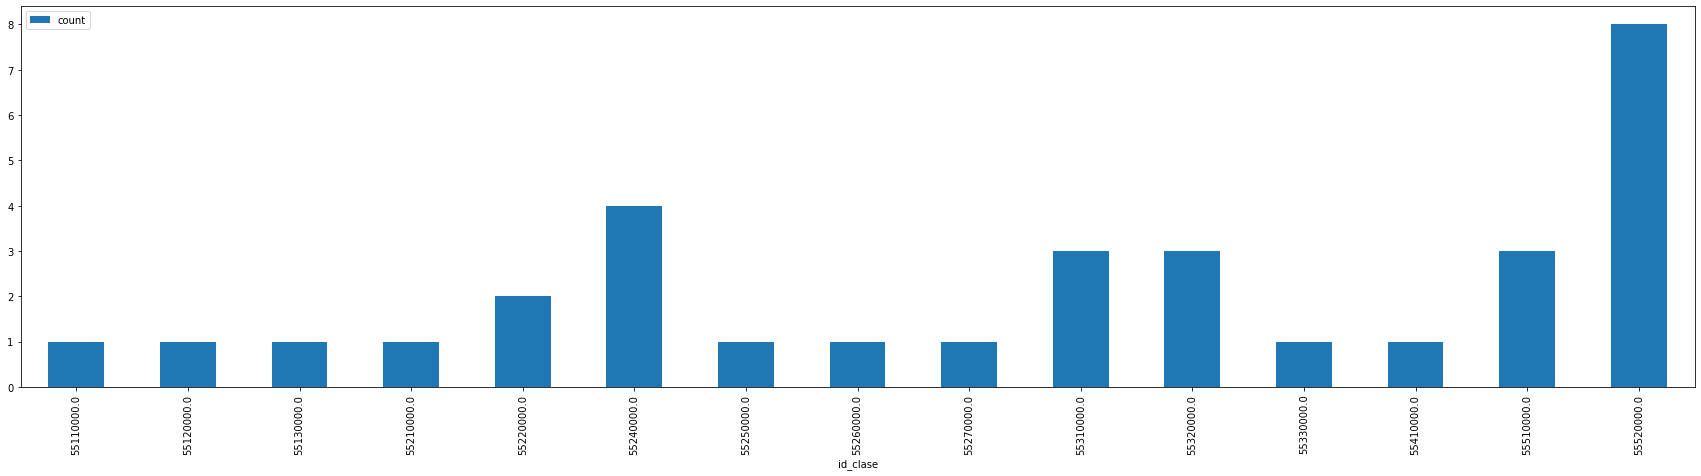

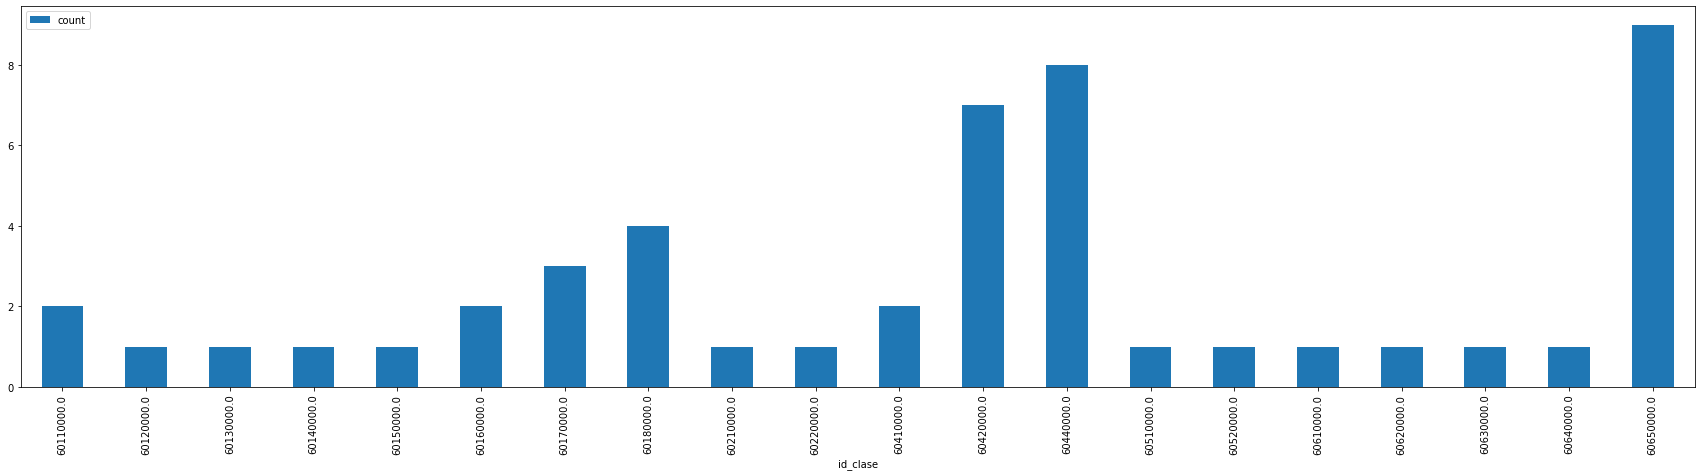

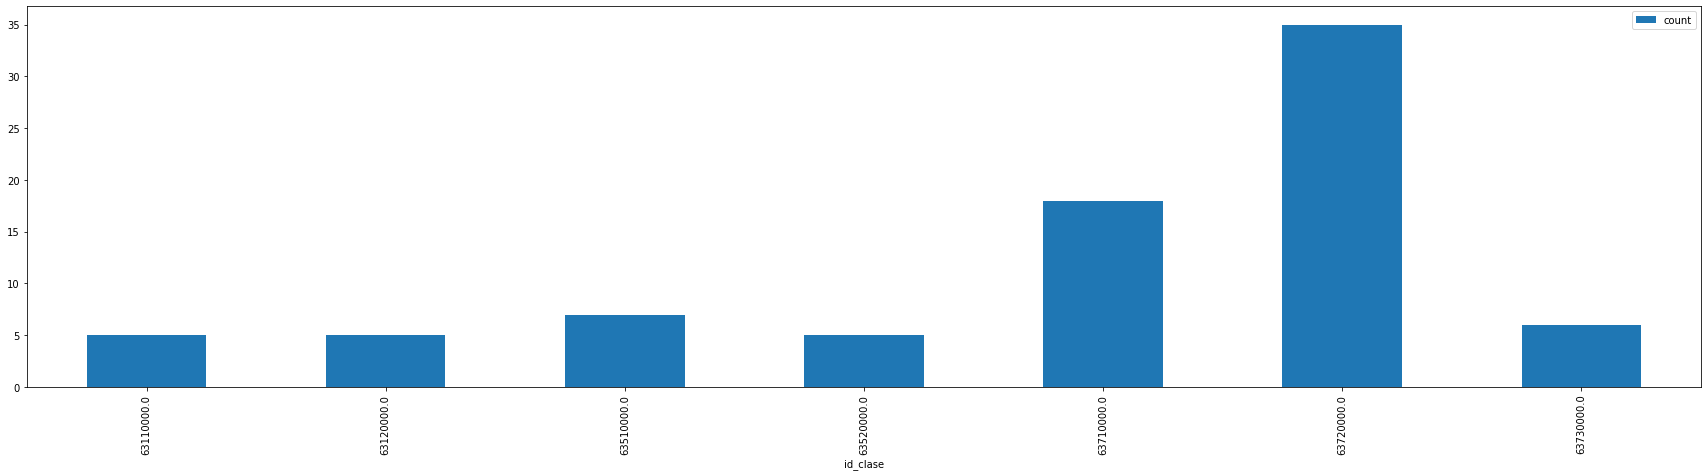

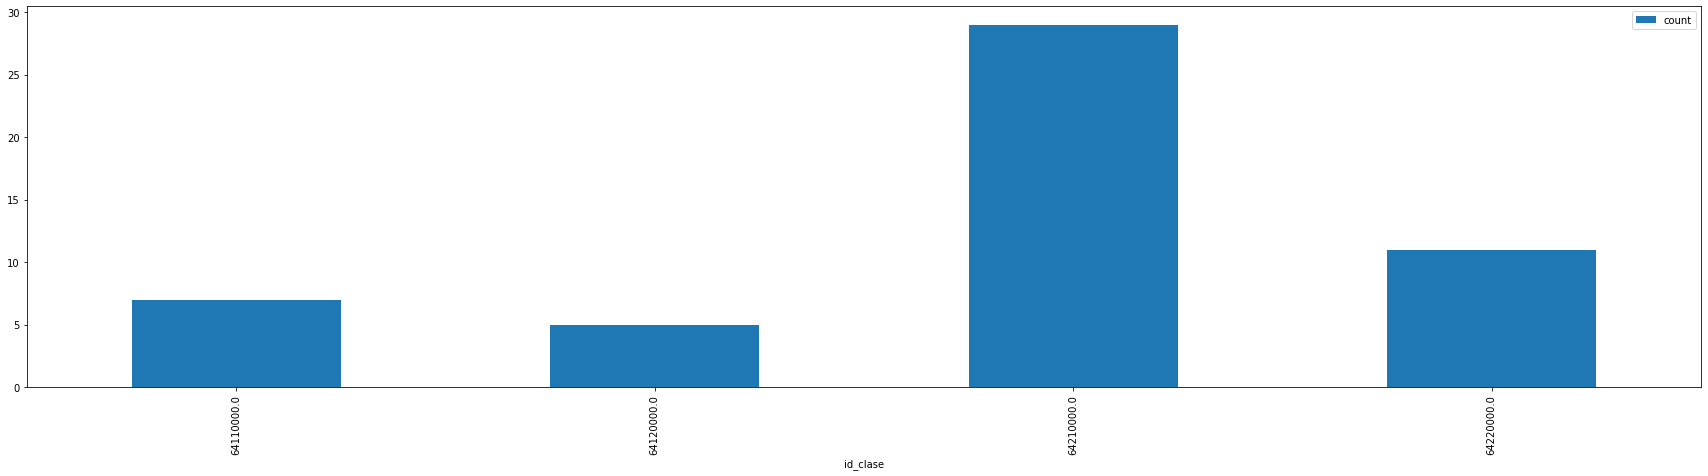

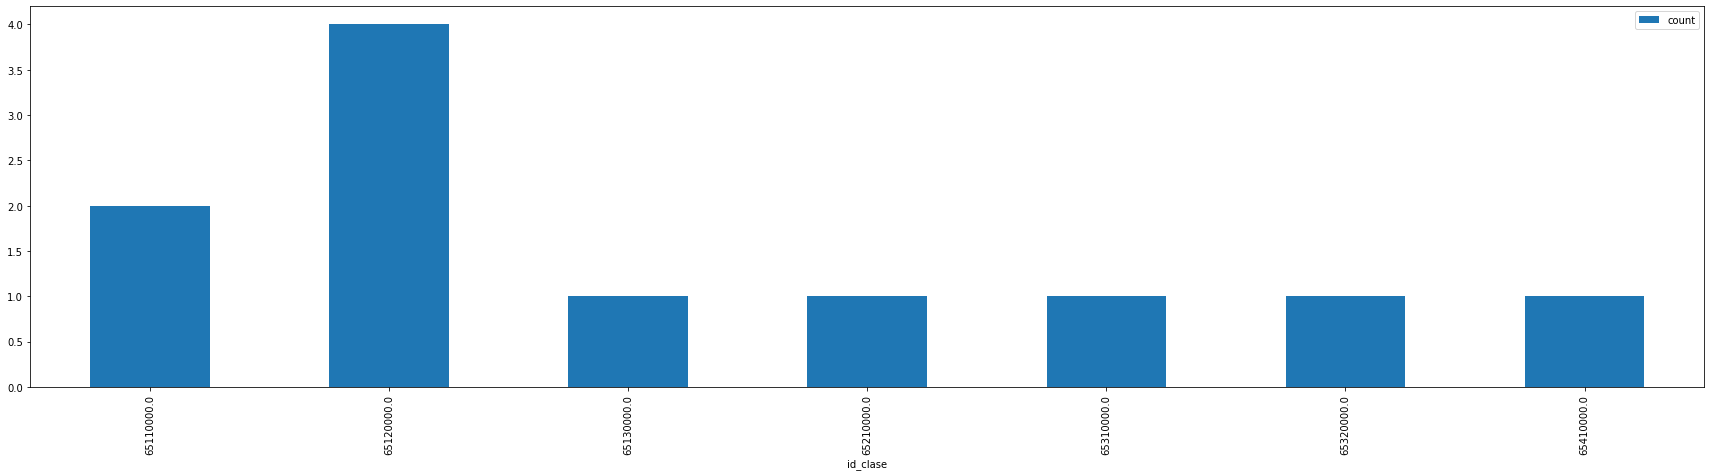

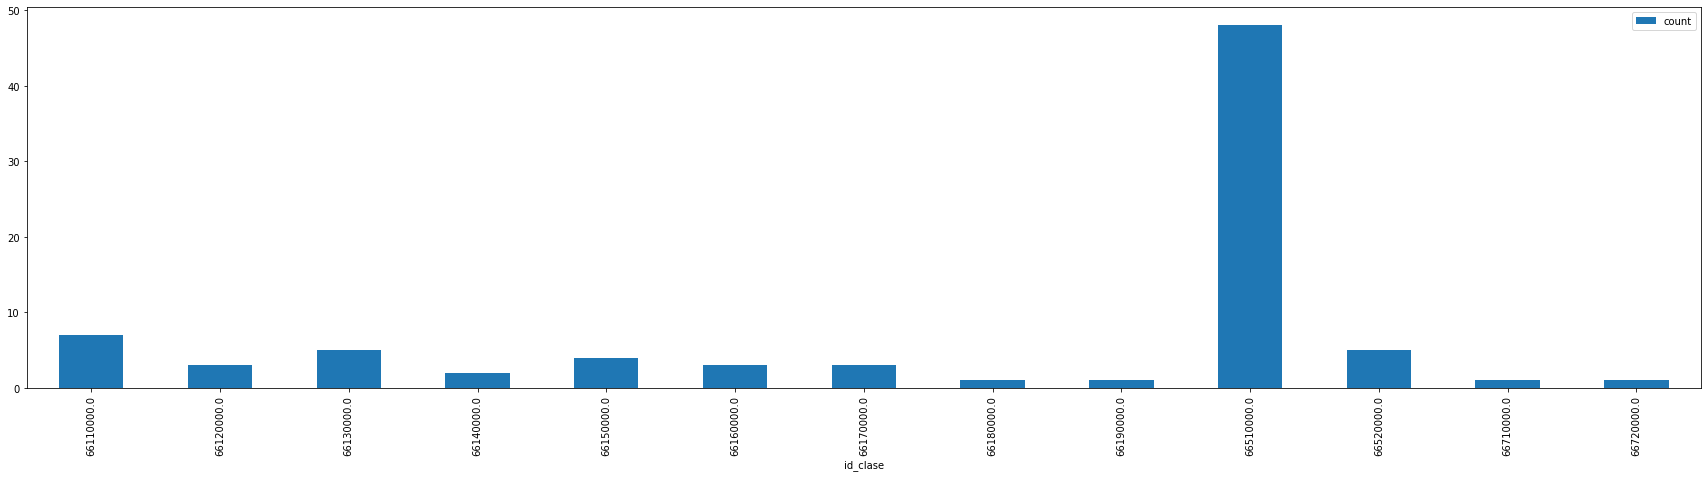

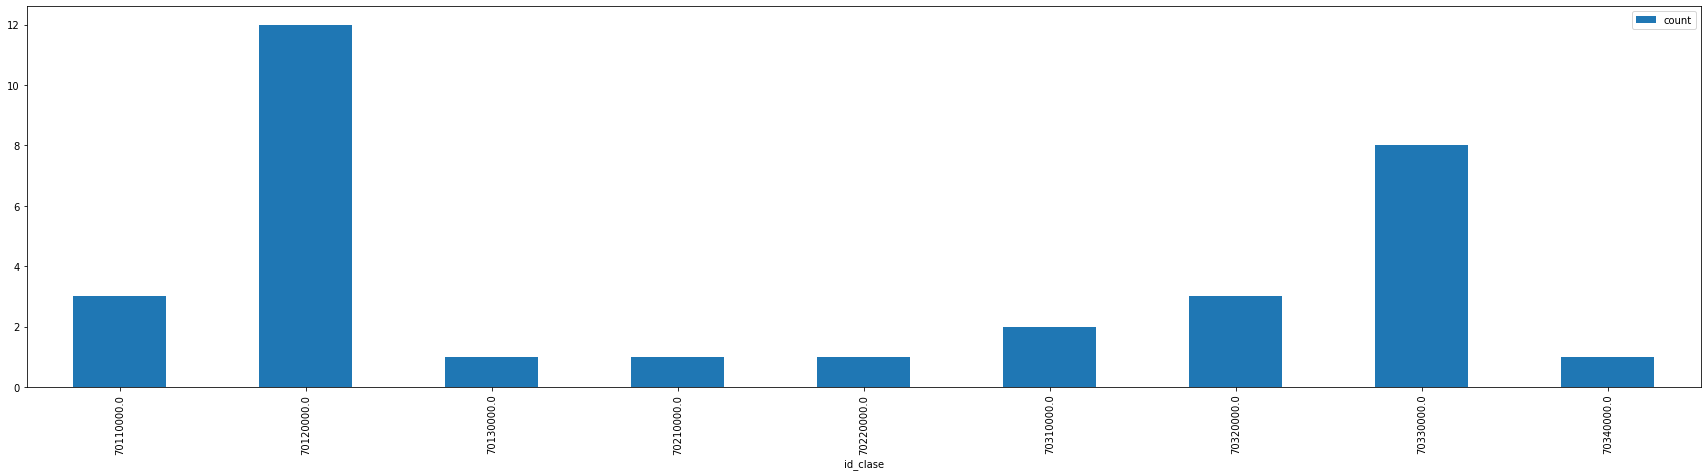

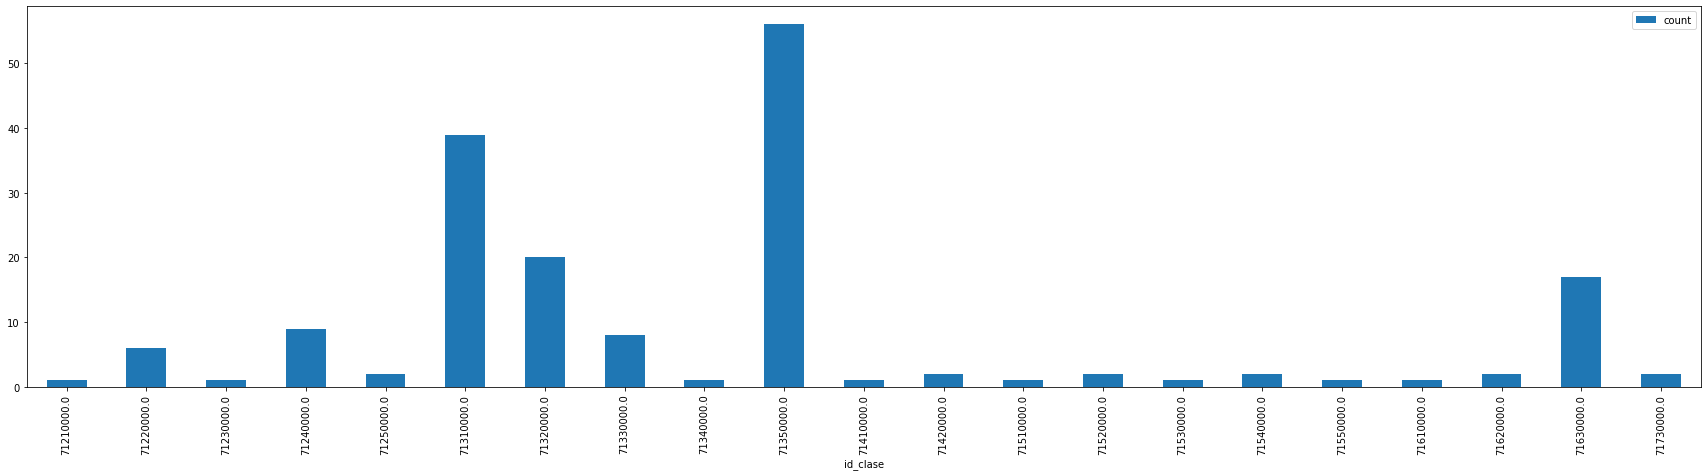

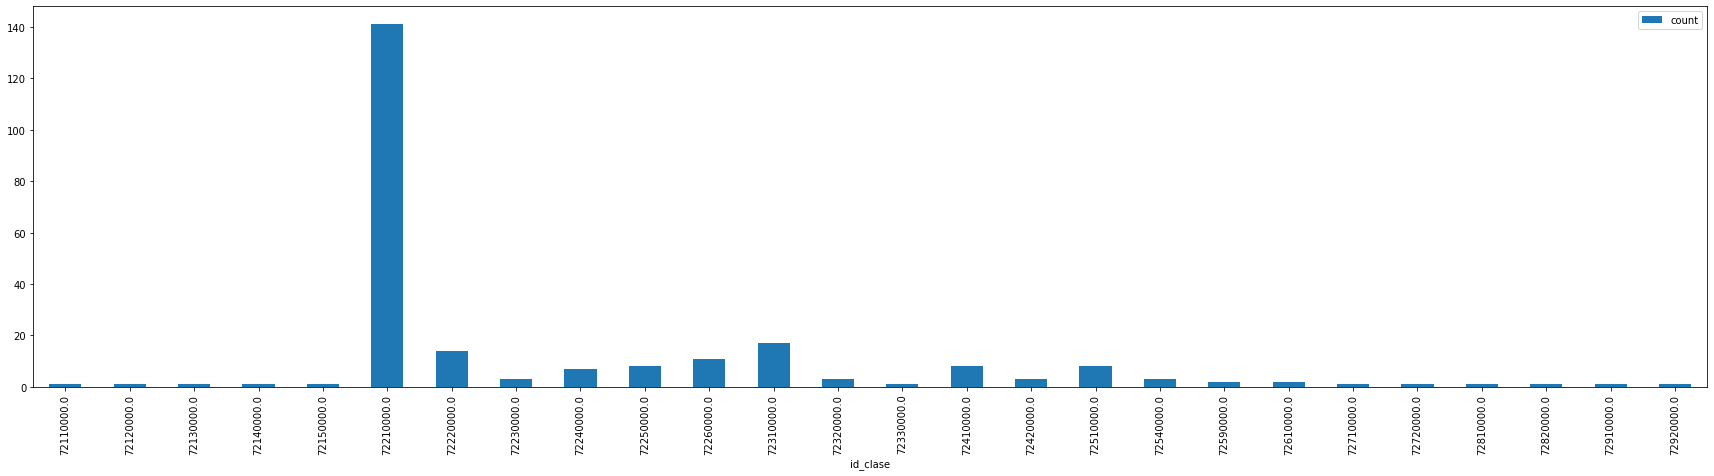

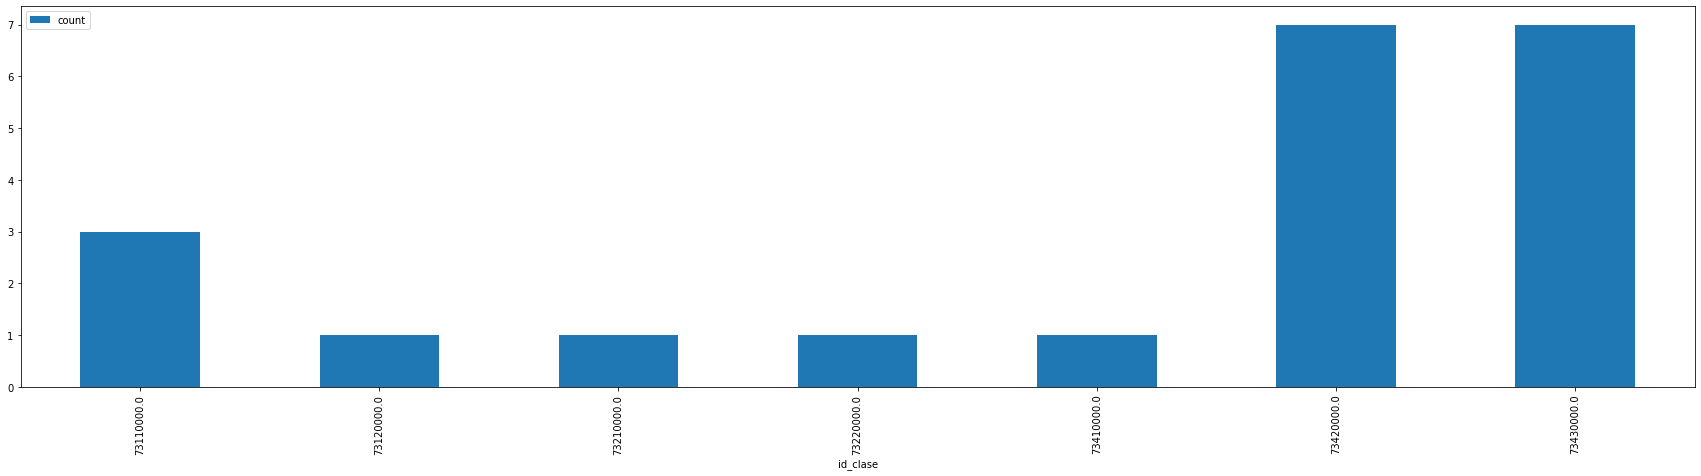

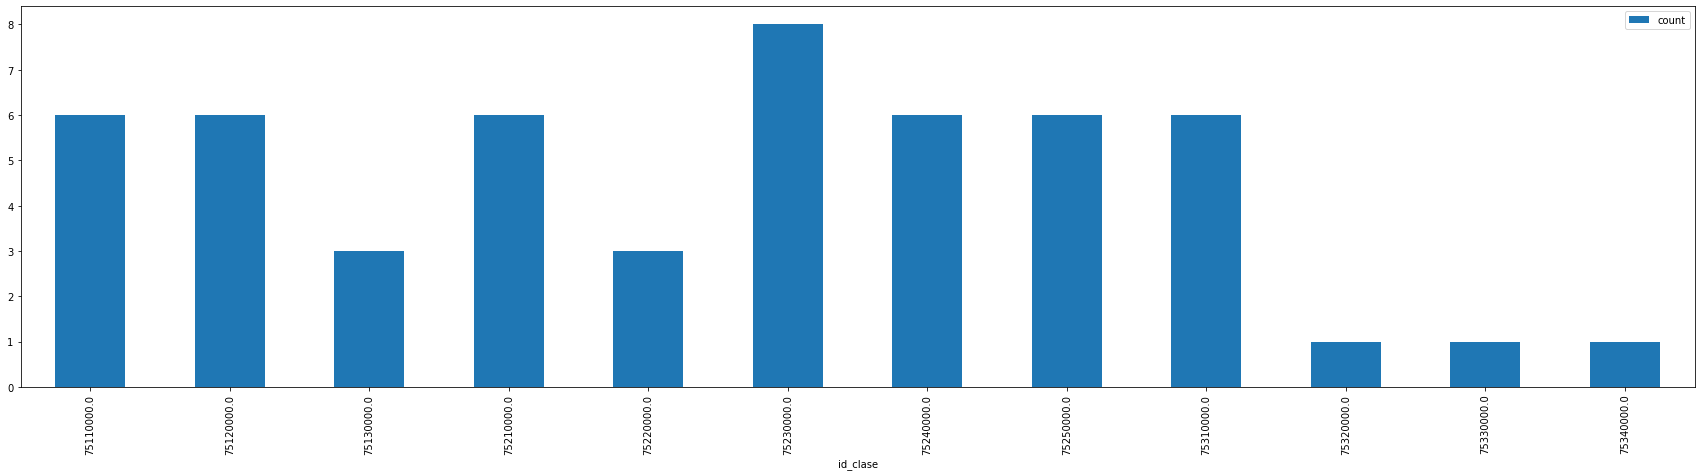

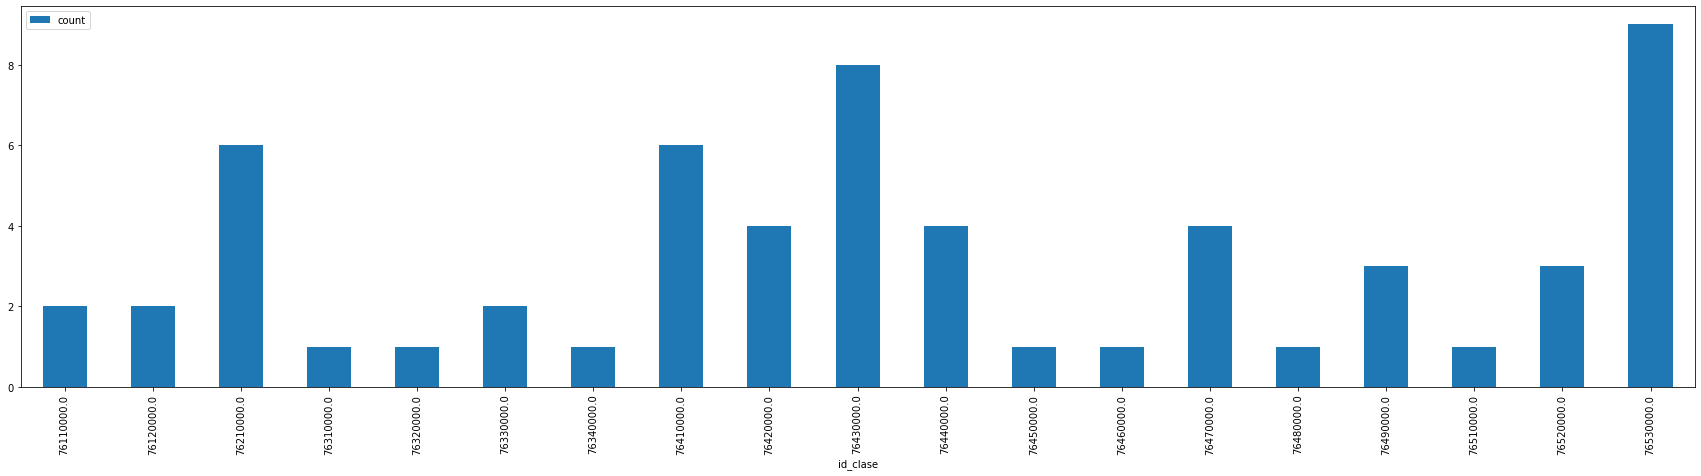

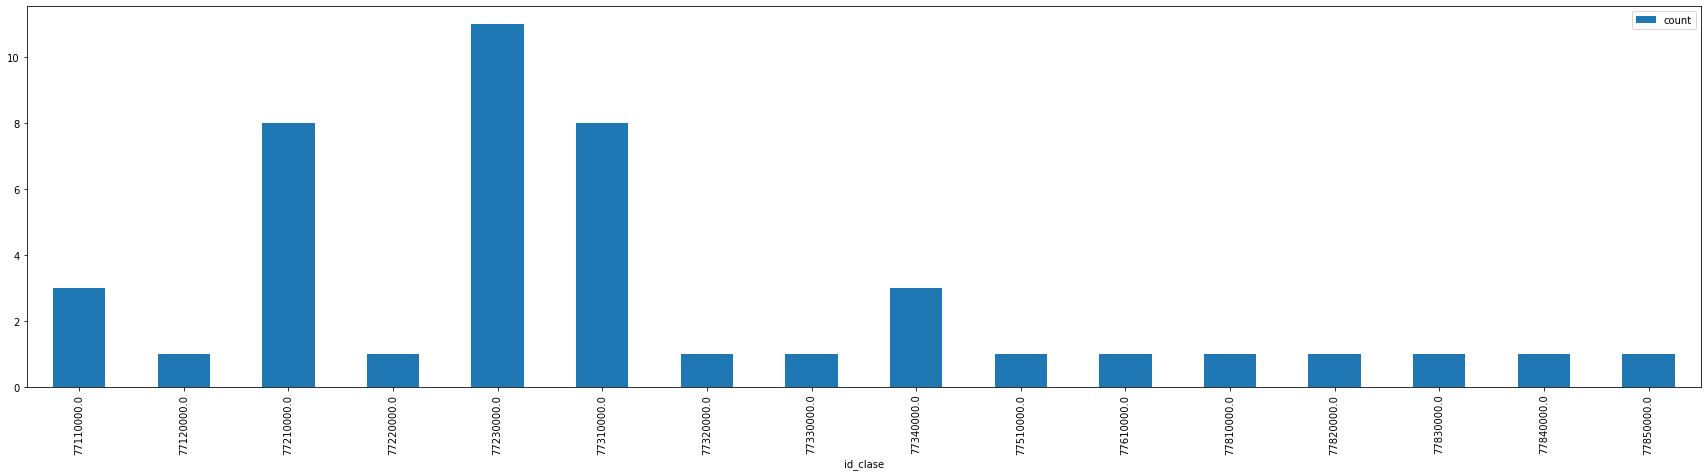

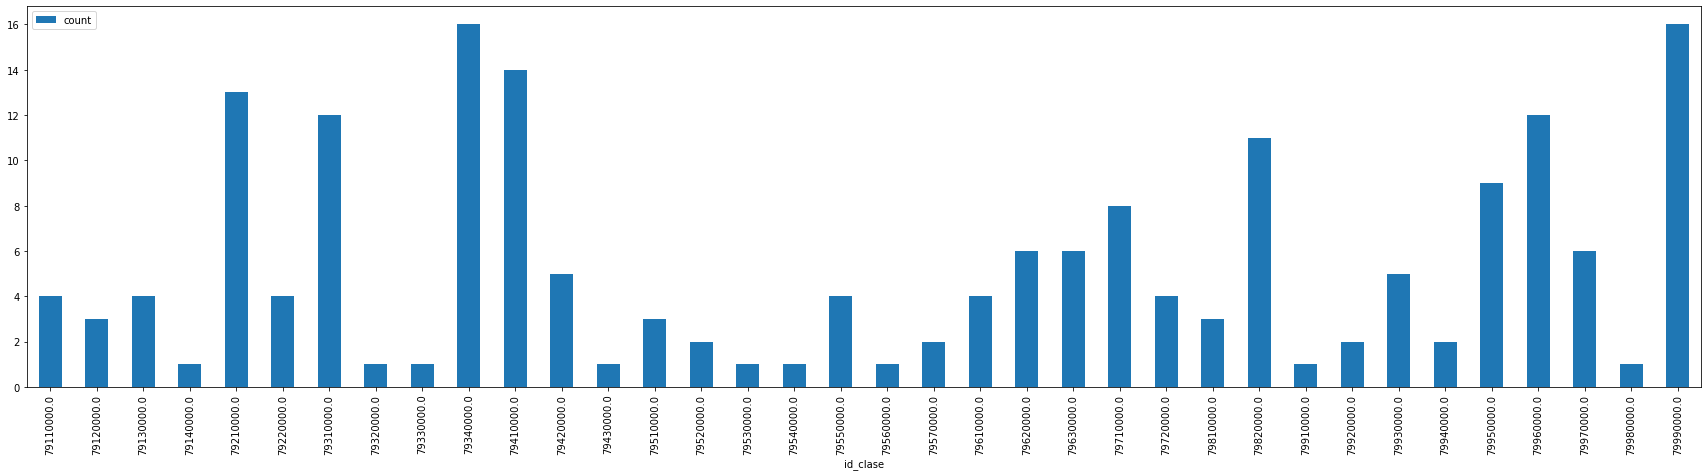

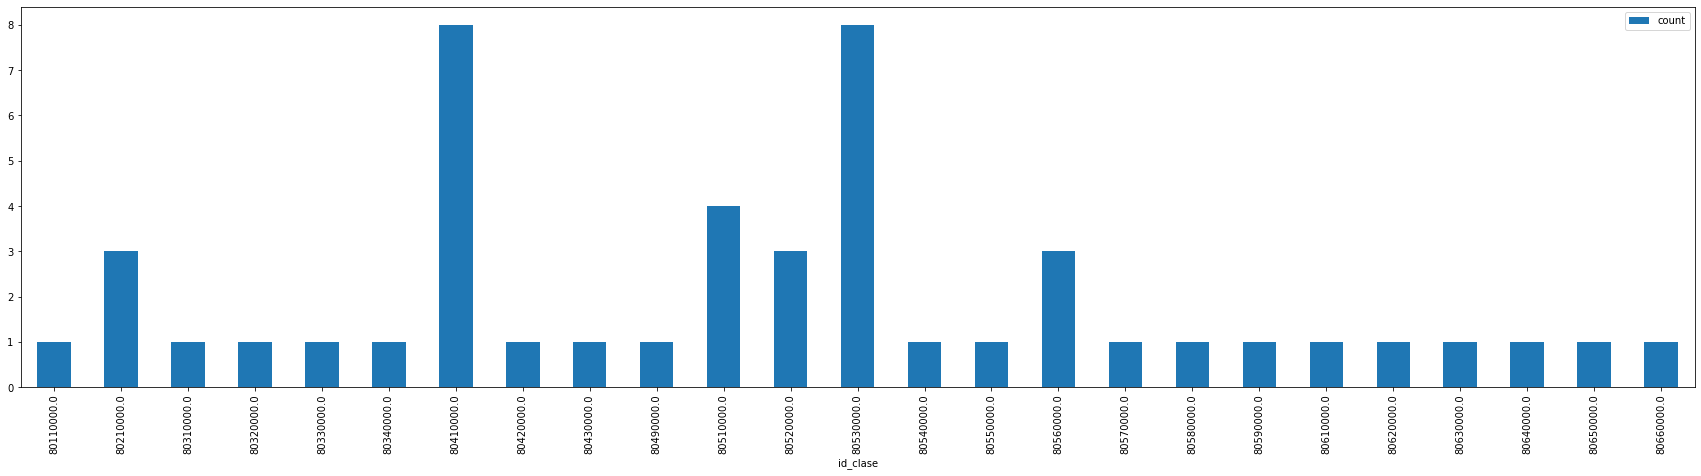

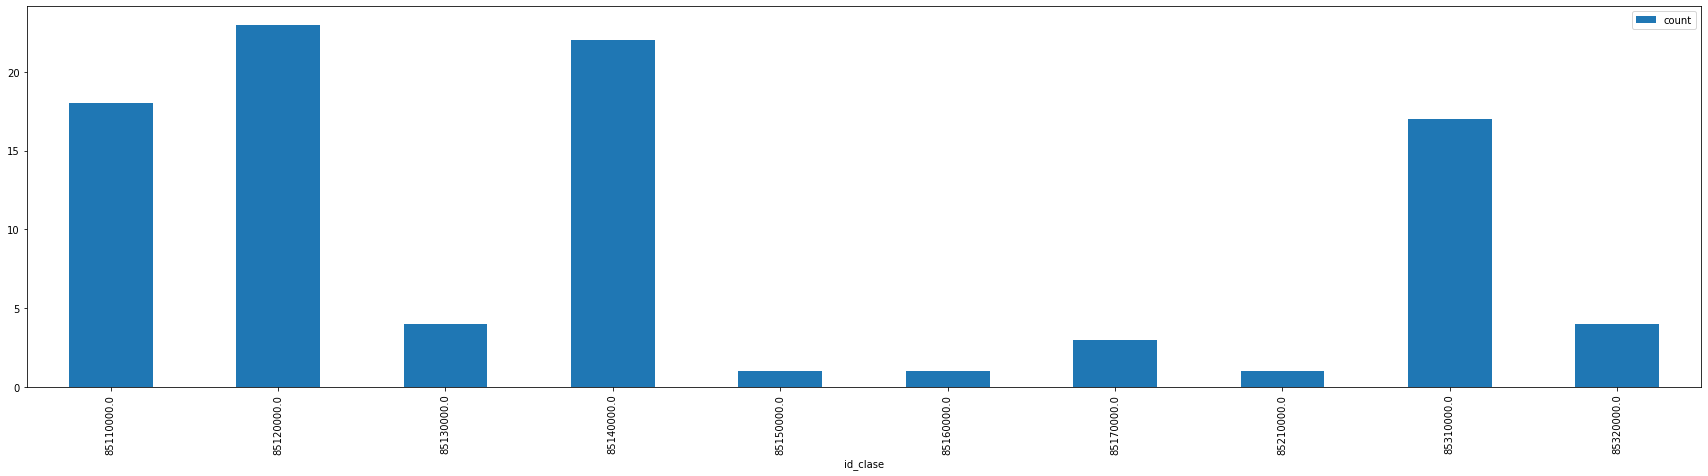

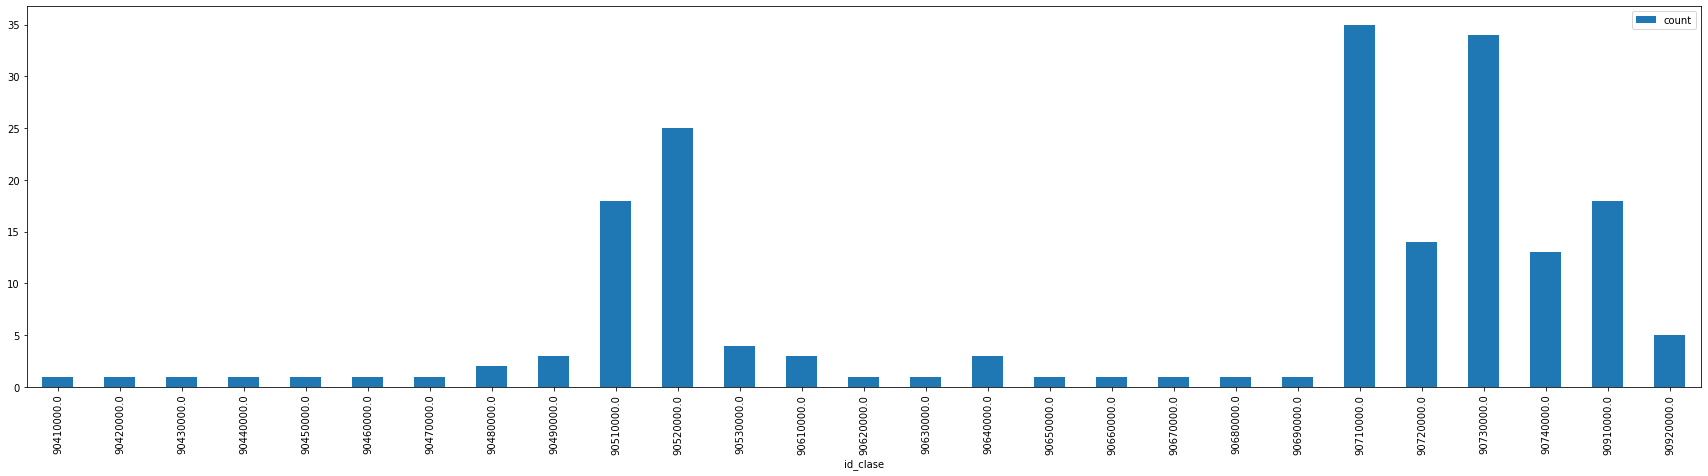

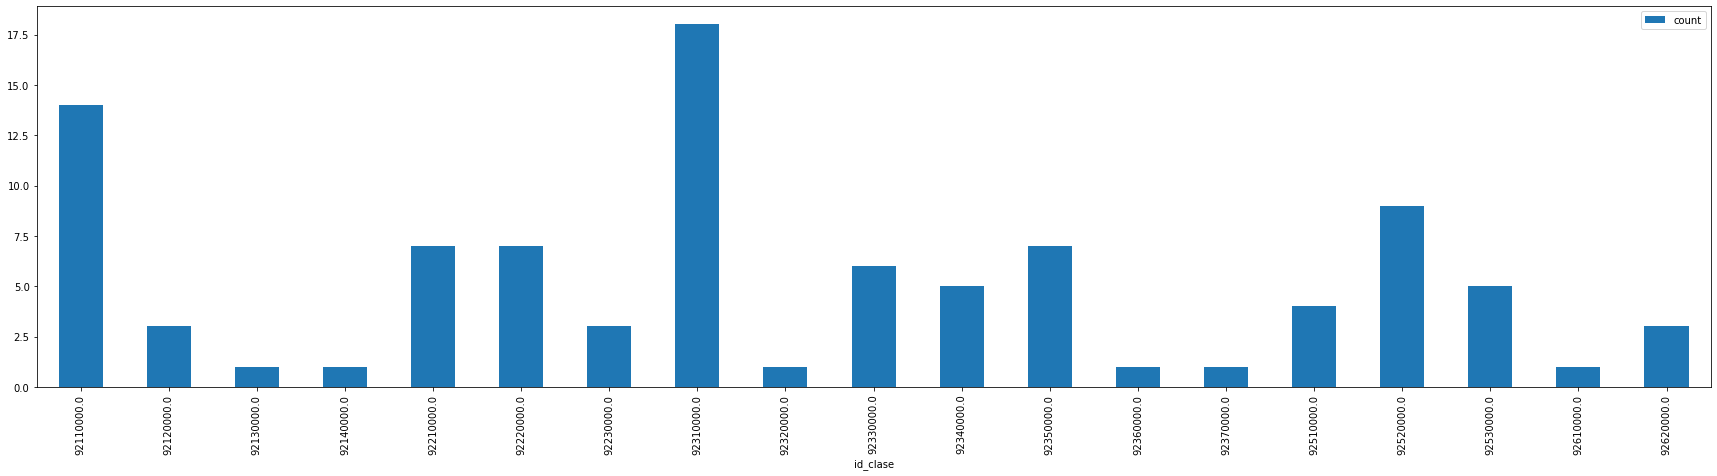

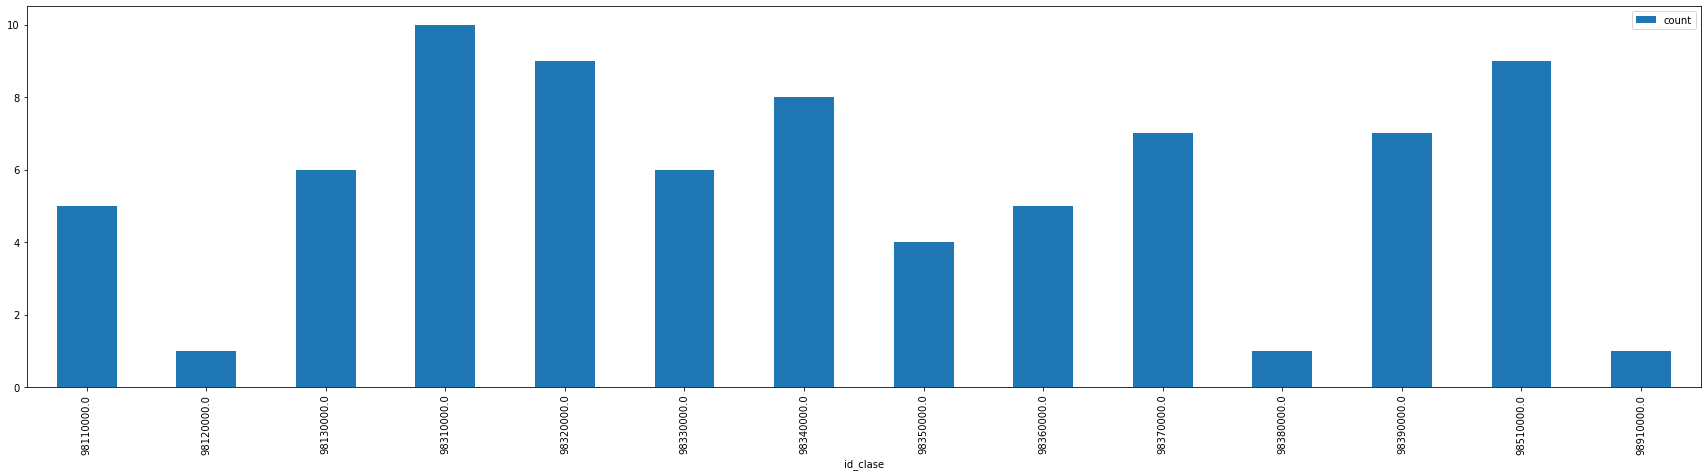

In [ ]:
#¿Cuántos cpvs hay por clase?
cpvs.groupby(['id_division', 'id_grupo', 'id_clase' ]).size().reset_index(name='count').groupby(['id_division']).plot(x='id_clase', y='count', kind='bar', figsize=(30,7))

In [ ]:
#CATEGORIAS
#¿Cuántas categorias distintas hay en la clasificación CPV?
cpvs.groupby(['id_categoria'])['id_categoria'].unique().count()

2385

In [ ]:
#¿Cuántas categorias hay por división?
cpvs.groupby(['id_division', 'id_grupo', 'id_clase', 'id_categoria']).size().reset_index(name='count').groupby(['id_division']).count().mean()

id_grupo        54.204545
id_clase        54.204545
id_categoria    54.204545
count           54.204545
dtype: float64

In [ ]:
#¿Cuántas categorias hay por división?
cpvs.groupby(['id_division', 'id_grupo', 'id_clase', 'id_categoria']).size().reset_index(name='count').groupby(['id_division']).count()['count']

id_division
3000000      47
9000000      26
14000000     61
15000000    111
16000000      7
18000000     86
19000000     41
22000000     51
24000000     59
30000000     52
31000000     78
32000000     74
33000000    162
34000000    105
35000000     50
37000000     54
38000000    115
39000000    104
42000000    126
43000000     45
44000000     94
45000000     66
48000000    117
50000000     67
51000000     44
55000000     14
60000000     18
63000000     27
64000000     22
65000000      4
66000000     29
70000000     11
71000000     49
72000000     57
73000000     14
75000000     20
76000000     26
77000000     11
79000000     89
80000000     17
85000000     20
90000000     44
92000000     35
98000000     36
Name: count, dtype: int64

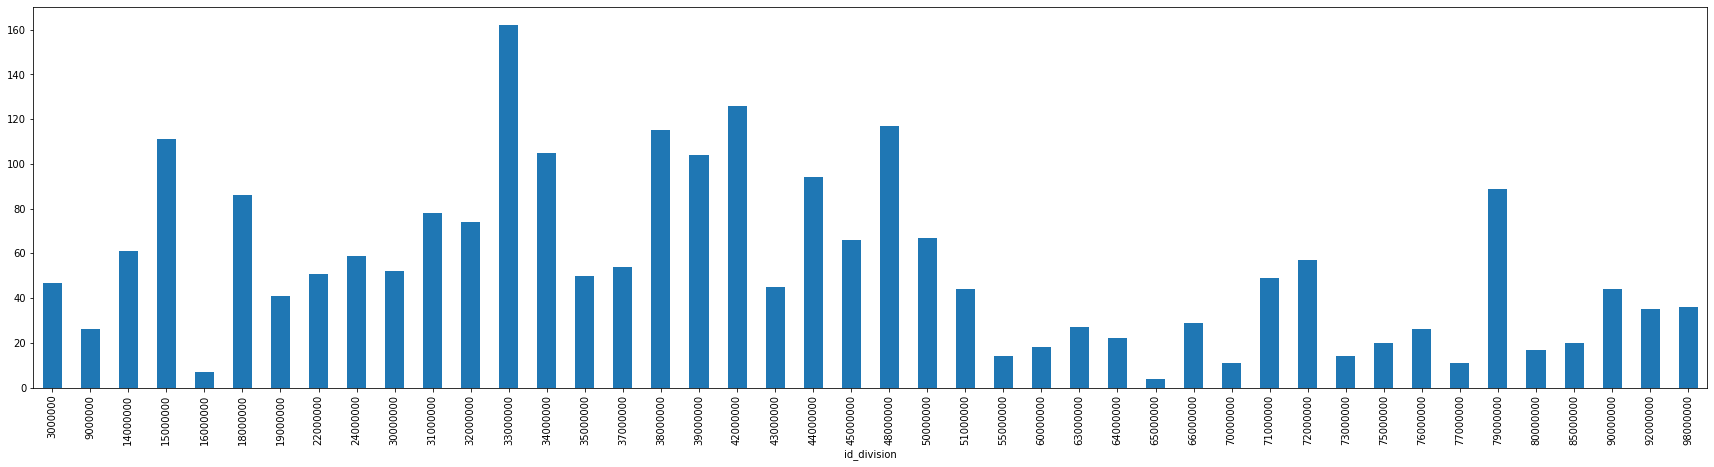

In [ ]:
#¿Cuántas categorias hay por división?
cpvs.groupby(['id_division', 'id_grupo', 'id_clase', 'id_categoria']).size().reset_index(name='count').groupby(['id_division']).count()['count'].plot(kind='bar', figsize=(30,7))

In [5]:
#Licitaciones ES
df = pd.read_csv('/content/drive/MyDrive/TFM/data/export_licitaciones.csv', sep=',', encoding='UTF8')
df.head()

id_cpv  id_division    id_grupo    id_clase  id_categoria  \
0  32500000     32000000  32500000.0         NaN           NaN   
1  65310000     65000000  65300000.0  65310000.0           NaN   
2  92112000     92000000  92100000.0  92110000.0    92112000.0   
3   9122110      9000000   9100000.0   9120000.0     9122000.0   
4  75000000     75000000         NaN         NaN           NaN   

                                              objeto  
0      Adquisición de repuestos para el ILS AMS 2100  
1  Suministro de energía eléctrica en el Centro d...  
2  Servicio de duplicado de copias de películas, ...  
3                      Gas Licuado Propano 2013/2014  
4  Servicio de vigilancia del Centro Cultural de ...

In [ ]:
#Vemos si tenemos missing values
df.isna().sum()

id_cpv               0
id_division          0
id_grupo         42863
id_clase        104943
id_categoria    193597
objeto               0
dtype: int64

In [ ]:
df.isnull().sum()

id_cpv               0
id_division          0
id_grupo         42863
id_clase        104943
id_categoria    193597
objeto               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387395 entries, 0 to 387394
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_cpv        387395 non-null  int64  
 1   id_division   387395 non-null  int64  
 2   id_grupo      344532 non-null  float64
 3   id_clase      282452 non-null  float64
 4   id_categoria  193798 non-null  float64
 5   objeto        387395 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 17.7+ MB


In [ ]:
#DIVISION
#¿Cuántas licitaciones hay por división?
df.groupby(['id_division']).count()['objeto']

id_division
3000000      3209
9000000      7625
14000000     1011
15000000     4087
16000000      572
18000000     3764
19000000      527
22000000     2713
24000000     2345
30000000     9441
31000000     5069
32000000     3945
33000000    20353
34000000    17070
35000000     5019
37000000     1466
38000000     6617
39000000     6631
41000000      151
42000000     5446
43000000      750
44000000     8232
45000000    65291
48000000     8041
50000000    29690
51000000      897
55000000     9725
60000000     8110
63000000     3209
64000000     3330
65000000      627
66000000     6733
70000000     3344
71000000    20361
72000000    19245
73000000     2102
75000000     1586
76000000       39
77000000     3693
79000000    26186
80000000     6814
85000000    17497
90000000    15484
92000000    14356
98000000     4992
Name: objeto, dtype: int64

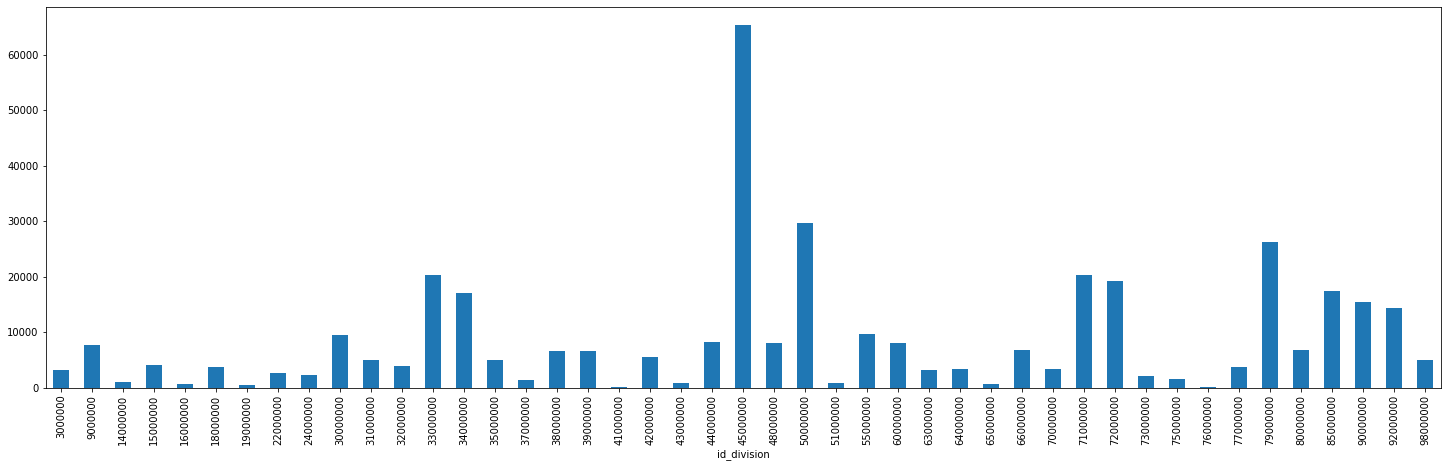

In [ ]:
#¿Cuántas licitaciones hay por división?
df.groupby(['id_division']).count()['objeto'].plot(kind='bar', figsize=(25,7))

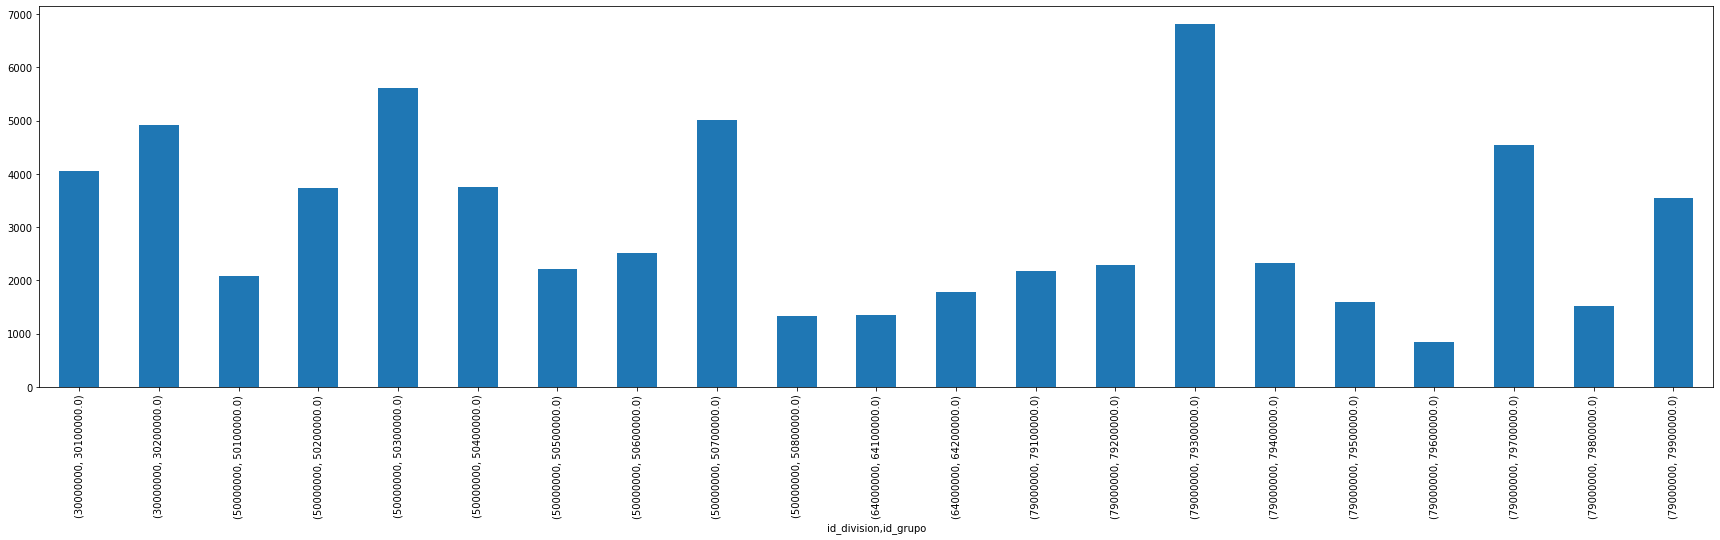

In [15]:
#¿Cuántas licitaciones hay por cada grupo?
df.loc[df['id_division'].isin([30000000, 50000000, 64000000, 79000000])].groupby(['id_division', 'id_grupo']).count()['objeto'].plot(kind='bar', figsize=(30,7))

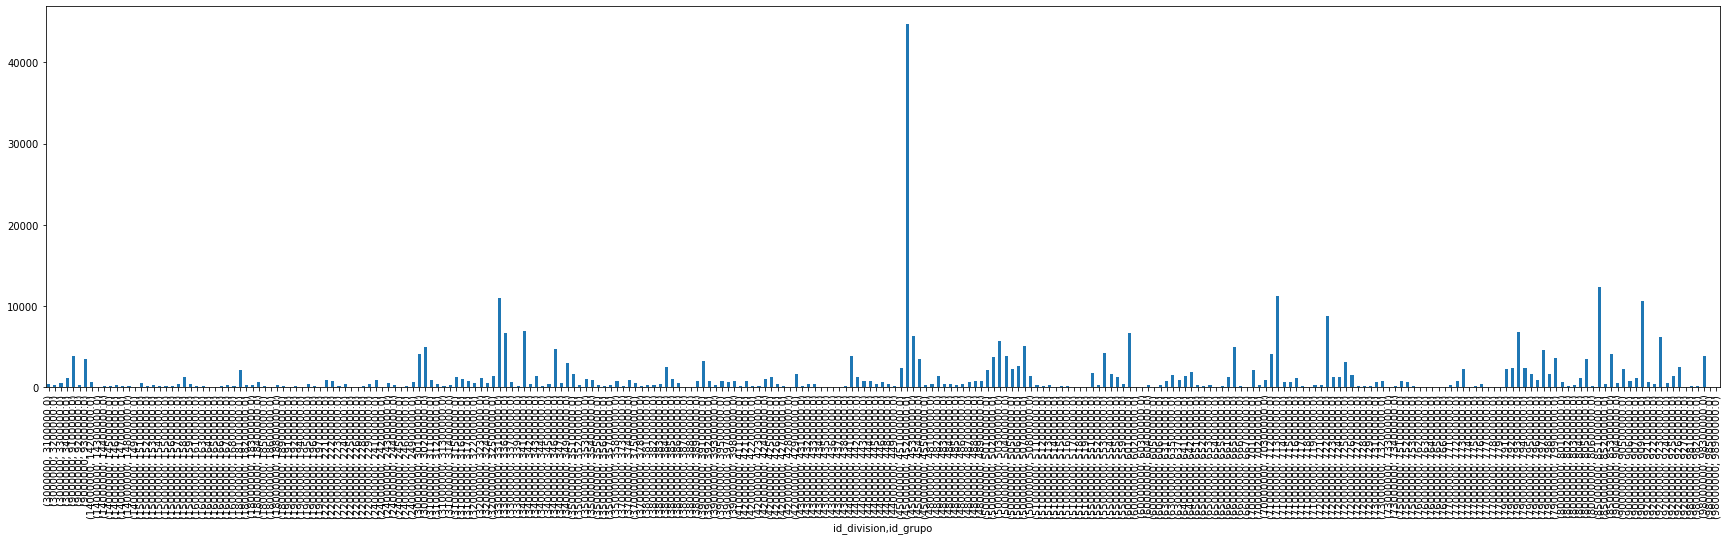

In [ ]:
#¿Cuántas licitaciones hay por cada grupo?
df.groupby(['id_division', 'id_grupo']).count()['objeto'].plot(kind='bar', figsize=(30,7))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


id_division
3000000     AxesSubplot(0.125,0.125;0.775x0.755)
9000000     AxesSubplot(0.125,0.125;0.775x0.755)
14000000    AxesSubplot(0.125,0.125;0.775x0.755)
15000000    AxesSubplot(0.125,0.125;0.775x0.755)
16000000    AxesSubplot(0.125,0.125;0.775x0.755)
18000000    AxesSubplot(0.125,0.125;0.775x0.755)
19000000    AxesSubplot(0.125,0.125;0.775x0.755)
22000000    AxesSubplot(0.125,0.125;0.775x0.755)
24000000    AxesSubplot(0.125,0.125;0.775x0.755)
30000000    AxesSubplot(0.125,0.125;0.775x0.755)
31000000    AxesSubplot(0.125,0.125;0.775x0.755)
32000000    AxesSubplot(0.125,0.125;0.775x0.755)
33000000    AxesSubplot(0.125,0.125;0.775x0.755)
34000000    AxesSubplot(0.125,0.125;0.775x0.755)
35000000    AxesSubplot(0.125,0.125;0.775x0.755)
37000000    AxesSubplot(0.125,0.125;0.775x0.755)
38000000    AxesSubplot(0.125,0.125;0.775x0.755)
39000000    AxesSubplot(0.125,0.125;0.775x0.755)
41000000    AxesSubplot(0.125,0.125;0.775x0.755)
42000000    AxesSubplot(0.125,0.125;0.775x0.755)
43000000

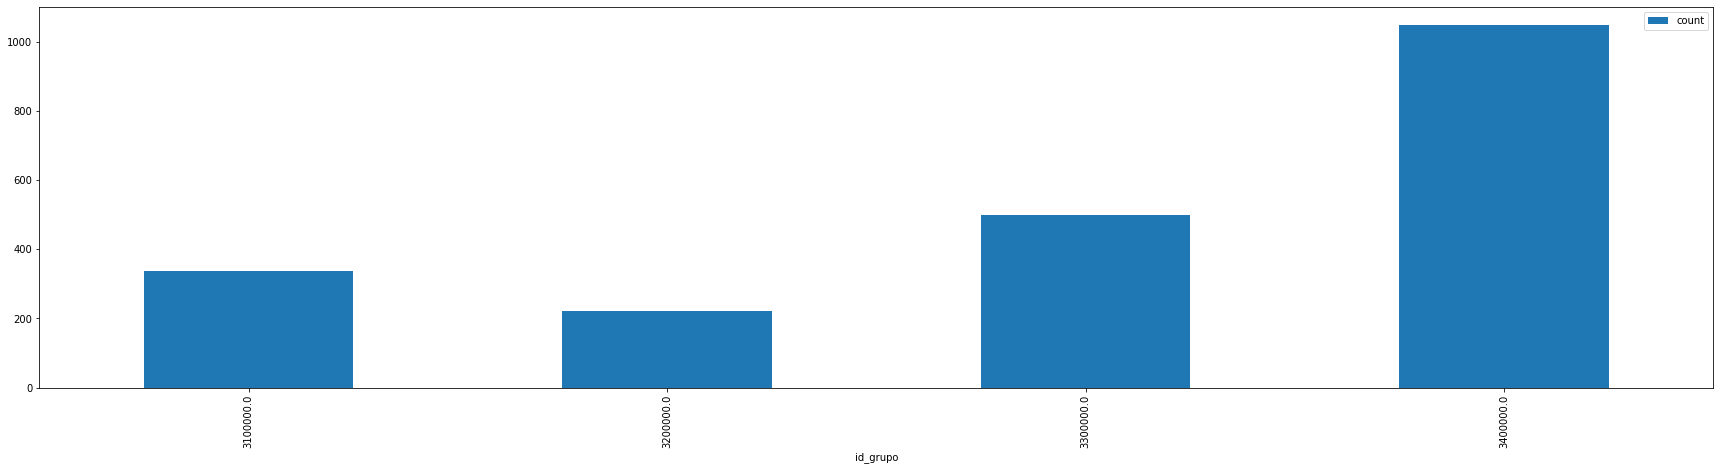

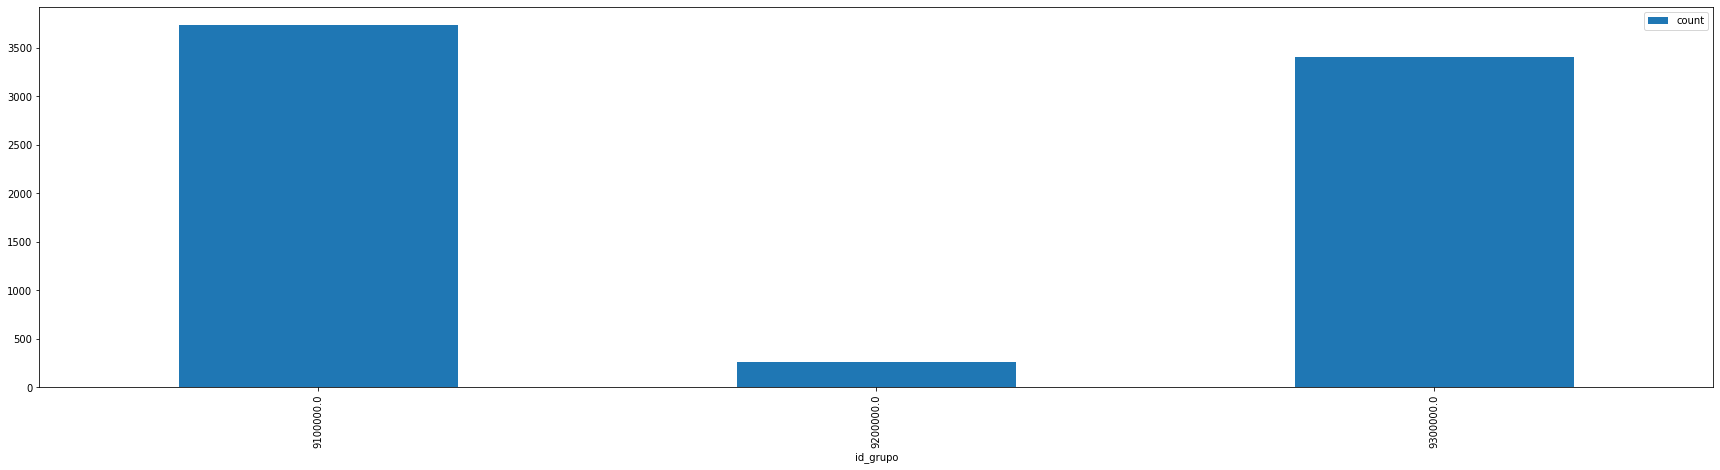

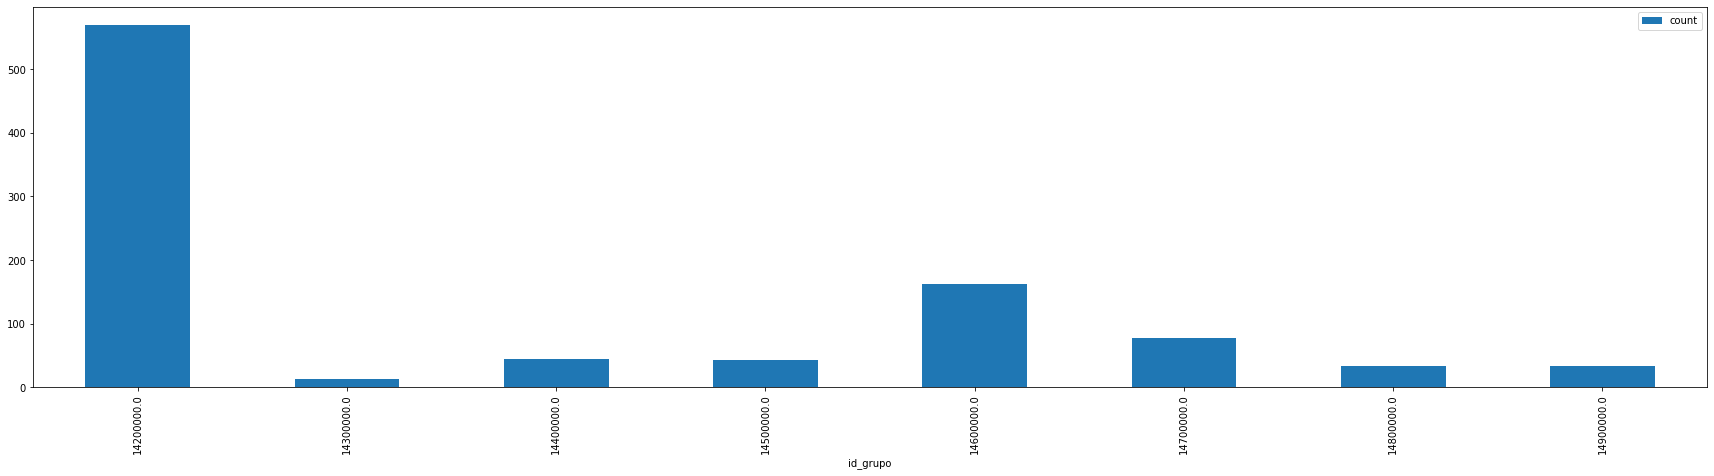

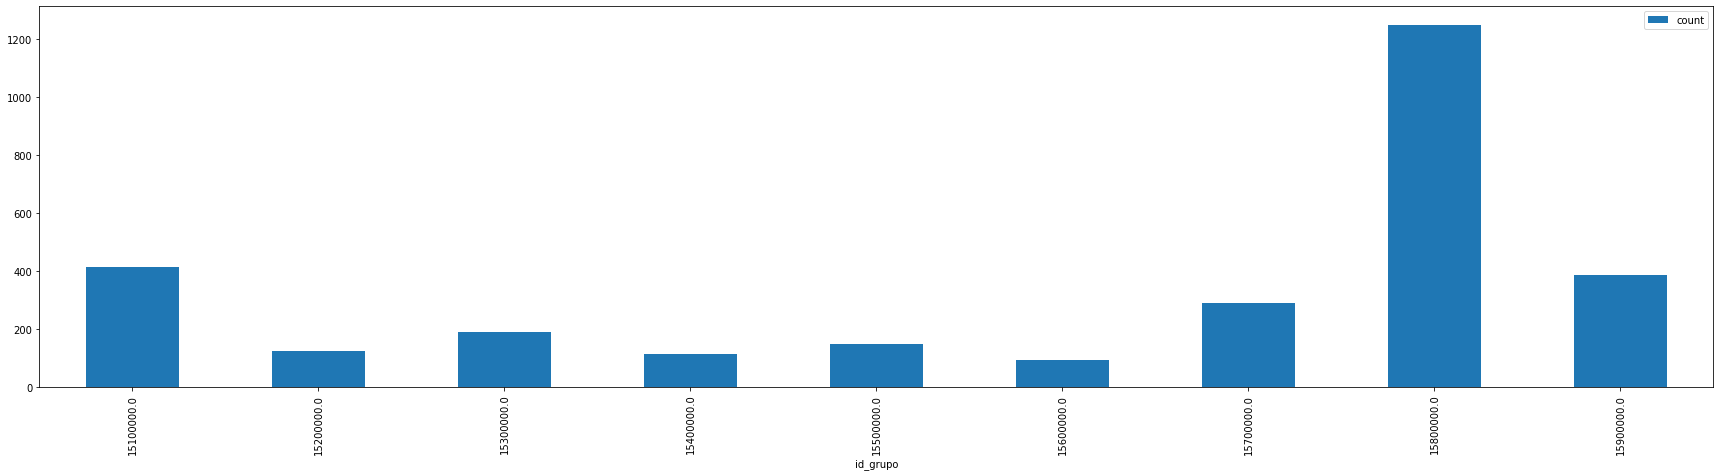

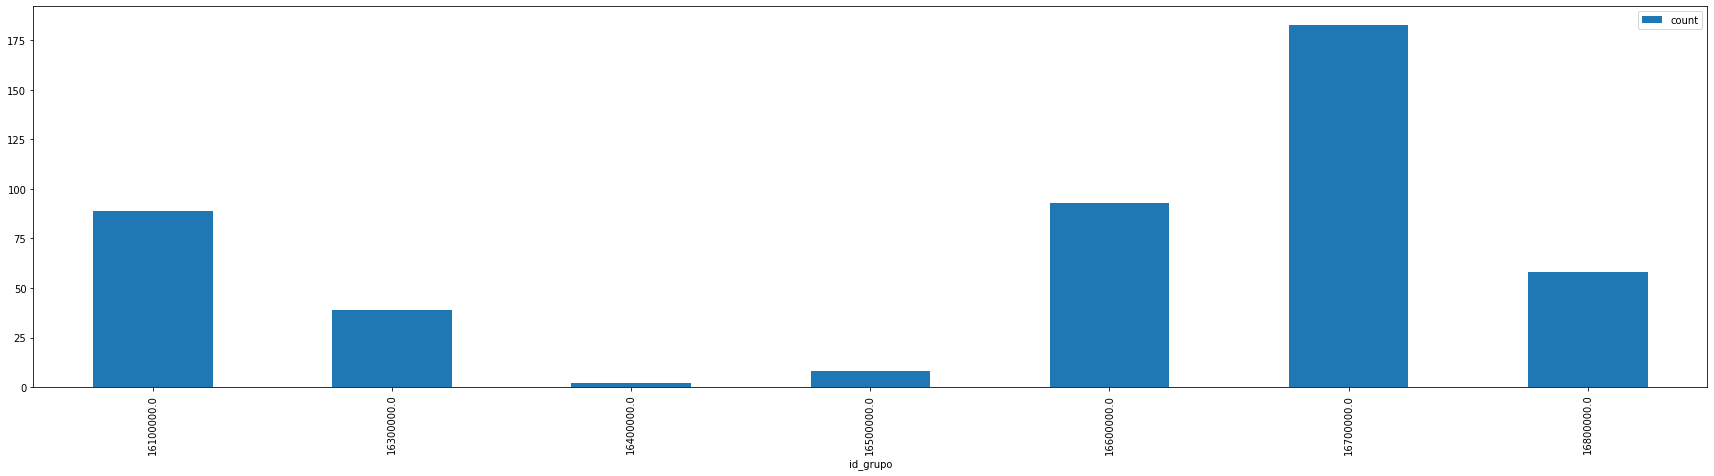

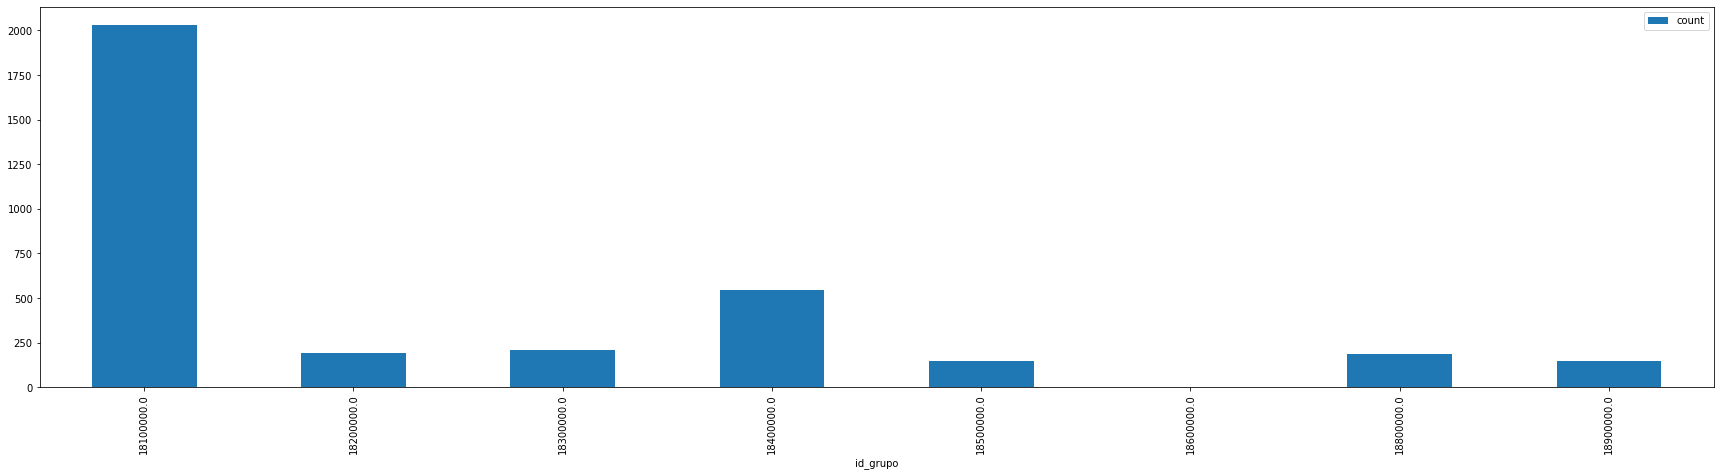

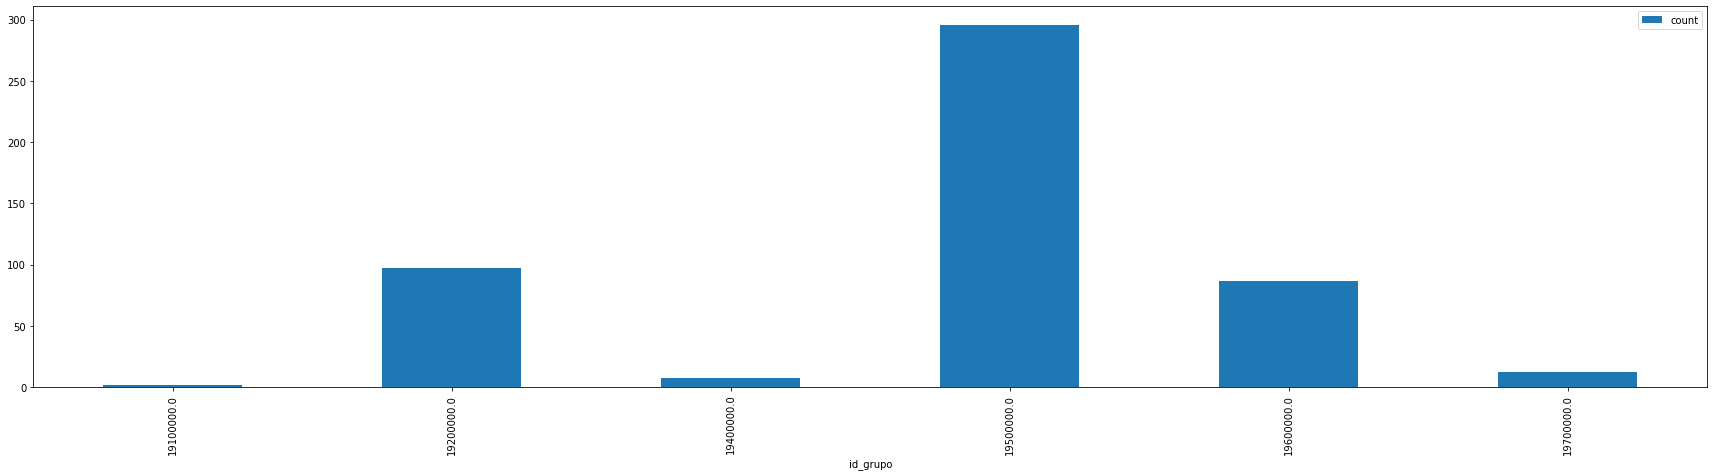

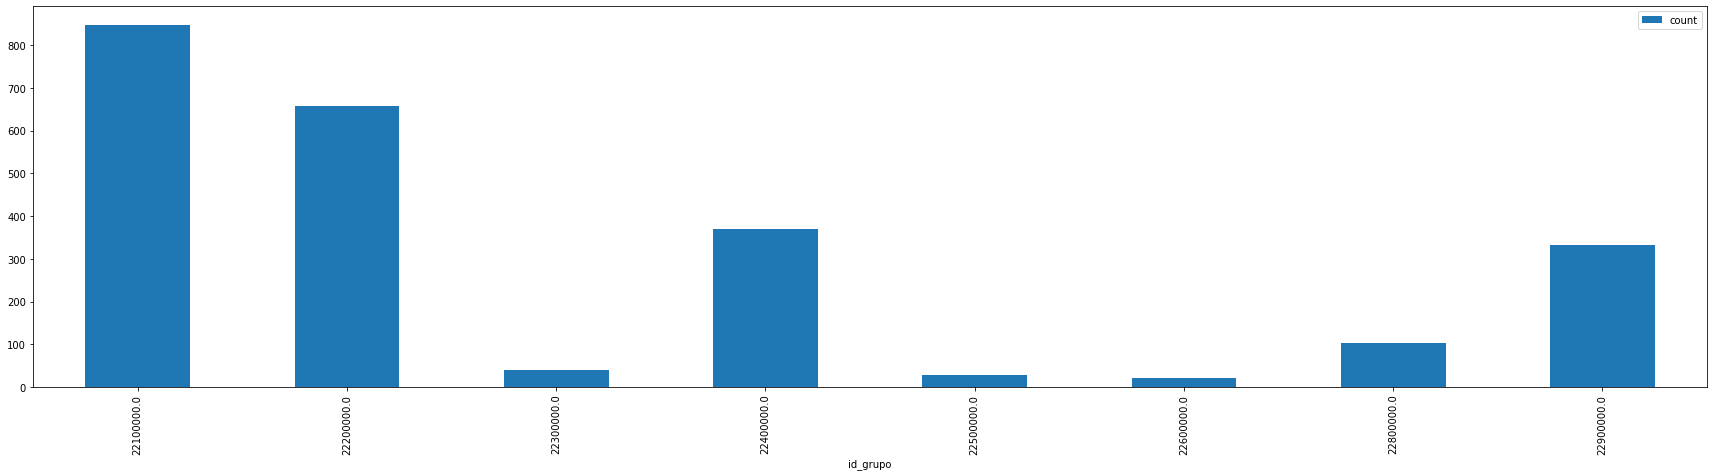

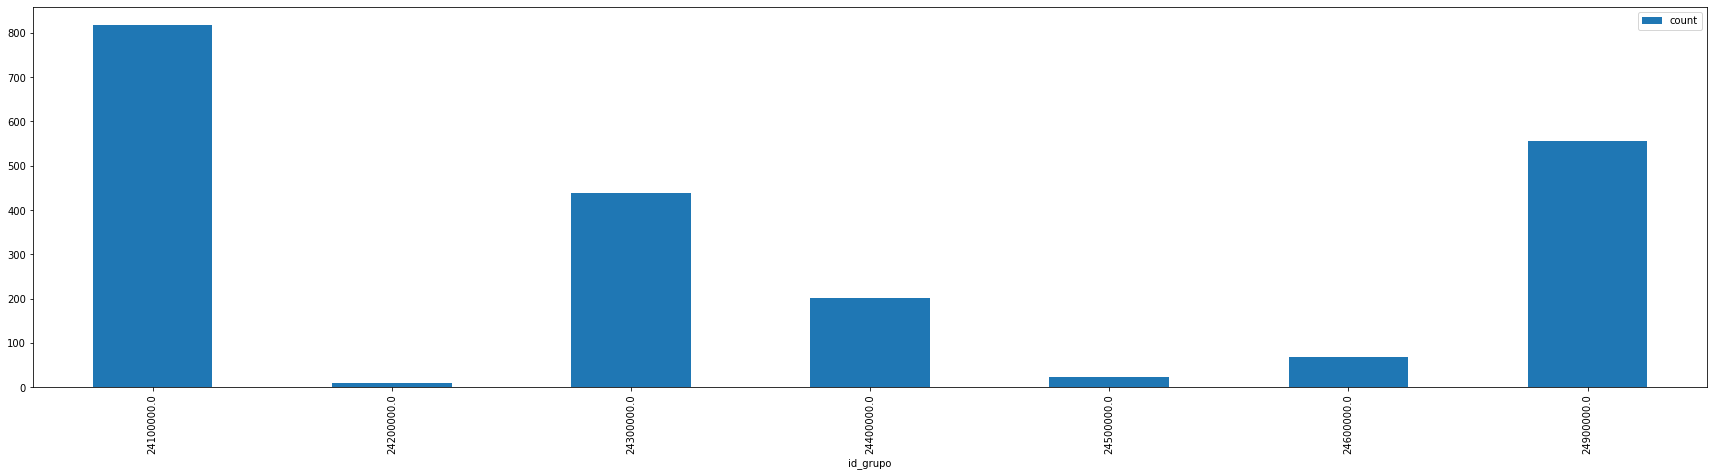

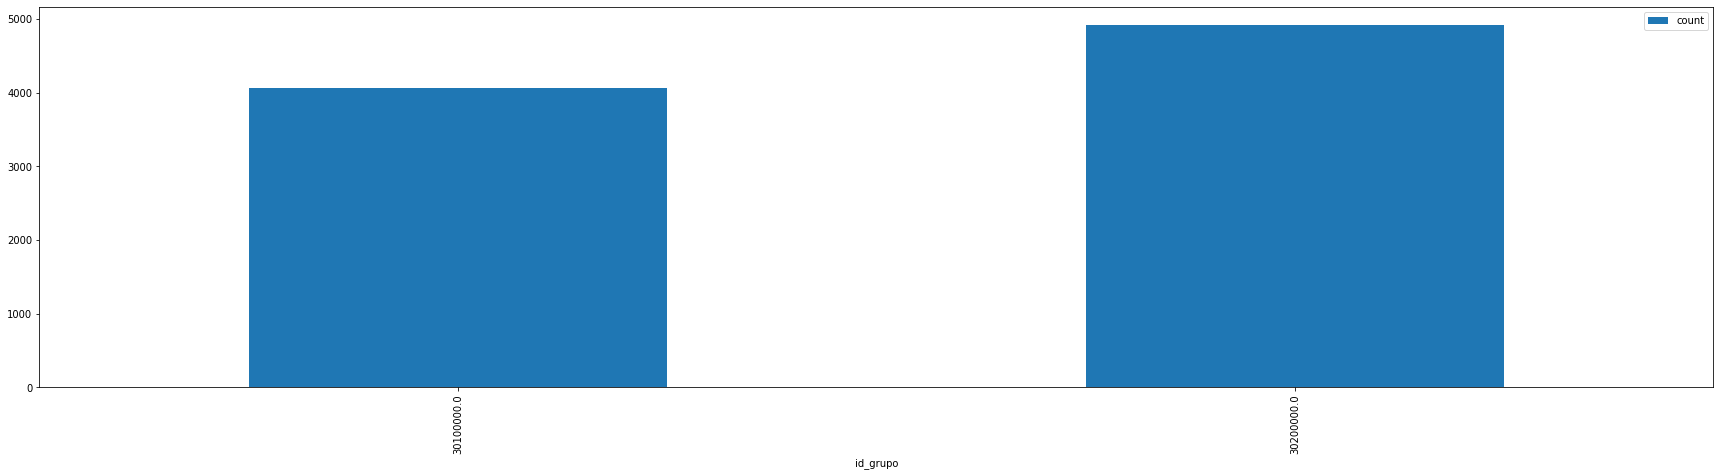

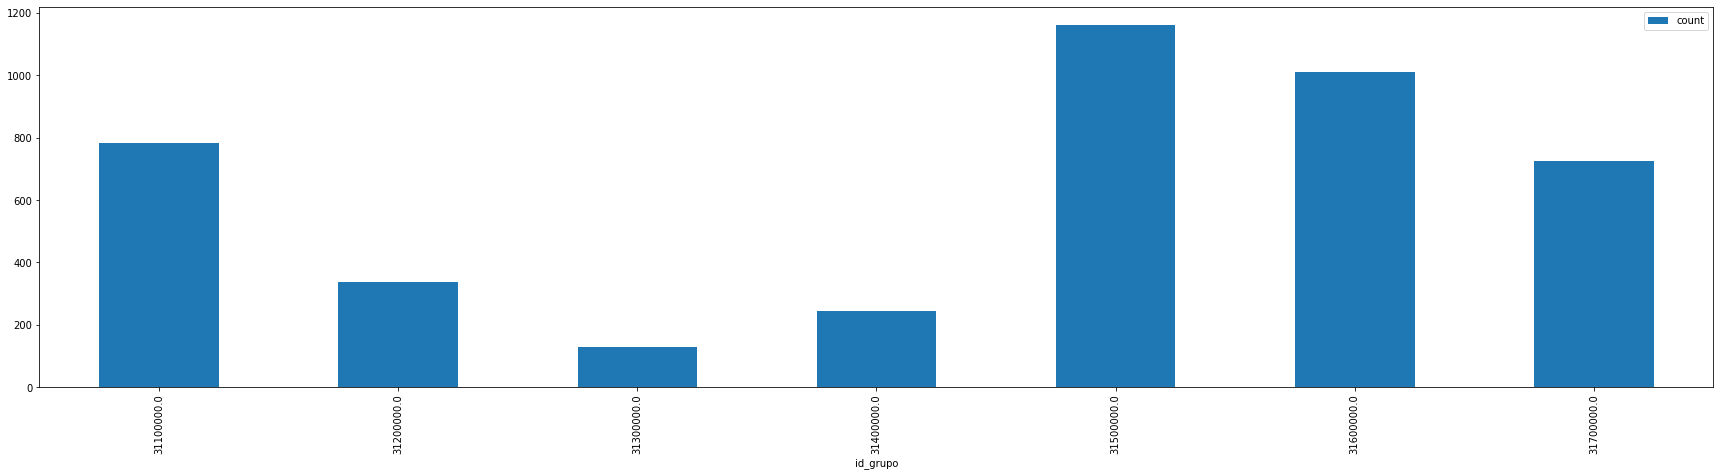

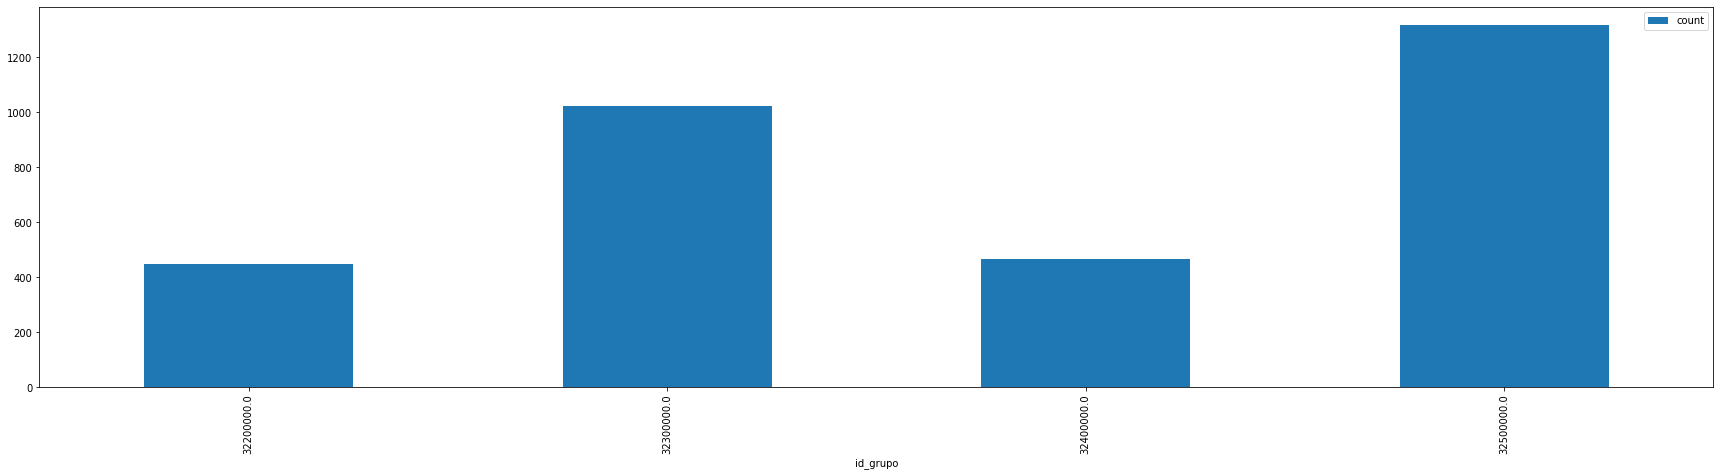

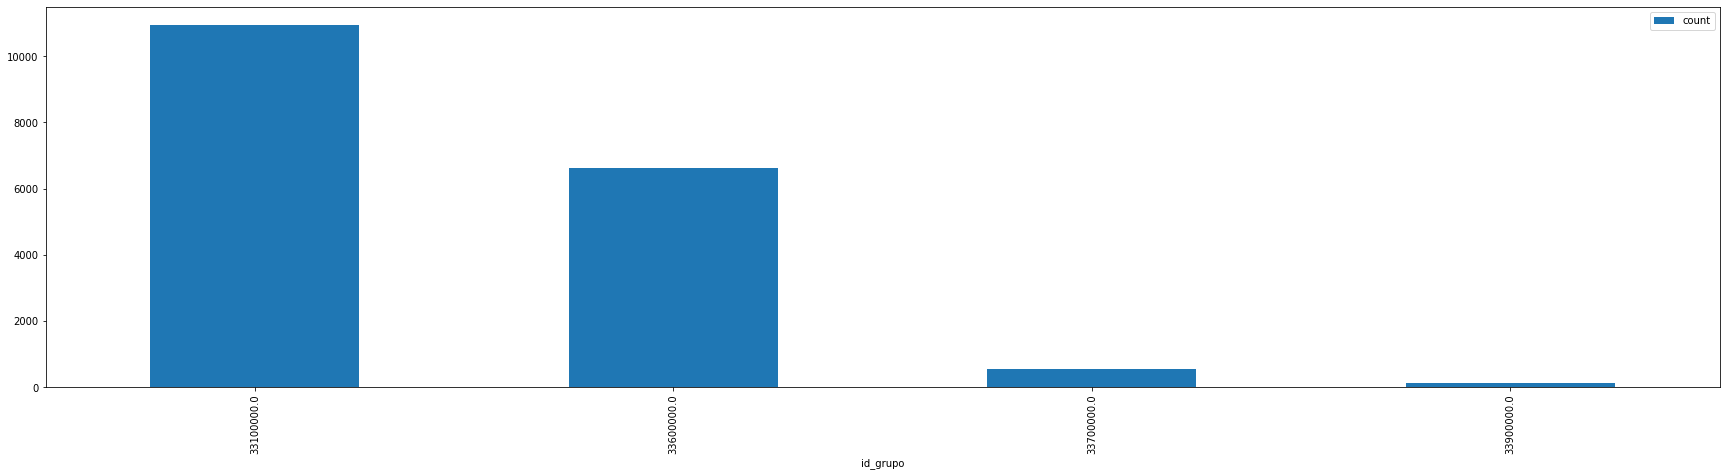

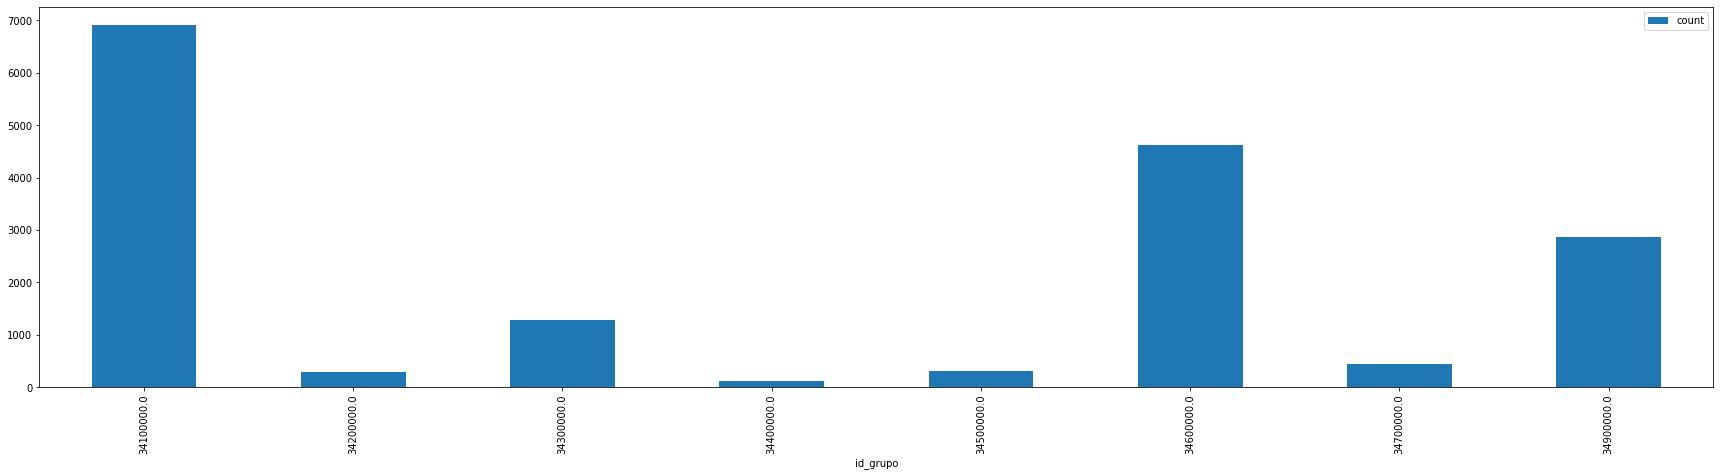

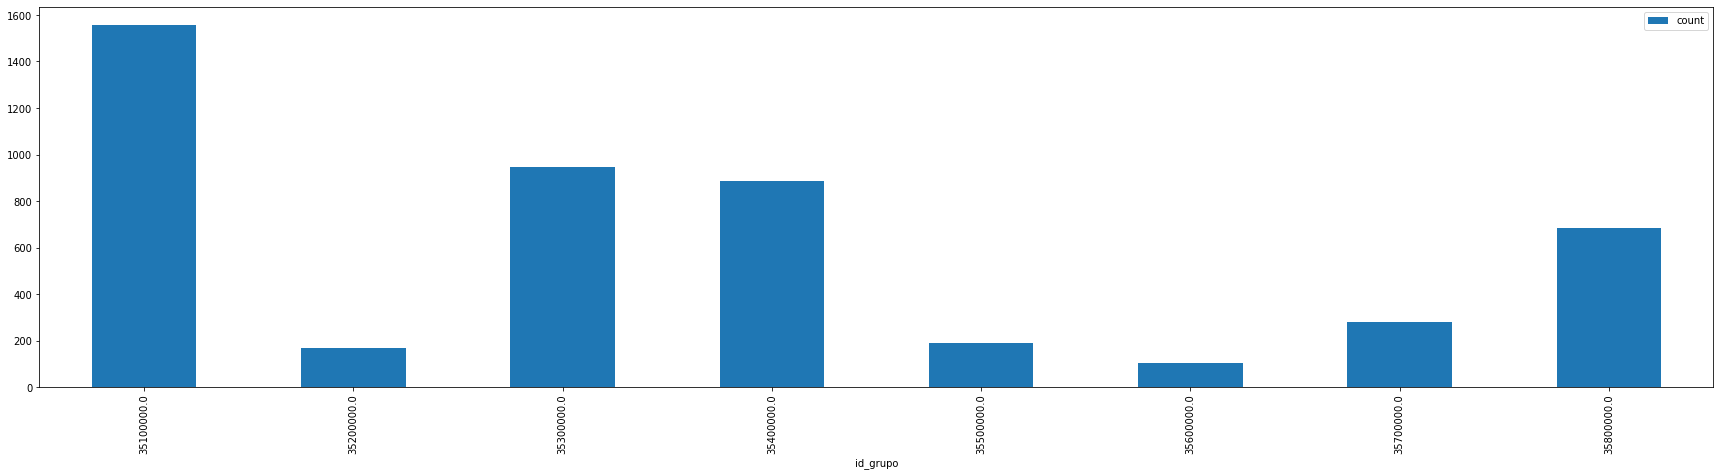

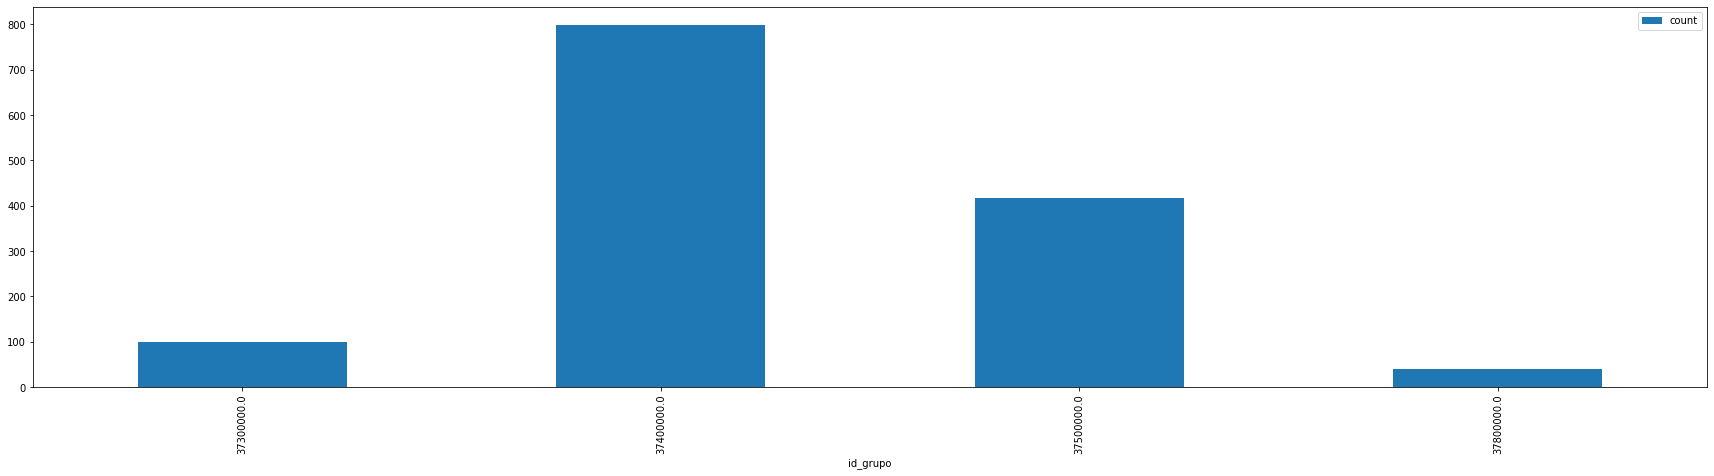

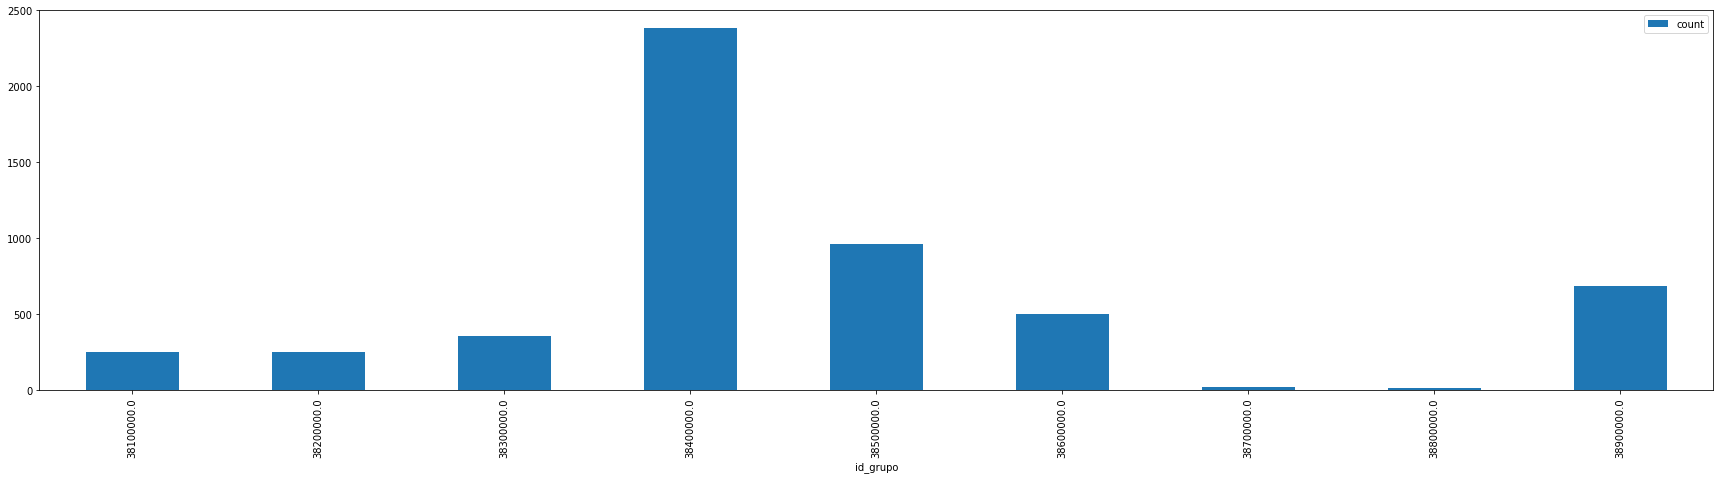

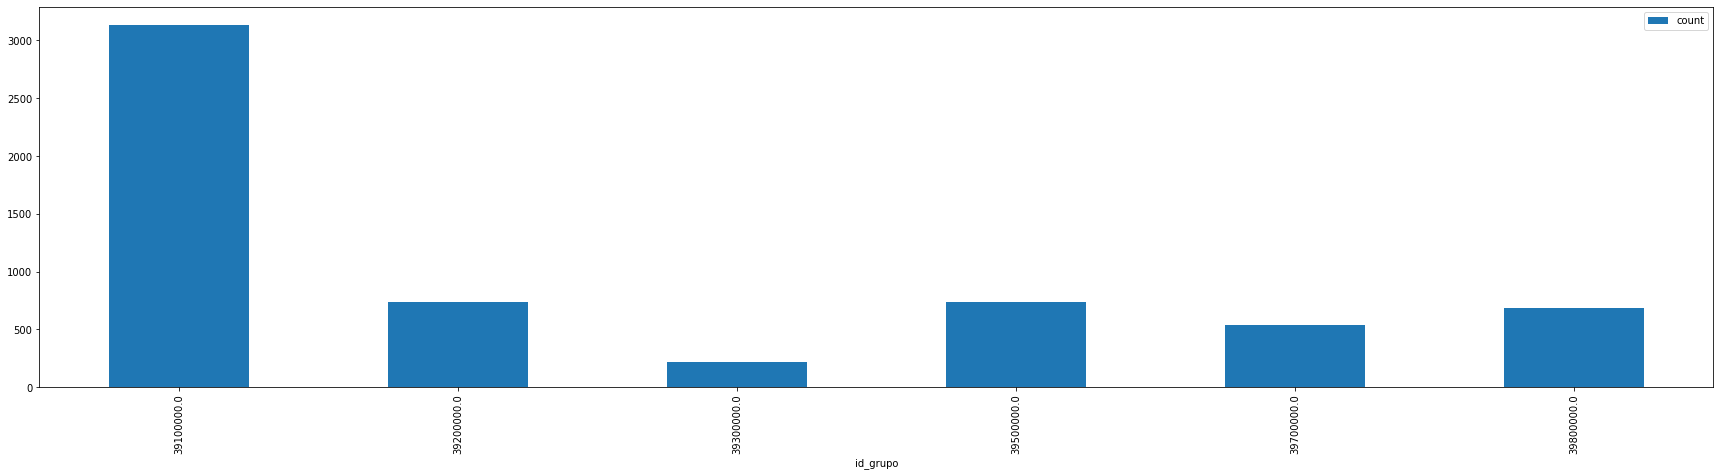

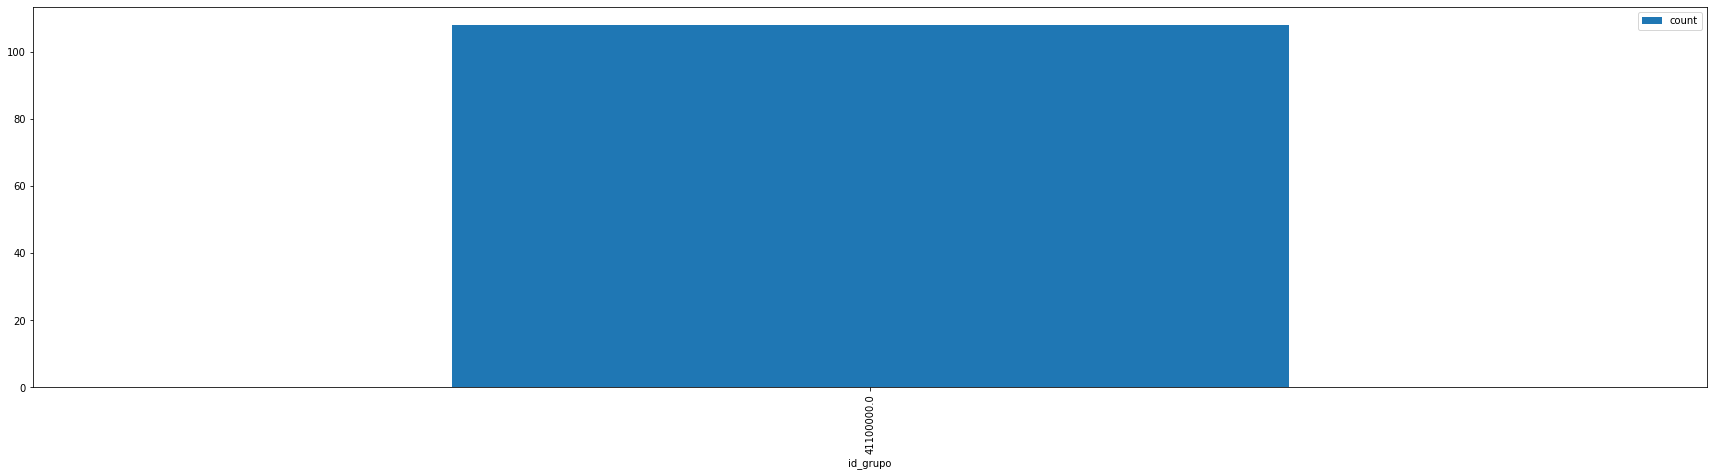

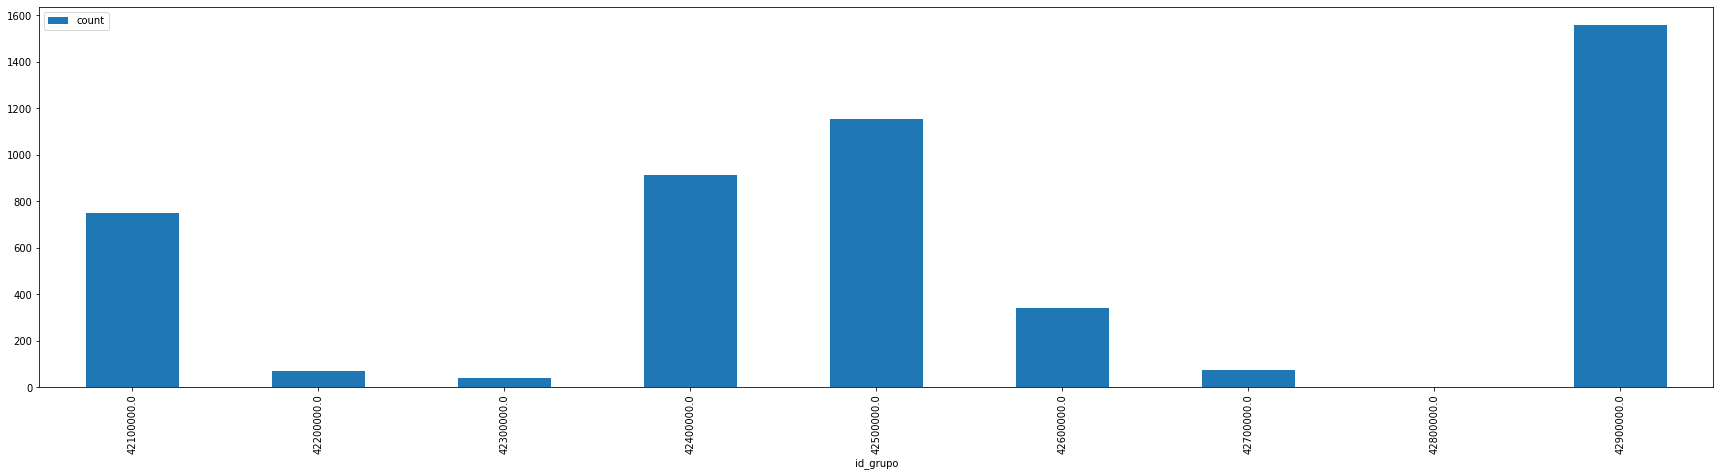

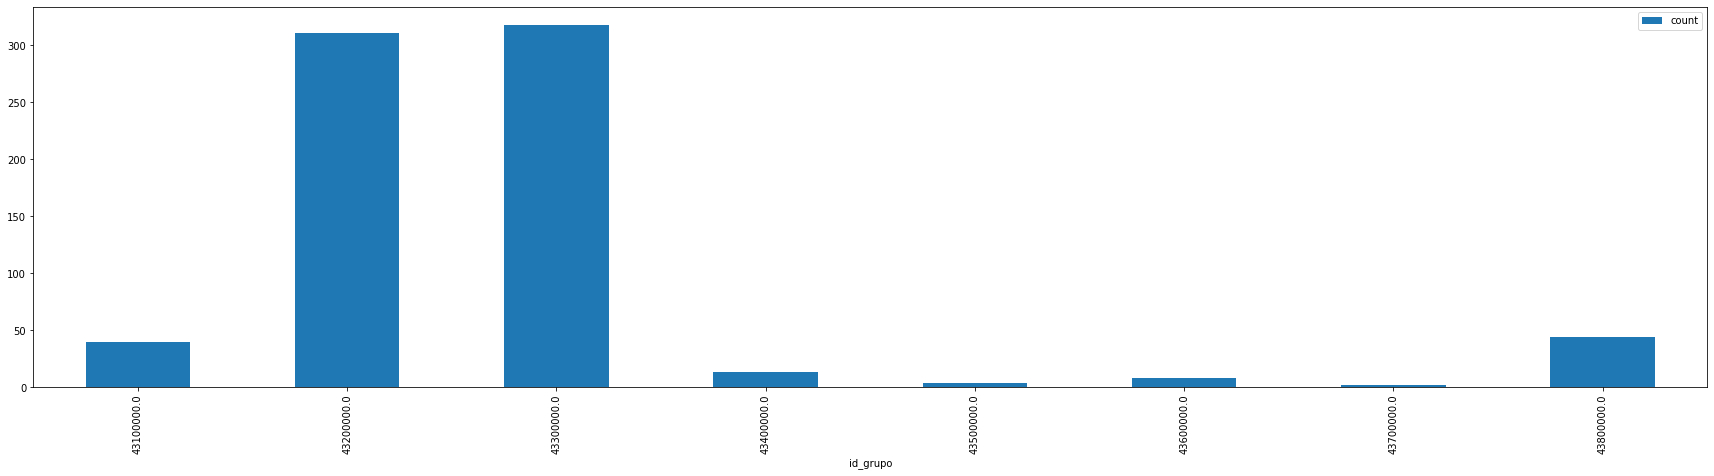

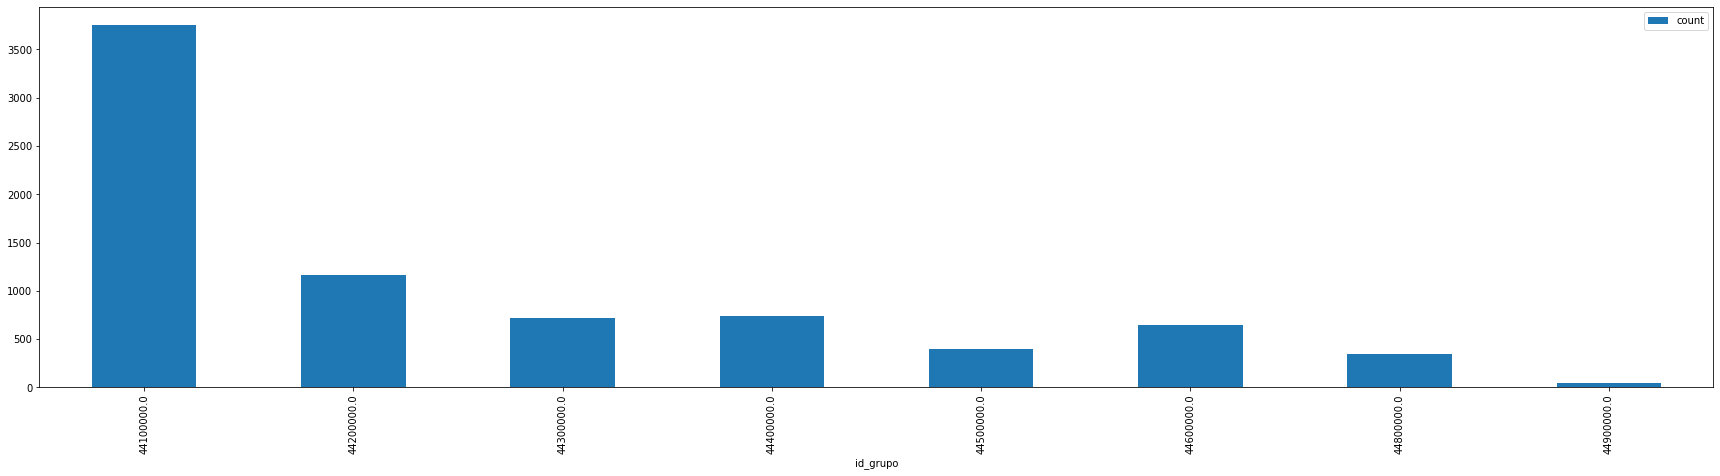

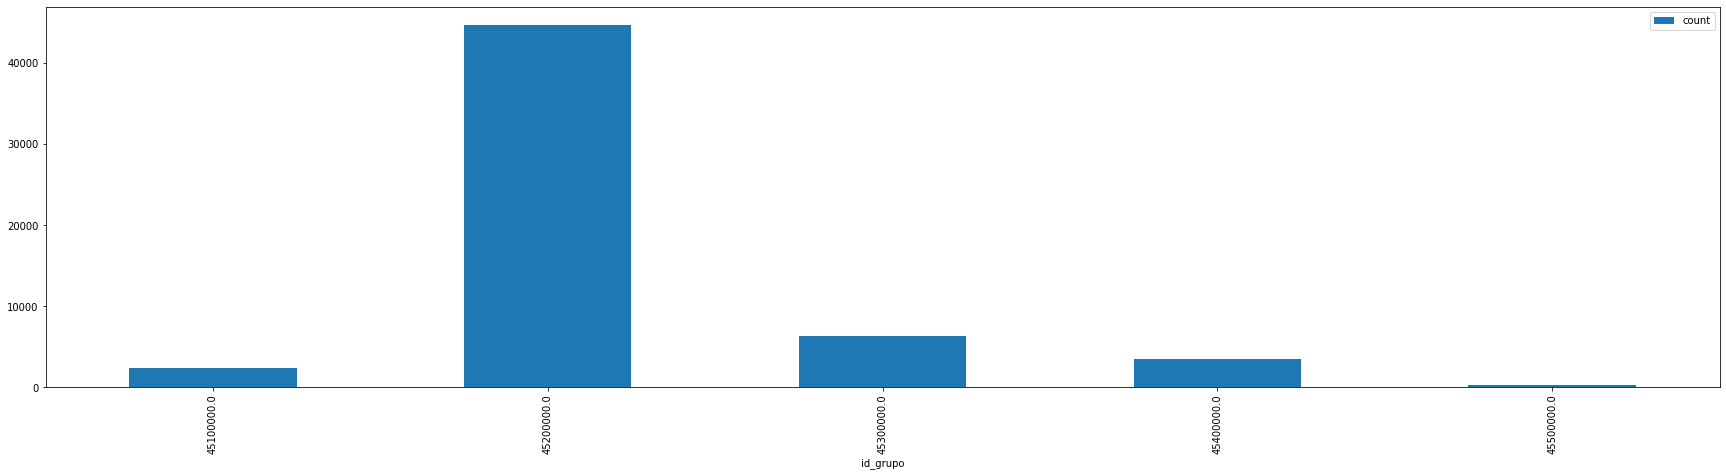

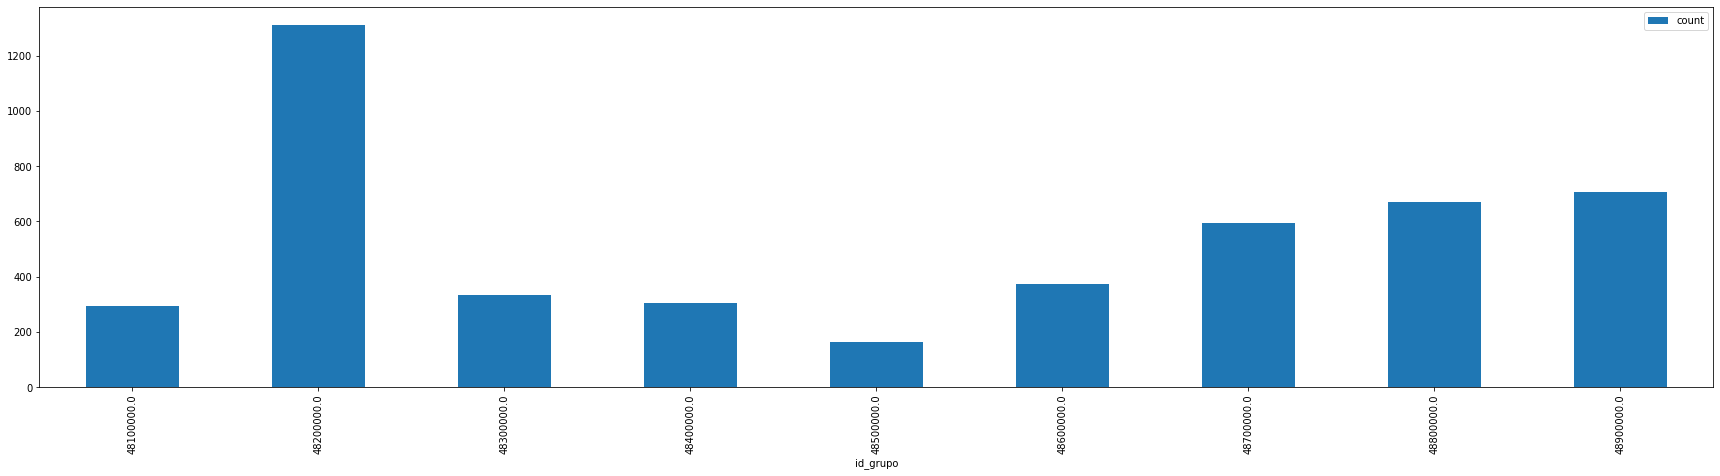

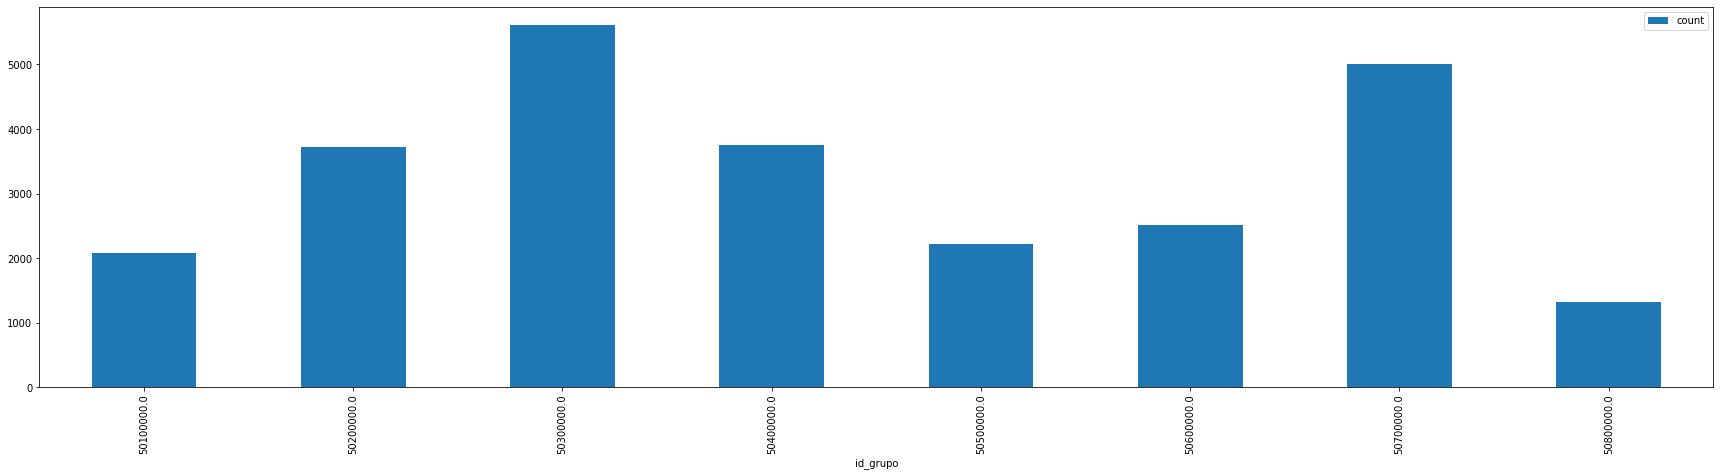

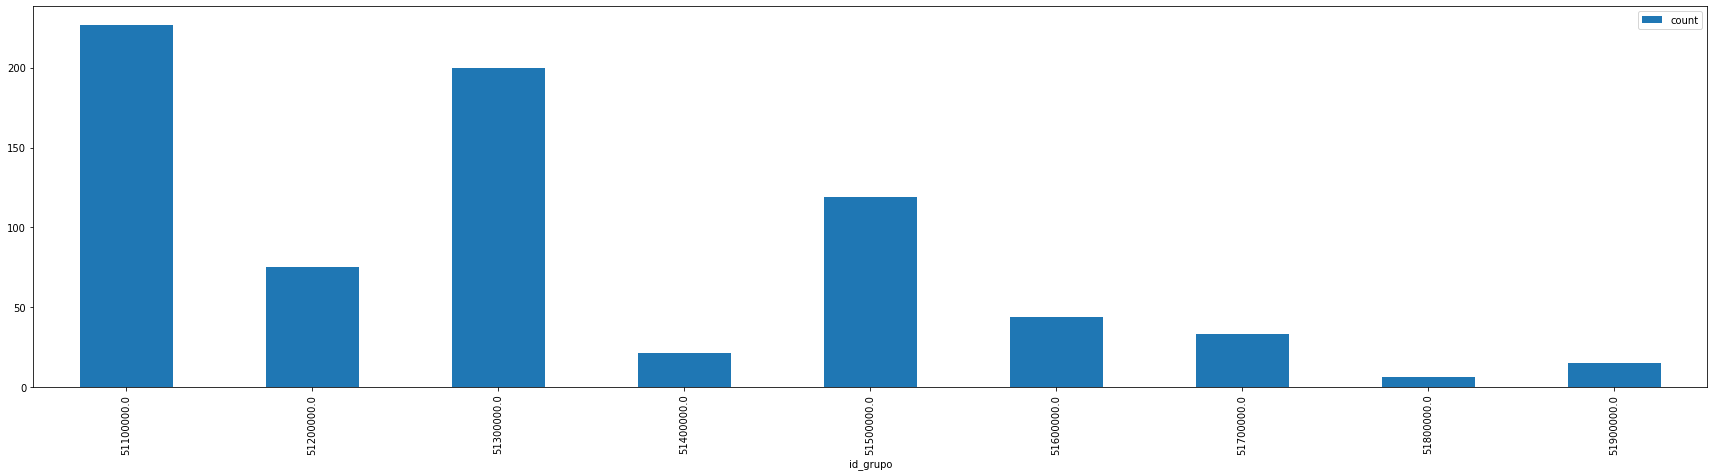

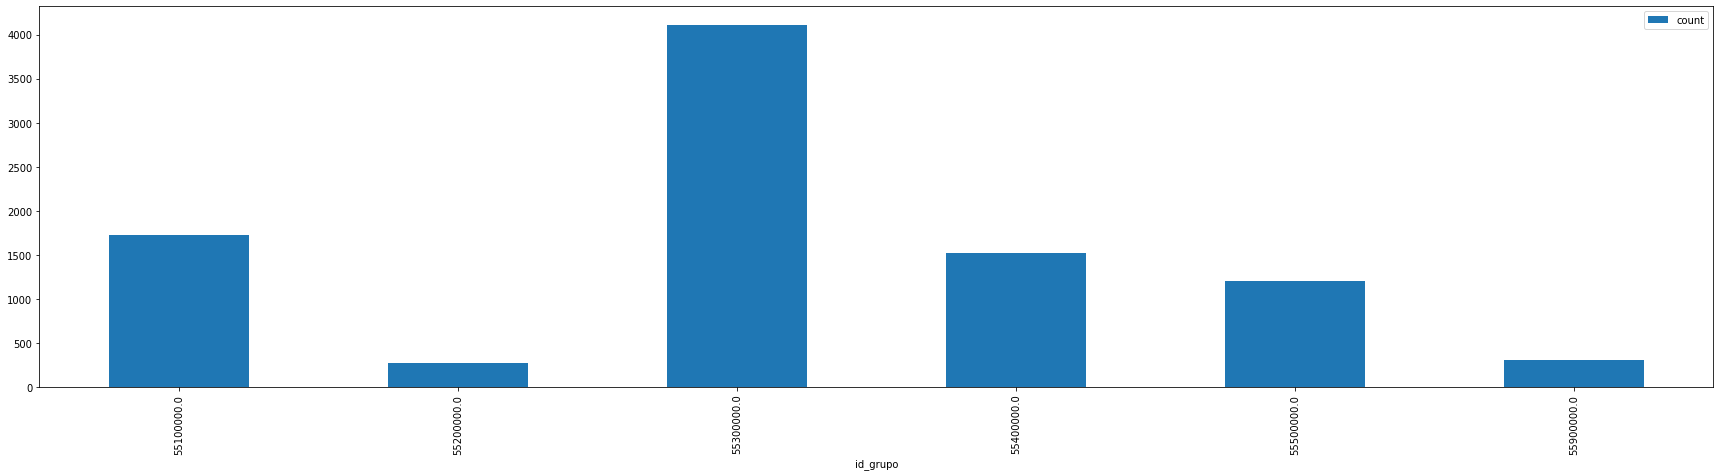

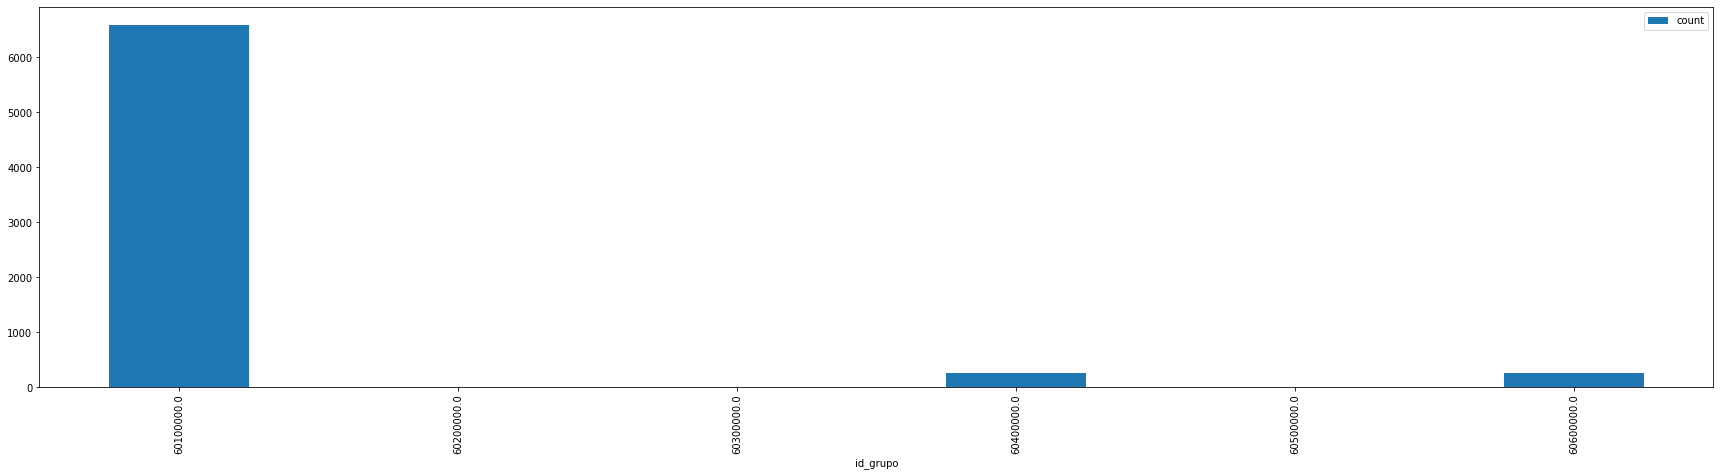

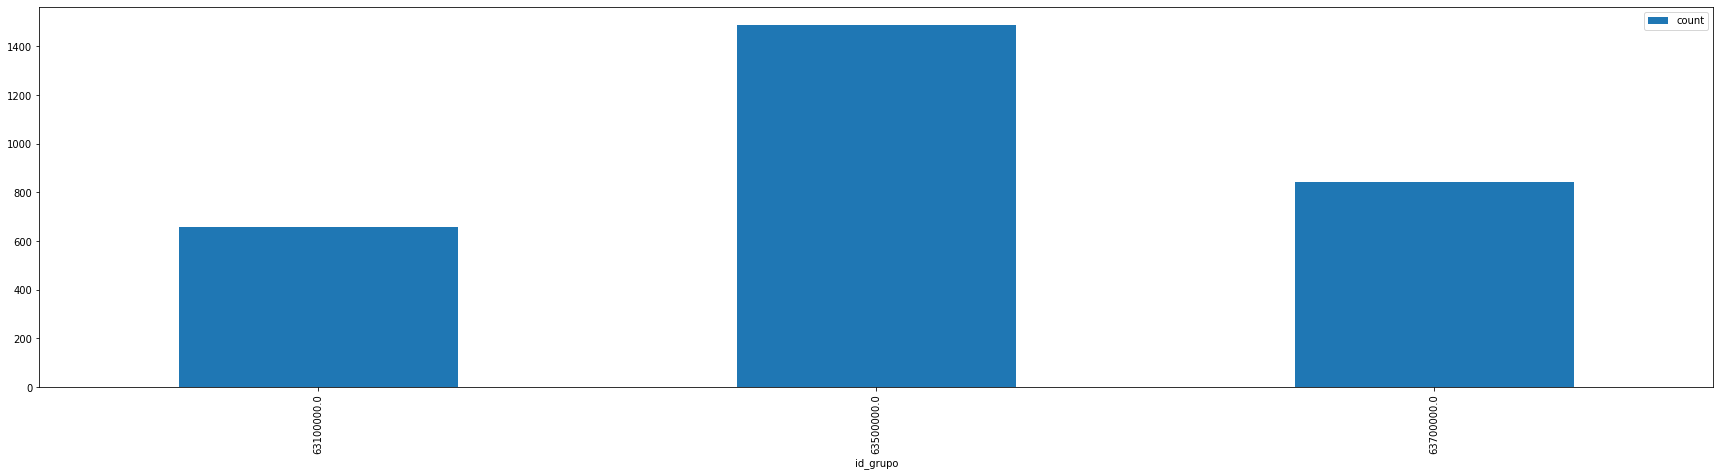

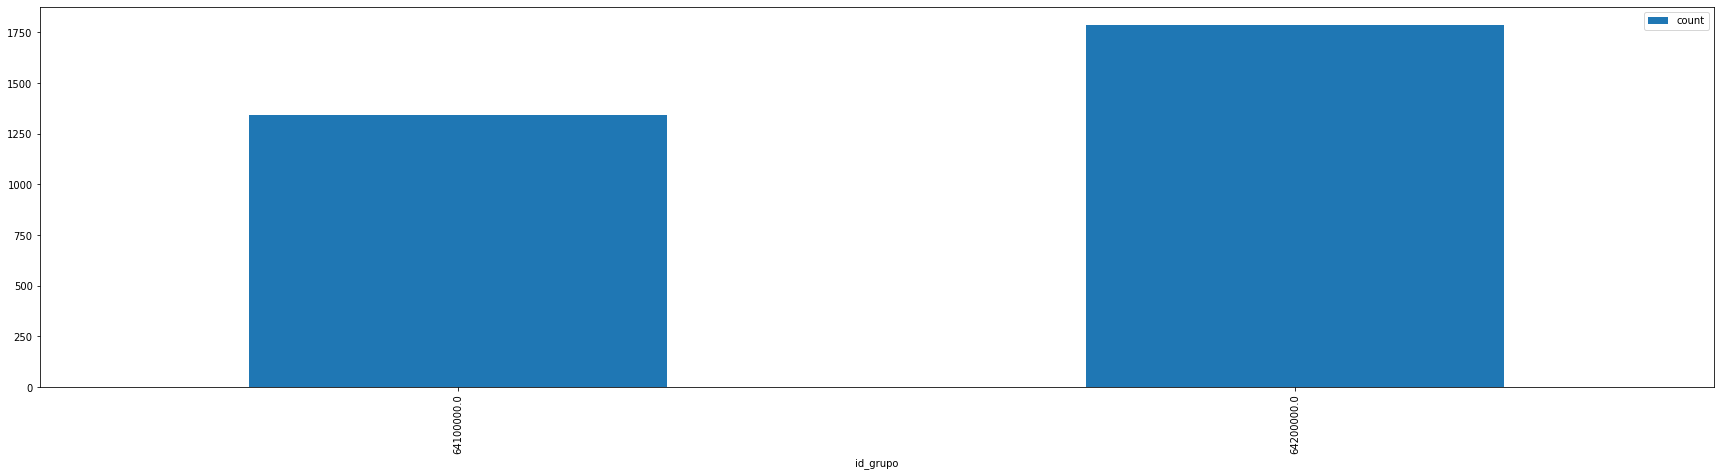

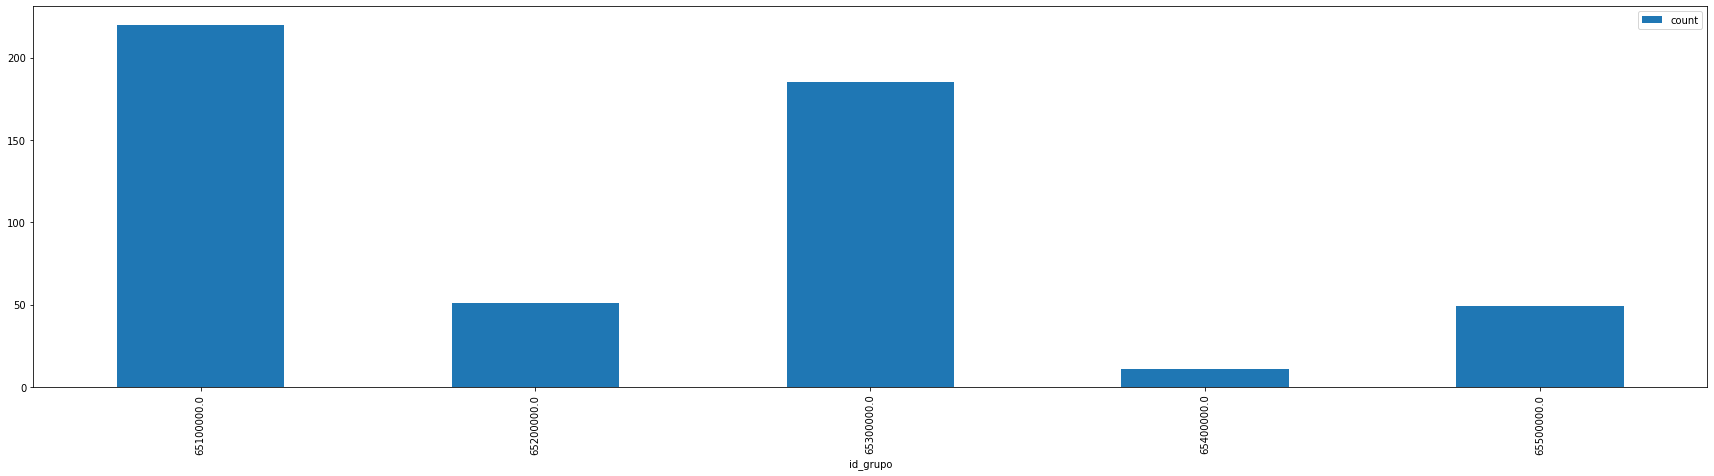

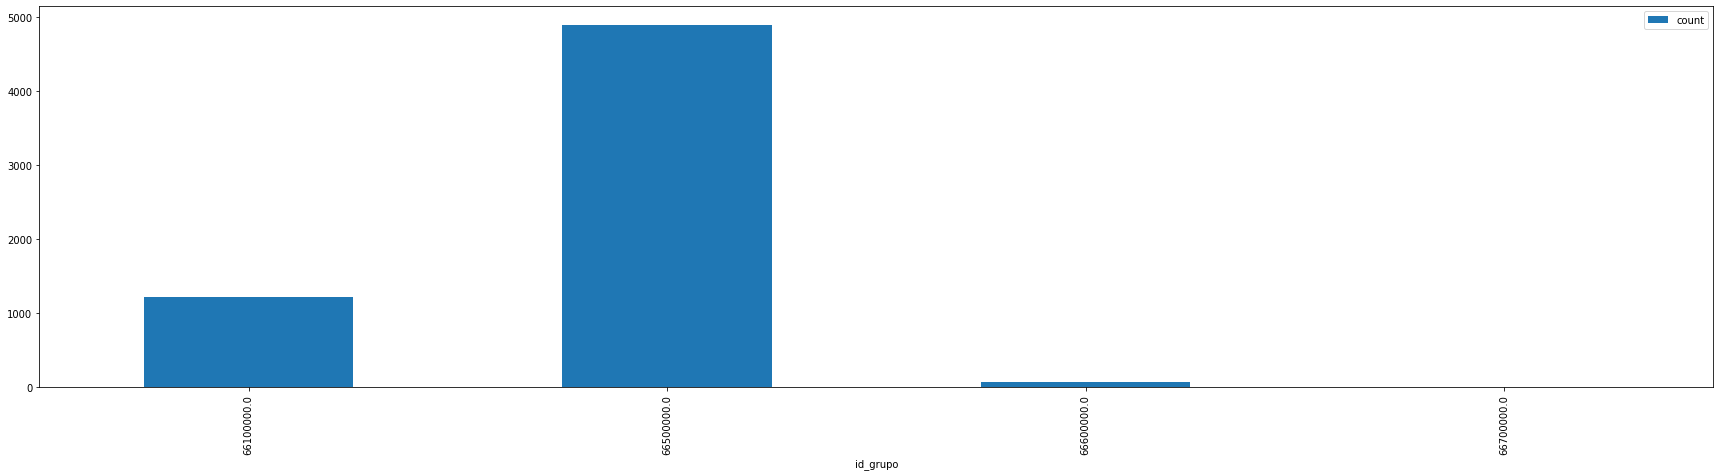

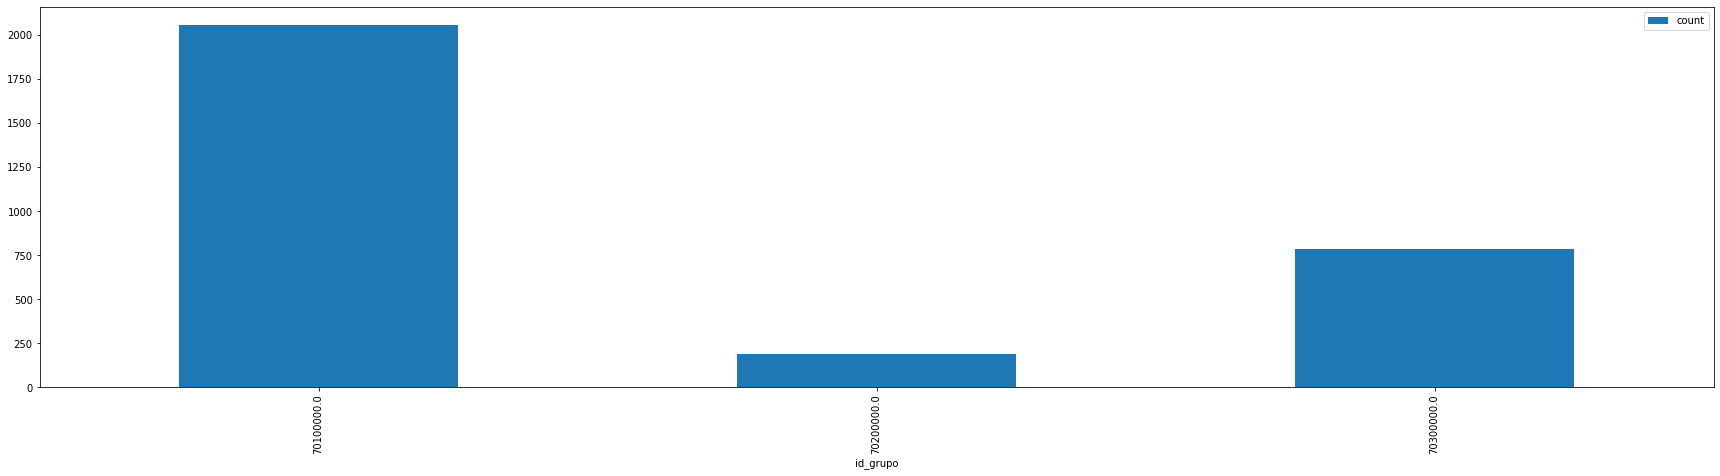

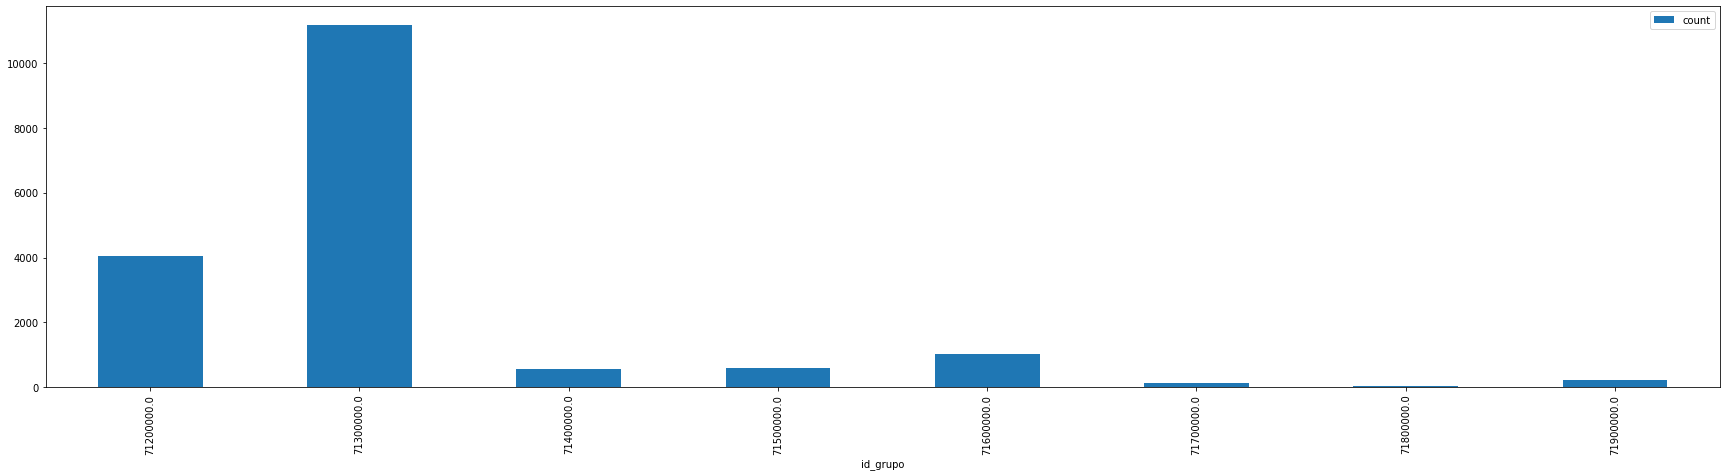

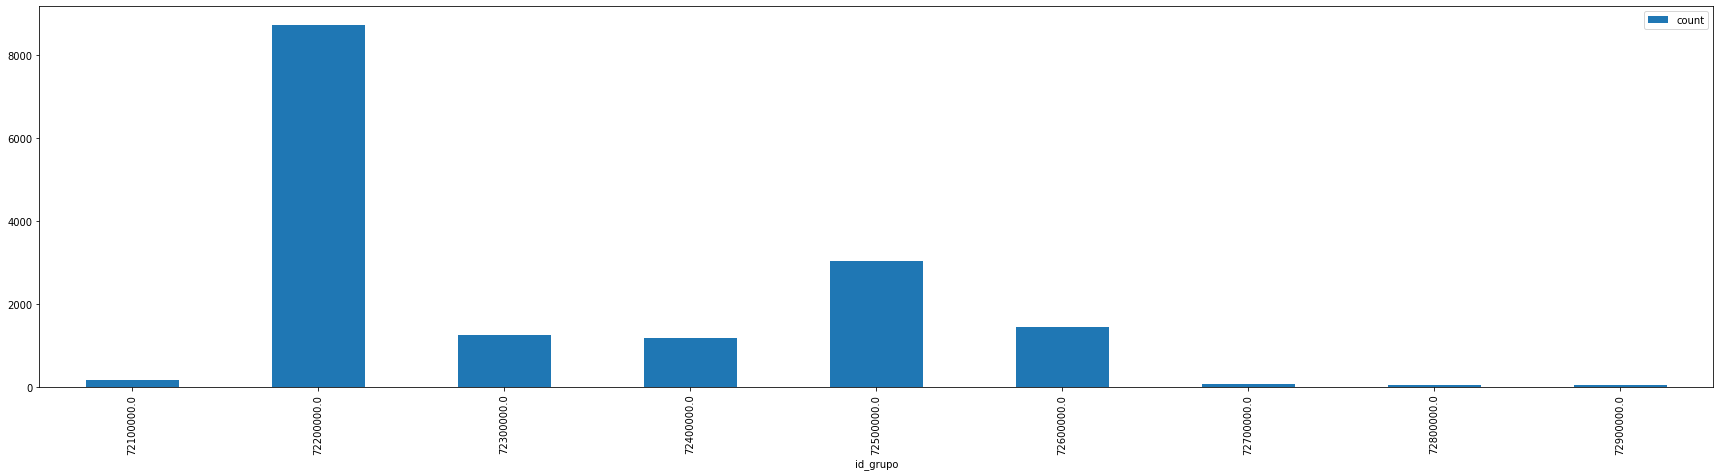

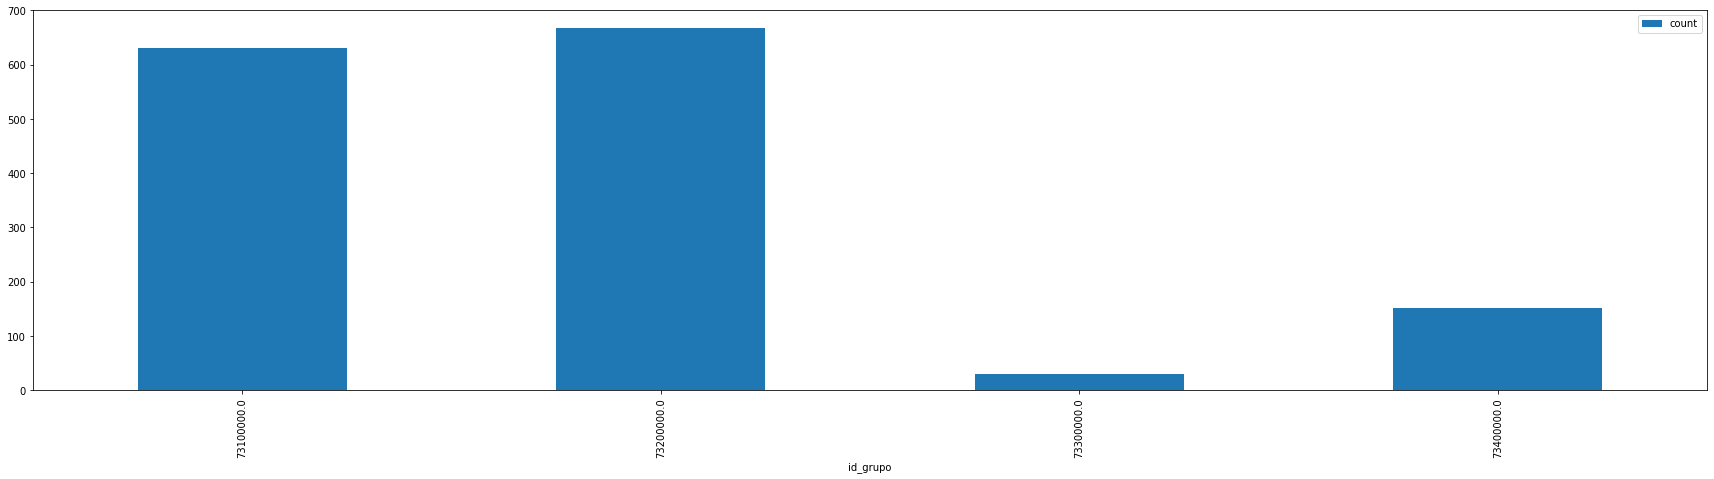

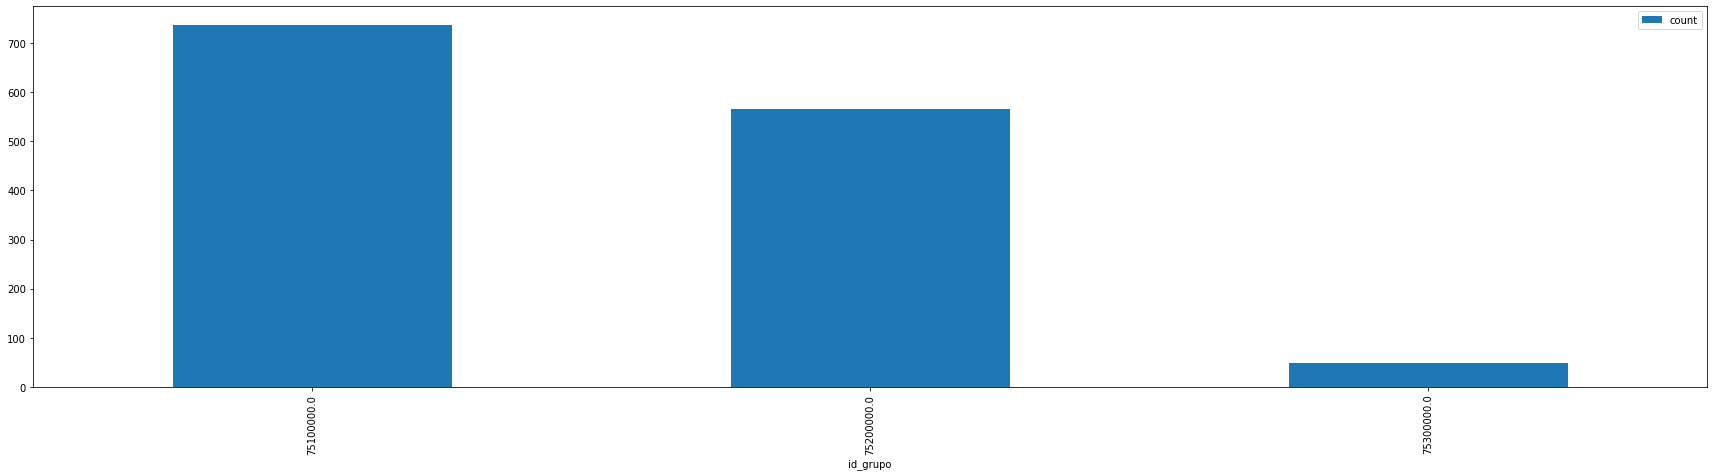

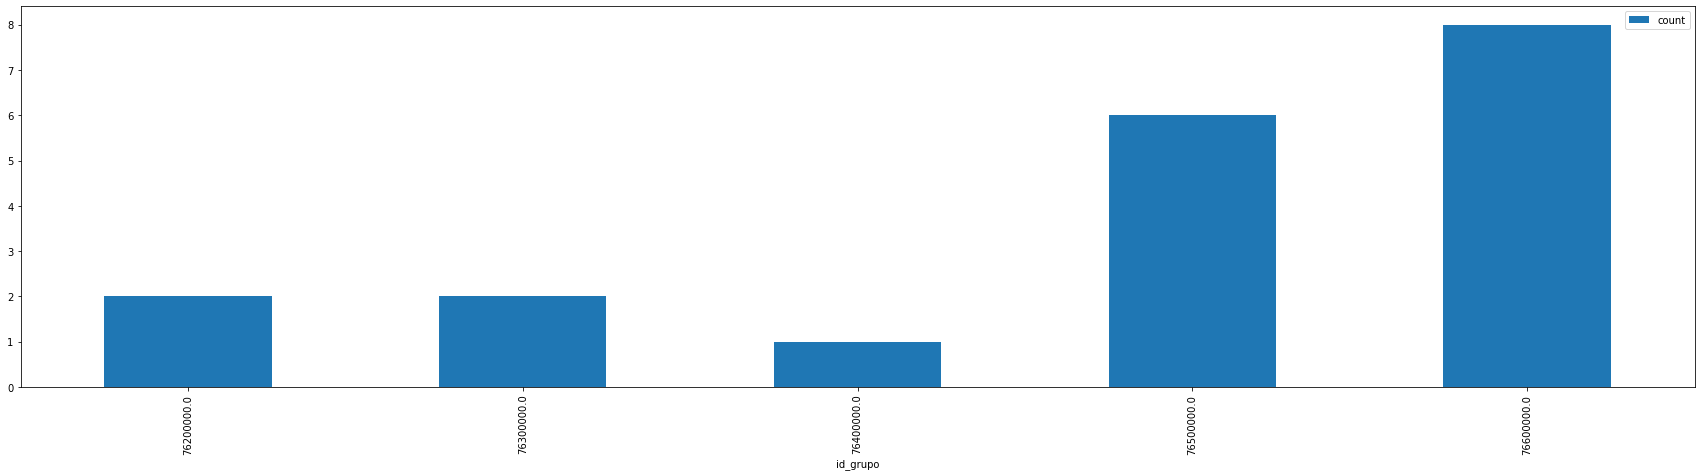

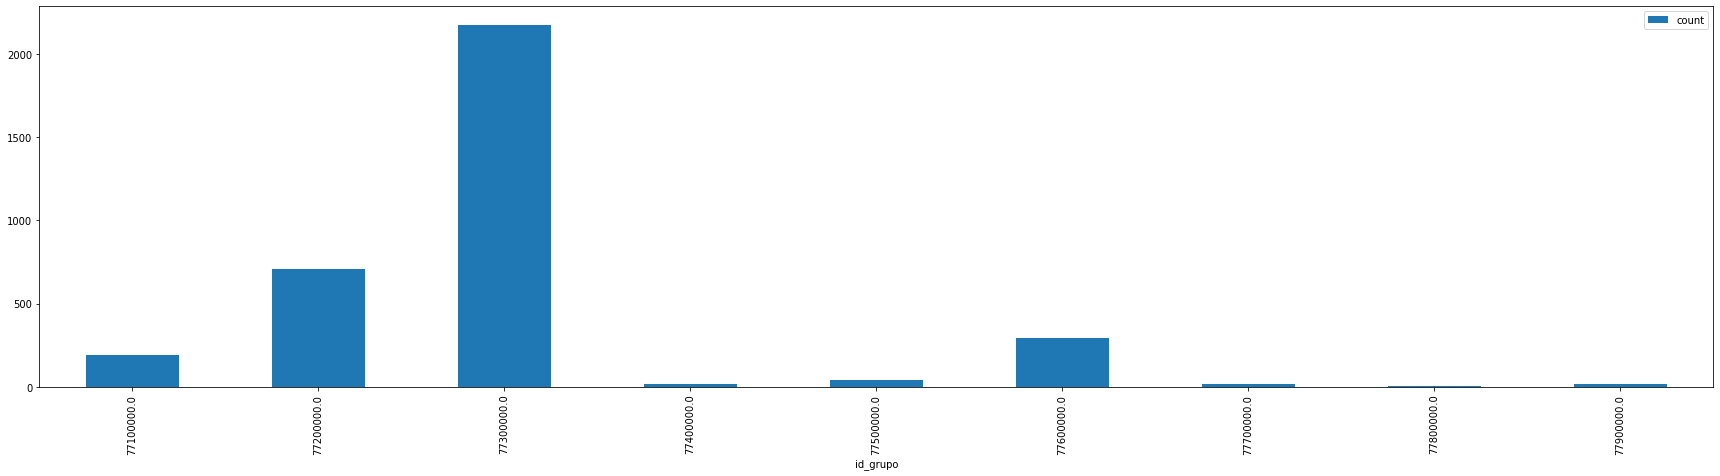

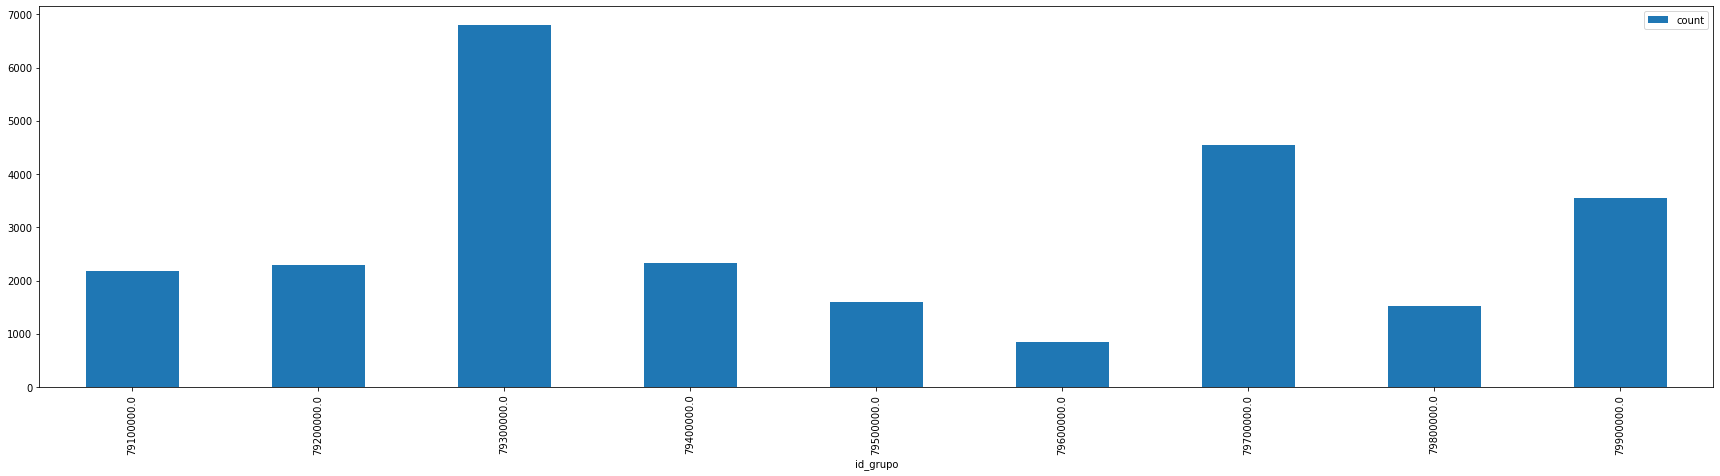

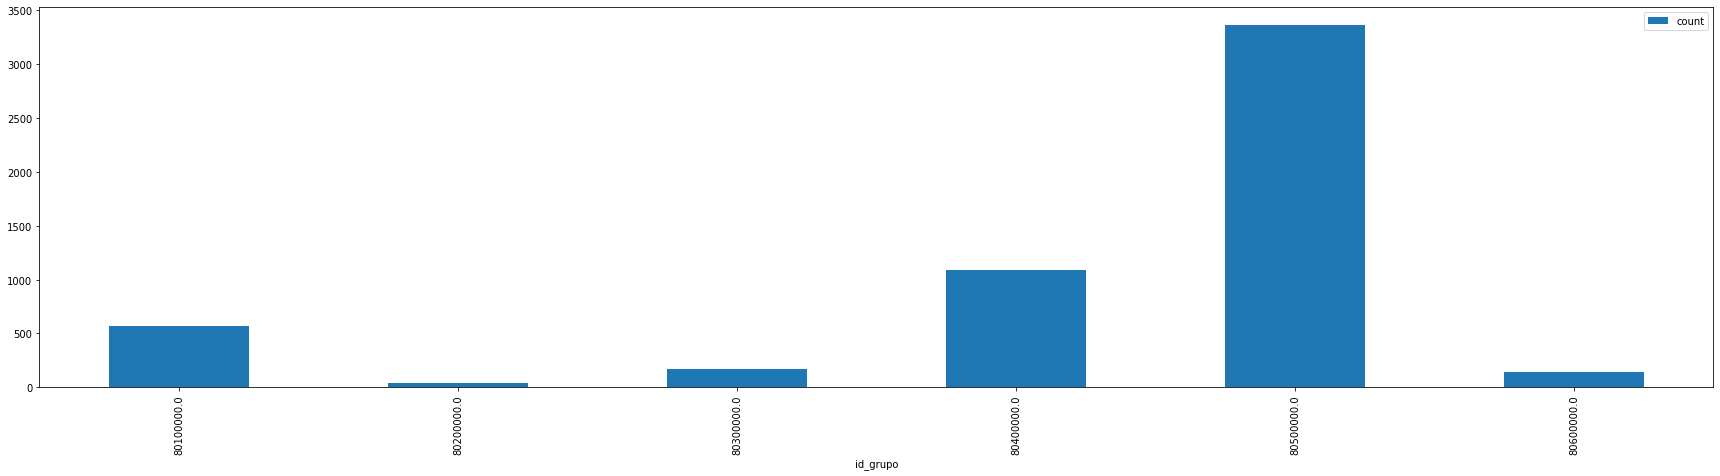

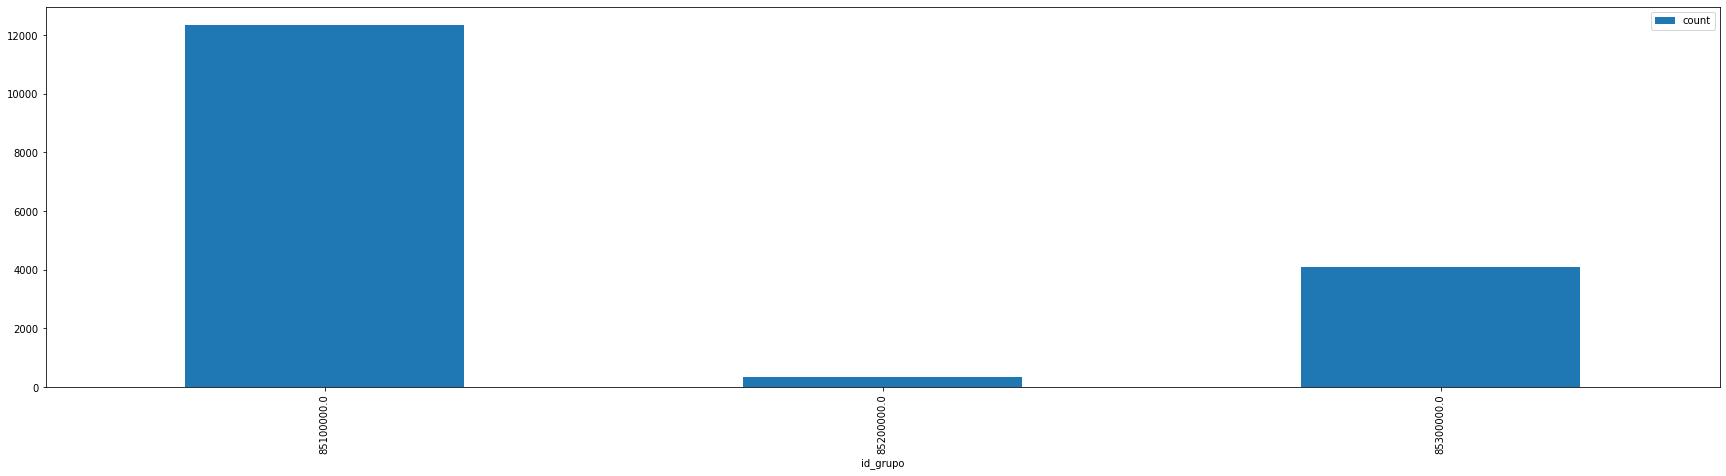

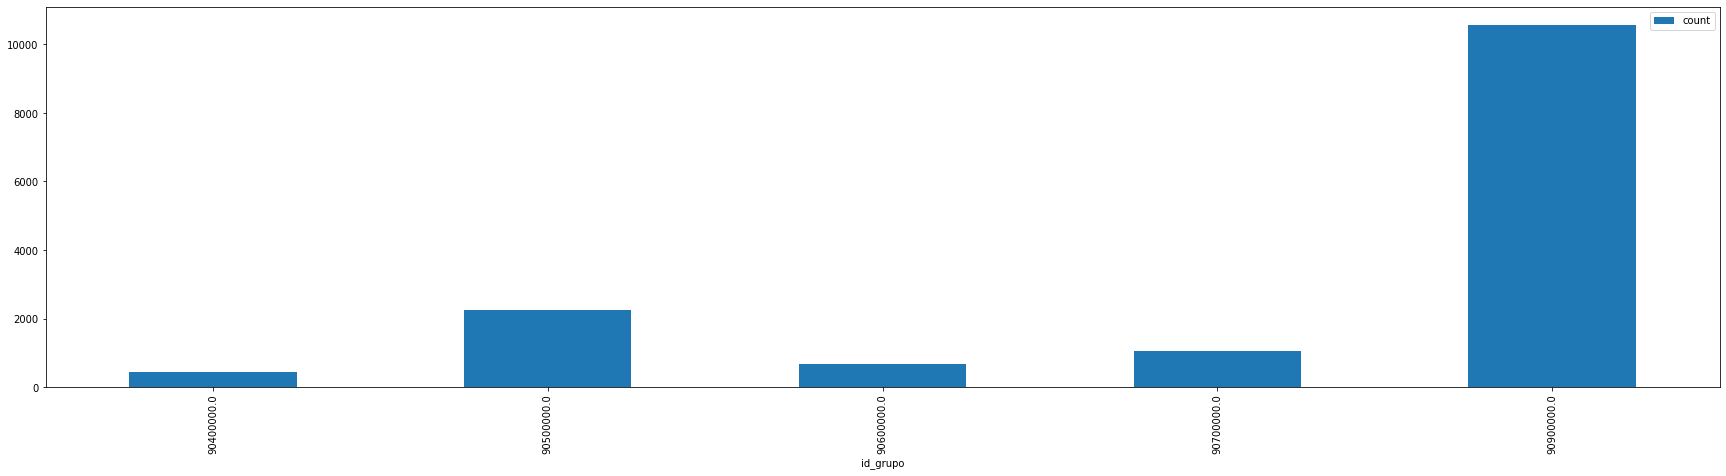

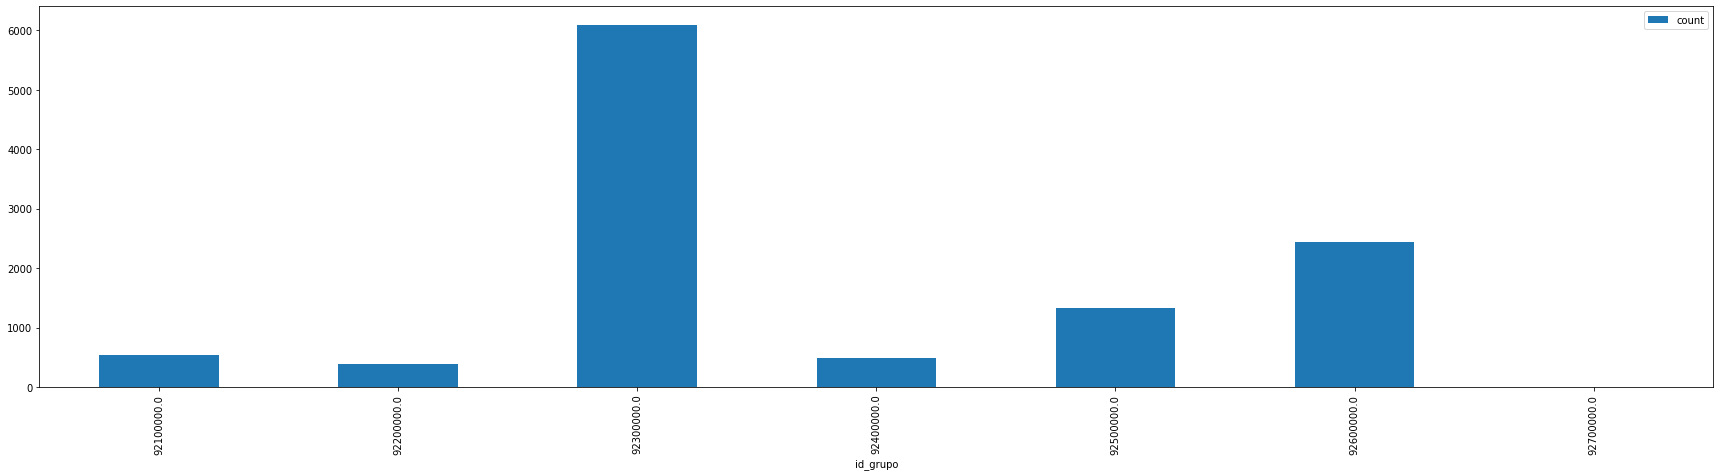

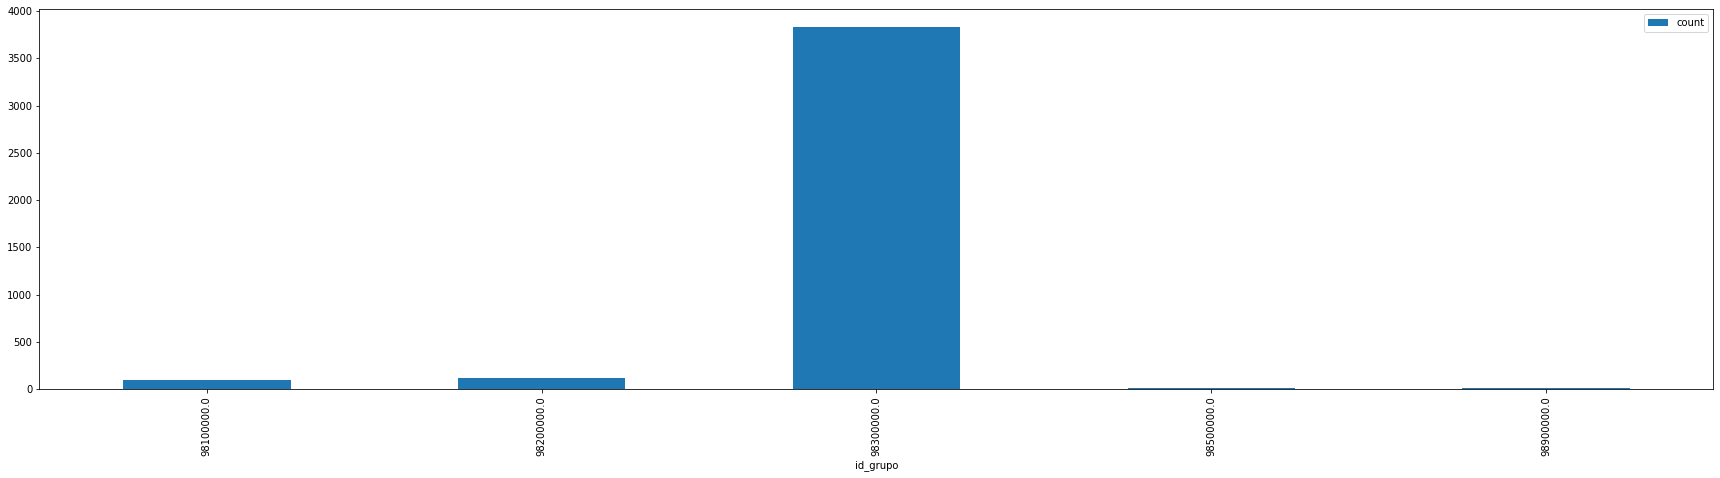

In [ ]:
#¿Cuántas licitaciones hay por cada grupo? 
df.groupby(['id_division', 'id_grupo']).size().reset_index(name='count').groupby(['id_division']).plot(x='id_grupo', y='count', kind='bar', figsize=(30,7))

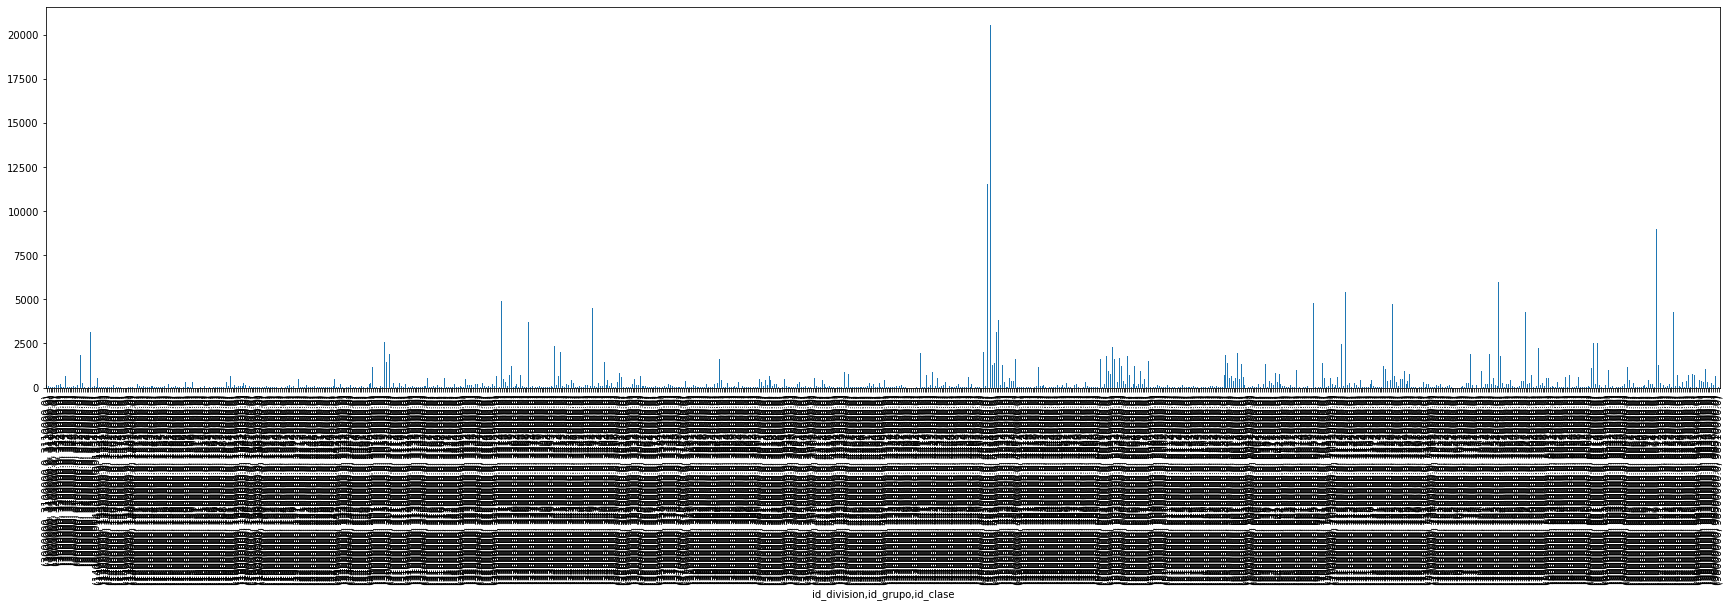

In [ ]:
#¿Cuántas licitaciones hay por cada clase? 
df.groupby(['id_division', 'id_grupo', 'id_clase']).count()['objeto'].plot(kind='bar', figsize=(30,7))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


id_division
3000000     AxesSubplot(0.125,0.125;0.775x0.755)
9000000     AxesSubplot(0.125,0.125;0.775x0.755)
14000000    AxesSubplot(0.125,0.125;0.775x0.755)
15000000    AxesSubplot(0.125,0.125;0.775x0.755)
16000000    AxesSubplot(0.125,0.125;0.775x0.755)
18000000    AxesSubplot(0.125,0.125;0.775x0.755)
19000000    AxesSubplot(0.125,0.125;0.775x0.755)
22000000    AxesSubplot(0.125,0.125;0.775x0.755)
24000000    AxesSubplot(0.125,0.125;0.775x0.755)
30000000    AxesSubplot(0.125,0.125;0.775x0.755)
31000000    AxesSubplot(0.125,0.125;0.775x0.755)
32000000    AxesSubplot(0.125,0.125;0.775x0.755)
33000000    AxesSubplot(0.125,0.125;0.775x0.755)
34000000    AxesSubplot(0.125,0.125;0.775x0.755)
35000000    AxesSubplot(0.125,0.125;0.775x0.755)
37000000    AxesSubplot(0.125,0.125;0.775x0.755)
38000000    AxesSubplot(0.125,0.125;0.775x0.755)
39000000    AxesSubplot(0.125,0.125;0.775x0.755)
41000000    AxesSubplot(0.125,0.125;0.775x0.755)
42000000    AxesSubplot(0.125,0.125;0.775x0.755)
43000000

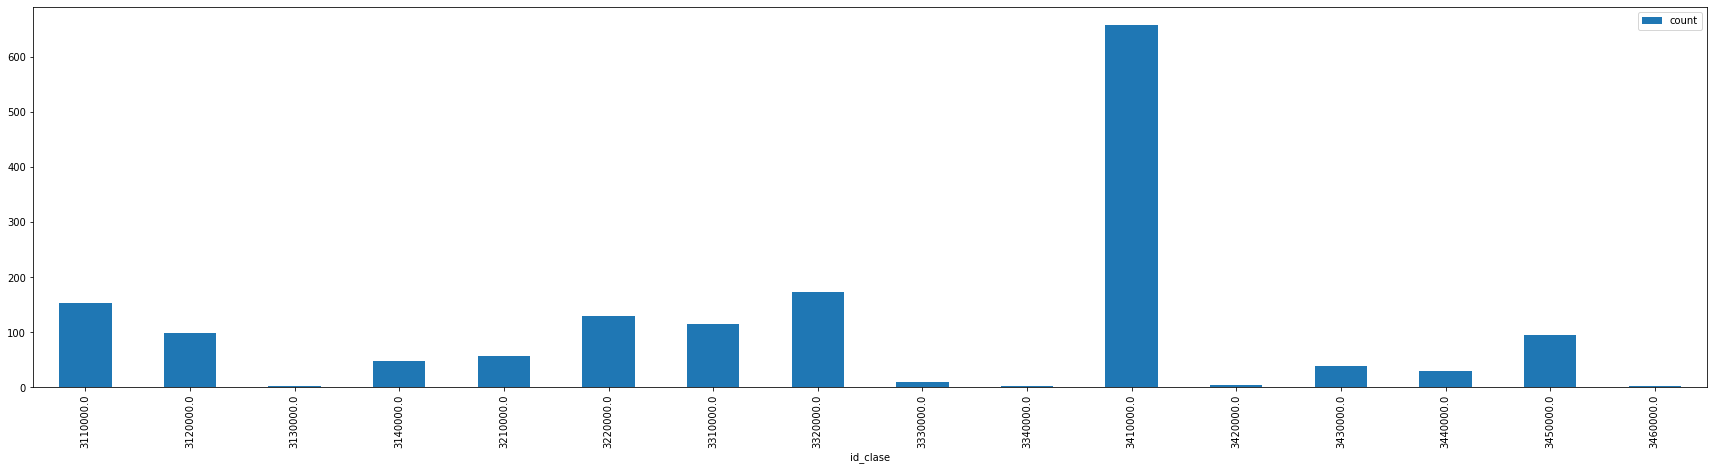

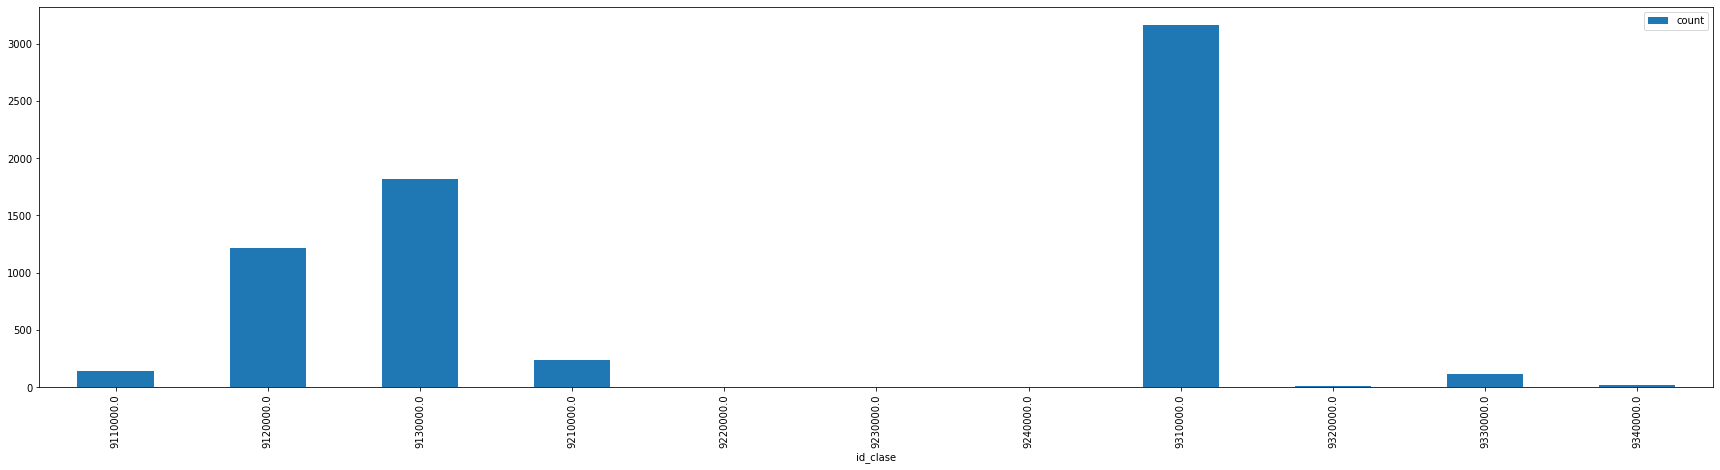

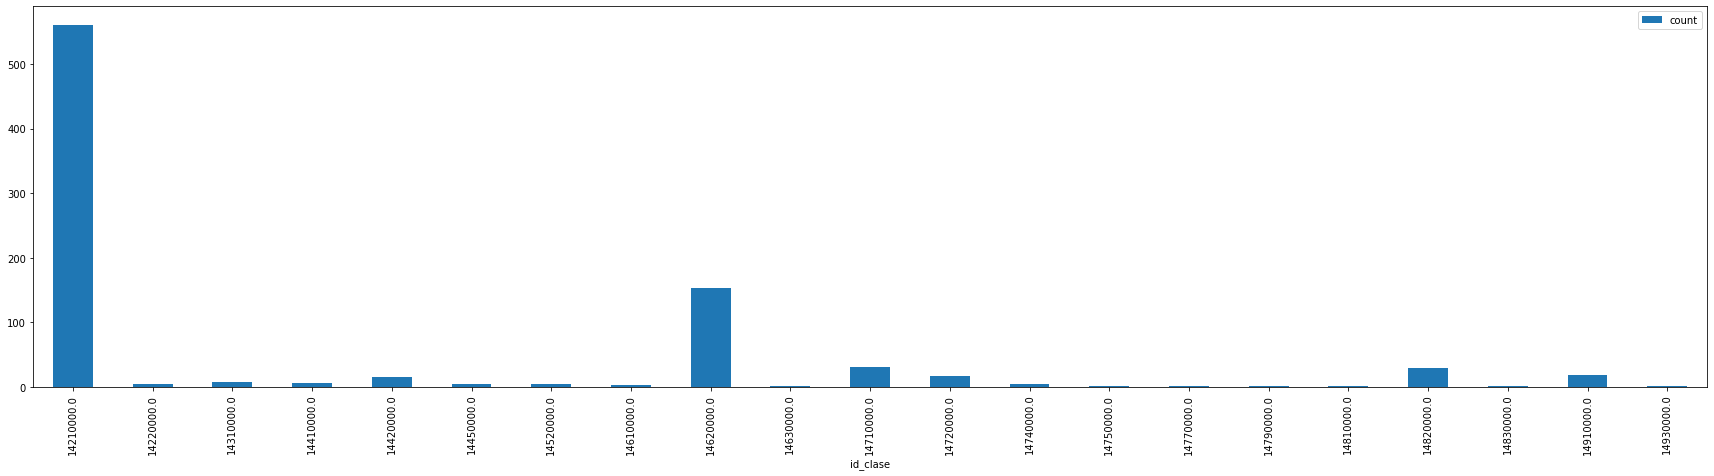

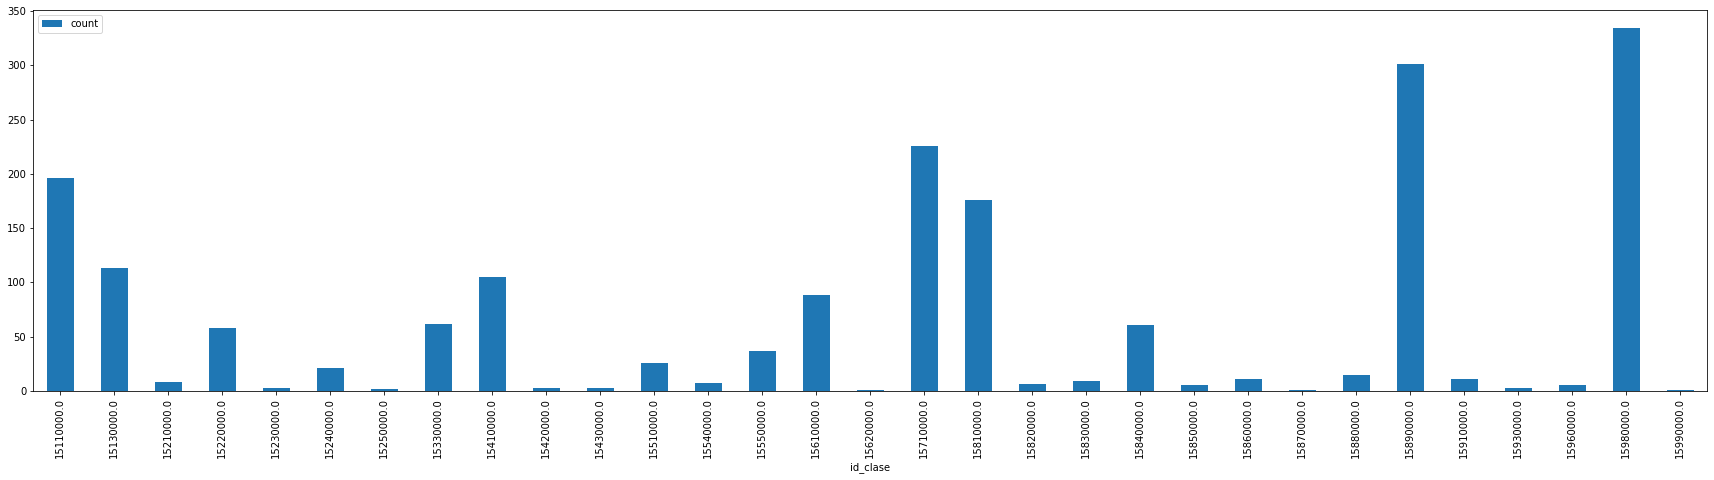

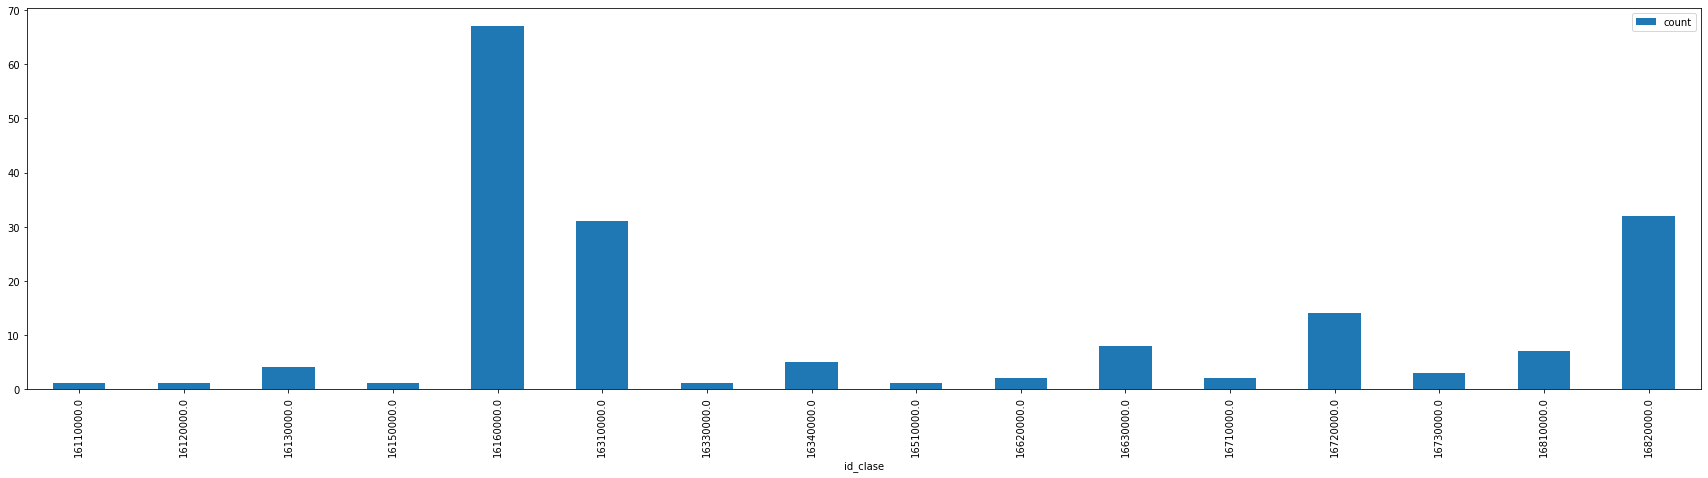

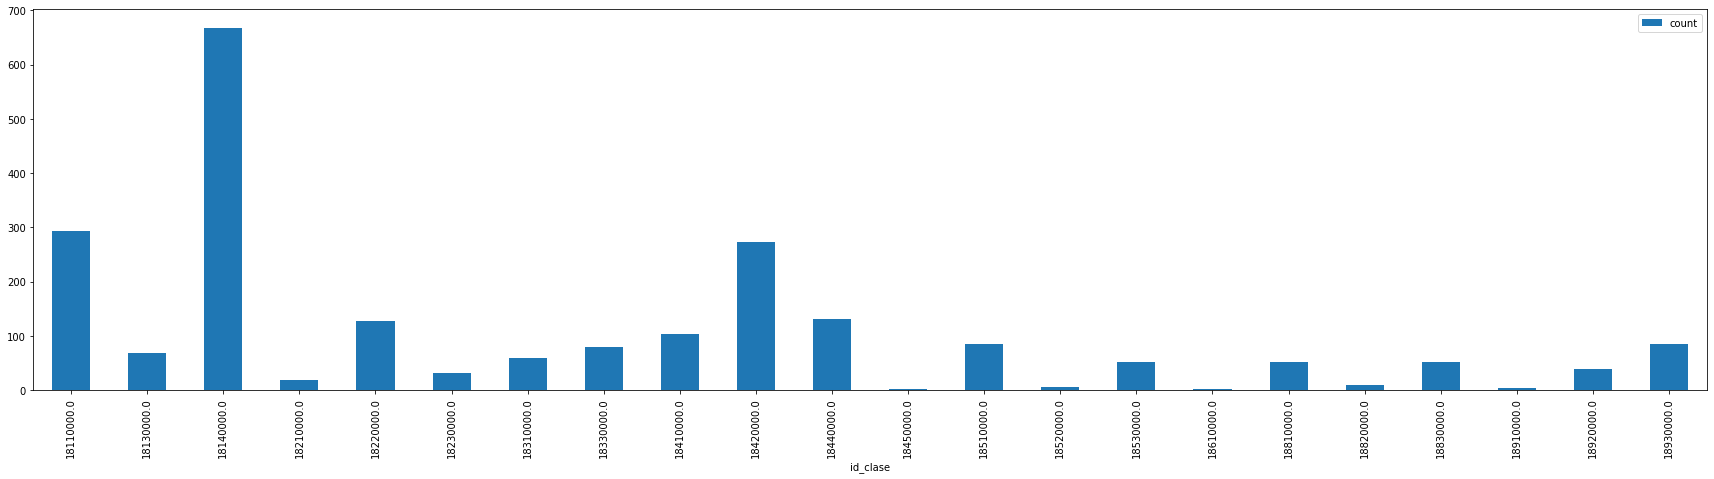

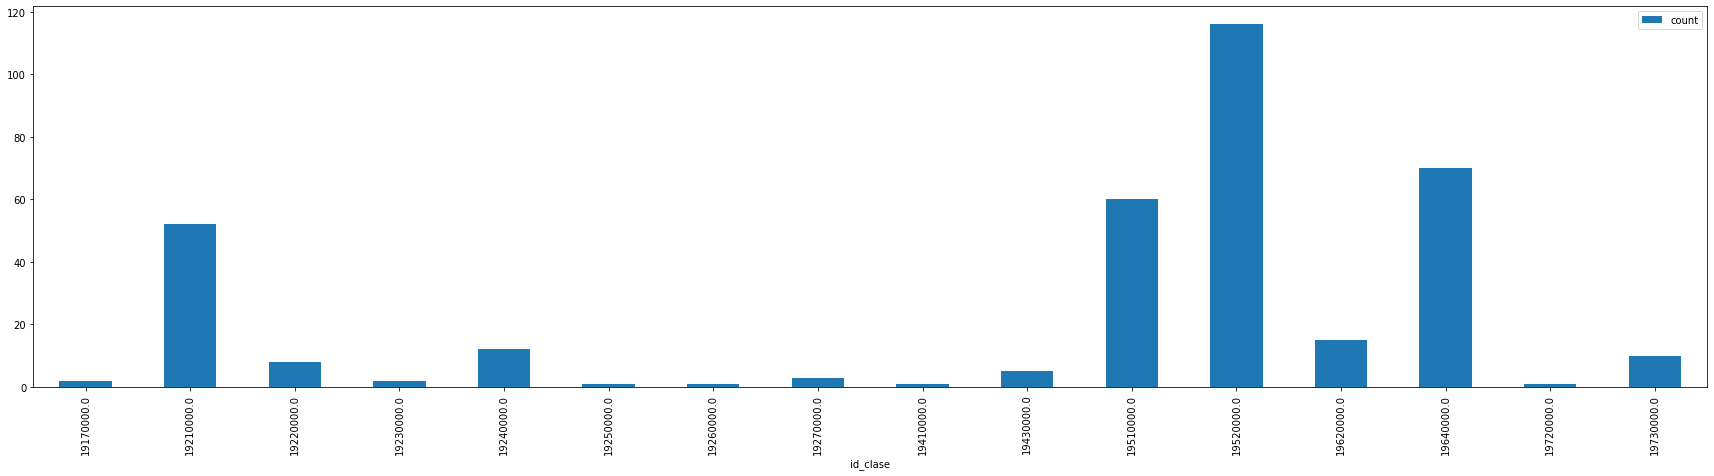

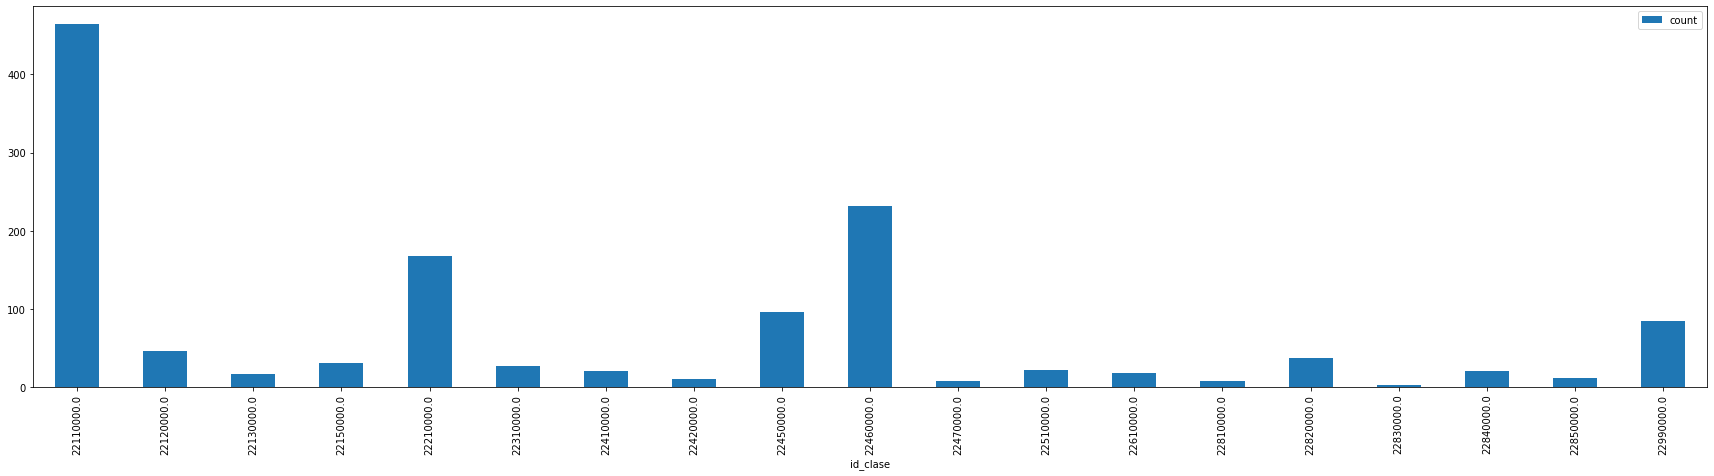

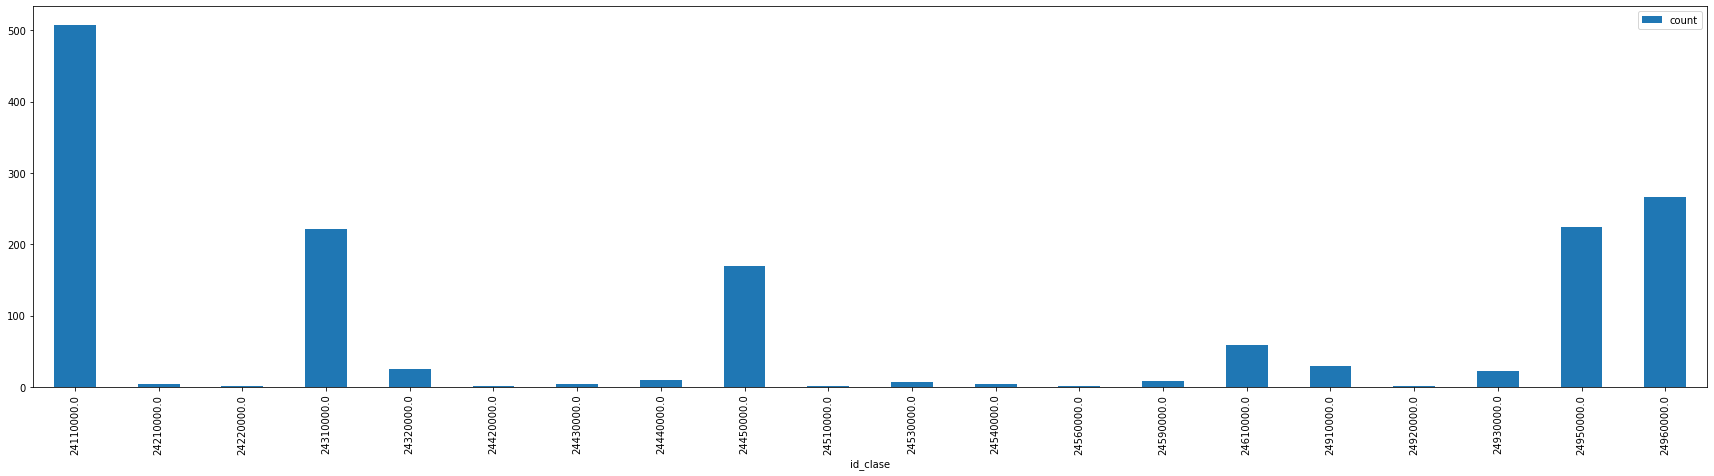

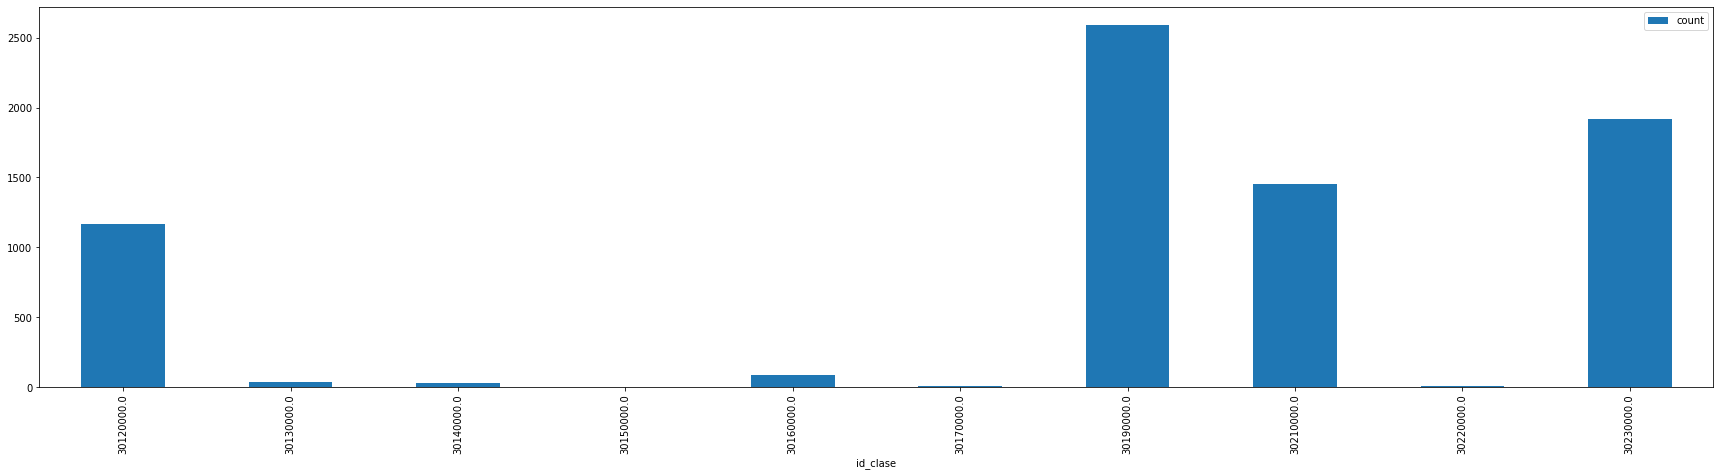

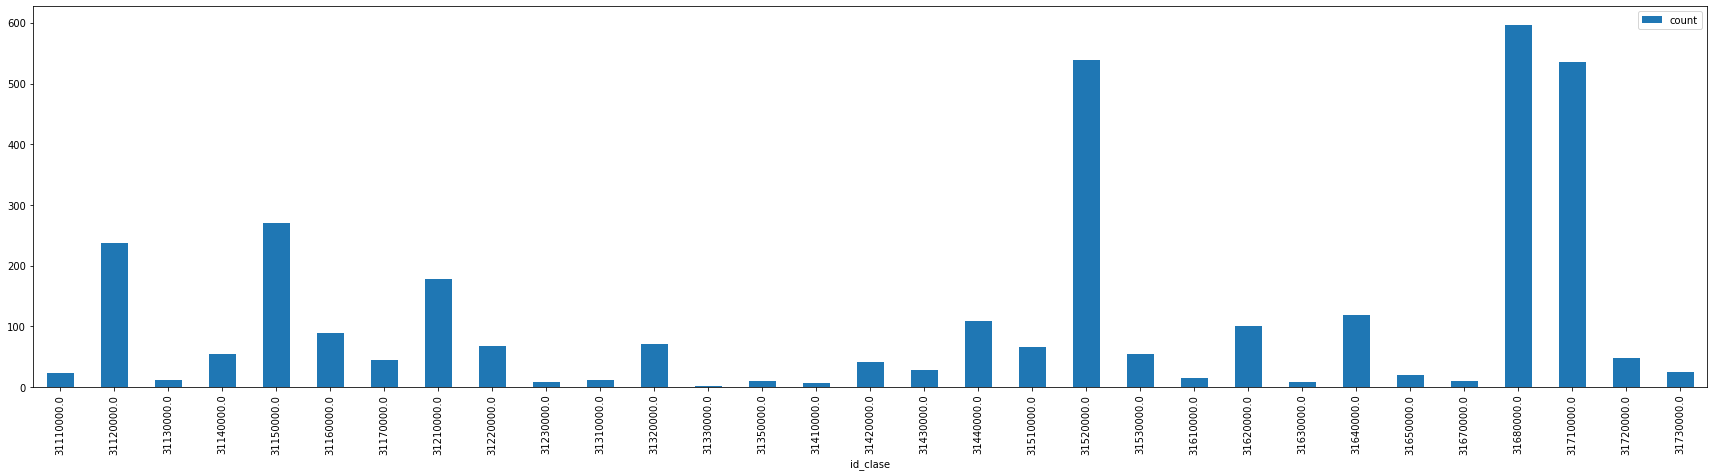

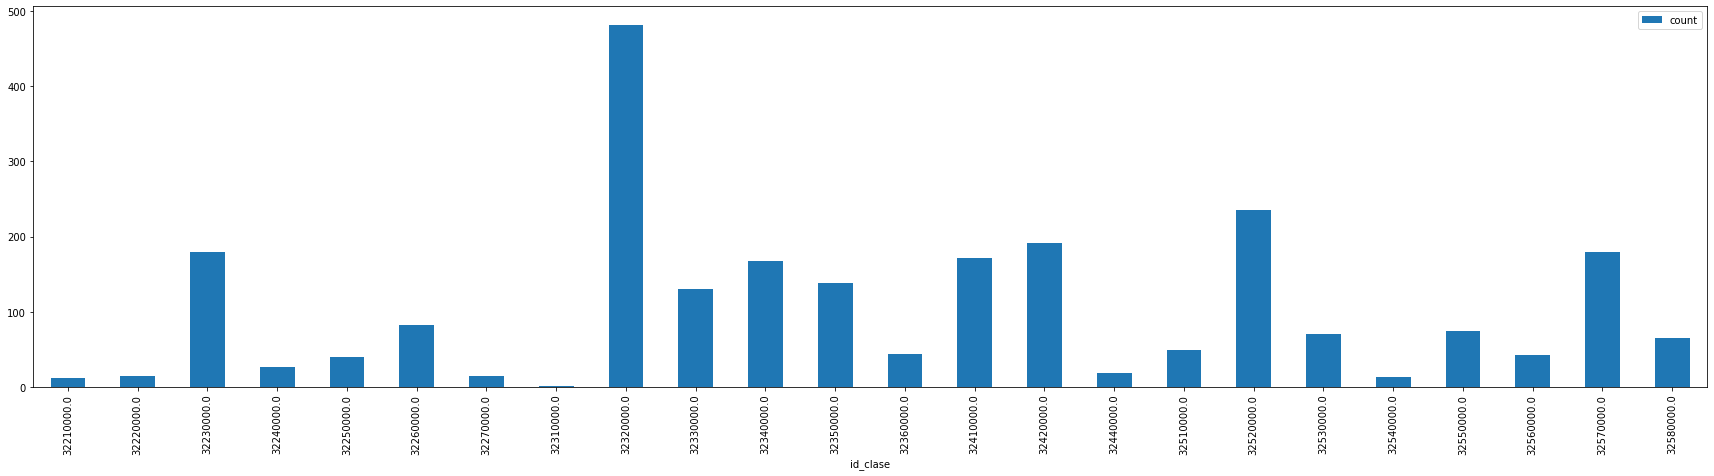

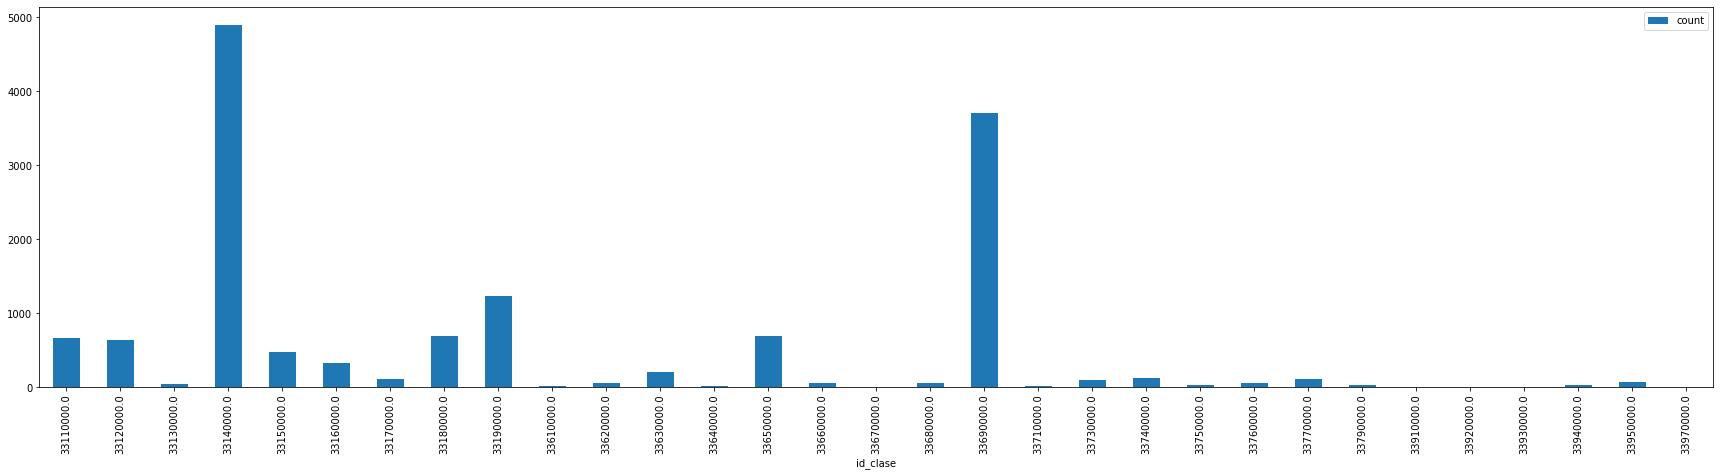

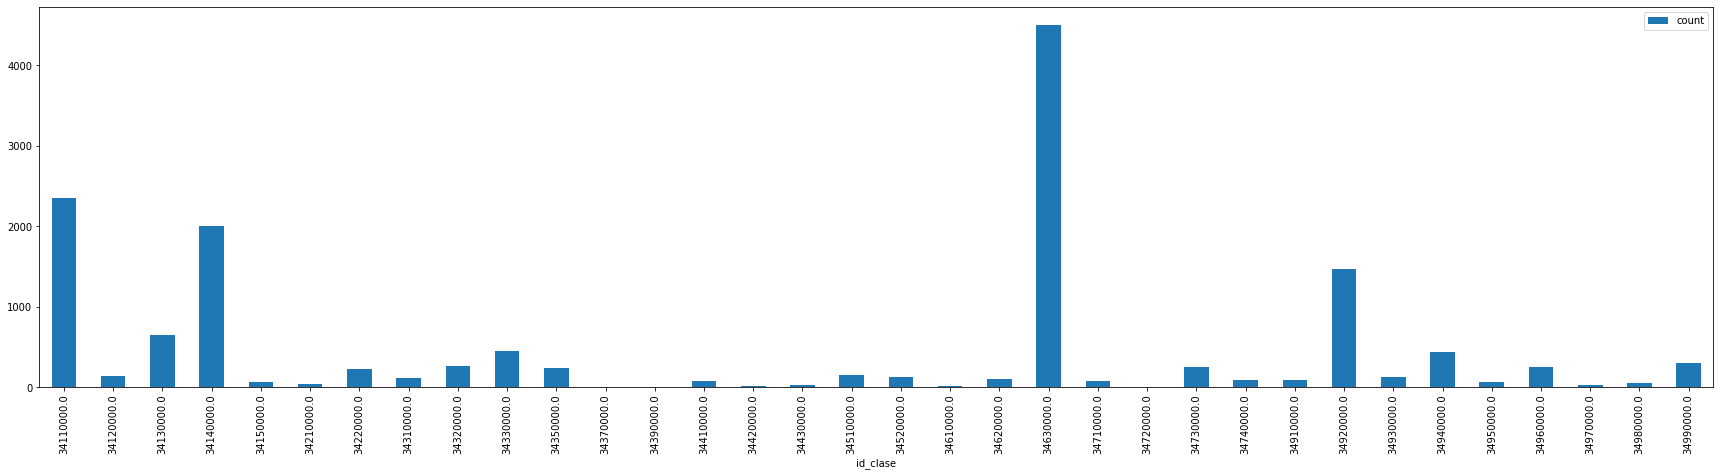

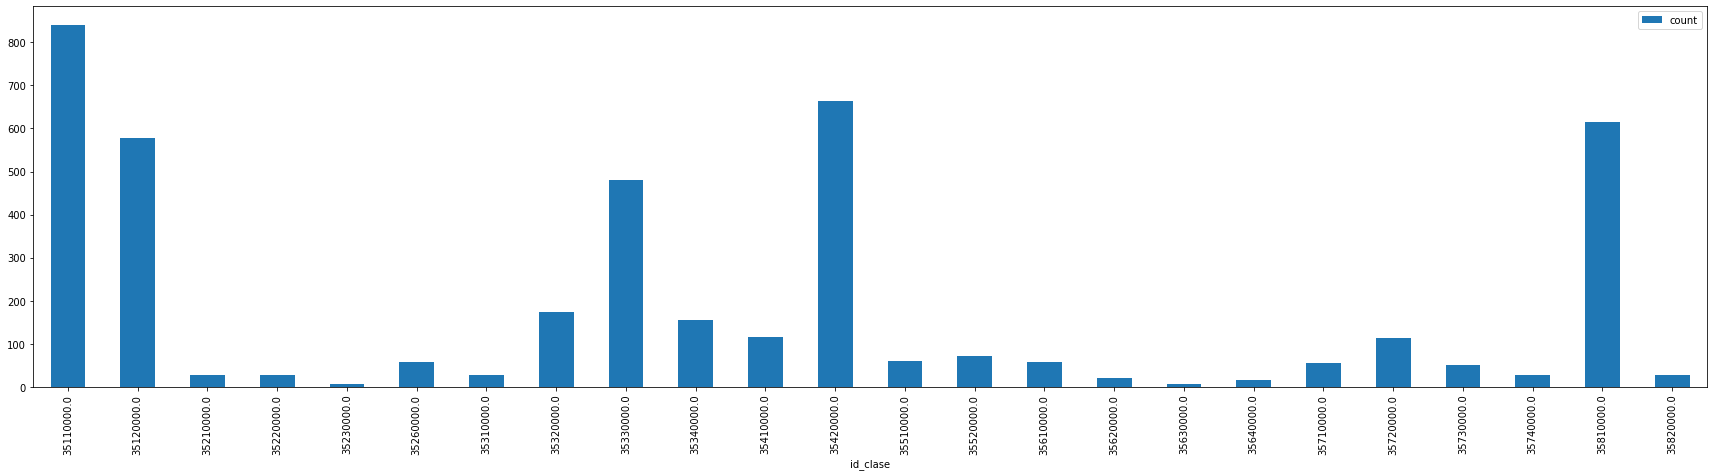

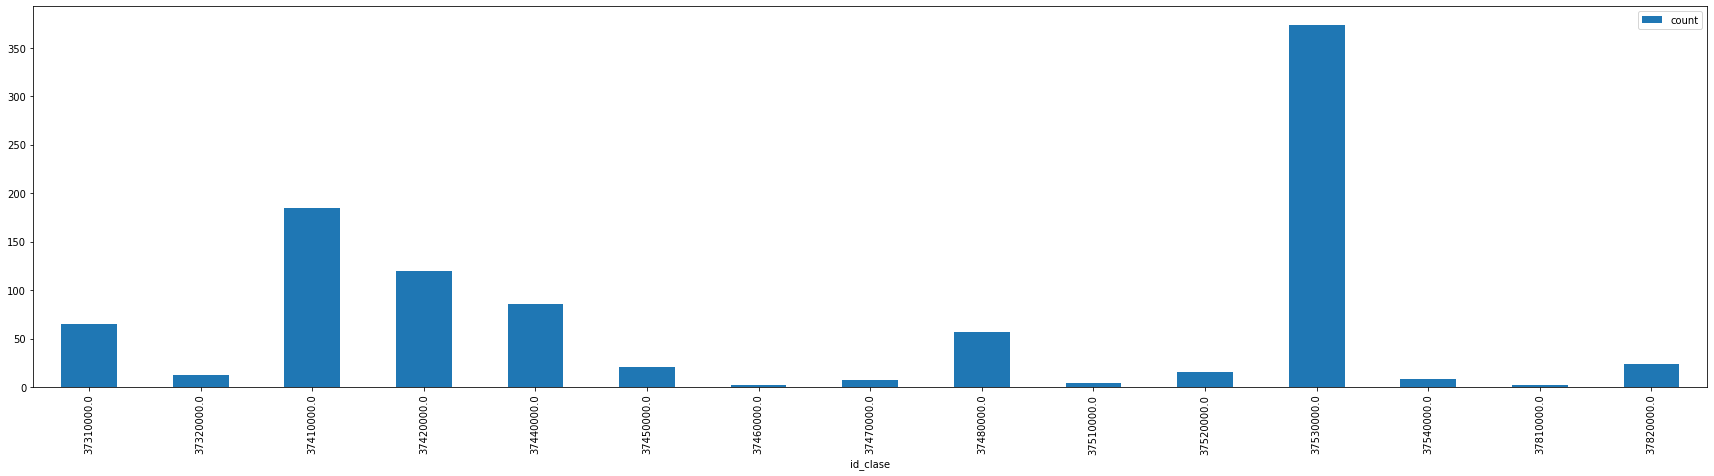

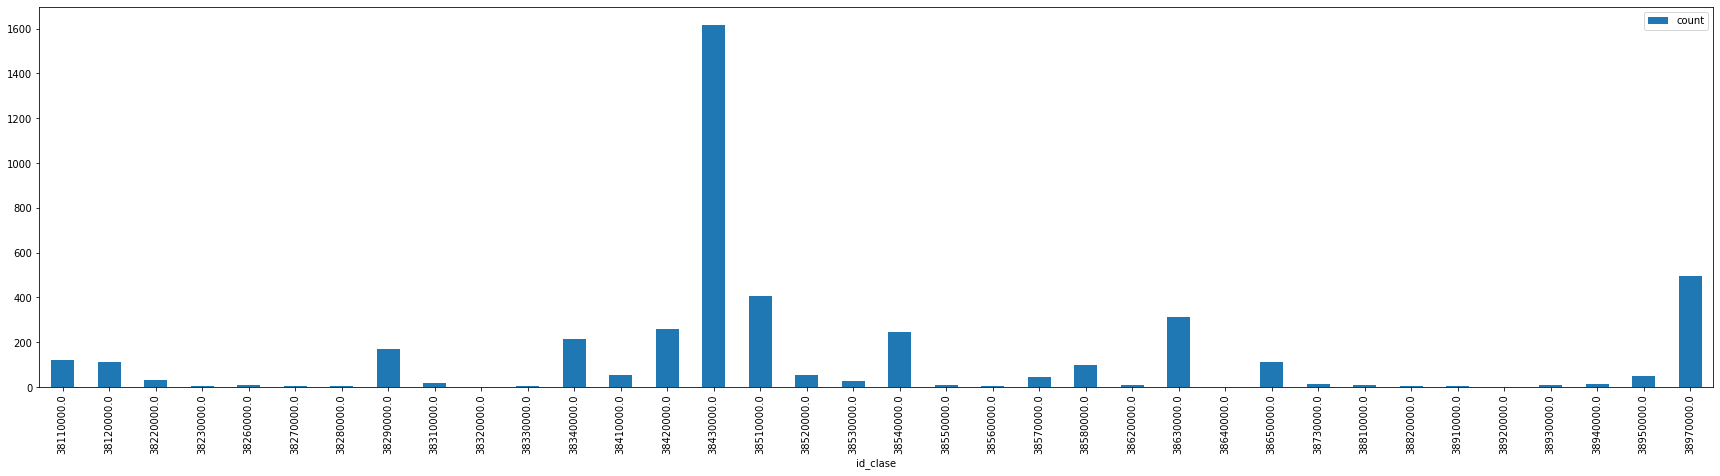

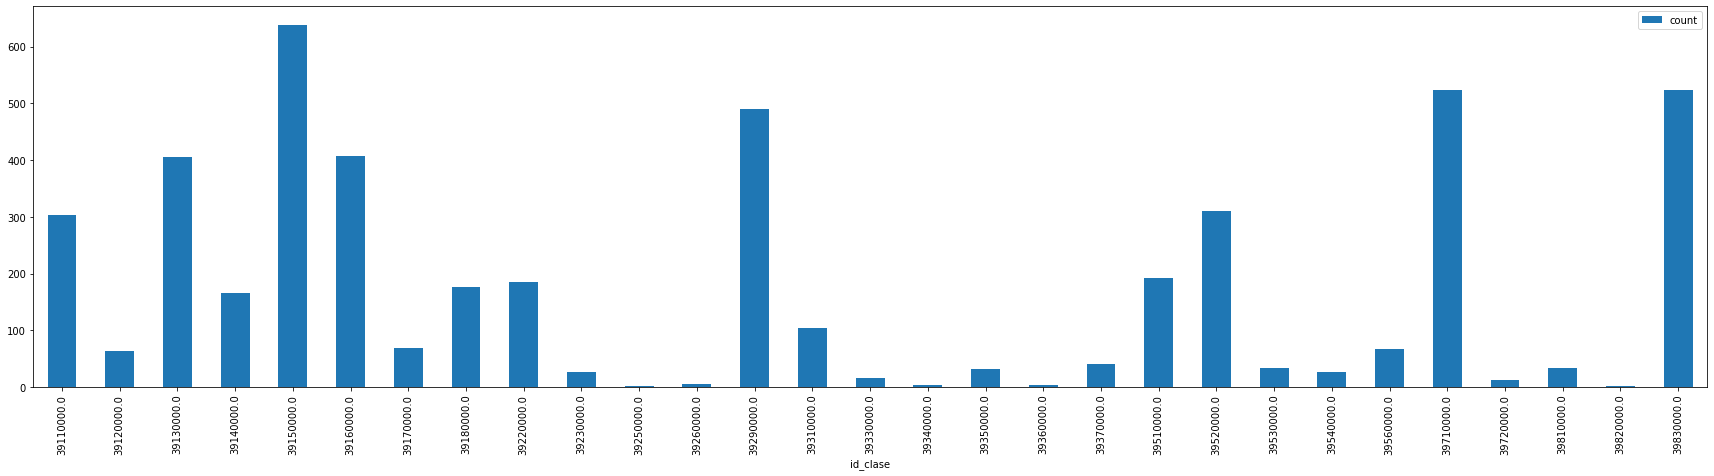

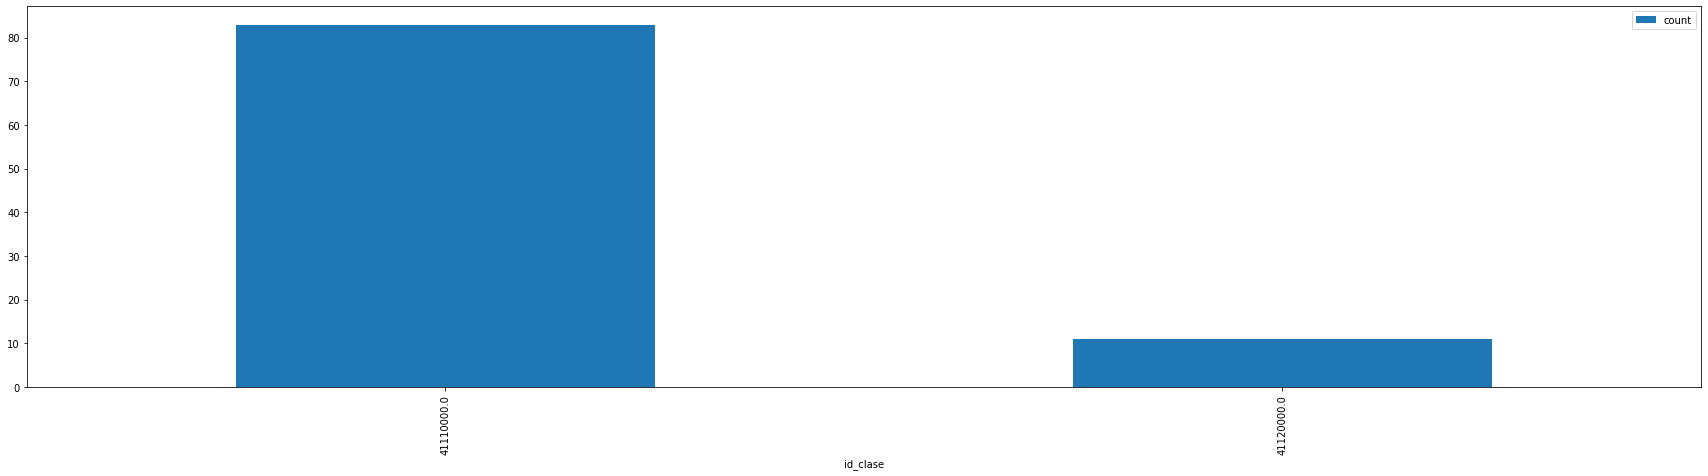

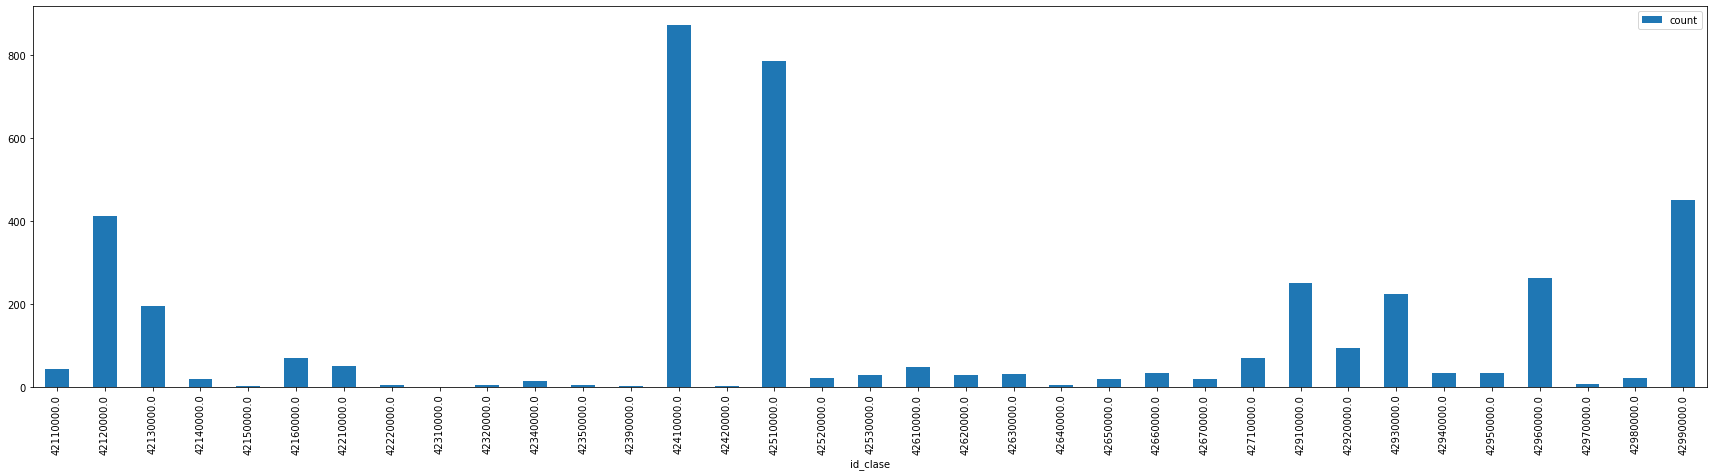

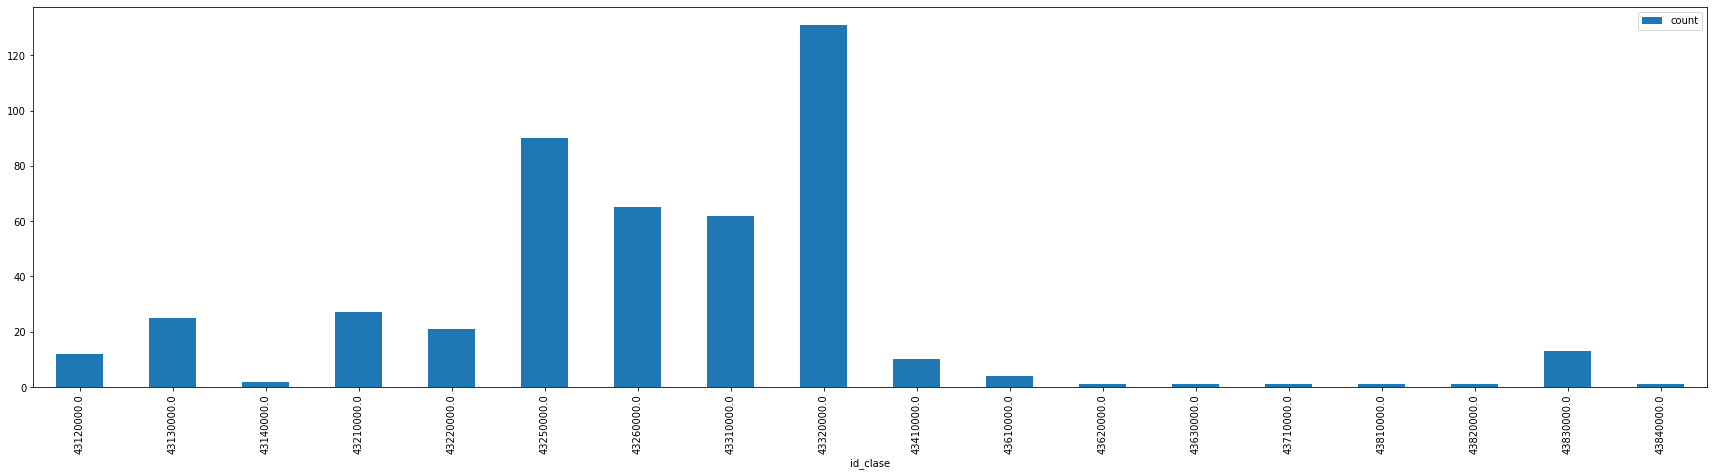

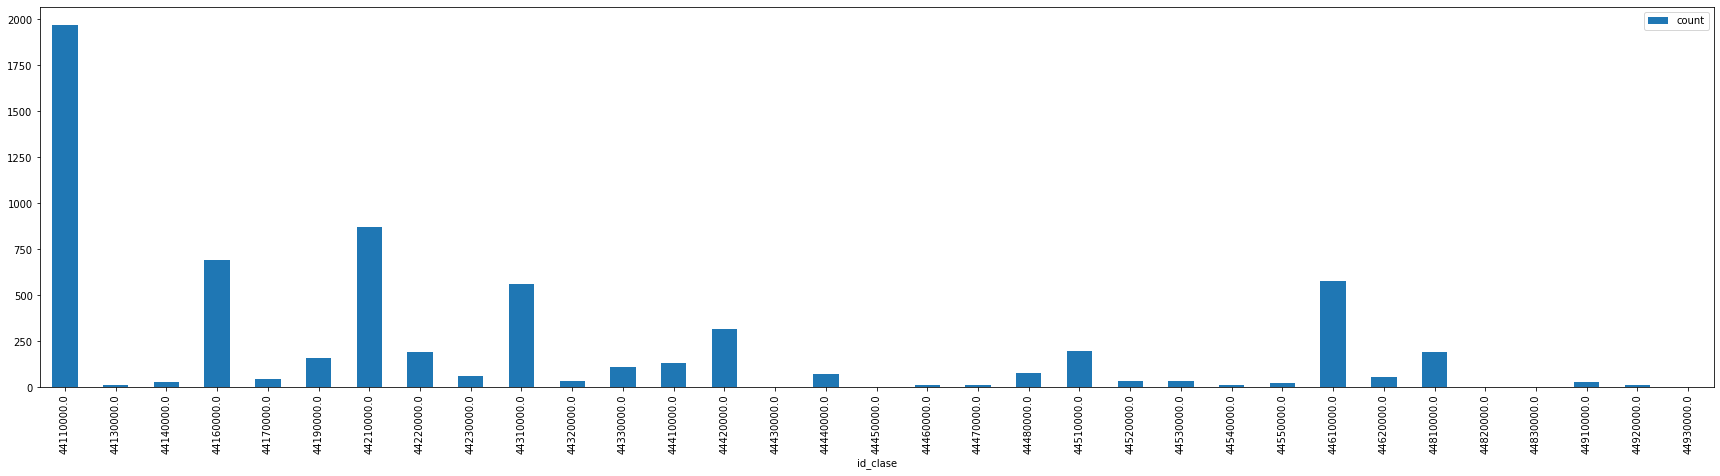

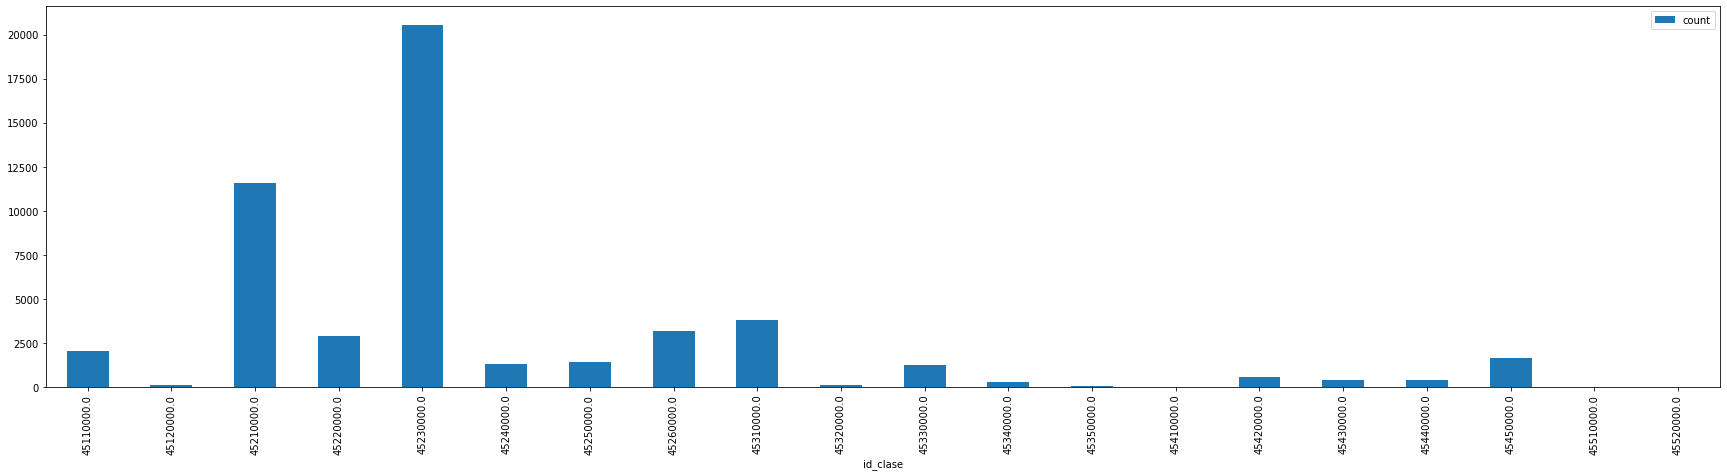

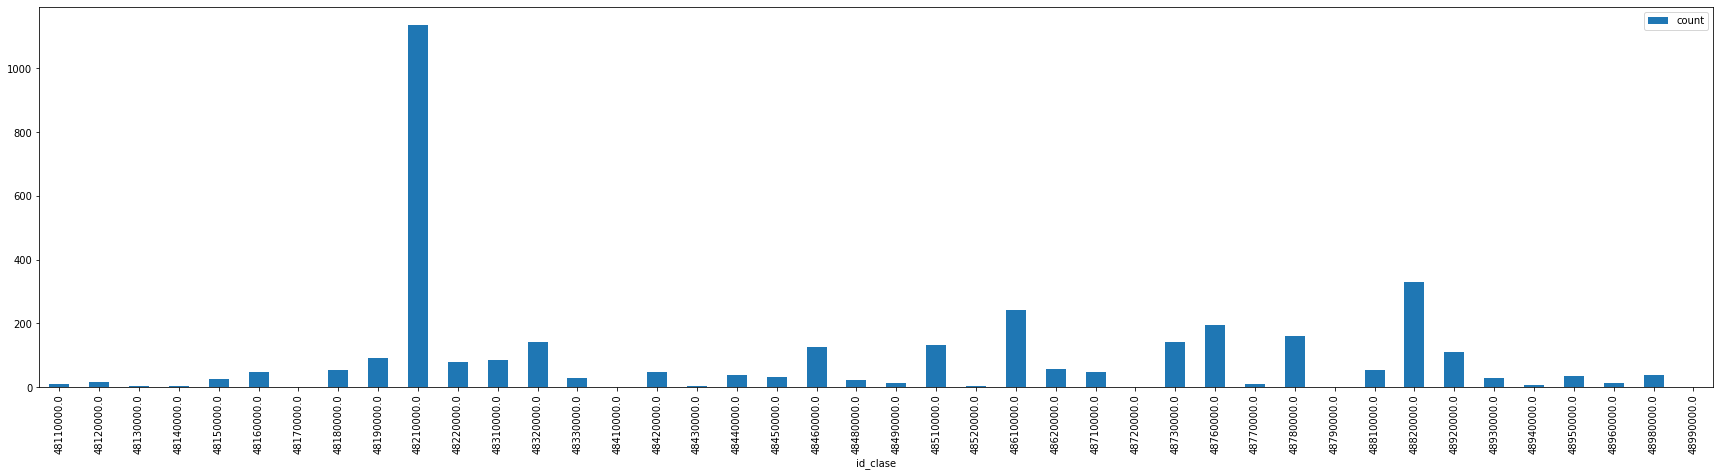

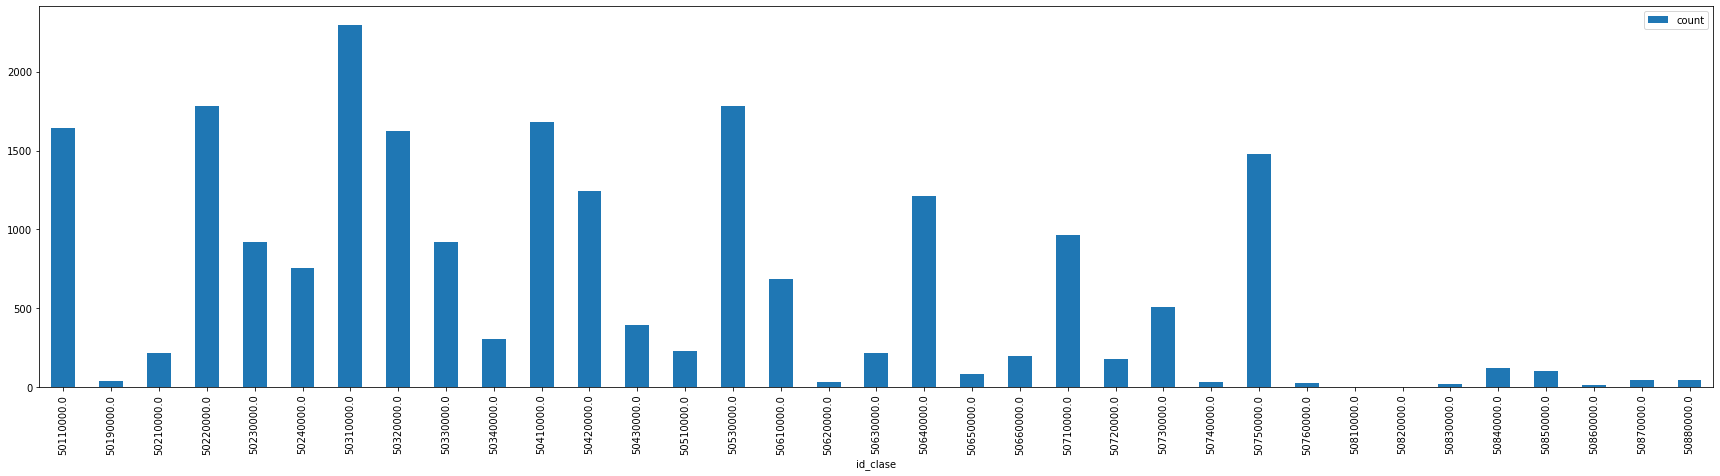

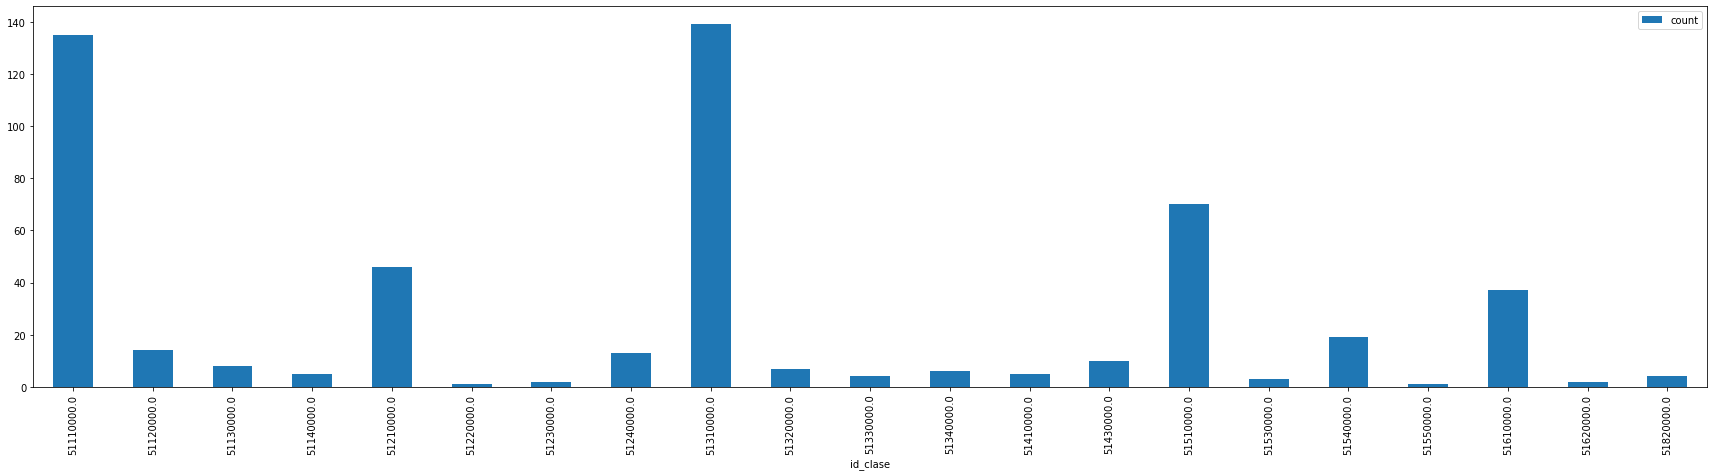

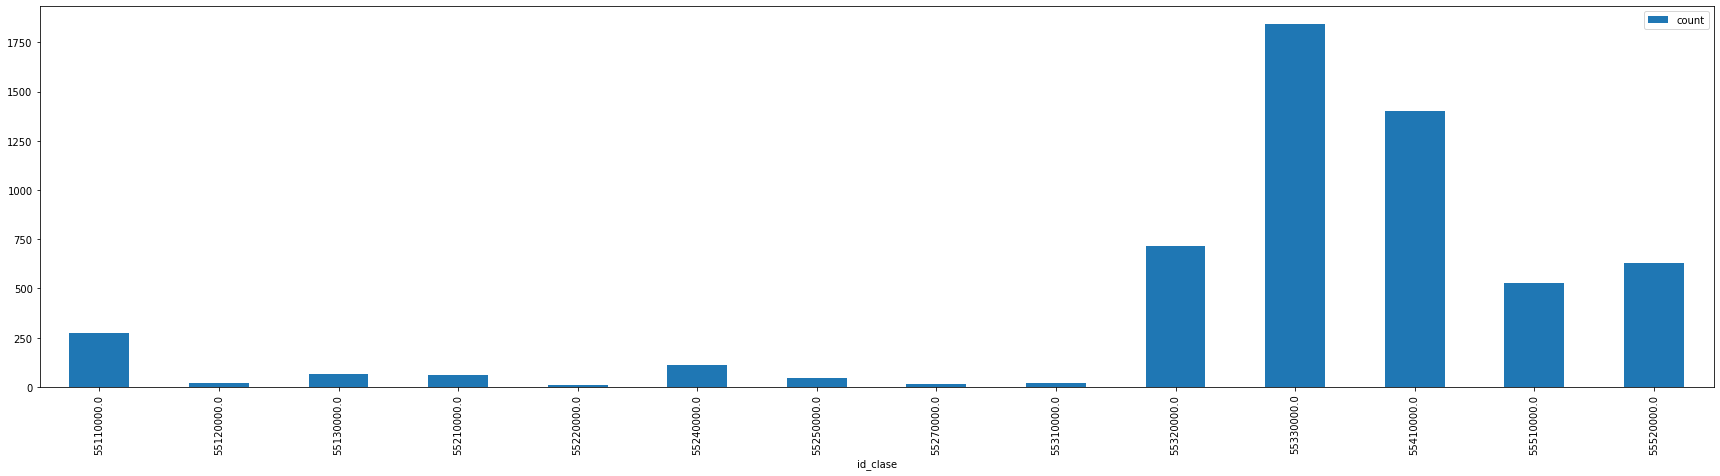

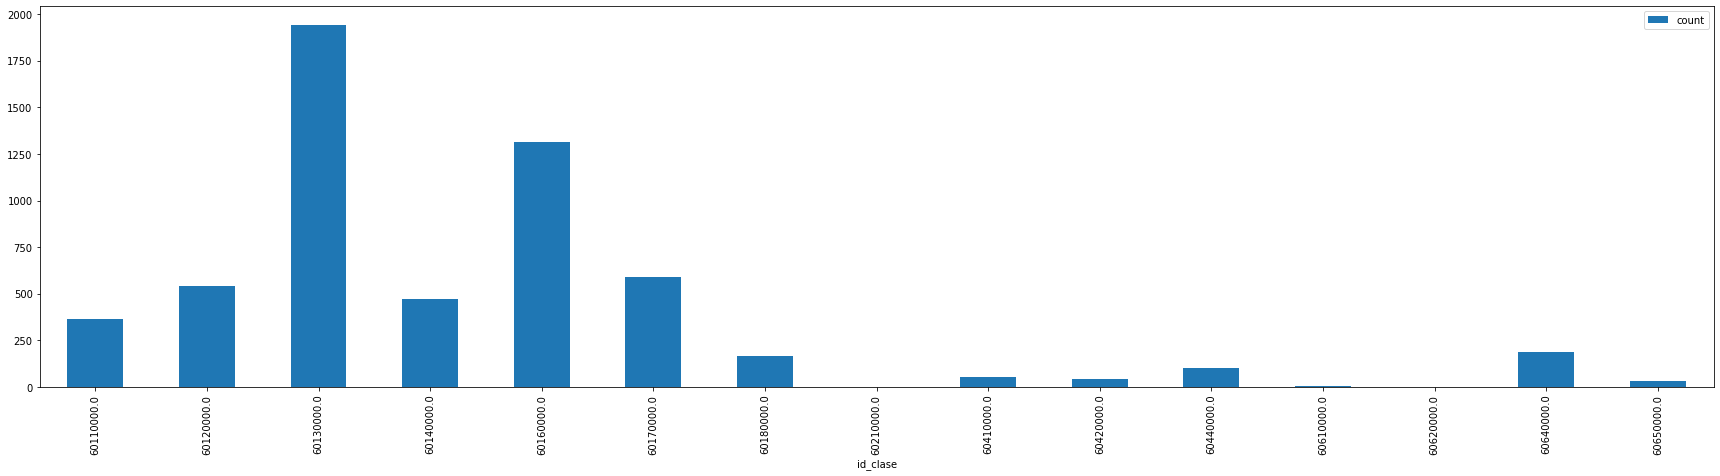

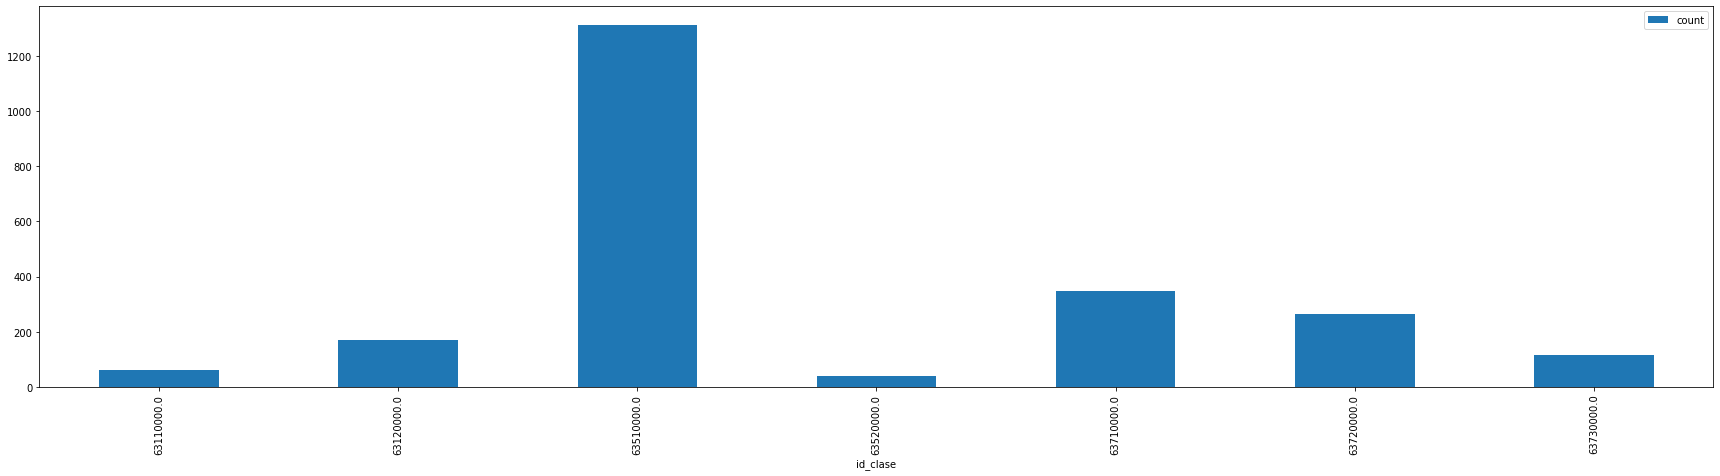

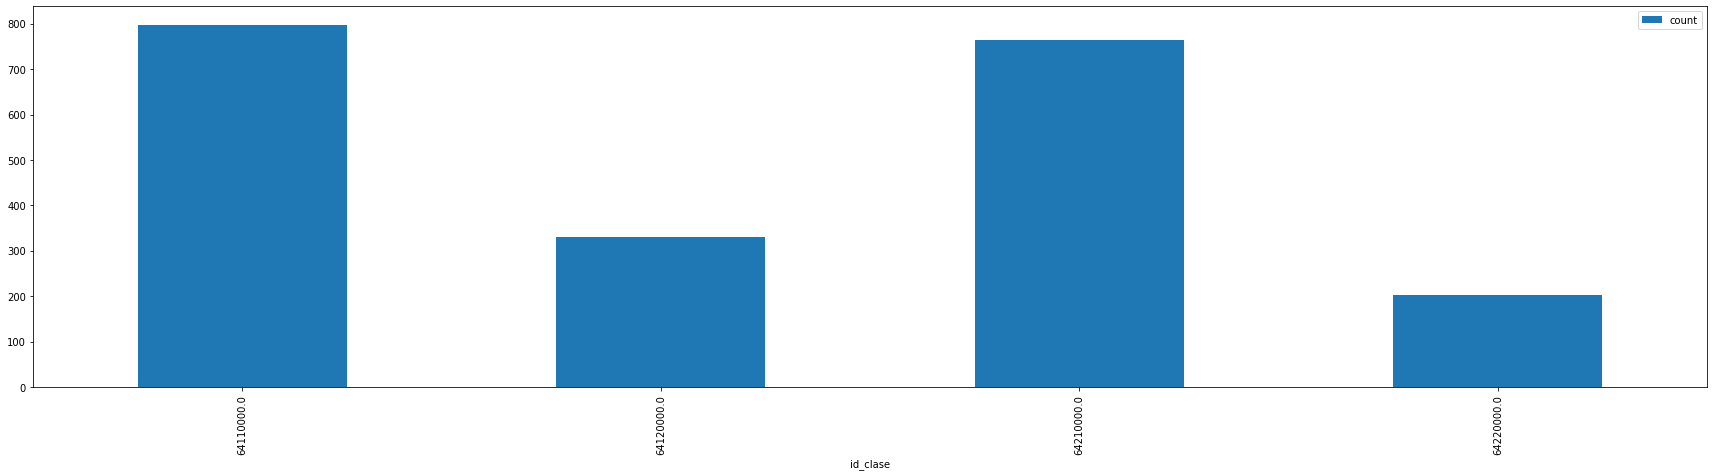

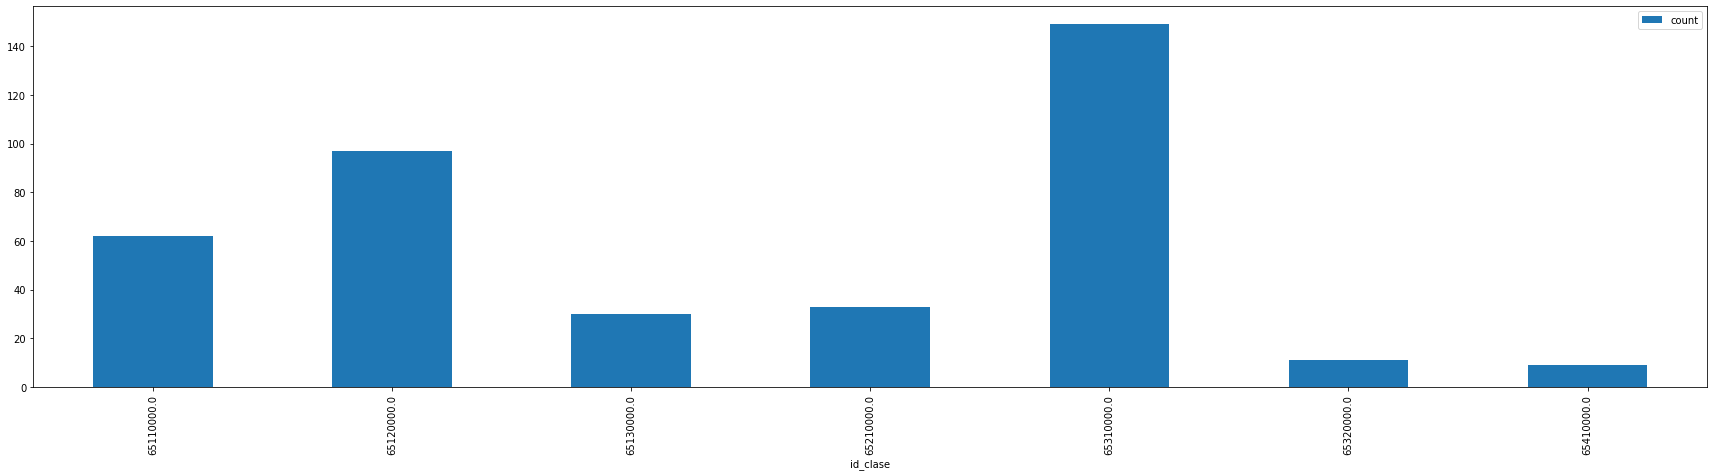

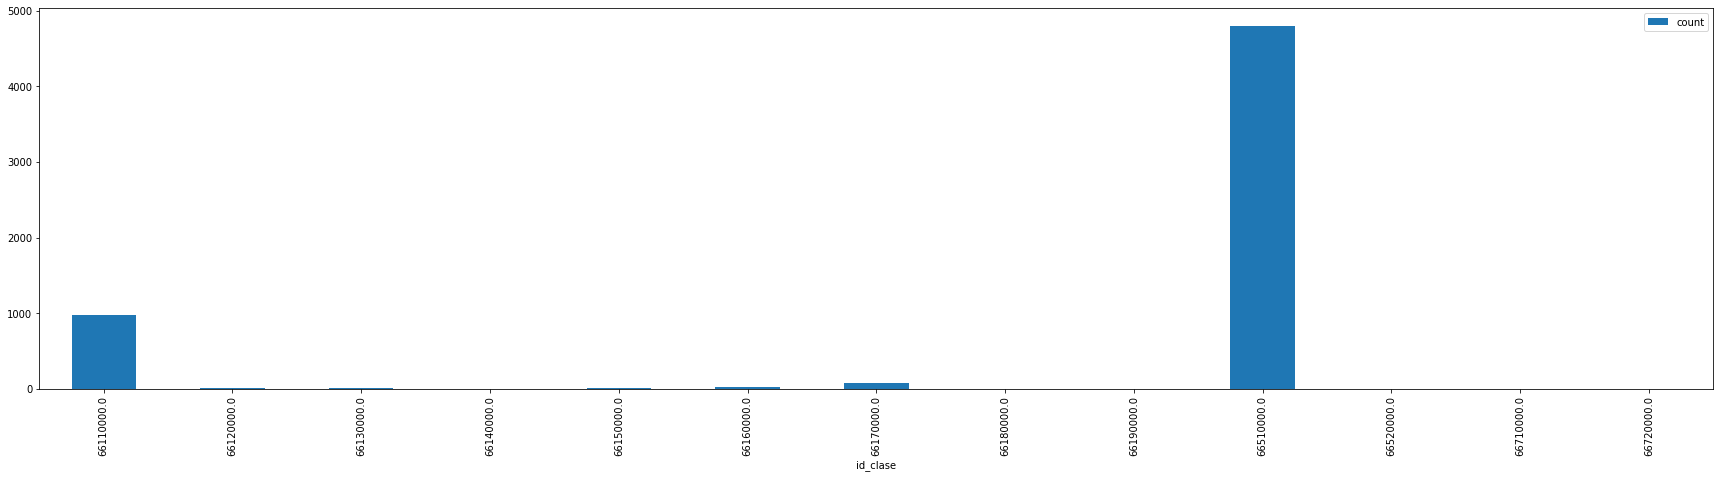

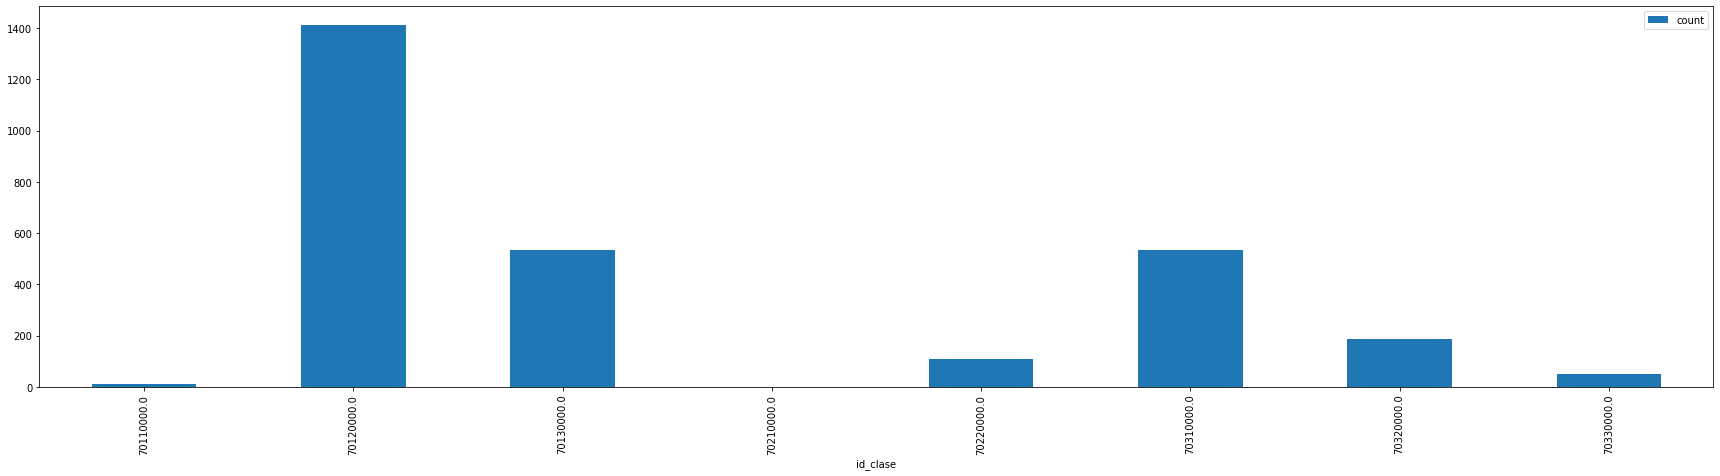

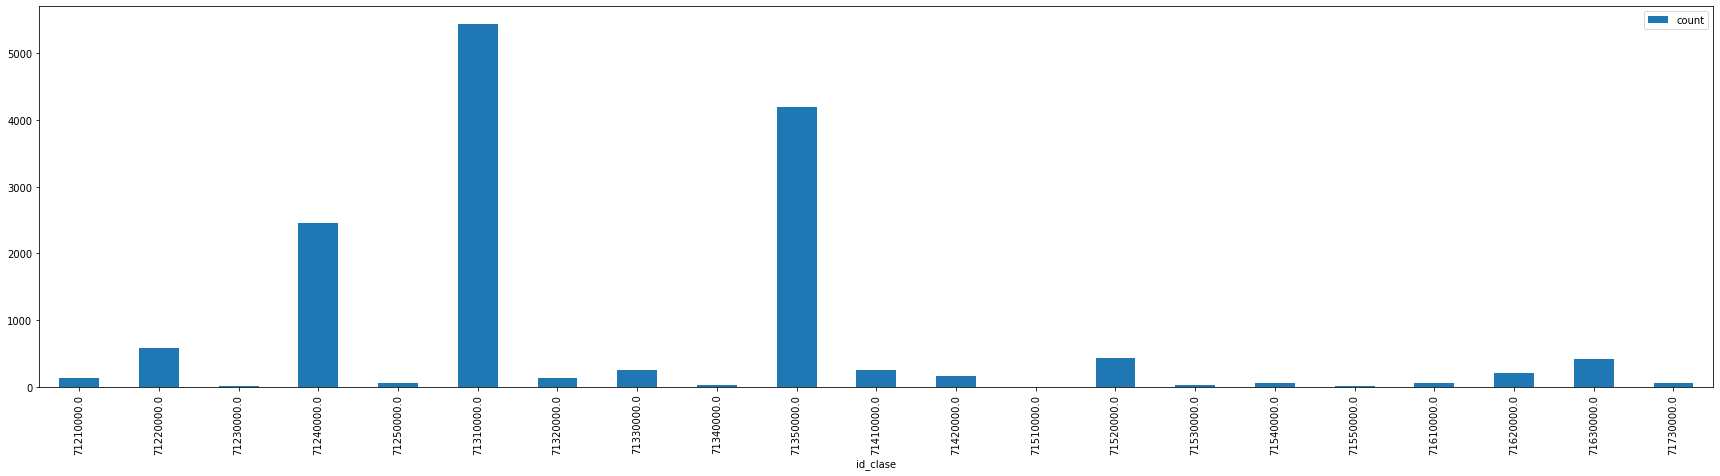

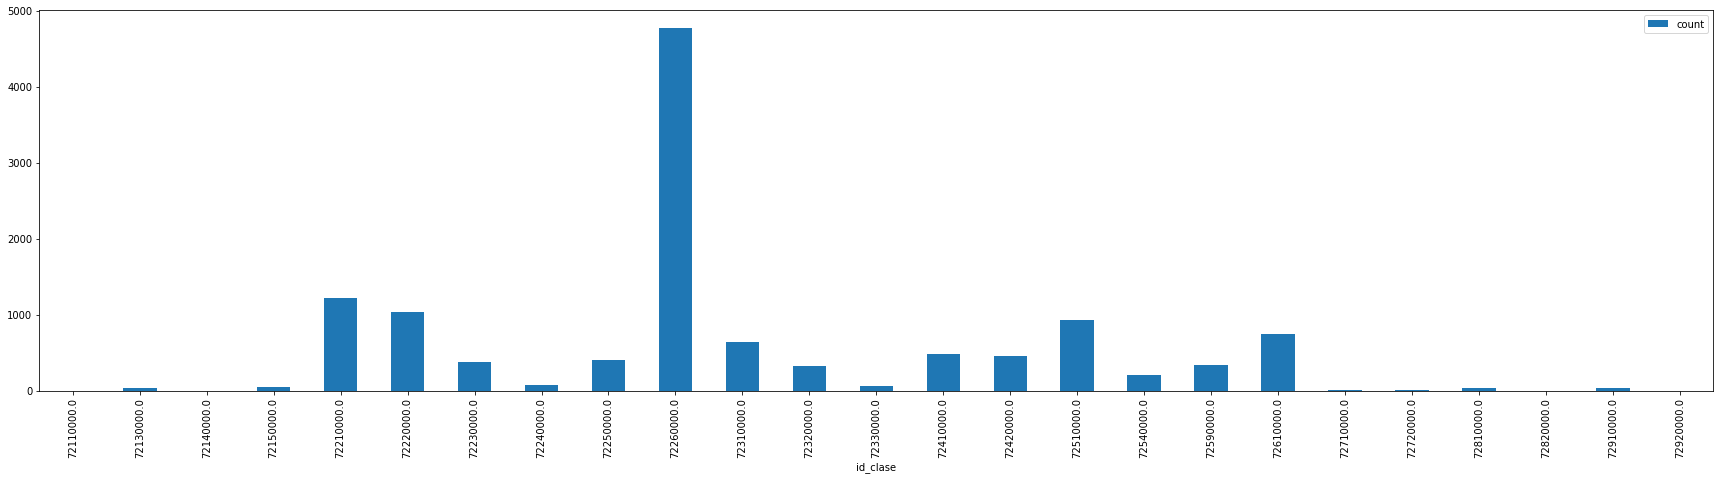

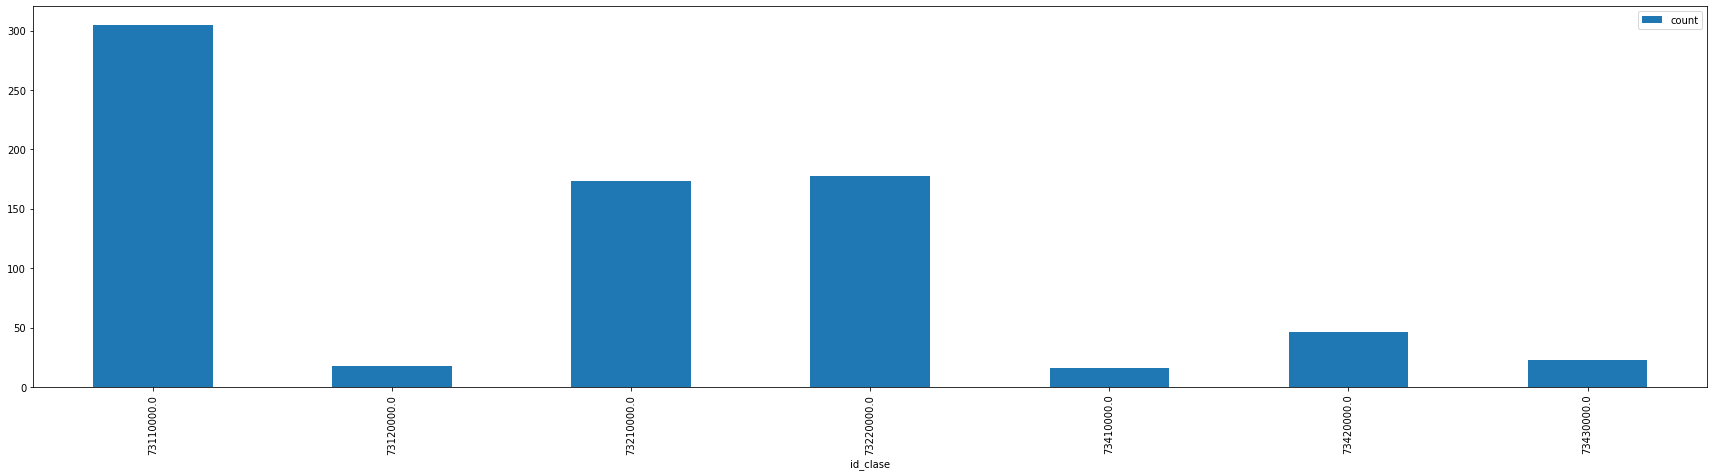

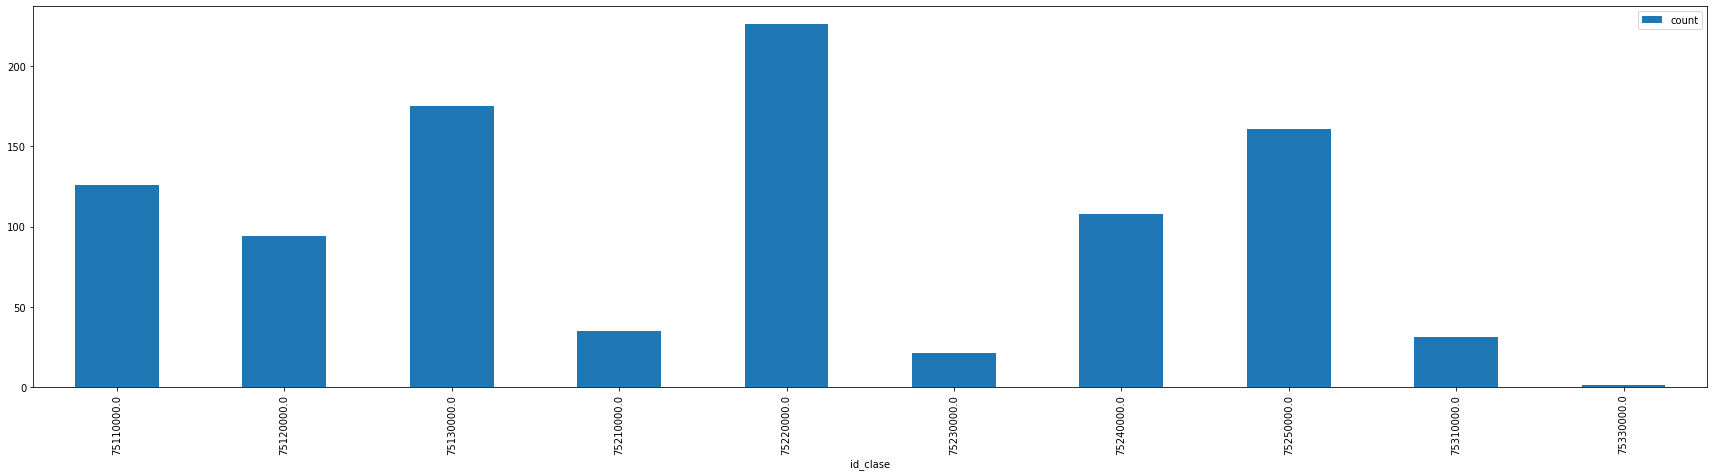

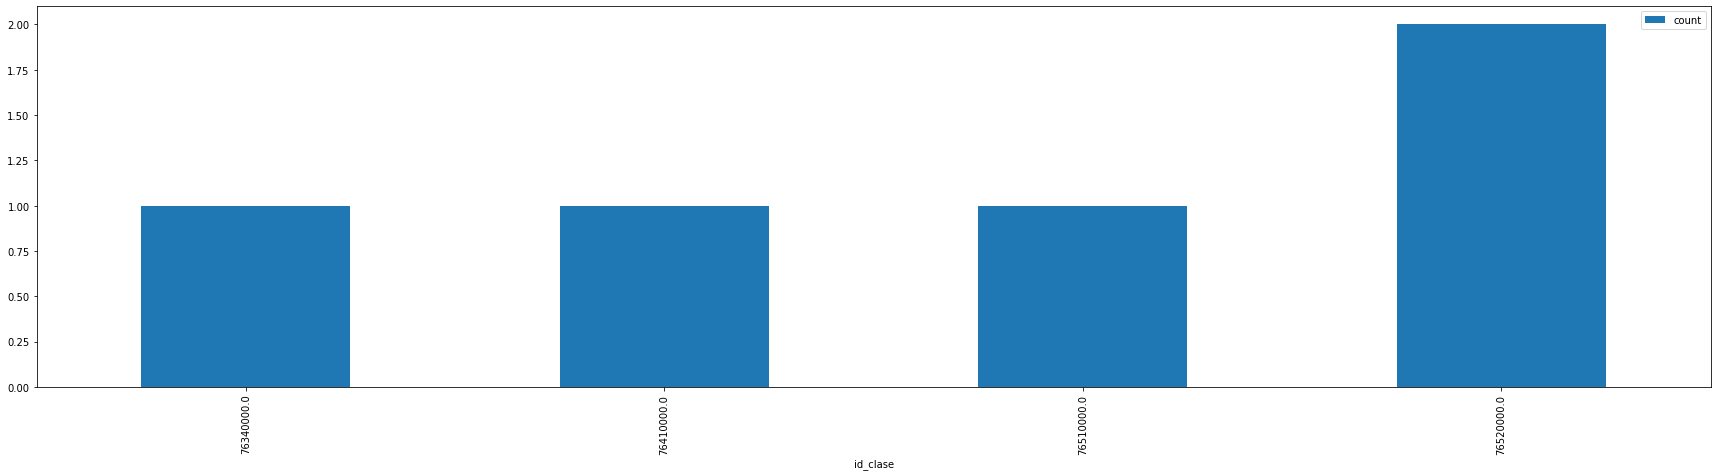

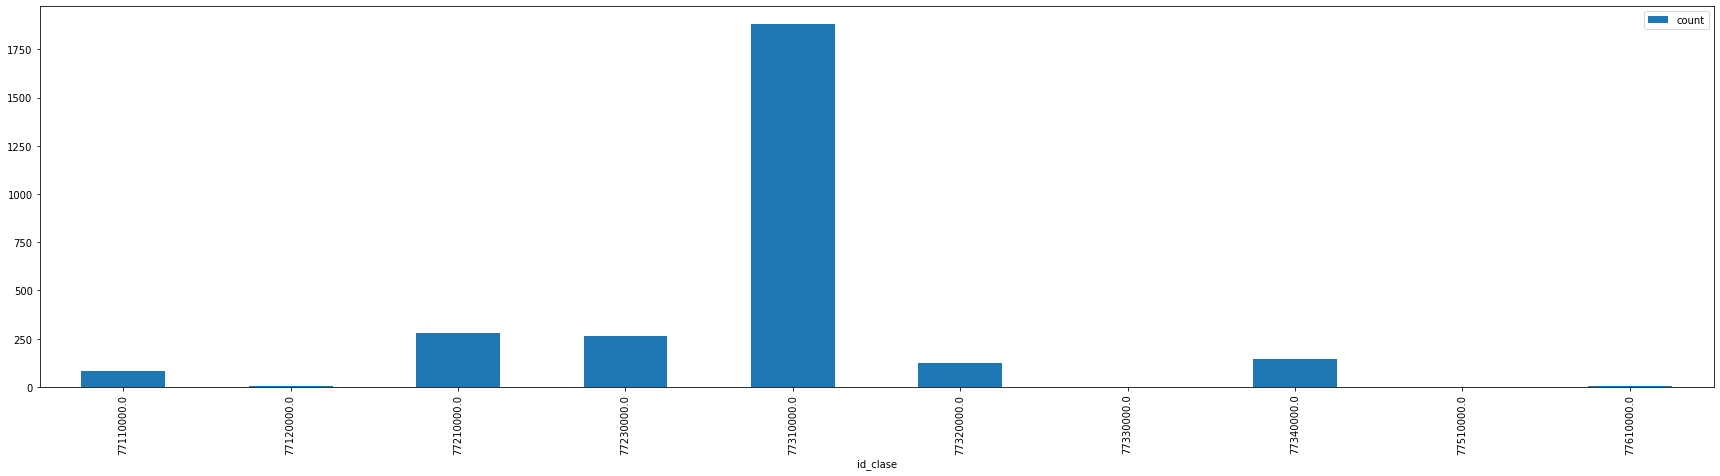

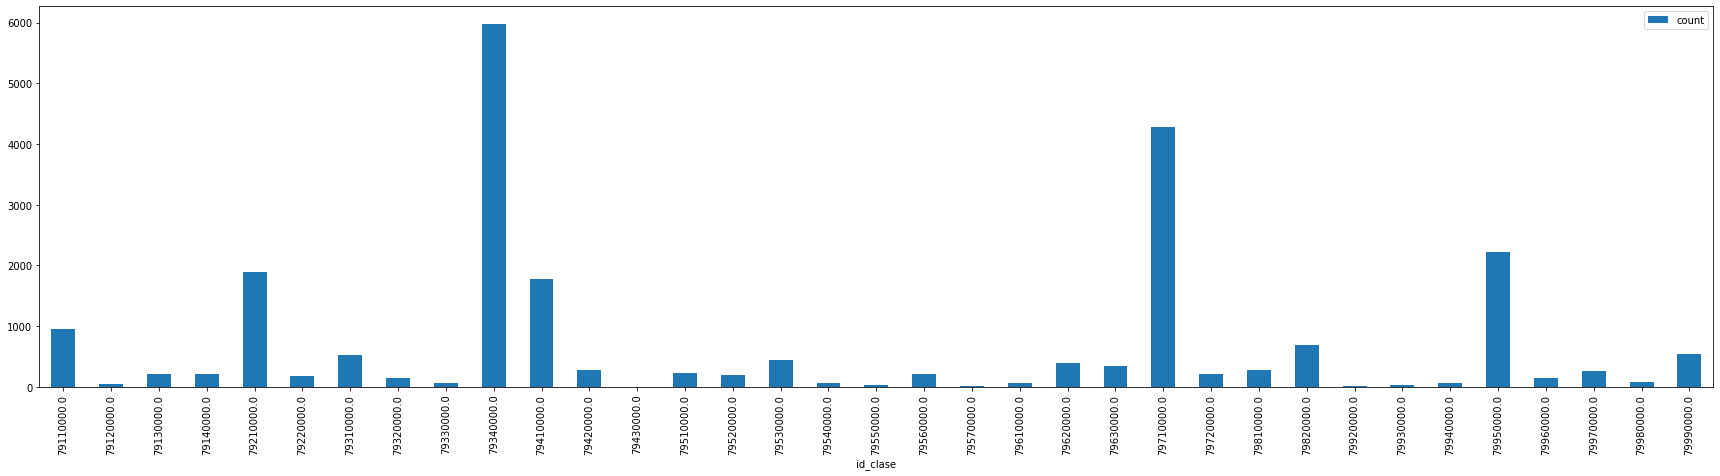

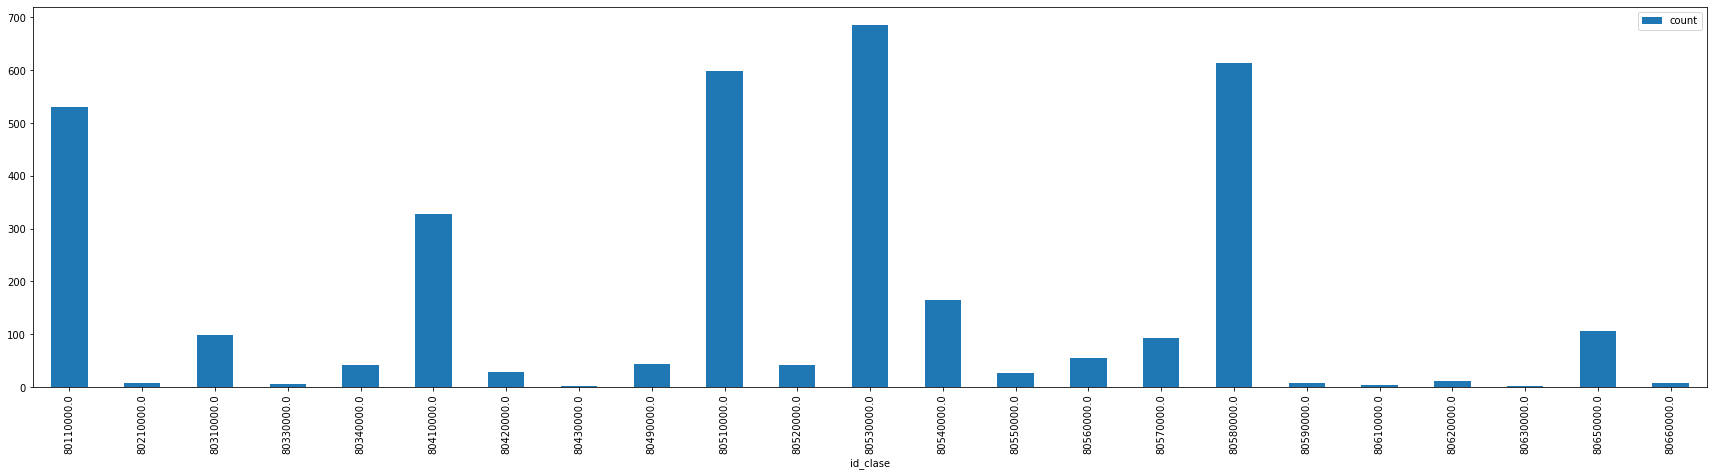

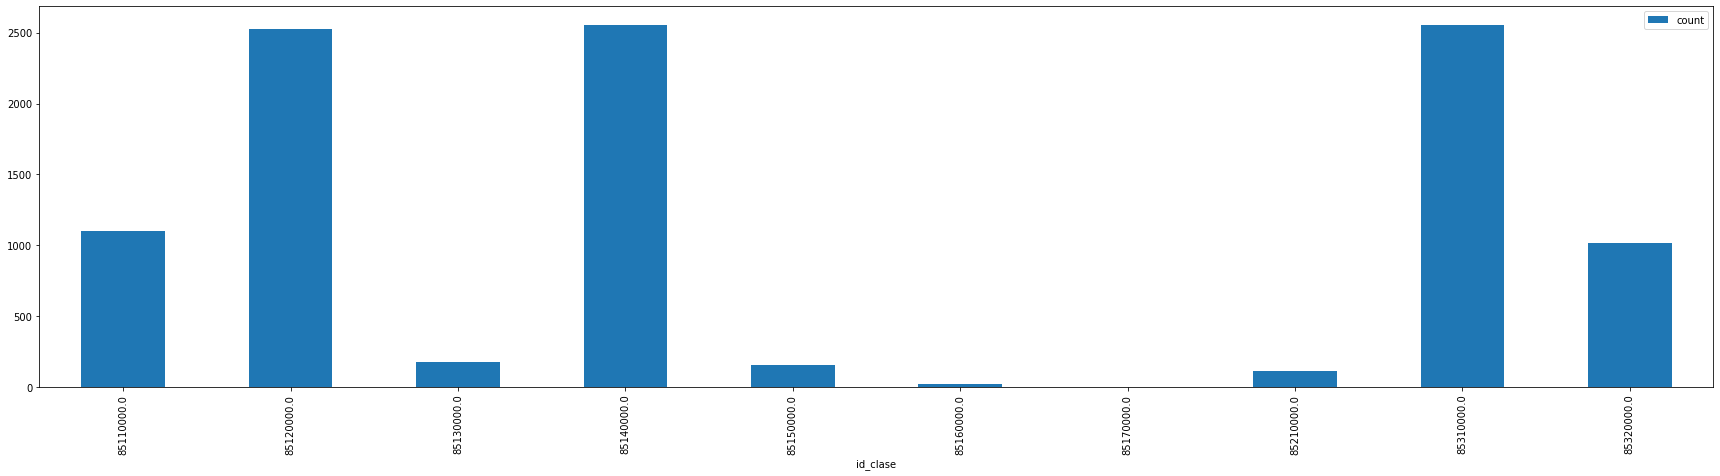

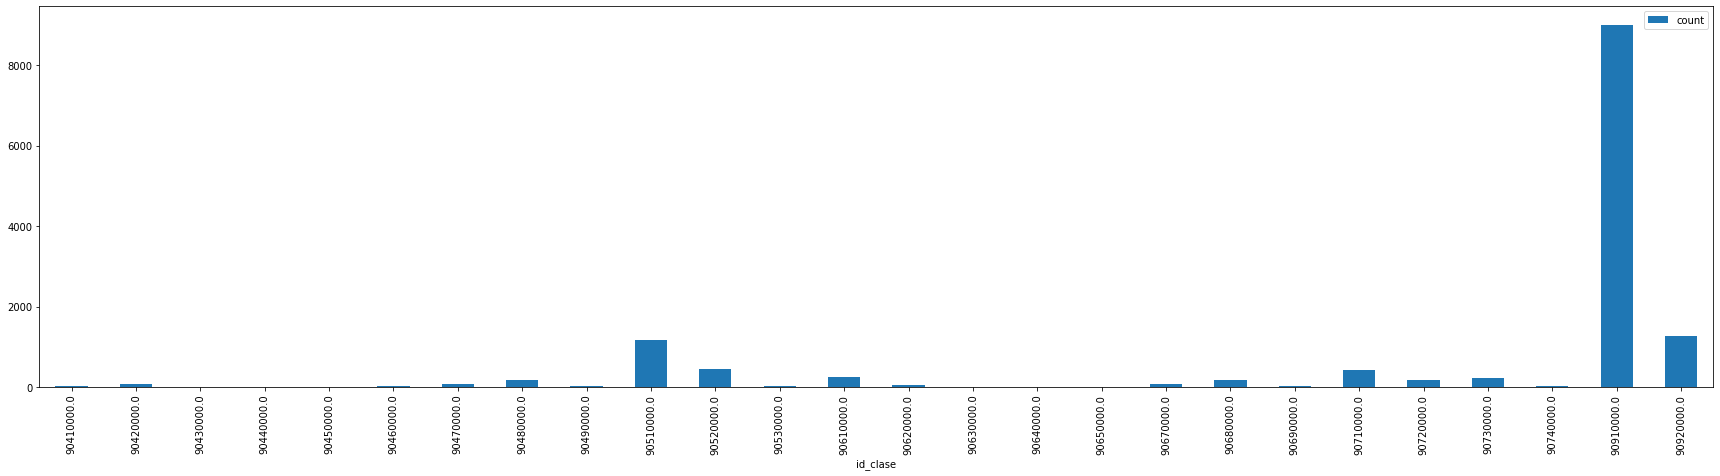

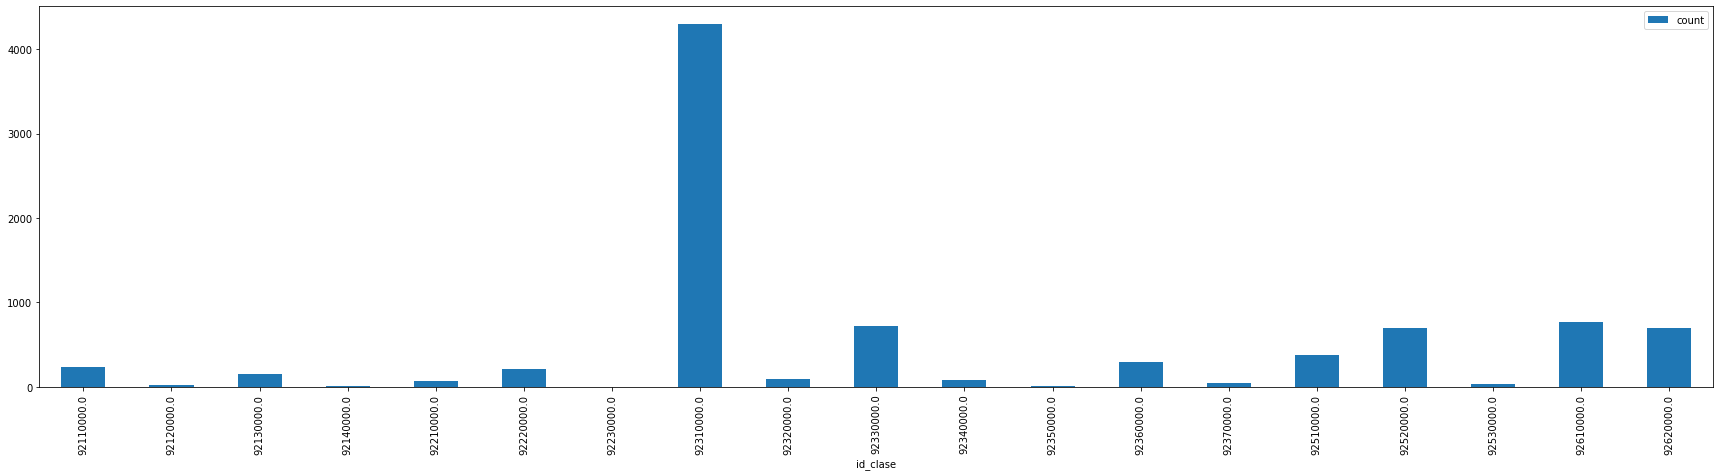

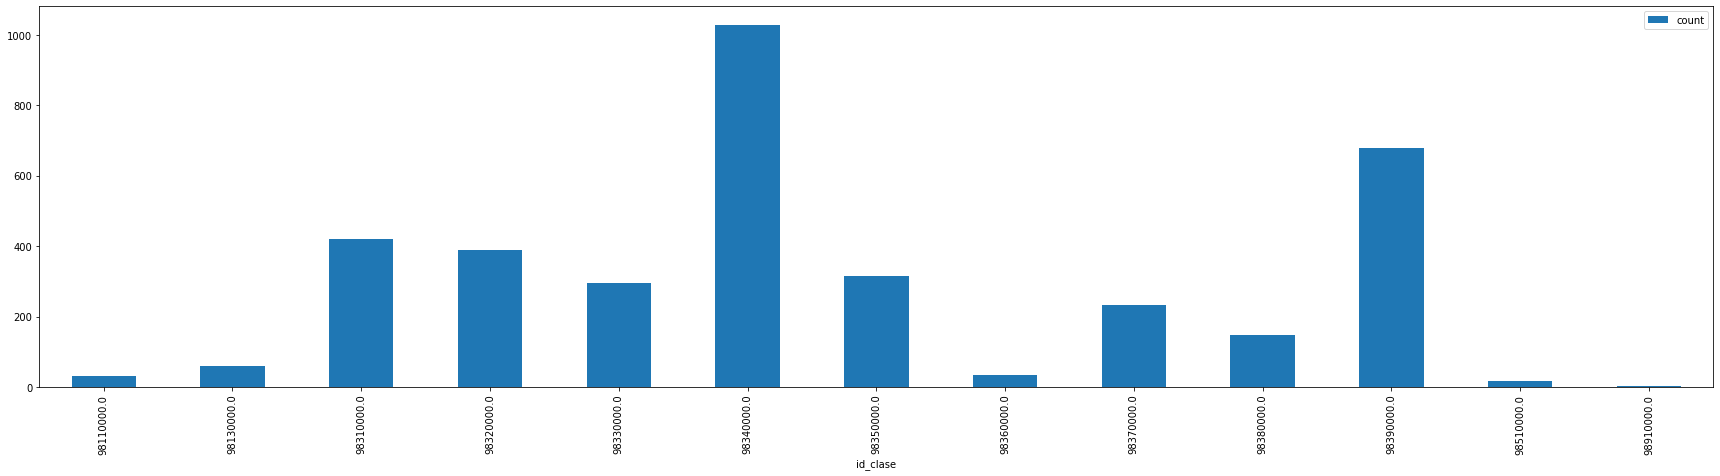

In [ ]:
#¿Cuántas licitaciones hay por cada clase? 
df.groupby(['id_division', 'id_grupo', 'id_clase']).size().reset_index(name='count').groupby(['id_division']).plot(x='id_clase', y='count', kind='bar', figsize=(30,7))

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


id_division
3000000     AxesSubplot(0.125,0.125;0.775x0.755)
9000000     AxesSubplot(0.125,0.125;0.775x0.755)
14000000    AxesSubplot(0.125,0.125;0.775x0.755)
15000000    AxesSubplot(0.125,0.125;0.775x0.755)
16000000    AxesSubplot(0.125,0.125;0.775x0.755)
18000000    AxesSubplot(0.125,0.125;0.775x0.755)
19000000    AxesSubplot(0.125,0.125;0.775x0.755)
22000000    AxesSubplot(0.125,0.125;0.775x0.755)
24000000    AxesSubplot(0.125,0.125;0.775x0.755)
30000000    AxesSubplot(0.125,0.125;0.775x0.755)
31000000    AxesSubplot(0.125,0.125;0.775x0.755)
32000000    AxesSubplot(0.125,0.125;0.775x0.755)
33000000    AxesSubplot(0.125,0.125;0.775x0.755)
34000000    AxesSubplot(0.125,0.125;0.775x0.755)
35000000    AxesSubplot(0.125,0.125;0.775x0.755)
37000000    AxesSubplot(0.125,0.125;0.775x0.755)
38000000    AxesSubplot(0.125,0.125;0.775x0.755)
39000000    AxesSubplot(0.125,0.125;0.775x0.755)
41000000    AxesSubplot(0.125,0.125;0.775x0.755)
42000000    AxesSubplot(0.125,0.125;0.775x0.755)
43000000

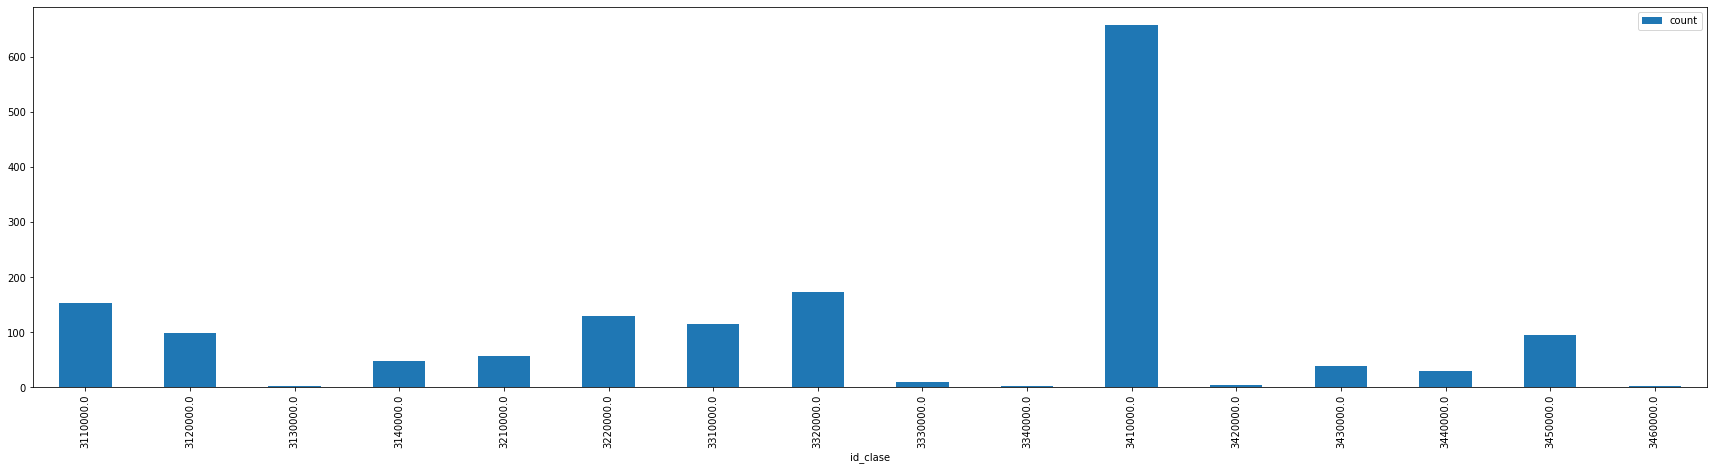

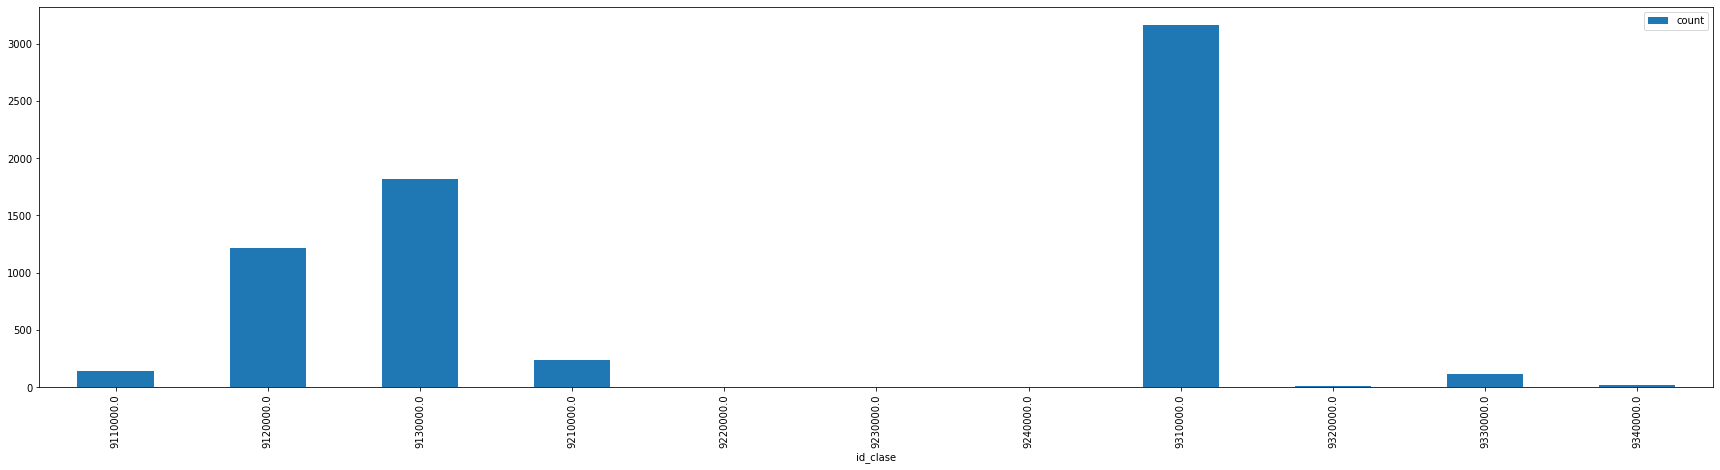

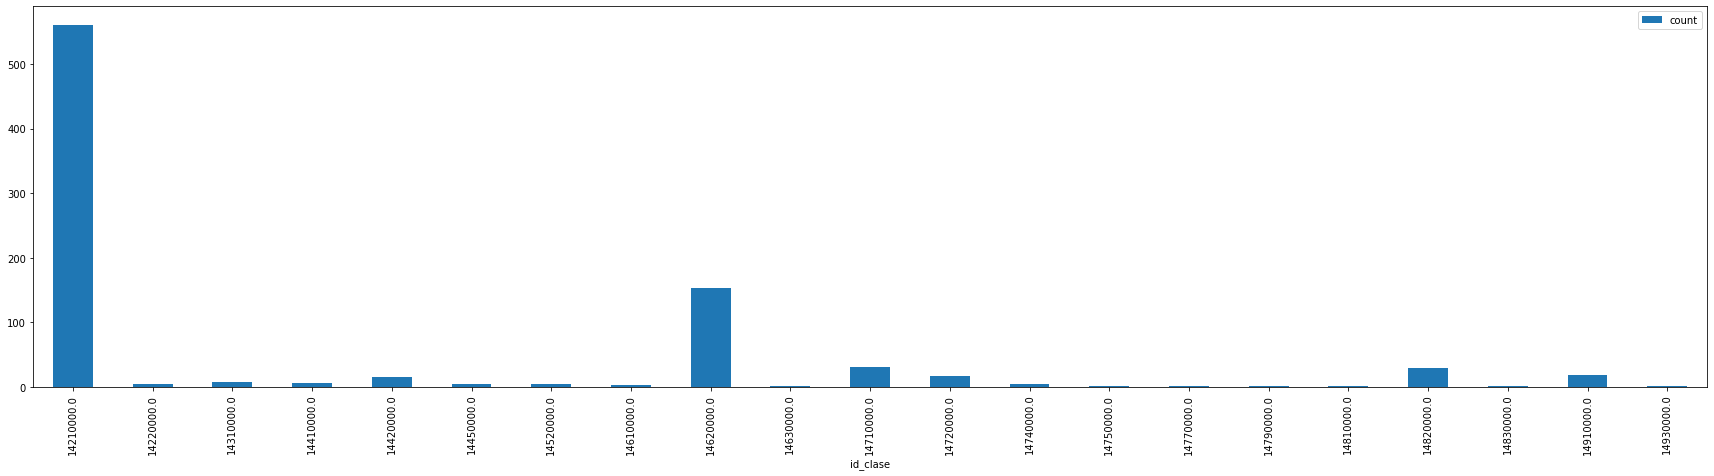

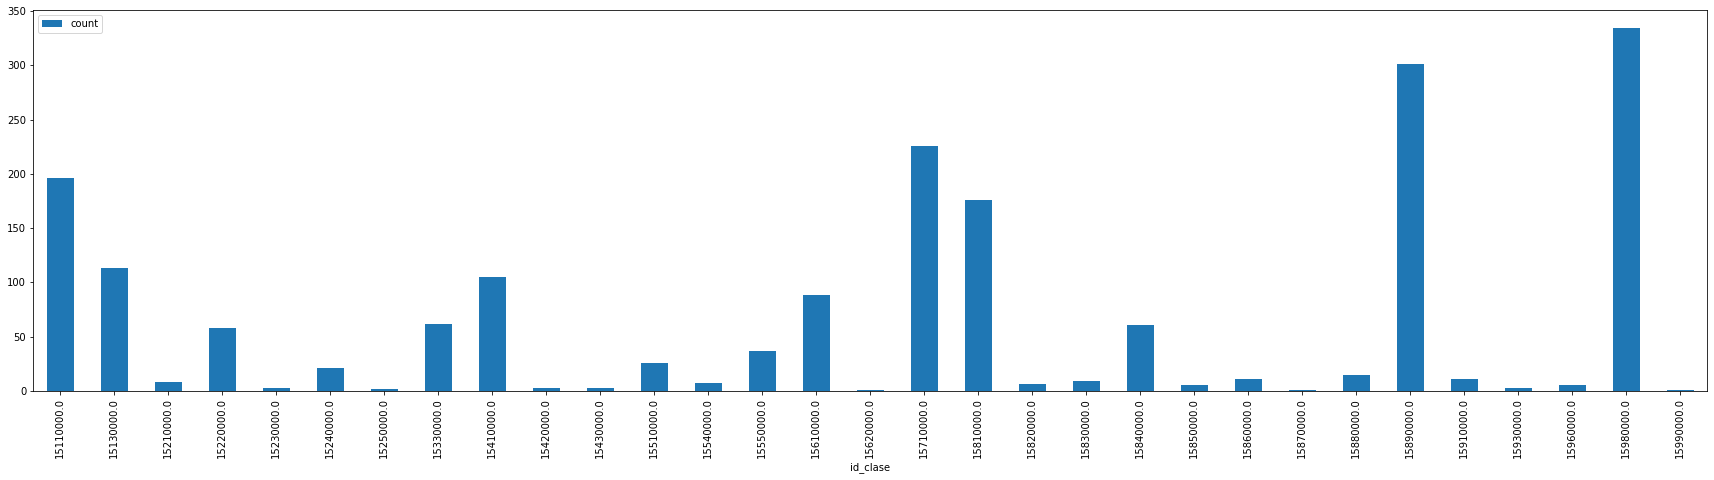

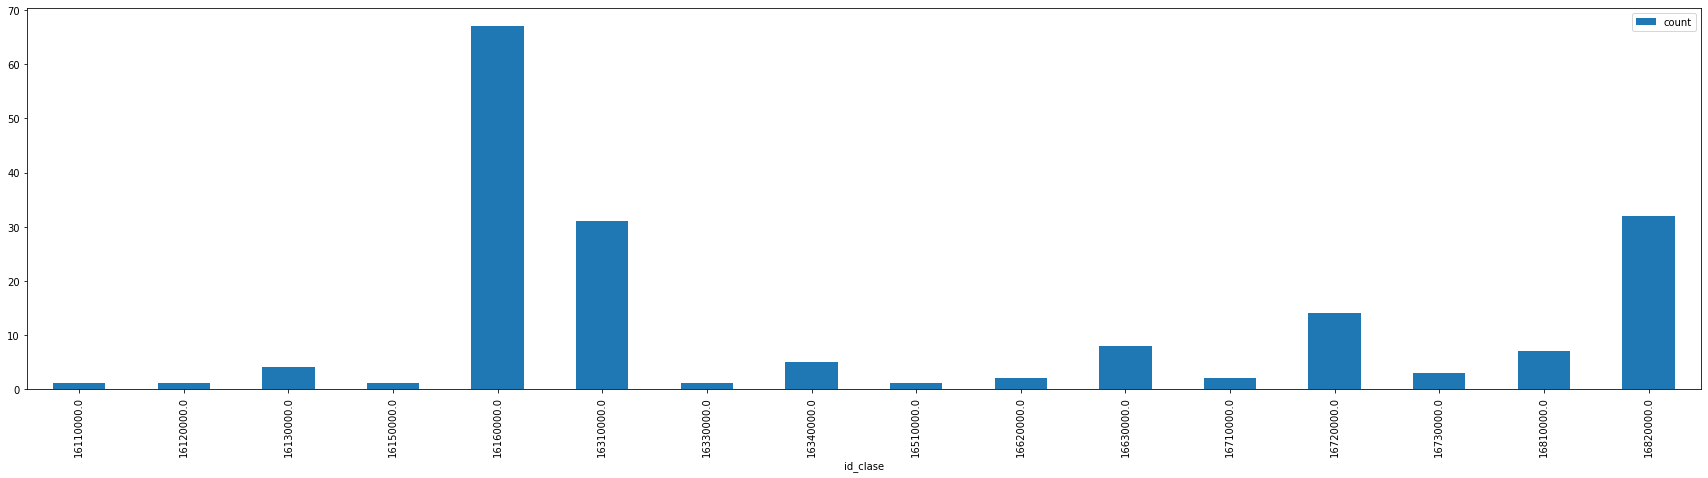

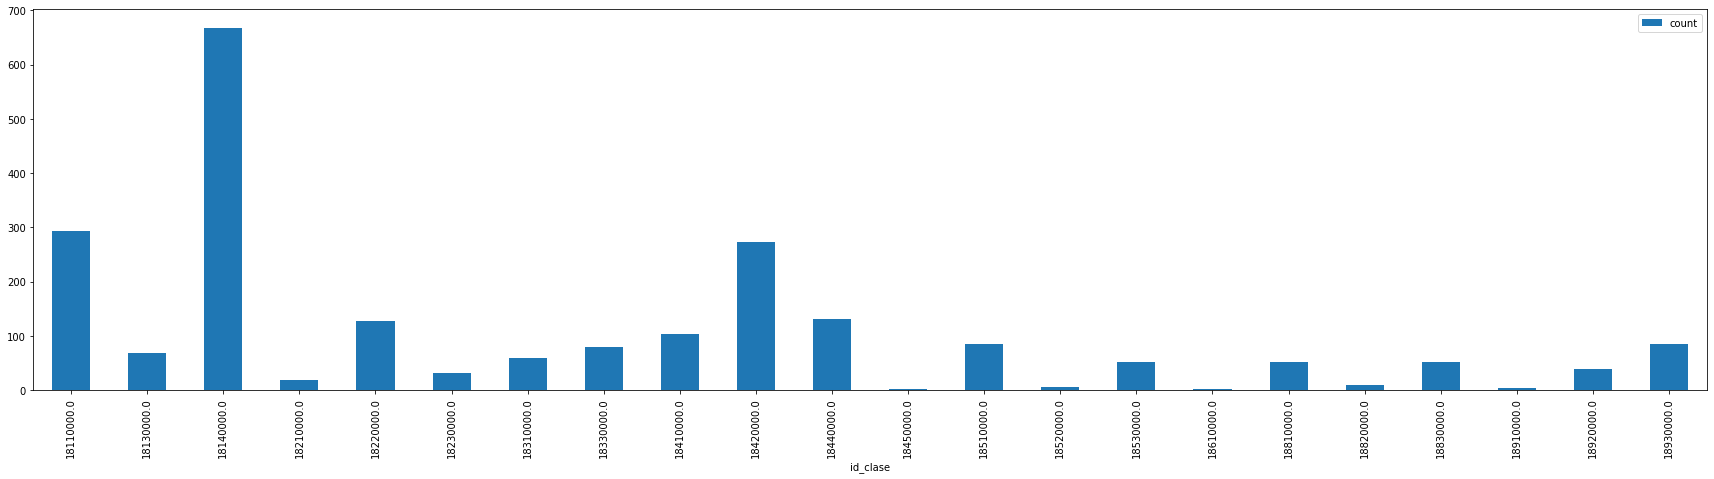

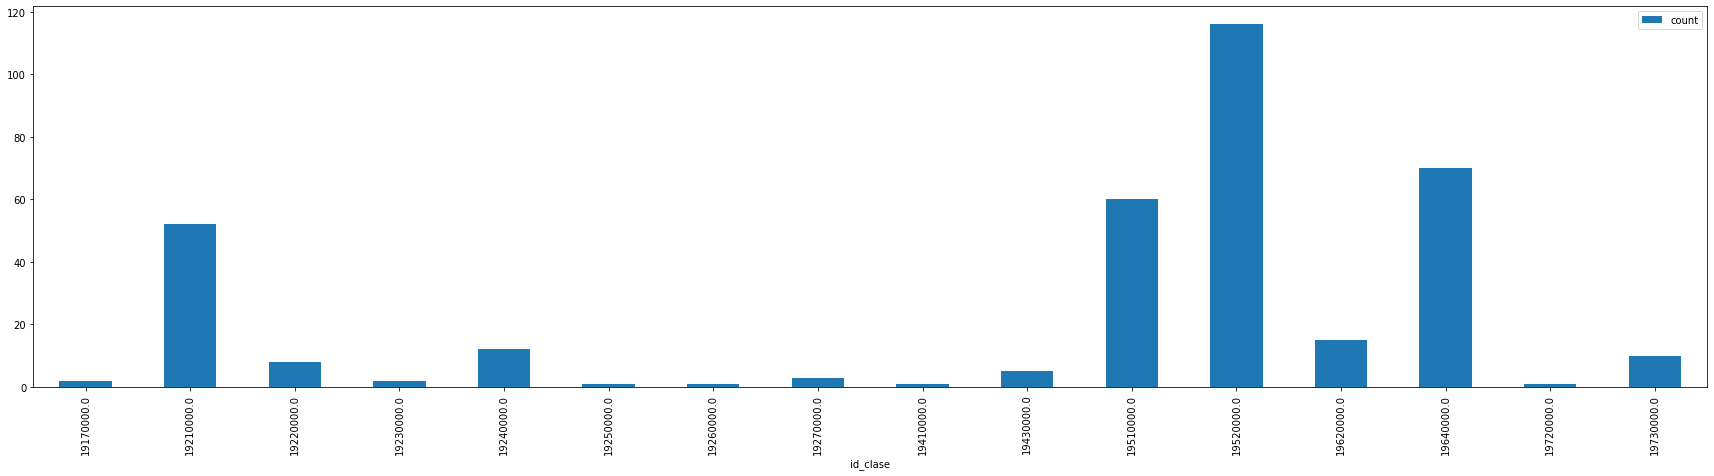

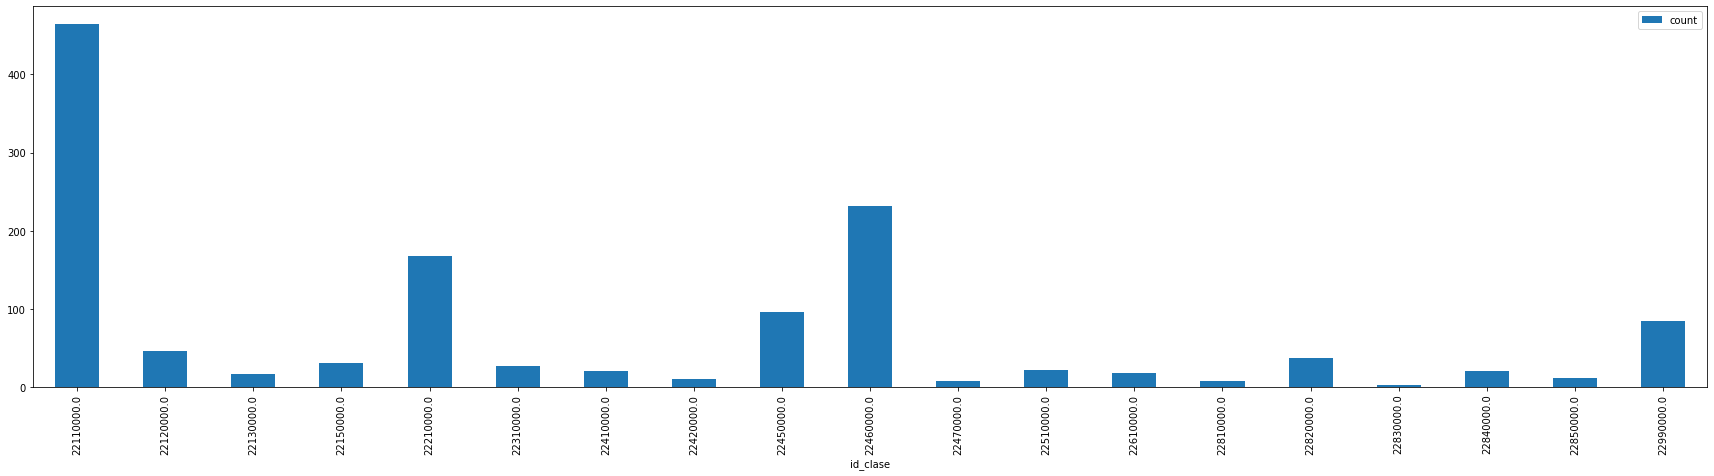

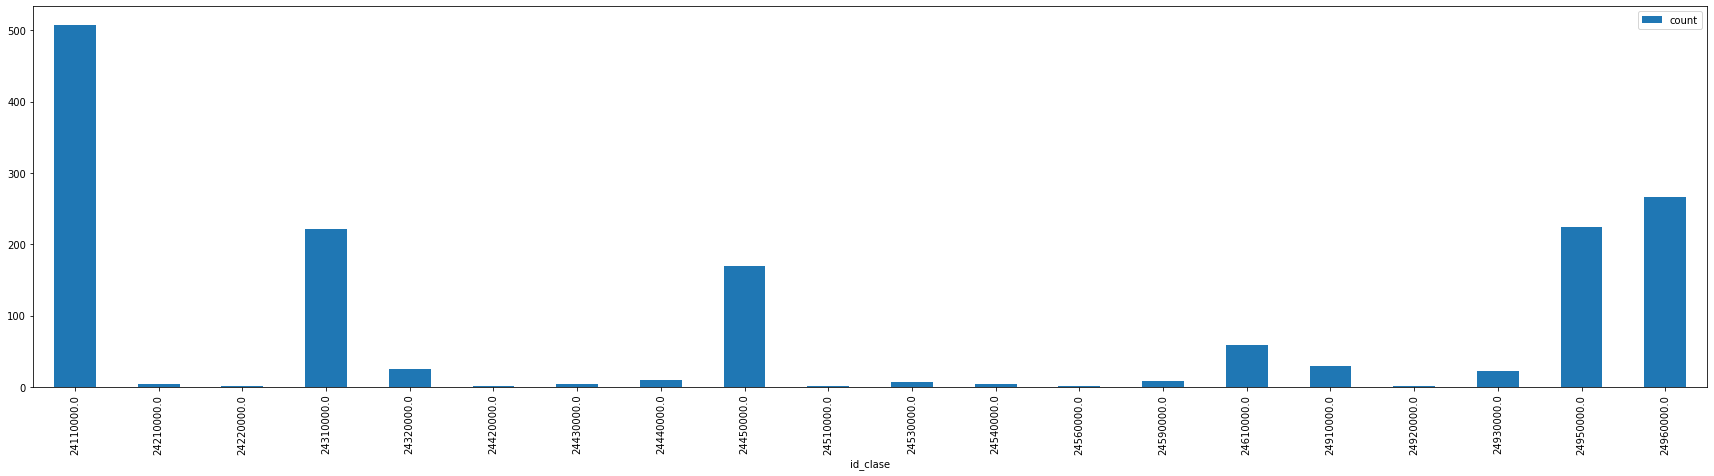

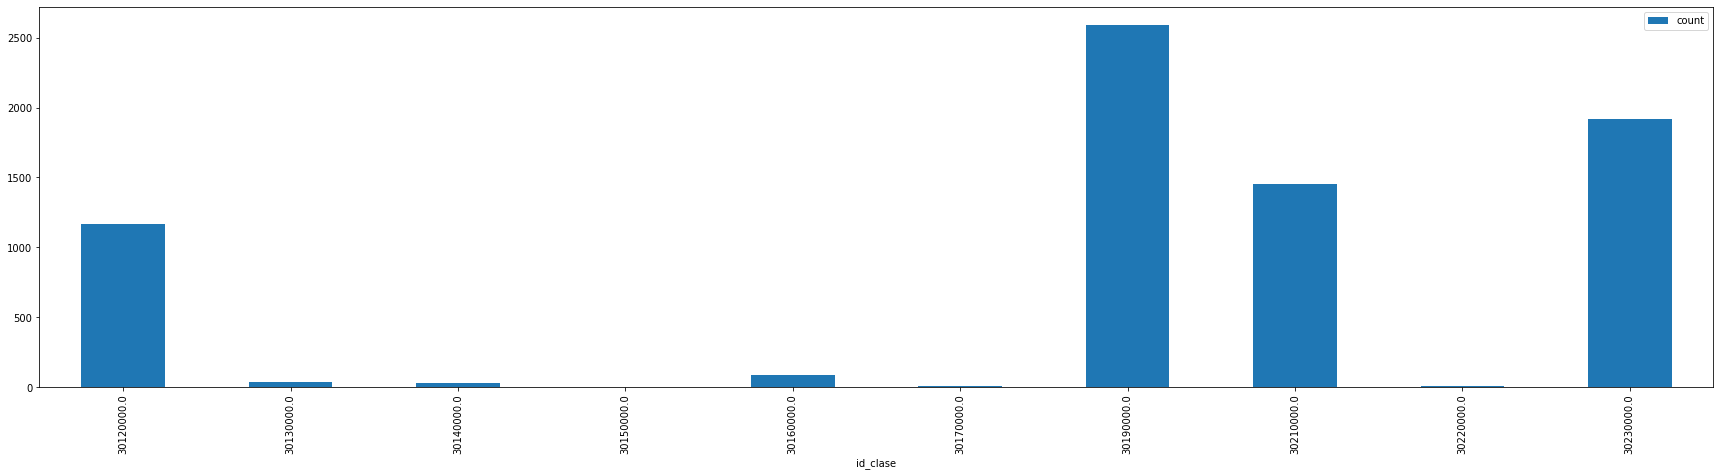

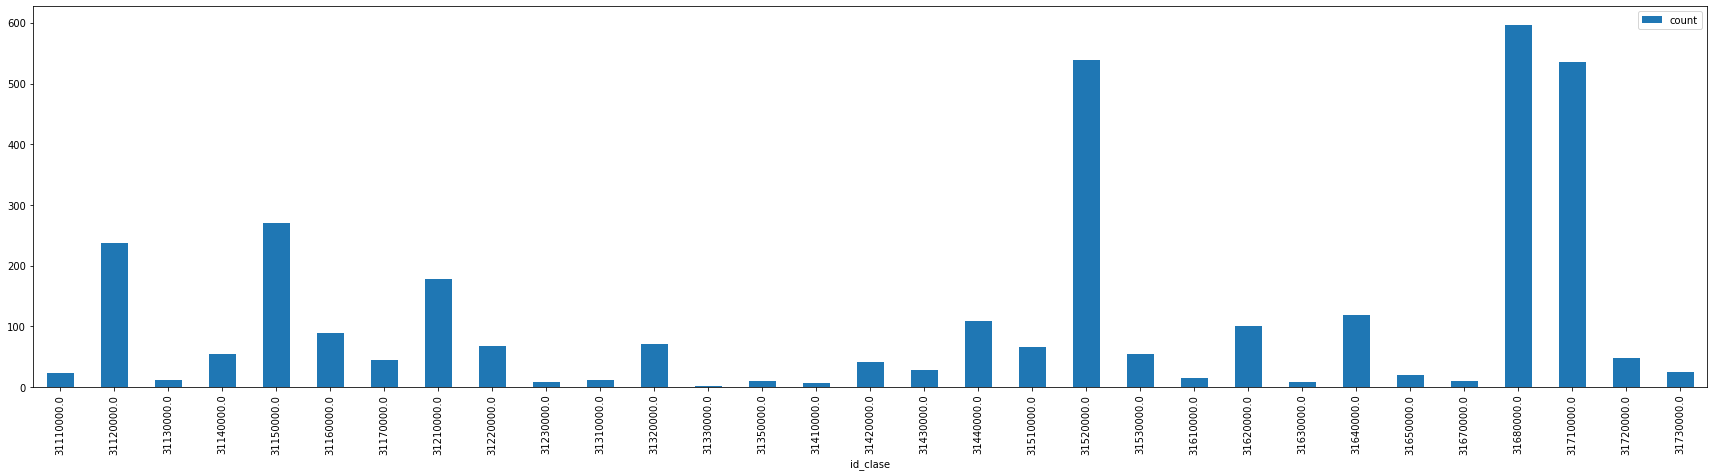

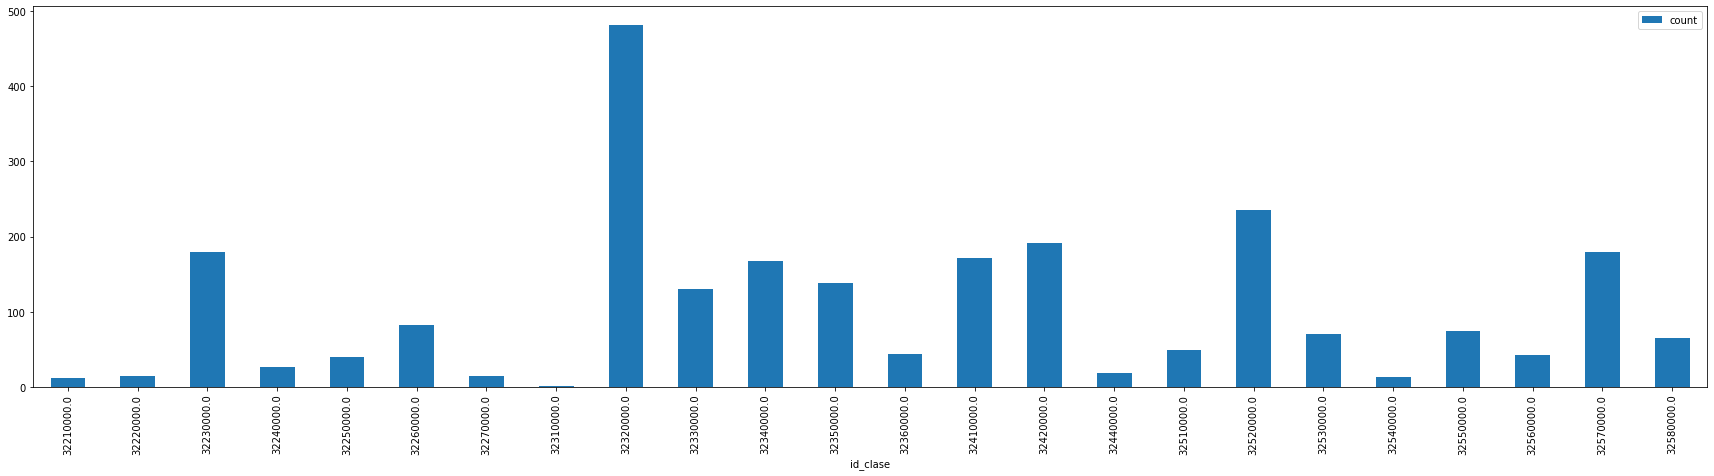

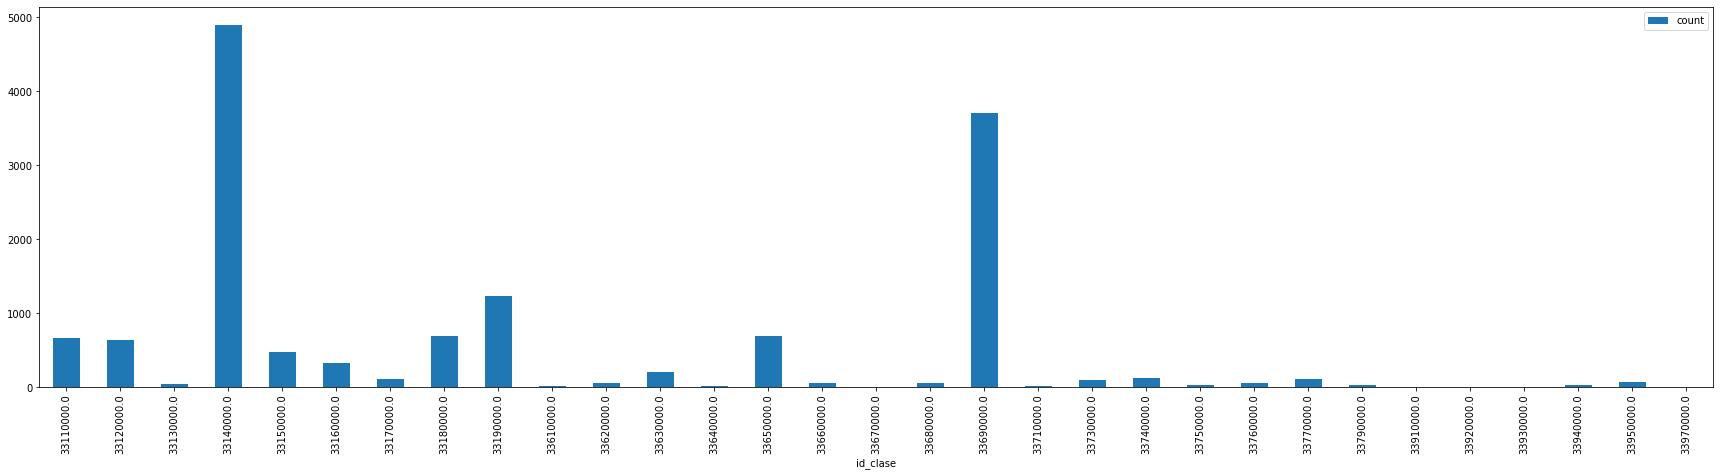

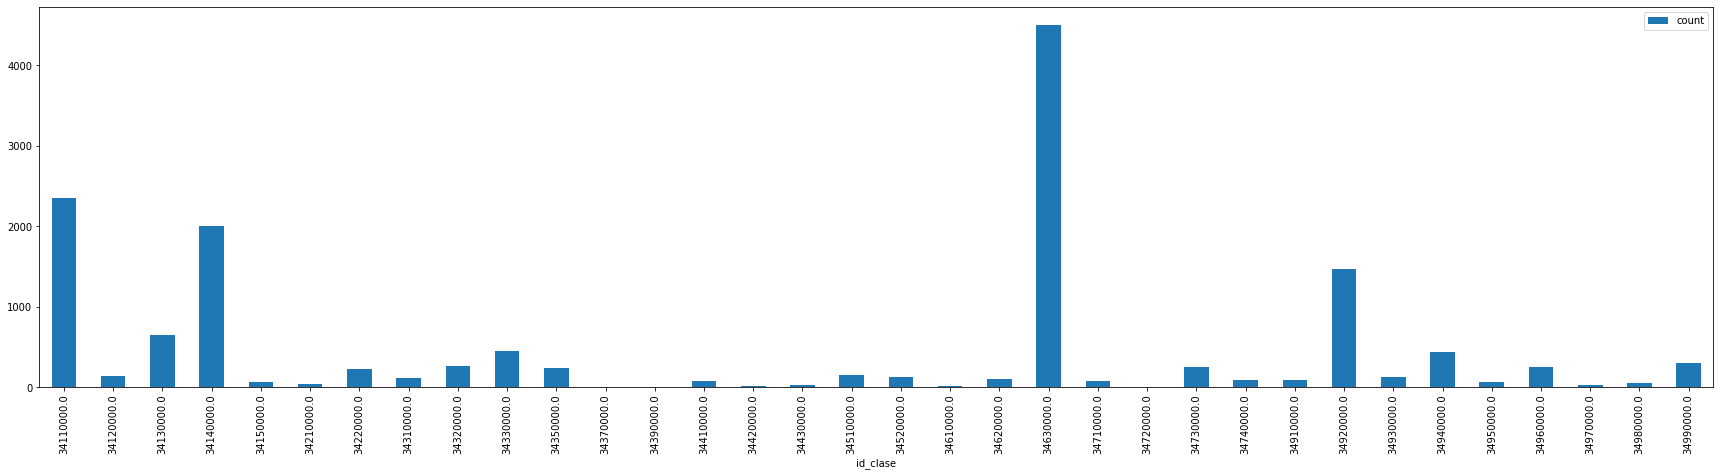

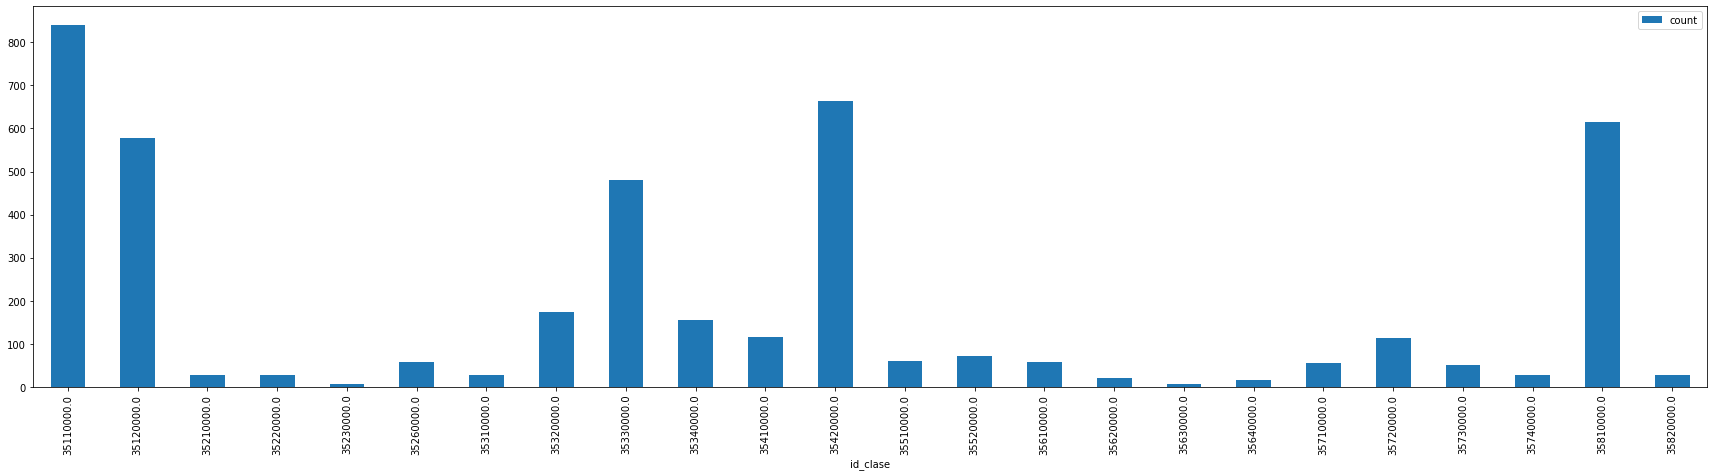

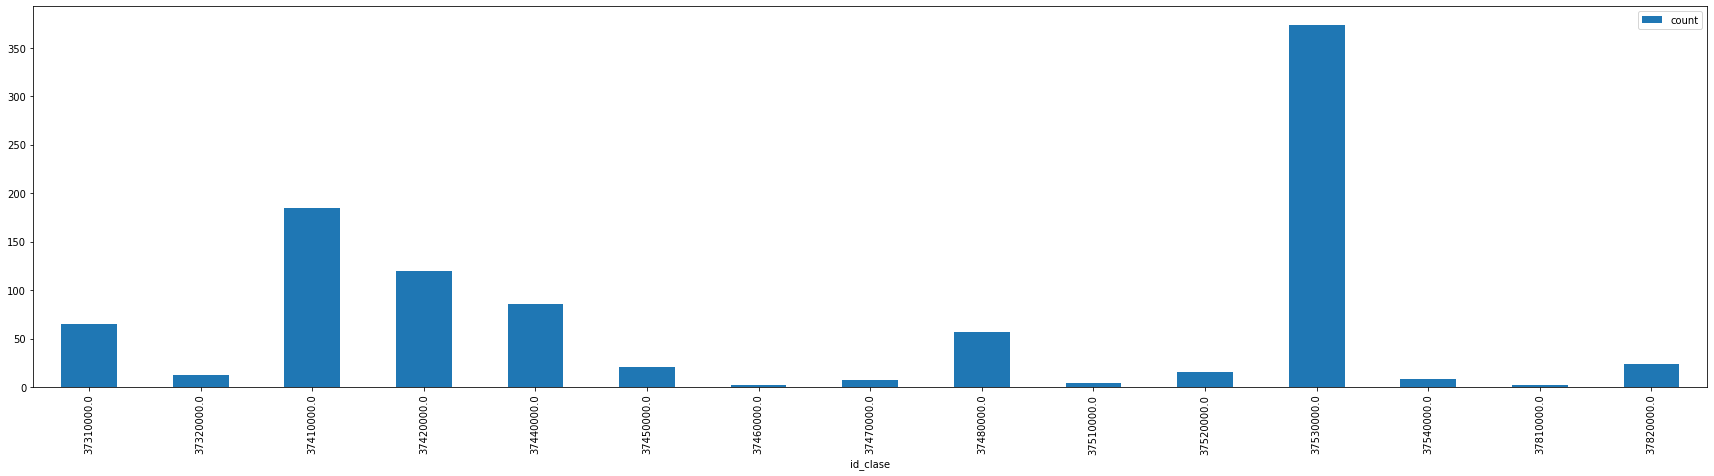

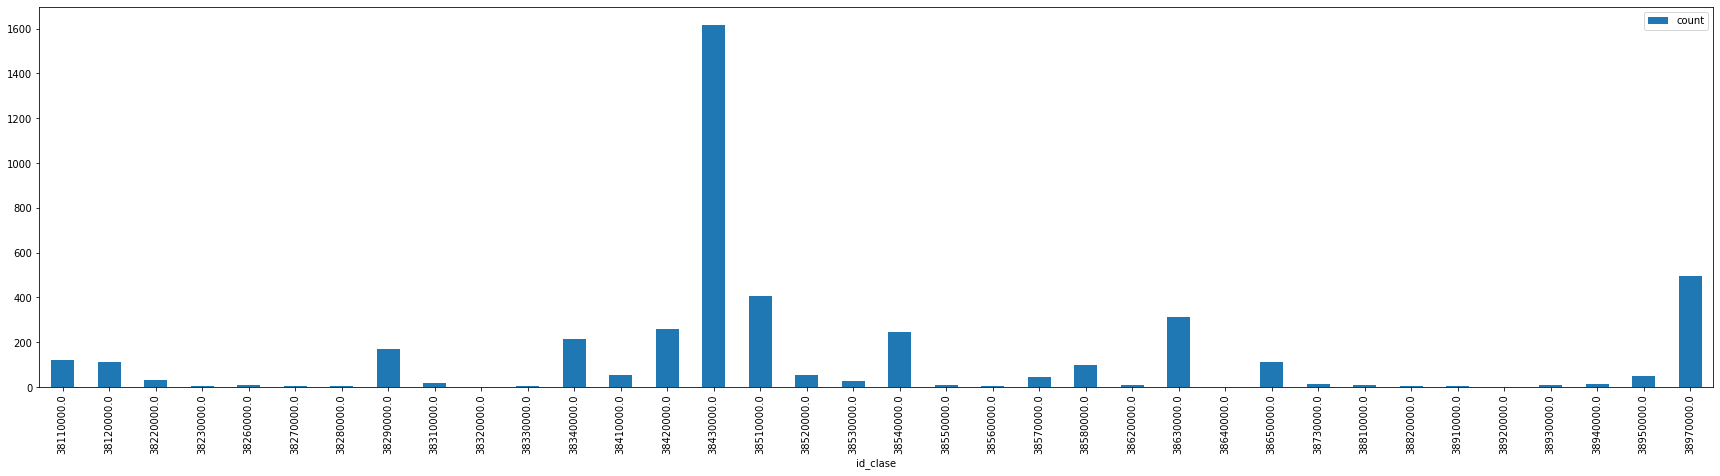

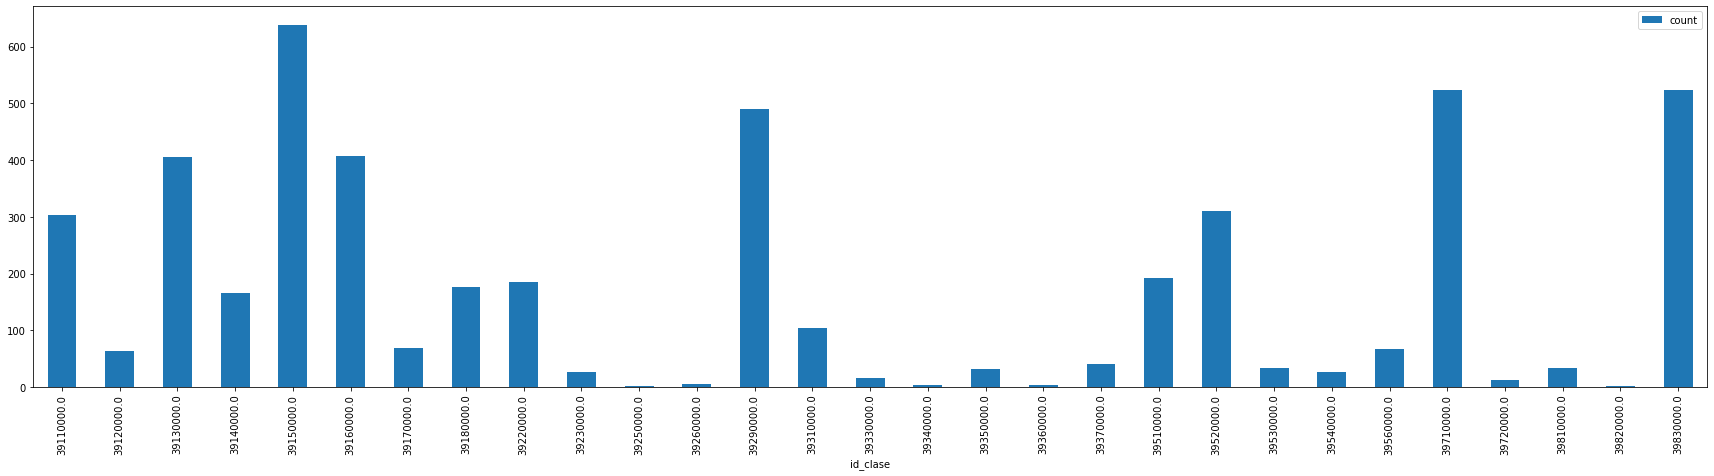

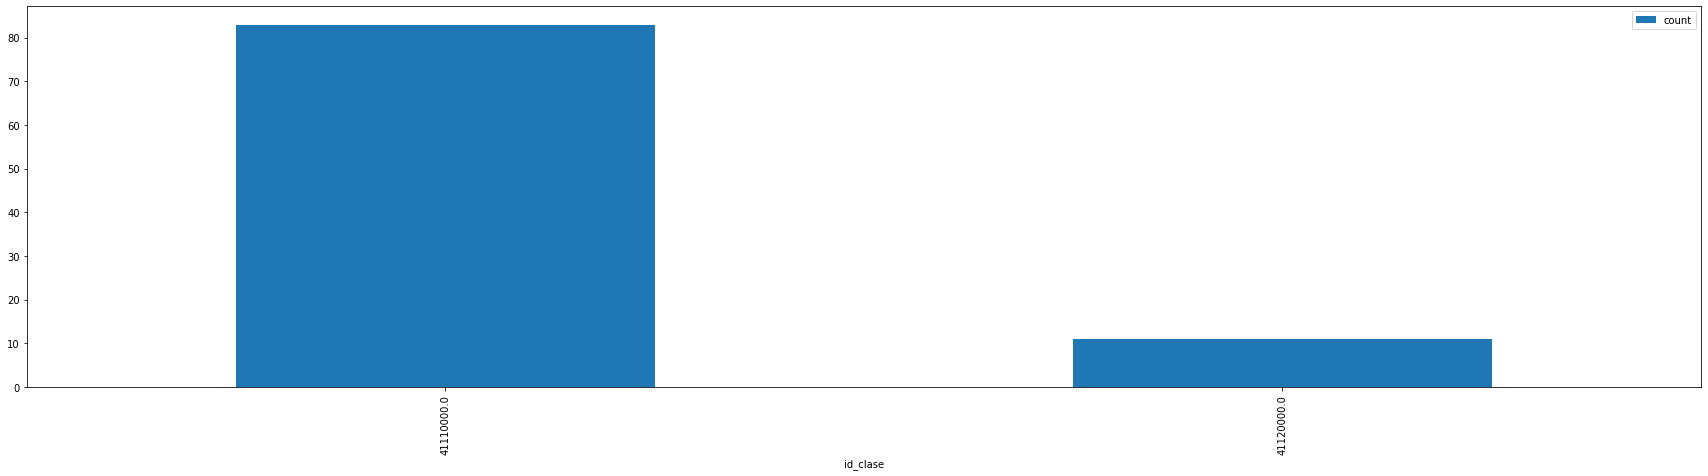

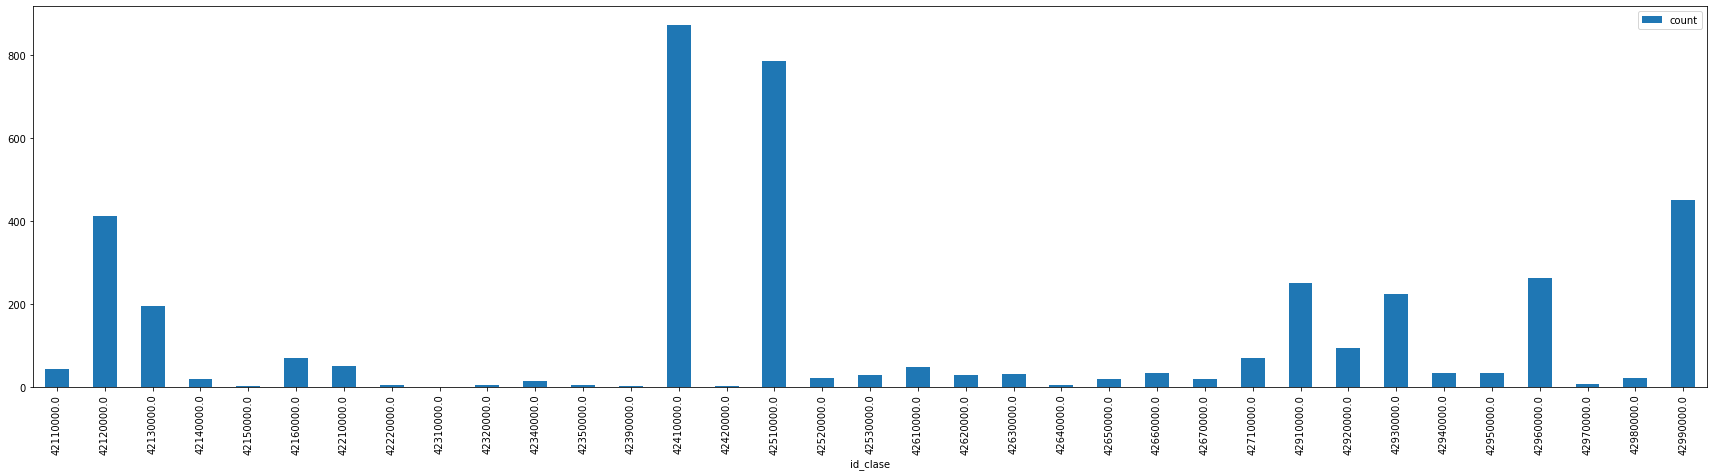

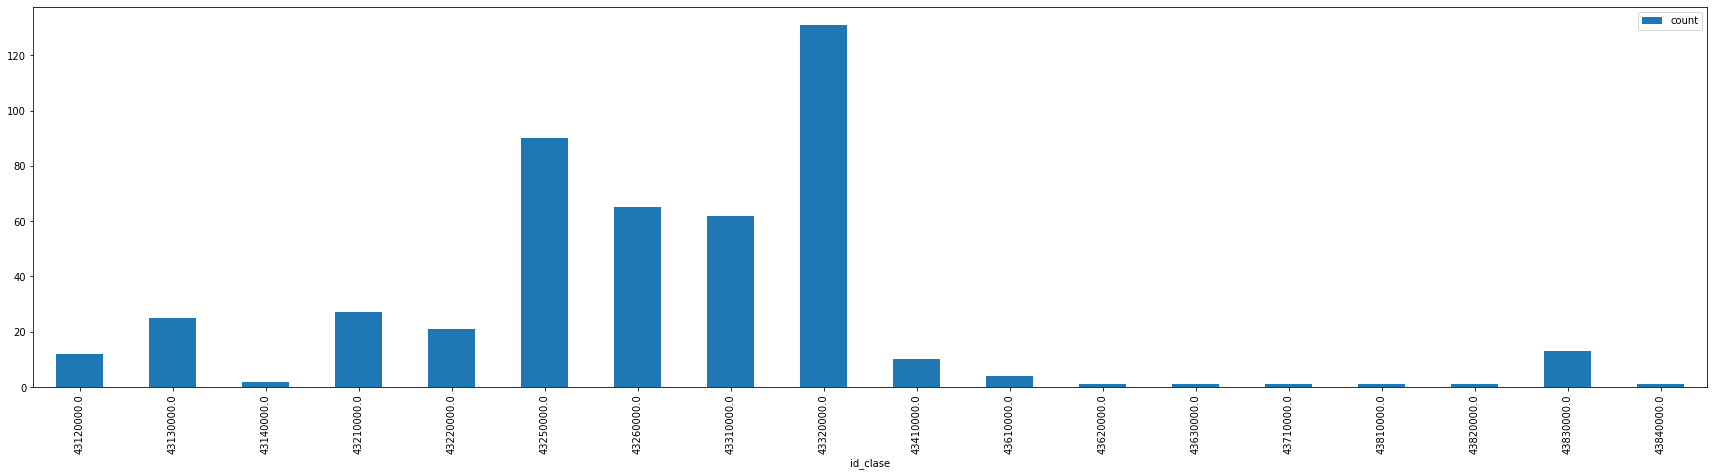

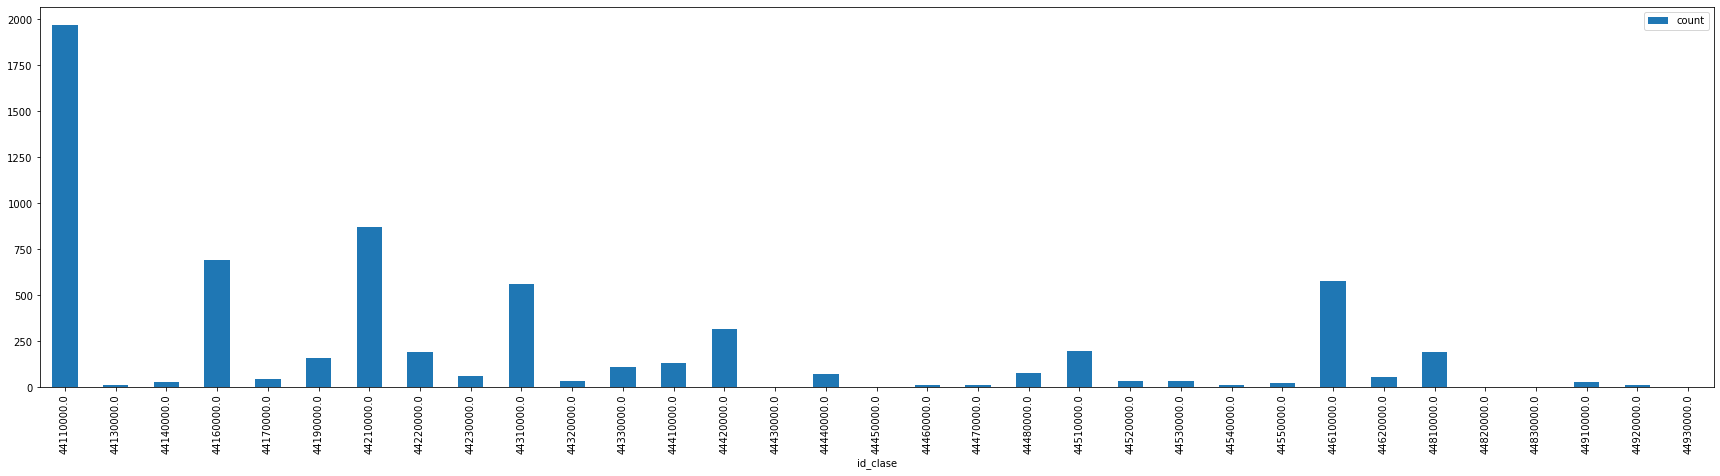

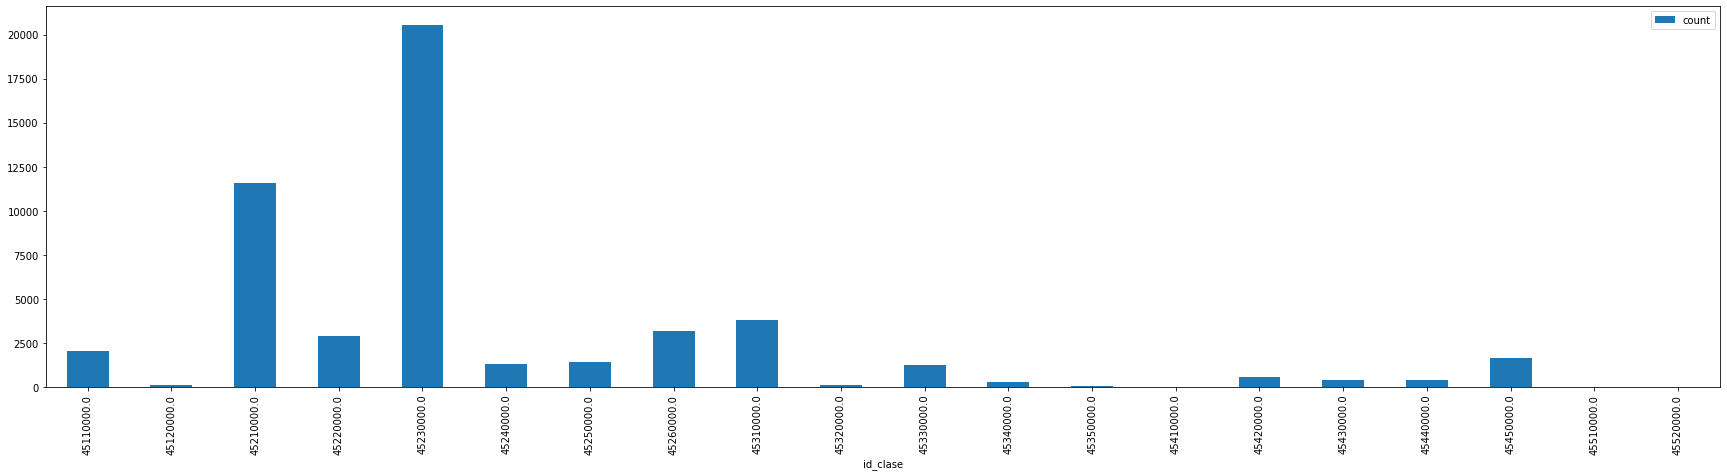

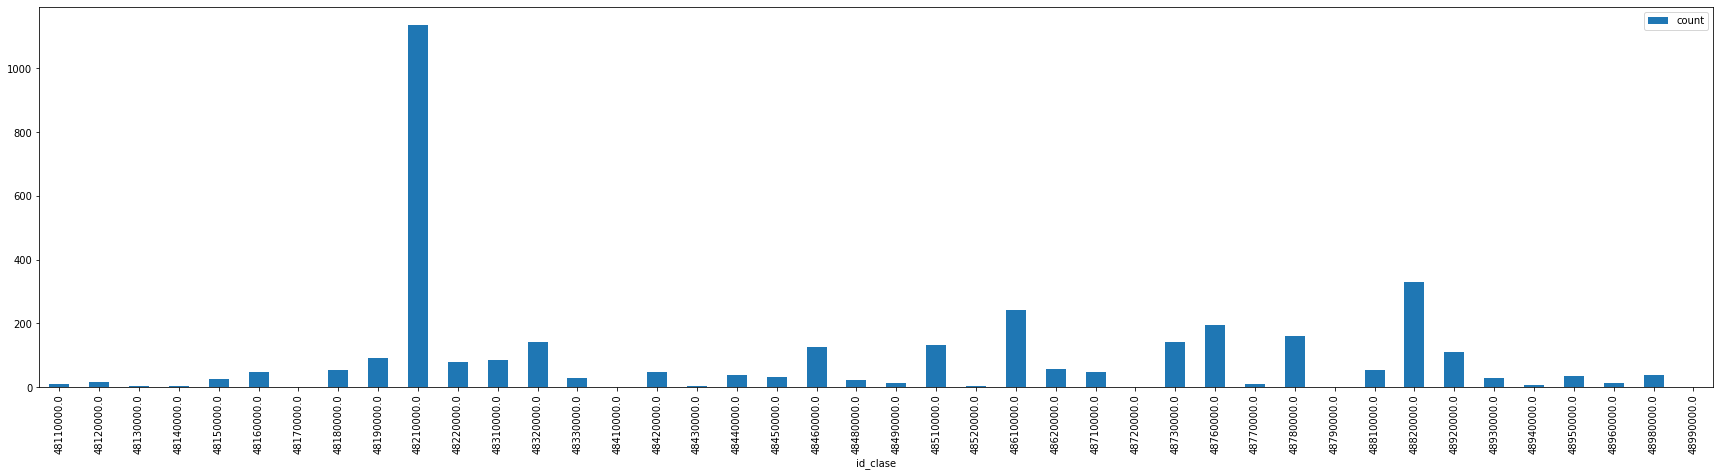

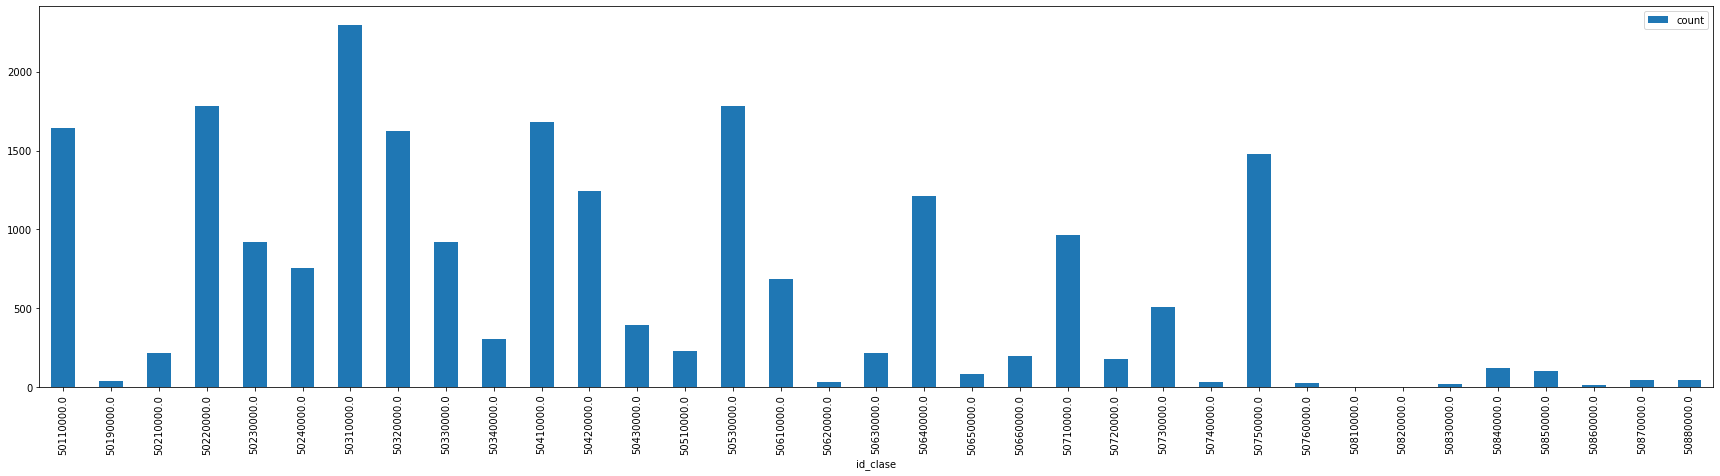

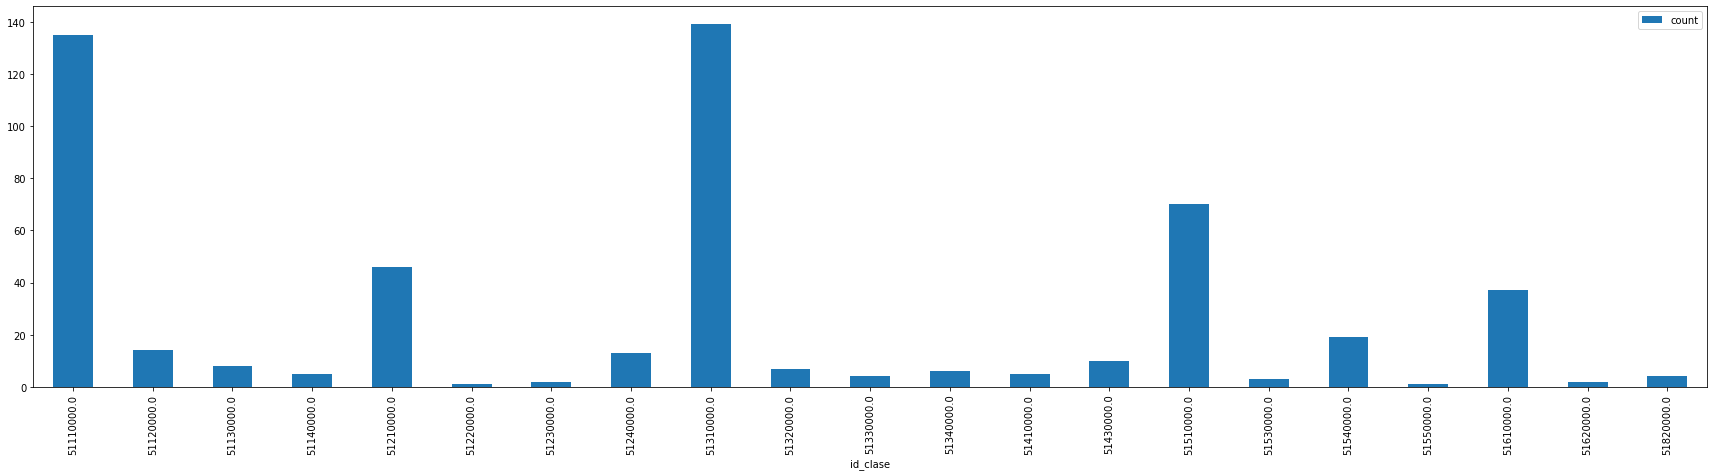

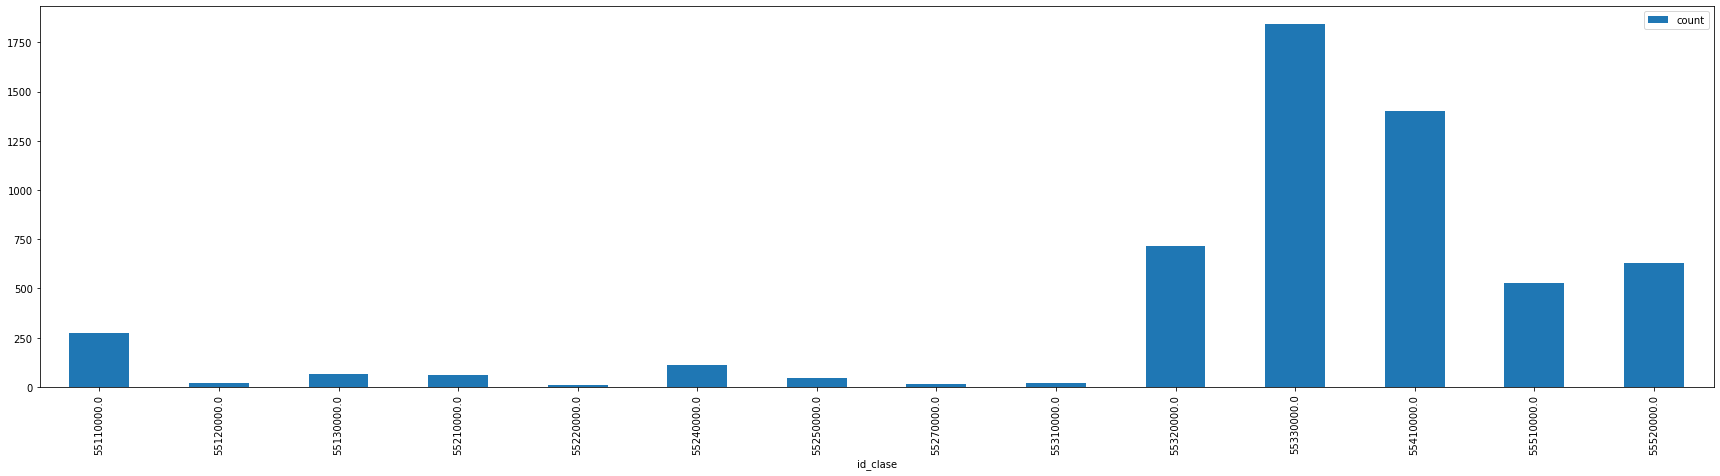

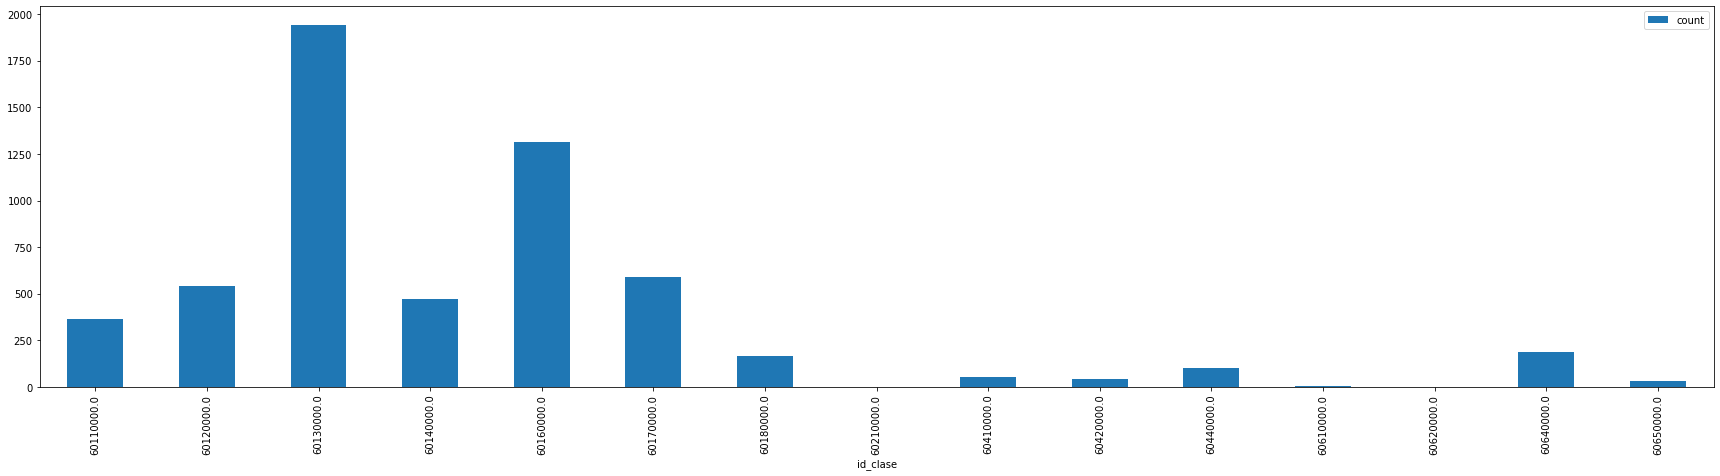

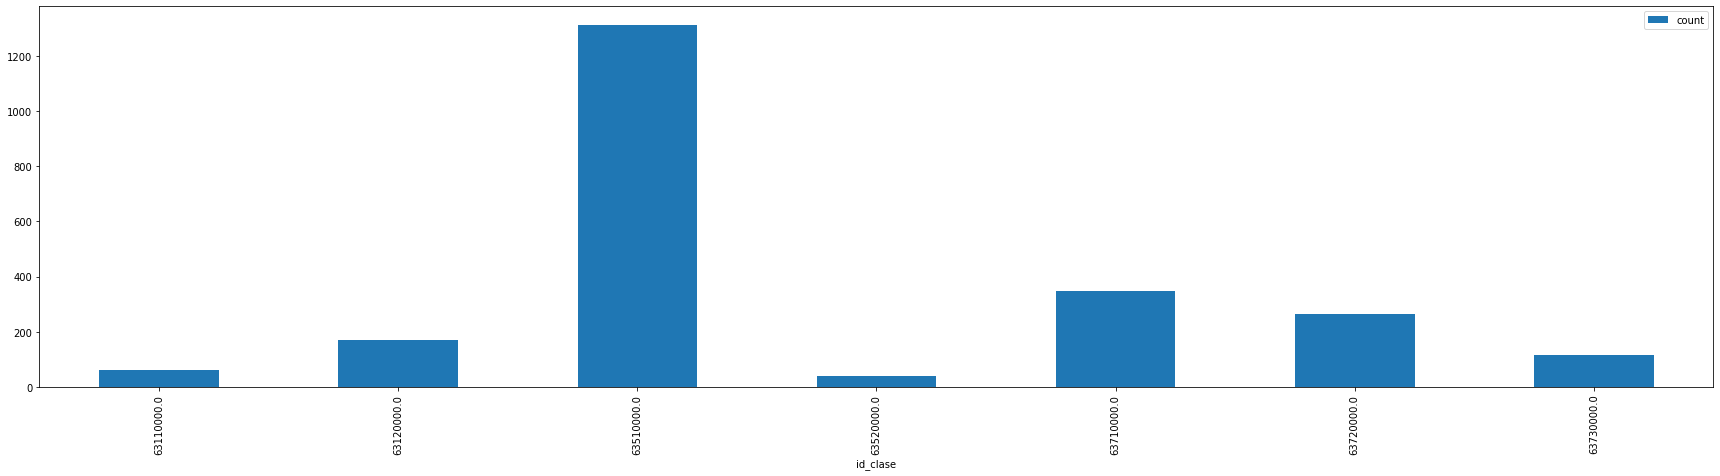

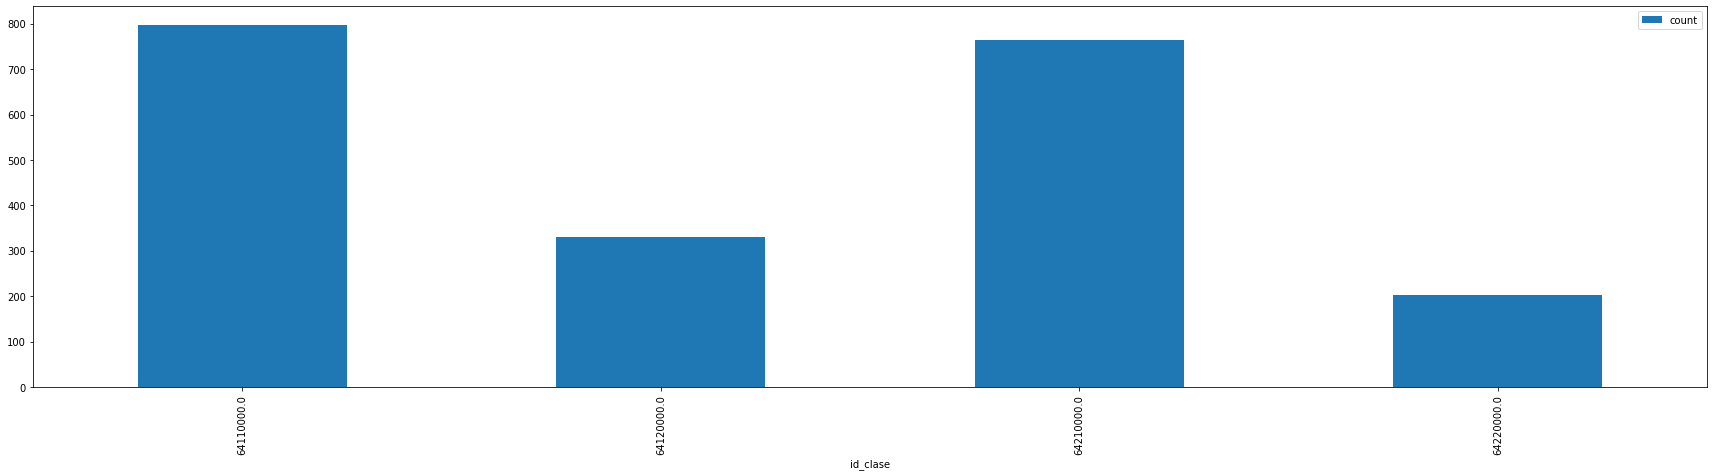

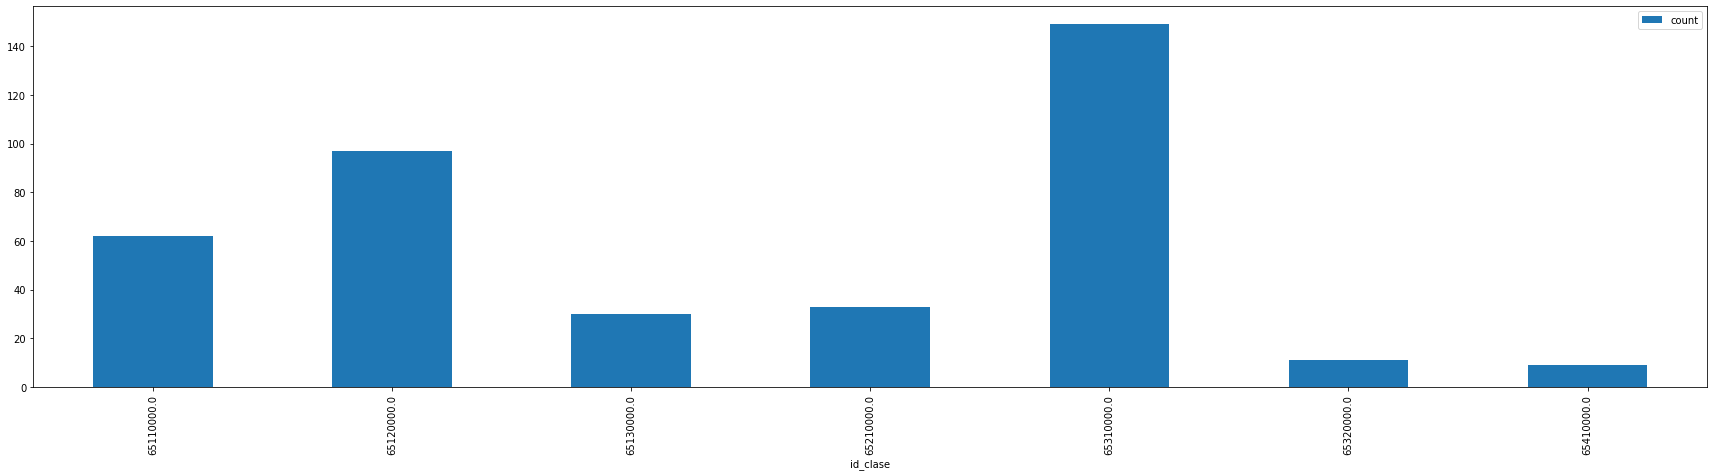

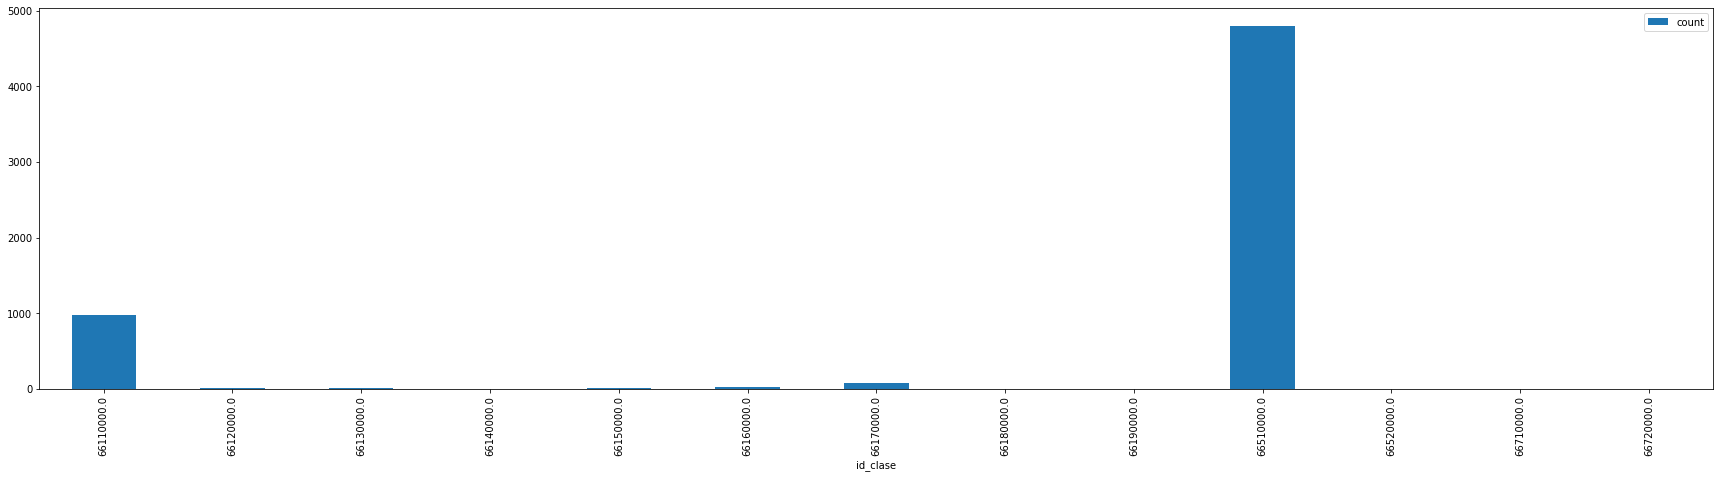

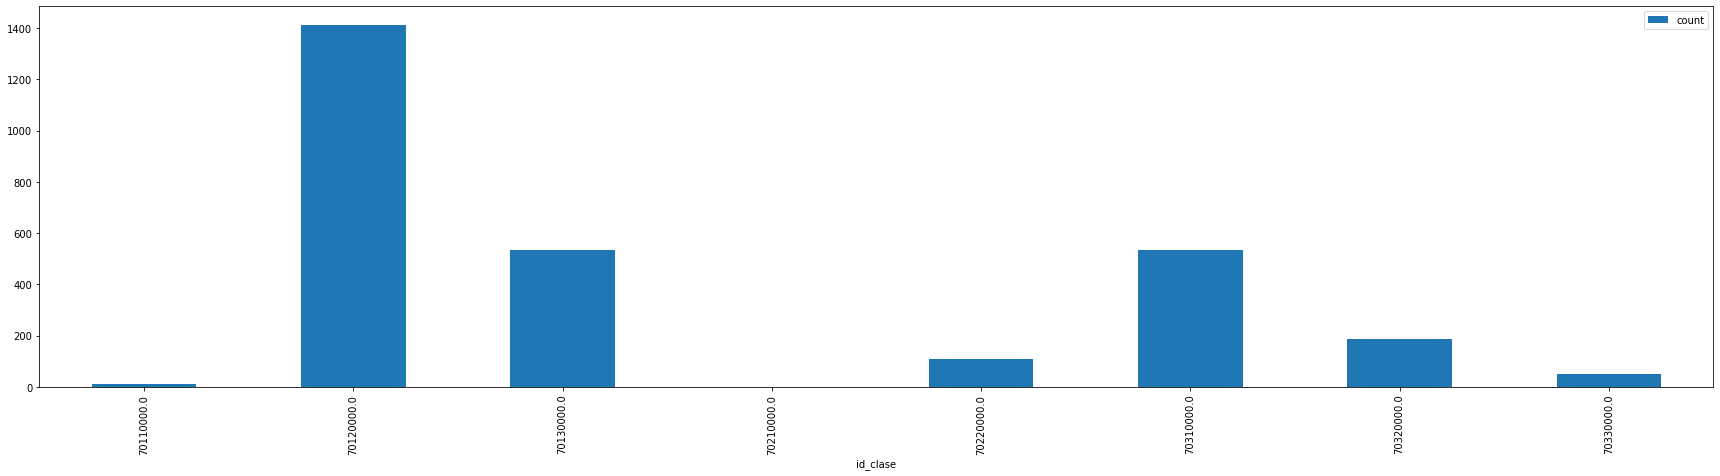

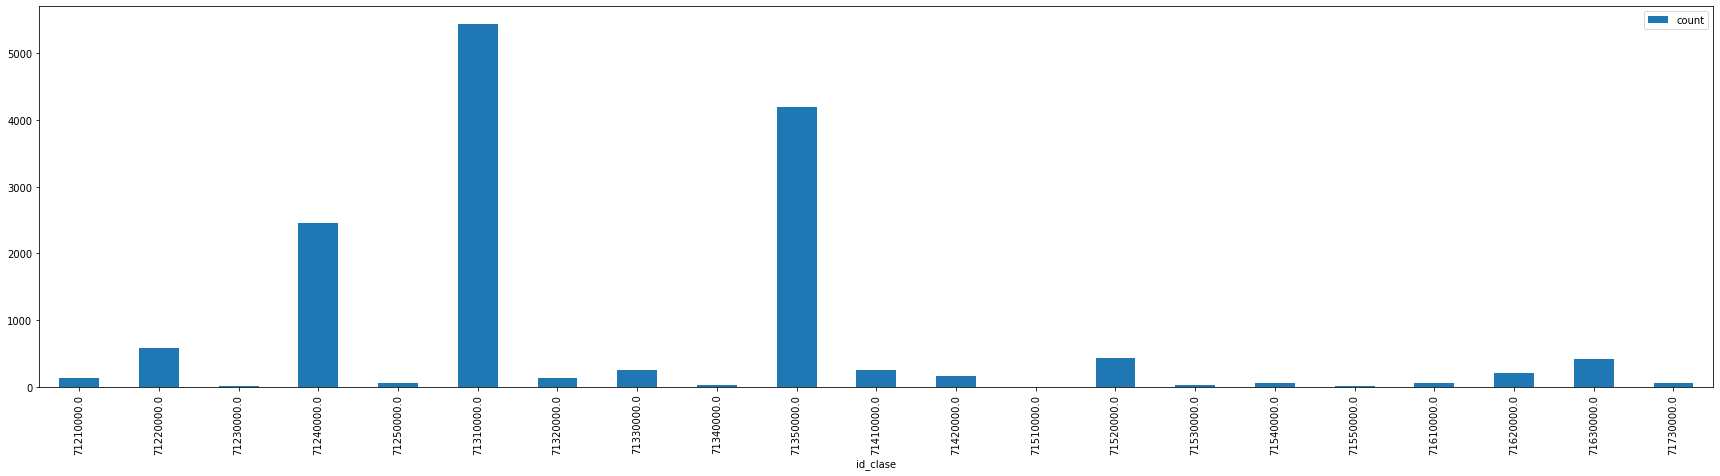

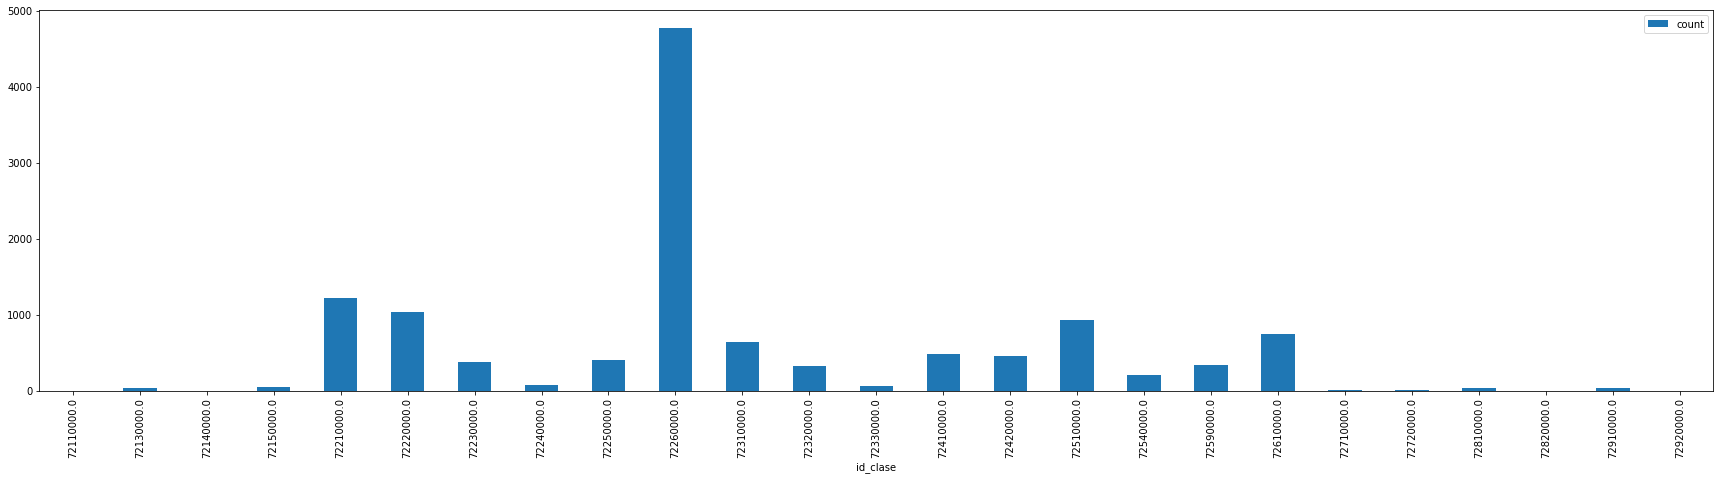

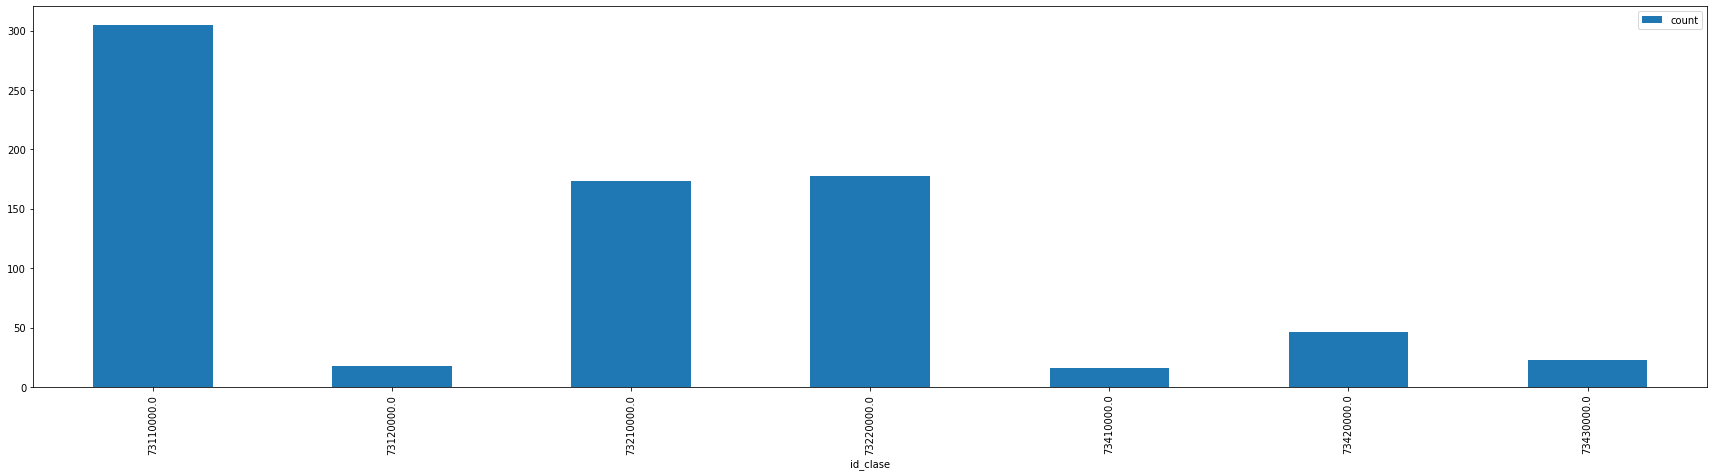

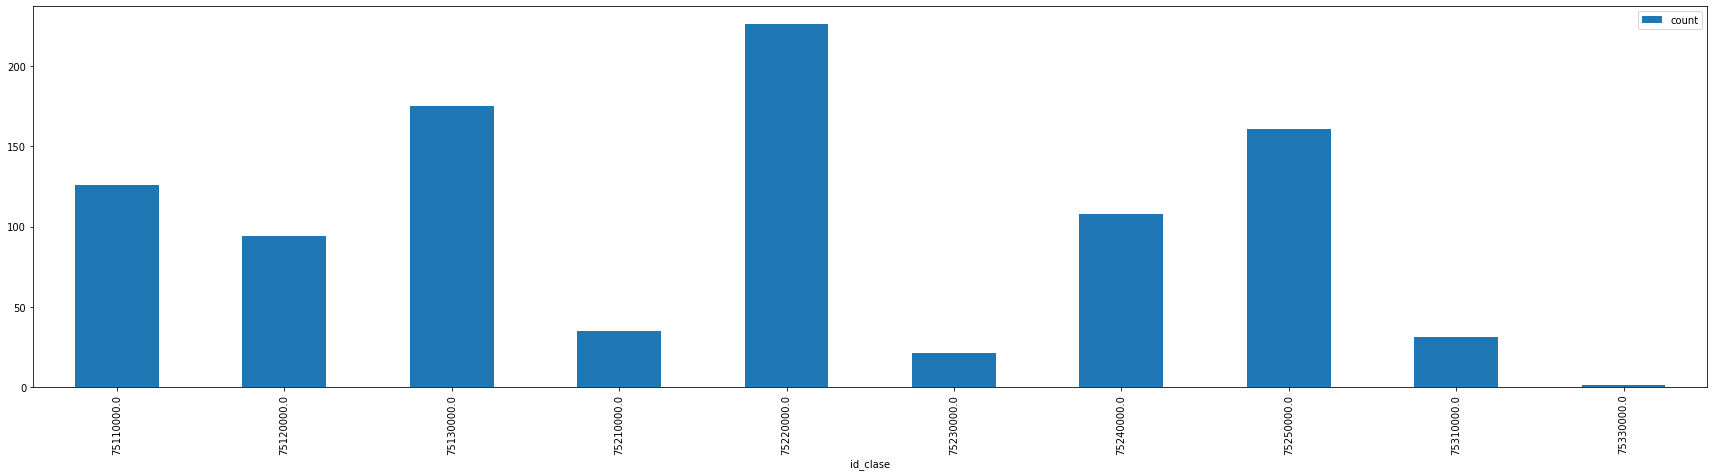

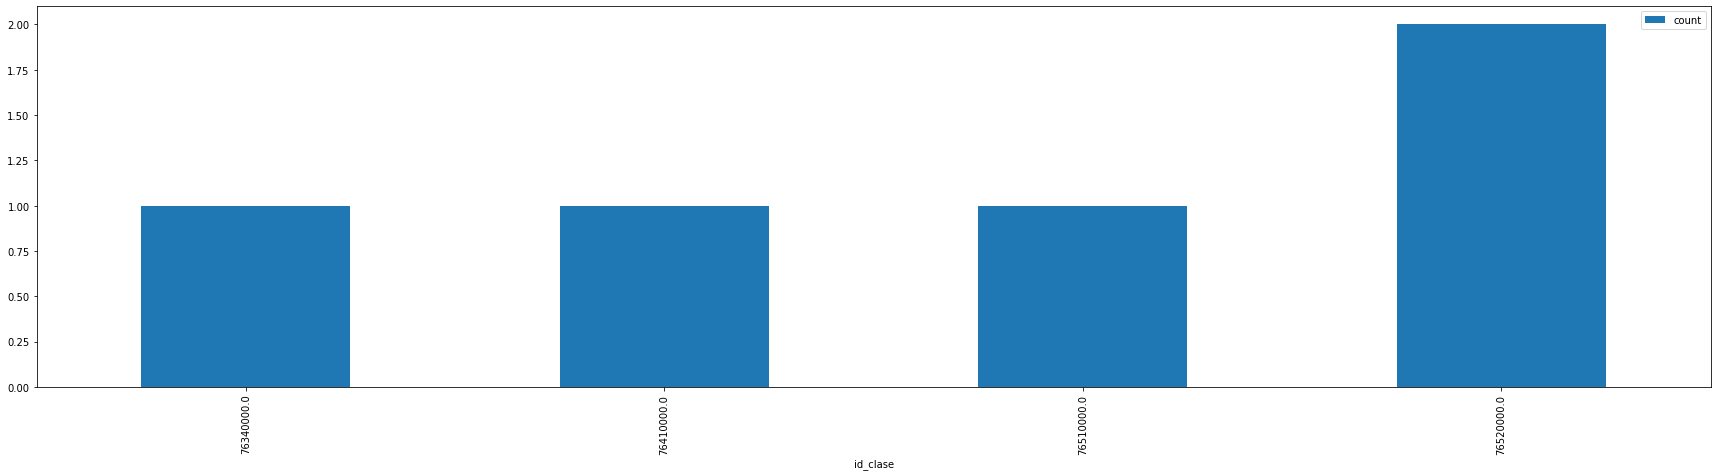

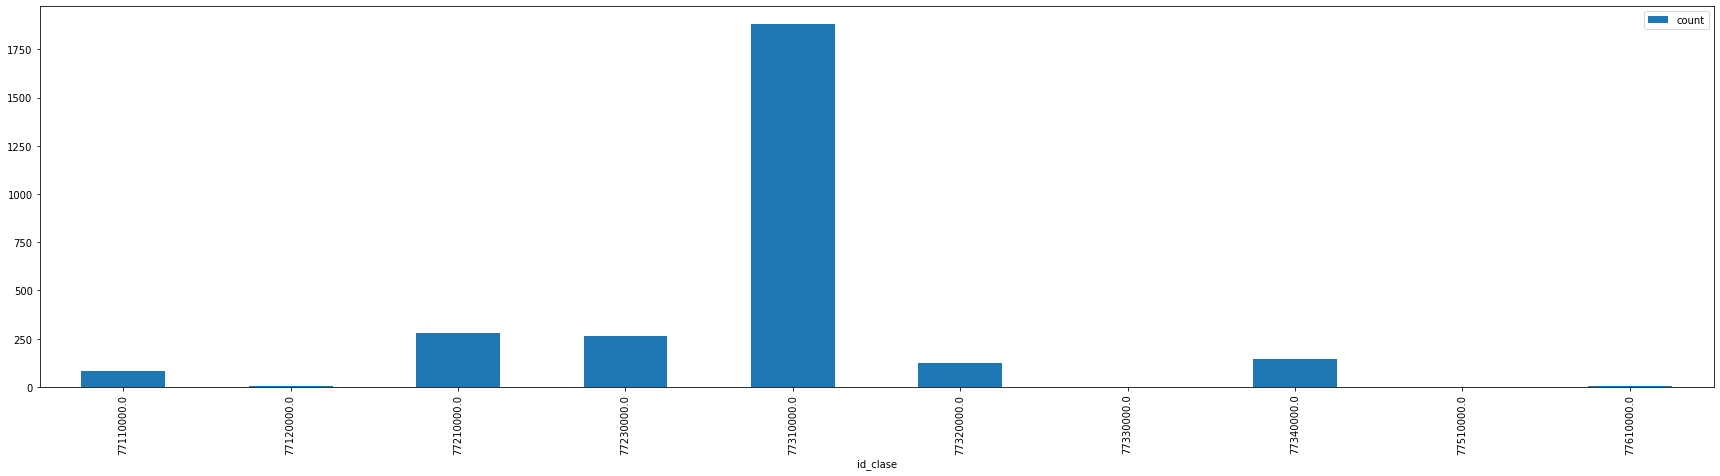

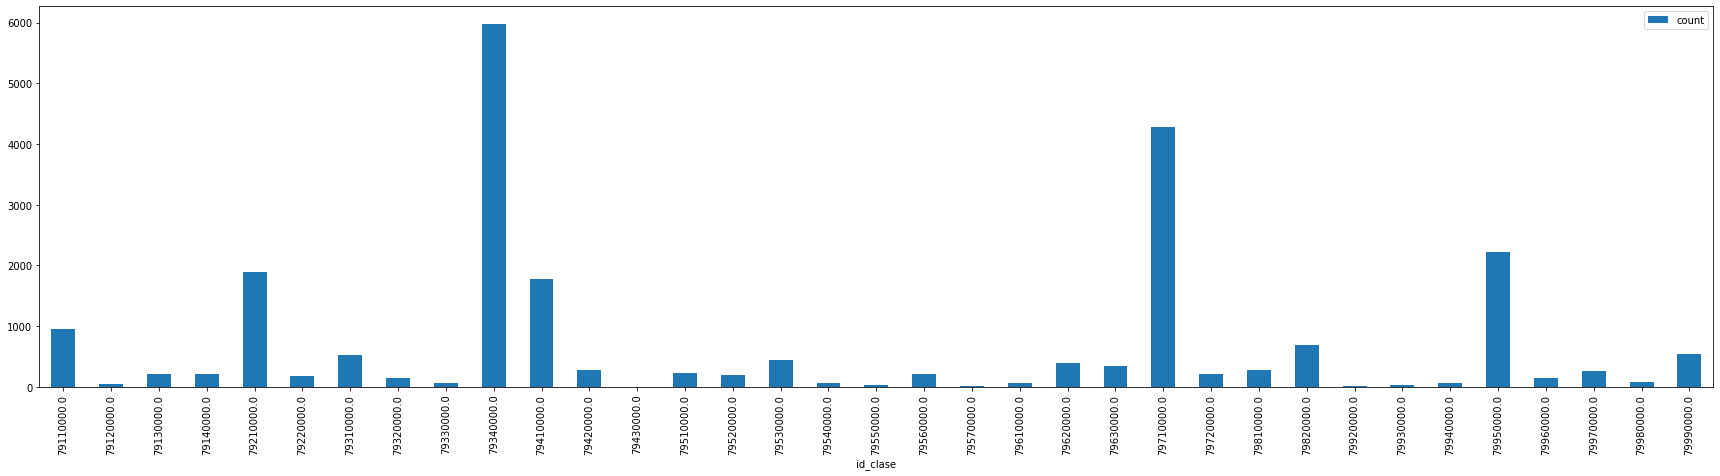

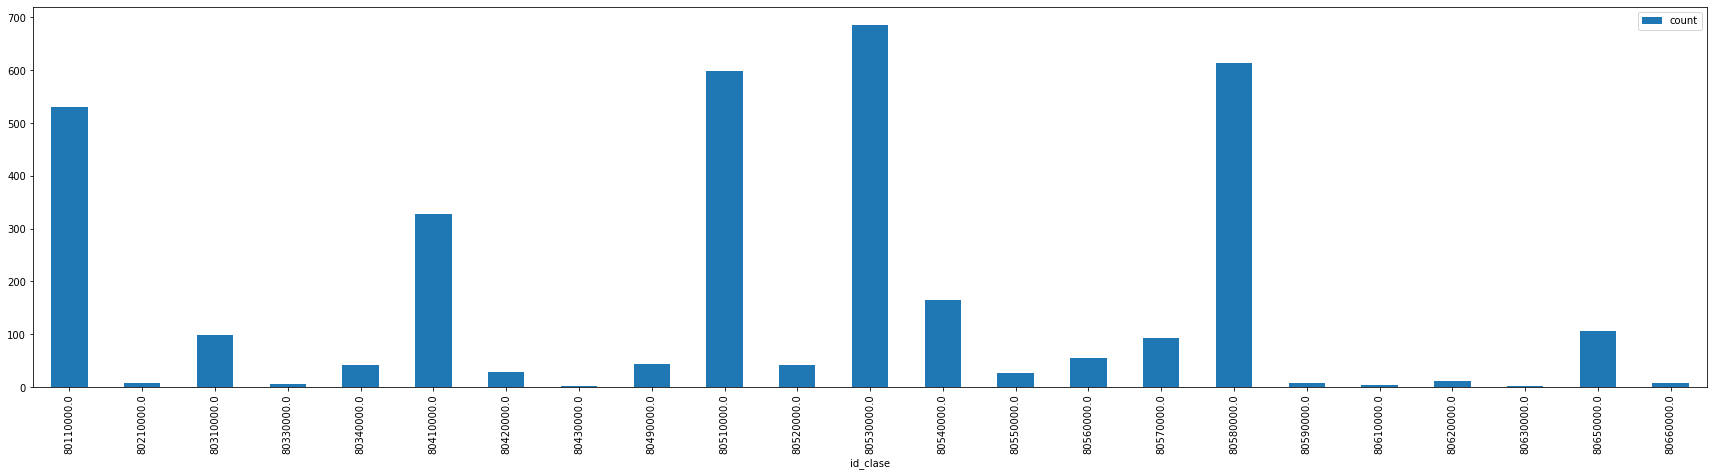

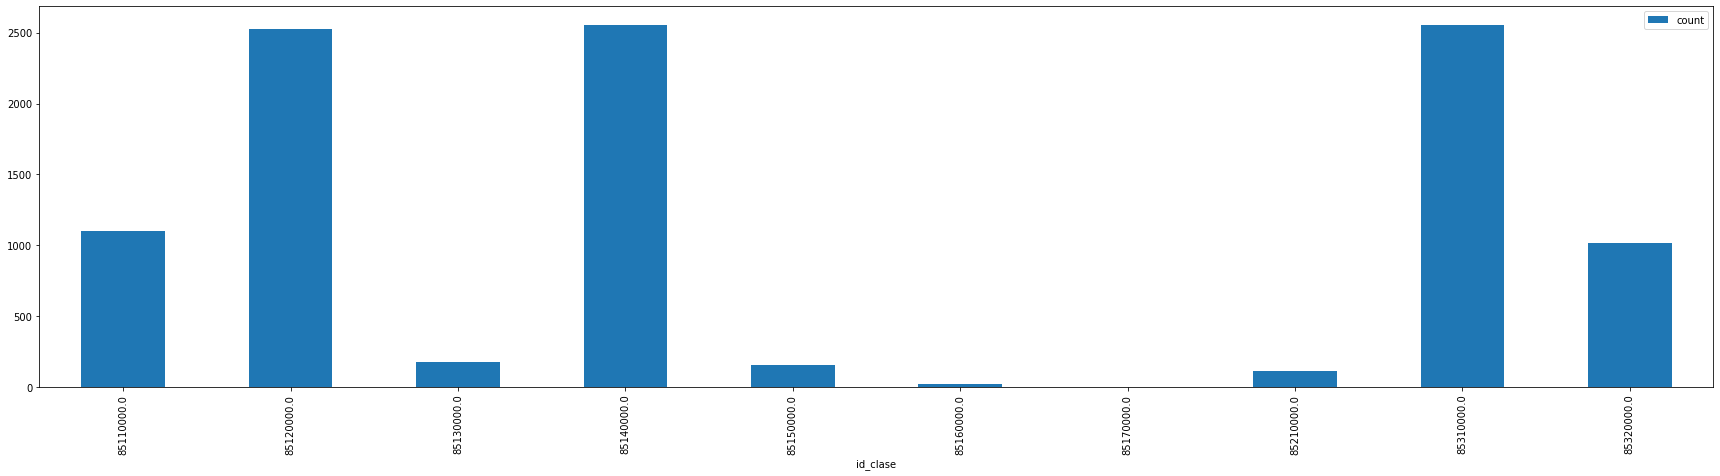

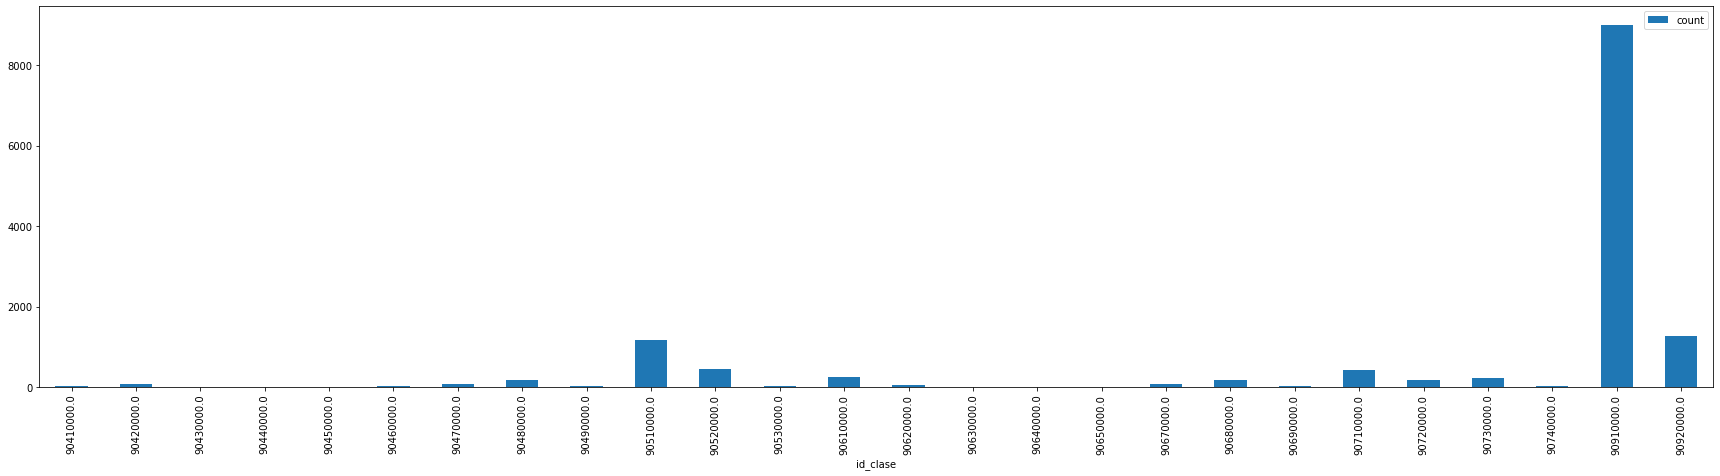

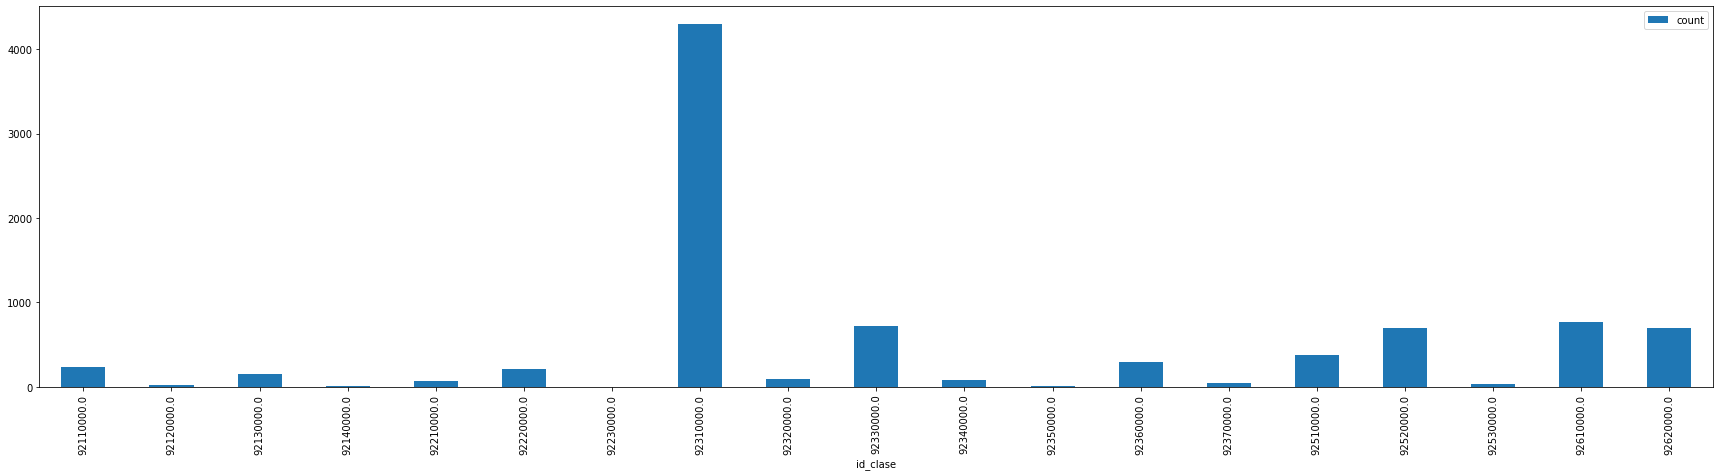

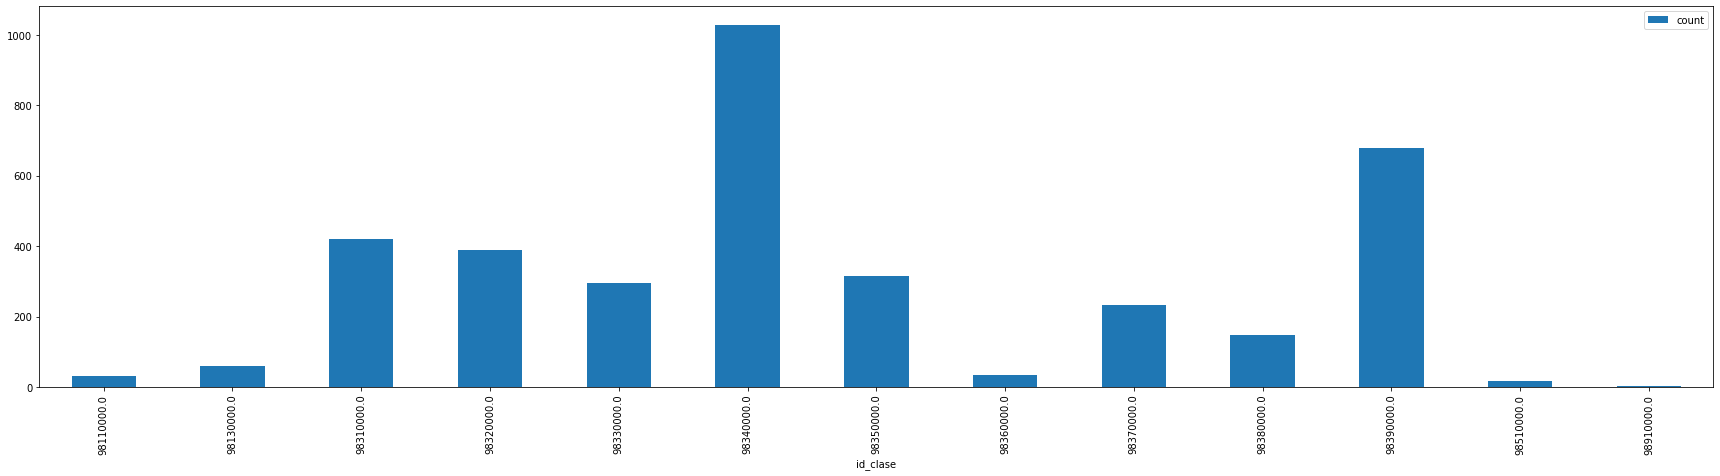

In [16]:
#¿Cuántas licitaciones hay por cada clase? 
df.groupby(['id_division', 'id_clase']).size().reset_index(name='count').groupby(['id_division']).plot(x='id_clase', y='count', kind='bar', figsize=(30,7))